In [3]:
plt.rcParams.update({'font.size': 14})

In [ ]:
## Data Initializing

In [1]:
import pandas as pd
import numpy as np
import data_handler as dh
import model as md
import time
import matplotlib.pyplot as plt
from matplotlib import rc
import pickle

In [2]:
import importlib
importlib.reload(dh)
importlib.reload(md)

<module 'model' from '/home/a1eksei/transport/TransportNet/Stable Dynamic & Beckman/model.py'>

In [3]:
import numba
numba.__version__

'0.54.1'

In [4]:
import sys
print(sys.executable)
print(sys.version)
print(sys.version_info)
from platform import python_version
print('python', python_version())
print('numpy', np.__version__)
print('pandas', pd.__version__)
import graph_tool
print('graph_tool', graph_tool.__version__)

/home/a1eksei/miniconda3/envs/gt/bin/python
3.9.7 | packaged by conda-forge | (default, Sep 29 2021, 19:20:46) 
[GCC 9.4.0]
sys.version_info(major=3, minor=9, micro=7, releaselevel='final', serial=0)
python 3.9.7
numpy 1.20.0
pandas 1.3.4
graph_tool 2.43 (commit 5778eb10, )


# Beckmann model

parameter $\mu = 0.25$

In [5]:
beckmann_save = 'beckmann_results/'

In [6]:
net_name = 'Anaheim_net.tntp'
trips_name = 'Anaheim_trips.tntp'

handler = dh.DataHandler()
graph_data = handler.GetGraphData(net_name, columns = ['init_node', 'term_node', 'capacity', 'free_flow_time'])
graph_correspondences, total_od_flow = handler.GetGraphCorrespondences(trips_name)

model = md.Model(graph_data, graph_correspondences, 
                    total_od_flow, mu = 0.25, rho = 0.15)

graph_data['graph_table'].head()

init_node  init_node_thru  term_node  term_node_thru  capacity  \
0          1           False        117            True    9000.0   
1          2           False         87            True    9000.0   
2          3           False         74            True    9000.0   
3          4           False        233            True    9000.0   
4          5           False        165            True    9000.0   

   free_flow_time  
0        1.090458  
1        1.090458  
2        1.090458  
3        1.090458  
4        1.090458

# reference

In [1]:
import pandas as pd
import numpy as np
import data_handler as dh
import model as md
import time
import matplotlib.pyplot as plt
from matplotlib import rc
import pickle

import numba

import graph_tool

net_name = 'Anaheim_net.tntp'
trips_name = 'Anaheim_trips.tntp'

handler = dh.DataHandler()
graph_data = handler.GetGraphData(net_name, columns = ['init_node', 'term_node', 'capacity', 'free_flow_time'])
graph_correspondences, total_od_flow = handler.GetGraphCorrespondences(trips_name)

model = md.Model(graph_data, graph_correspondences, 
                    total_od_flow, mu = 0.25, rho = 0.15)

set smart=False !


In [2]:
#new prox oracle etc. t_weighted !!
assert(model.mu == 0.25)
max_iter = 100

print('Frank-Wolfe without stopping criteria')
solver_kwargs = {'max_iter' : max_iter, 'stop_crit': 'max_iter',
                 'verbose' : True, 'verbose_step': 10, 'save_history' : True}
tic = time.time()
result = model.find_equilibrium(solver_name = 'fwm', solver_kwargs = solver_kwargs)
toc = time.time()
print('Elapsed time: {:.0f} sec'.format(toc - tic))
print('Time ratio =', np.max(result['times'] / graph_data['graph_table']['free_flow_time']))
print('Flow excess =', np.max(result['flows'] / graph_data['graph_table']['capacity']) - 1, end = '\n\n')

Frank-Wolfe without stopping criteria
Oracles created...
Frank-Wolfe method...
Primal_init = 1.29606e+06
Dual_init = -1.24813e+06
Duality_gap_init = 47933.4

Iterations number: 10
Primal_func_value = 1.28657e+06
Dual_func_value = -1.28567e+06
Duality_gap = 906.149
Duality_gap / Duality_gap_init = 0.0189043

Iterations number: 20
Primal_func_value = 1.28618e+06
Dual_func_value = -1.28593e+06
Duality_gap = 246.192
Duality_gap / Duality_gap_init = 0.00513614

Iterations number: 30
Primal_func_value = 1.2861e+06
Dual_func_value = -1.28598e+06
Duality_gap = 117.674
Duality_gap / Duality_gap_init = 0.00245494

Iterations number: 40
Primal_func_value = 1.28607e+06
Dual_func_value = -1.28599e+06
Duality_gap = 73.7034
Duality_gap / Duality_gap_init = 0.00153762

Iterations number: 50
Primal_func_value = 1.28606e+06
Dual_func_value = -1.286e+06
Duality_gap = 51.8787
Duality_gap / Duality_gap_init = 0.00108231

Iterations number: 60
Primal_func_value = 1.28605e+06
Dual_func_value = -1.28601e+06
D

In [2]:
#new prox oracle etc. t_weighted !!
assert(model.mu == 0.25)
max_iter = 1000

print('Frank-Wolfe without stopping criteria')
solver_kwargs = {'max_iter' : max_iter, 'stop_crit': 'max_iter',
                 'verbose' : True, 'verbose_step': 100, 'save_history' : True}
tic = time.time()
result = model.find_equilibrium(solver_name = 'fwm', solver_kwargs = solver_kwargs)
toc = time.time()
print('Elapsed time: {:.0f} sec'.format(toc - tic))
print('Time ratio =', np.max(result['times'] / graph_data['graph_table']['free_flow_time']))
print('Flow excess =', np.max(result['flows'] / graph_data['graph_table']['capacity']) - 1, end = '\n\n')

Frank-Wolfe without stopping criteria
Oracles created...
Frank-Wolfe method...
Primal_init = 1.29606e+06
Dual_init = -1.24813e+06
Duality_gap_init = 47933.4

Iterations number: 100
Primal_func_value = 1.28604e+06
Dual_func_value = -1.28602e+06
Duality_gap = 18.9653
Duality_gap / Duality_gap_init = 0.000395659

Iterations number: 200
Primal_func_value = 1.28603e+06
Dual_func_value = -1.28603e+06
Duality_gap = 7.54231
Duality_gap / Duality_gap_init = 0.00015735

Iterations number: 300
Primal_func_value = 1.28603e+06
Dual_func_value = -1.28603e+06
Duality_gap = 4.63768
Duality_gap / Duality_gap_init = 9.67526e-05

Iterations number: 400
Primal_func_value = 1.28603e+06
Dual_func_value = -1.28603e+06
Duality_gap = 3.33244
Duality_gap / Duality_gap_init = 6.95223e-05

Iterations number: 500
Primal_func_value = 1.28603e+06
Dual_func_value = -1.28603e+06
Duality_gap = 2.59546
Duality_gap / Duality_gap_init = 5.41473e-05

Iterations number: 600
Primal_func_value = 1.28603e+06
Dual_func_value = 

# smart = False

In [1]:
import pandas as pd
import numpy as np
import data_handler as dh
import model as md
import time
import matplotlib.pyplot as plt
from matplotlib import rc
import pickle

import numba

import graph_tool

net_name = 'Anaheim_net.tntp'
trips_name = 'Anaheim_trips.tntp'

handler = dh.DataHandler()
graph_data = handler.GetGraphData(net_name, columns = ['init_node', 'term_node', 'capacity', 'free_flow_time'])
graph_correspondences, total_od_flow = handler.GetGraphCorrespondences(trips_name)

model = md.Model(graph_data, graph_correspondences, 
                    total_od_flow, mu = 0.25, rho = 0.15)

set smart=False !


In [2]:
# with smart = False

#new prox oracle etc. t_weighted !!
assert(model.mu == 0.25)
max_iter = 100

print('Frank-Wolfe without stopping criteria')
solver_kwargs = {'max_iter' : max_iter, 'stop_crit': 'max_iter',
                 'verbose' : True, 'verbose_step': 10, 'save_history' : True}
tic = time.time()
result = model.find_equilibrium(solver_name = 'fwm', solver_kwargs = solver_kwargs)
toc = time.time()
print('Elapsed time: {:.0f} sec'.format(toc - tic))
print('Time ratio =', np.max(result['times'] / graph_data['graph_table']['free_flow_time']))
print('Flow excess =', np.max(result['flows'] / graph_data['graph_table']['capacity']) - 1, end = '\n\n')

Frank-Wolfe without stopping criteria
Oracles created...
Frank-Wolfe method...
Primal_init = 1.29606e+06
Dual_init = -1.24813e+06
Duality_gap_init = 47935

Iterations number: 10
Primal_func_value = 1.28657e+06
Dual_func_value = -1.28567e+06
Duality_gap = 904.454
Duality_gap / Duality_gap_init = 0.0188683

Iterations number: 20
Primal_func_value = 1.28618e+06
Dual_func_value = -1.28593e+06
Duality_gap = 245.623
Duality_gap / Duality_gap_init = 0.00512409

Iterations number: 30
Primal_func_value = 1.2861e+06
Dual_func_value = -1.28598e+06
Duality_gap = 117.425
Duality_gap / Duality_gap_init = 0.00244967

Iterations number: 40
Primal_func_value = 1.28607e+06
Dual_func_value = -1.286e+06
Duality_gap = 73.5646
Duality_gap / Duality_gap_init = 0.00153467

Iterations number: 50
Primal_func_value = 1.28606e+06
Dual_func_value = -1.286e+06
Duality_gap = 51.775
Duality_gap / Duality_gap_init = 0.00108011

Iterations number: 60
Primal_func_value = 1.28605e+06
Dual_func_value = -1.28601e+06
Dualit

In [2]:
# with smart = False

#new prox oracle etc. t_weighted !!
assert(model.mu == 0.25)
max_iter = 10

print('Frank-Wolfe without stopping criteria')
solver_kwargs = {'max_iter' : max_iter, 'stop_crit': 'max_iter',
                 'verbose' : True, 'verbose_step': 1, 'save_history' : True}
tic = time.time()
result = model.find_equilibrium(solver_name = 'fwm', solver_kwargs = solver_kwargs)
toc = time.time()
print('Elapsed time: {:.0f} sec'.format(toc - tic))
print('Time ratio =', np.max(result['times'] / graph_data['graph_table']['free_flow_time']))
print('Flow excess =', np.max(result['flows'] / graph_data['graph_table']['capacity']) - 1, end = '\n\n')

Frank-Wolfe without stopping criteria
Oracles created...
Frank-Wolfe method...
Primal_init = 1.29606e+06
Dual_init = -1.24813e+06
Duality_gap_init = 47935

Iterations number: 1
Primal_func_value = 1.30999e+06
Dual_func_value = -1.26002e+06
Duality_gap = 49966.8
Duality_gap / Duality_gap_init = 1.04239

Iterations number: 2
Primal_func_value = 1.29889e+06
Dual_func_value = -1.27706e+06
Duality_gap = 21824.4
Duality_gap / Duality_gap_init = 0.455291

Iterations number: 3
Primal_func_value = 1.29182e+06
Dual_func_value = -1.28156e+06
Duality_gap = 10265.6
Duality_gap / Duality_gap_init = 0.214156

Iterations number: 4
Primal_func_value = 1.28919e+06
Dual_func_value = -1.28352e+06
Duality_gap = 5666.2
Duality_gap / Duality_gap_init = 0.118206

Iterations number: 5
Primal_func_value = 1.28805e+06
Dual_func_value = -1.28447e+06
Duality_gap = 3582.18
Duality_gap / Duality_gap_init = 0.0747299

Iterations number: 6
Primal_func_value = 1.28748e+06
Dual_func_value = -1.28502e+06
Duality_gap = 24

In [2]:
# with smart = False

#new prox oracle etc. t_weighted !!
assert(model.mu == 0.25)
max_iter = 1000

print('Frank-Wolfe without stopping criteria')
solver_kwargs = {'max_iter' : max_iter, 'stop_crit': 'max_iter',
                 'verbose' : True, 'verbose_step': 100, 'save_history' : True}
tic = time.time()
result = model.find_equilibrium(solver_name = 'fwm', solver_kwargs = solver_kwargs)
toc = time.time()
print('Elapsed time: {:.0f} sec'.format(toc - tic))
print('Time ratio =', np.max(result['times'] / graph_data['graph_table']['free_flow_time']))
print('Flow excess =', np.max(result['flows'] / graph_data['graph_table']['capacity']) - 1, end = '\n\n')

Frank-Wolfe without stopping criteria
Oracles created...
Frank-Wolfe method...
Primal_init = 1.29606e+06
Dual_init = -1.24813e+06
Duality_gap_init = 47935

Iterations number: 100
Primal_func_value = 1.28604e+06
Dual_func_value = -1.28602e+06
Duality_gap = 18.7898
Duality_gap / Duality_gap_init = 0.000391985

Iterations number: 200
Primal_func_value = 1.28603e+06
Dual_func_value = -1.28603e+06
Duality_gap = 7.50052
Duality_gap / Duality_gap_init = 0.000156473

Iterations number: 300
Primal_func_value = 1.28603e+06
Dual_func_value = -1.28603e+06
Duality_gap = 4.64406
Duality_gap / Duality_gap_init = 9.68825e-05

Iterations number: 400
Primal_func_value = 1.28603e+06
Dual_func_value = -1.28603e+06
Duality_gap = 3.33543
Duality_gap / Duality_gap_init = 6.95823e-05

Iterations number: 500
Primal_func_value = 1.28603e+06
Dual_func_value = -1.28603e+06
Duality_gap = 2.60435
Duality_gap / Duality_gap_init = 5.43308e-05

Iterations number: 600
Primal_func_value = 1.28603e+06
Dual_func_value = -

In [2]:
# with smart = False

#new prox oracle etc. t_weighted !!
assert(model.mu == 0.25)
max_iter = 1000

print('Frank-Wolfe without stopping criteria')
solver_kwargs = {'max_iter' : max_iter, 'stop_crit': 'max_iter',
                 'verbose' : True, 'verbose_step': 100, 'save_history' : True}
tic = time.time()
result = model.find_equilibrium(solver_name = 'fwm', solver_kwargs = solver_kwargs)
toc = time.time()
print('Elapsed time: {:.0f} sec'.format(toc - tic))
print('Time ratio =', np.max(result['times'] / graph_data['graph_table']['free_flow_time']))
print('Flow excess =', np.max(result['flows'] / graph_data['graph_table']['capacity']) - 1, end = '\n\n')

Frank-Wolfe without stopping criteria
Oracles created...
Frank-Wolfe method...
FT: 94.03
FT: 228.18
FT: 177.65
FT: 152.07
FT: 137.02
FT: 126.72
FT: 119.91
FT: 114.49
FT: 111.16
FT: 107.83
FT: 105.16
FT: 103.24
FT: 101.42
FT: 99.98
FT: 98.55
FT: 97.65
FT: 96.87
FT: 96.45
FT: 96.20
FT: 95.85
FT: 95.73
FT: 95.34
FT: 95.99
FT: 95.88
FT: 95.68
FT: 95.64
FT: 95.46
FT: 95.16
FT: 94.72
FT: 94.54
FT: 94.23
FT: 93.85
FT: 93.59
FT: 93.23
FT: 93.10
FT: 92.96
FT: 92.84
FT: 92.77
Primal_init = 1.29606e+06
Dual_init = -1.24813e+06
Duality_gap_init = 47935
FT: 92.78
FT: 92.32
FT: 91.82
FT: 91.57
FT: 91.45
FT: 91.38
FT: 91.14
FT: 90.77
FT: 90.36
FT: 89.98
FT: 89.60
FT: 89.23
FT: 89.13
FT: 89.07
FT: 88.88
FT: 88.55
FT: 88.25
FT: 87.95
FT: 87.71
FT: 87.56
FT: 87.40
FT: 87.24
FT: 87.08
FT: 86.91
FT: 86.73
FT: 86.58
FT: 86.45
FT: 86.37
FT: 86.33
FT: 86.19
FT: 86.07
FT: 85.96
FT: 85.85
FT: 85.75
FT: 85.70
FT: 85.58
FT: 85.48
FT: 85.42
FT: 85.57
FT: 85.44
FT: 85.27
FT: 85.22
FT: 85.44
FT: 85.46
FT: 85.39
FT:

FT: 79.31
FT: 79.31
FT: 79.32
FT: 79.32
FT: 79.32
FT: 79.32
FT: 79.32
FT: 79.32
FT: 79.32
FT: 79.33
FT: 79.33
FT: 79.34
FT: 79.33
FT: 79.33
FT: 79.32
FT: 79.32
FT: 79.32
FT: 79.32
FT: 79.32
FT: 79.32
FT: 79.33
FT: 79.34
FT: 79.34
FT: 79.33
FT: 79.32
FT: 79.32
FT: 79.31
FT: 79.31
FT: 79.32
FT: 79.32
FT: 79.31
FT: 79.31
FT: 79.30
FT: 79.31
FT: 79.31
FT: 79.30
FT: 79.29
FT: 79.29
FT: 79.29
FT: 79.28
FT: 79.28
FT: 79.27
FT: 79.26
FT: 79.25
FT: 79.25
FT: 79.25
FT: 79.24
FT: 79.23
FT: 79.22
FT: 79.22
FT: 79.23
FT: 79.22
FT: 79.22
FT: 79.21
FT: 79.20
FT: 79.20
FT: 79.25
FT: 79.26
FT: 79.26
FT: 79.25
FT: 79.25
FT: 79.24
FT: 79.24
FT: 79.23
FT: 79.23
FT: 79.23
FT: 79.23
FT: 79.23
FT: 79.23
FT: 79.23
FT: 79.22
FT: 79.21
FT: 79.21
FT: 79.20
FT: 79.19
FT: 79.19
FT: 79.19
FT: 79.18
FT: 79.18
FT: 79.17
FT: 79.16
FT: 79.16
FT: 79.15
FT: 79.14
FT: 79.14
FT: 79.13
FT: 79.12
FT: 79.12
FT: 79.12
FT: 79.11
FT: 79.10
FT: 79.10
FT: 79.10
FT: 79.09
FT: 79.09
FT: 79.08
FT: 79.08
FT: 79.08
FT: 79.07
FT: 79.07


FT: 80.66
FT: 80.66
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.66
FT: 80.66
FT: 80.66
FT: 80.66
FT: 80.66
FT: 80.66
FT: 80.66
FT: 80.66
FT: 80.65
FT: 80.65
FT: 80.65
FT: 80.65
FT: 80.65
FT: 80.65
FT: 80.65
FT: 80.65
FT: 80.65
FT: 80.65
FT: 80.65
FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.63
FT: 80.63
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.61
FT: 80.61
FT: 80.60
FT: 80.60
FT: 80.59
FT: 80.60
FT: 80.61
FT: 80.64
FT: 80.65
FT: 80.66
FT: 80.67
FT: 80.68
FT: 80.70
FT: 80.71
FT: 80.72
FT: 80.73
FT: 80.74
FT: 80.75
FT: 80.77
FT: 80.77
FT: 80.77
FT: 80.77
FT: 80.77
FT: 80.77
FT: 80.77
FT: 80.78
FT: 80.78
FT: 80.78
FT: 80.78
FT: 80.78
FT: 80.78
FT: 80.78
FT: 80.77
FT: 80.77
FT: 80.77
FT: 80.77
FT: 80.76
FT: 80.76
FT: 80.76
FT: 80.76
FT: 80.76
FT: 80.76
FT: 80.76
FT: 80.76
FT: 80.75
FT: 80.75
FT: 80.74
FT: 80.74
FT: 80.74


FT: 80.09
FT: 80.09
FT: 80.09
FT: 80.09
FT: 80.08
FT: 80.09
FT: 80.08
FT: 80.08
FT: 80.08
FT: 80.08
FT: 80.07
FT: 80.08
FT: 80.08
FT: 80.09
FT: 80.09
FT: 80.08
FT: 80.08
FT: 80.08
FT: 80.08
FT: 80.08
FT: 80.08
FT: 80.08
FT: 80.14
FT: 80.14
FT: 80.15
FT: 80.16
FT: 80.17
FT: 80.17
FT: 80.18
FT: 80.19
FT: 80.20
FT: 80.20
FT: 80.21
FT: 80.22
FT: 80.23
FT: 80.24
FT: 80.24
FT: 80.25
FT: 80.26
FT: 80.27
FT: 80.28
FT: 80.28
FT: 80.29
FT: 80.30
FT: 80.31
FT: 80.31
FT: 80.31
FT: 80.31
FT: 80.31
FT: 80.31
FT: 80.32
FT: 80.32
FT: 80.32
FT: 80.32
FT: 80.32
FT: 80.32
FT: 80.31
FT: 80.31
FT: 80.31
FT: 80.31
FT: 80.31
FT: 80.32
FT: 80.32
FT: 80.32
FT: 80.32
FT: 80.32
FT: 80.32
FT: 80.31
FT: 80.31
FT: 80.31
FT: 80.31
FT: 80.32
FT: 80.31
FT: 80.31
FT: 80.31
FT: 80.31
FT: 80.31
FT: 80.31
FT: 80.31
FT: 80.31
FT: 80.31
FT: 80.31
FT: 80.31
FT: 80.31
FT: 80.30
FT: 80.30
FT: 80.30
FT: 80.30
FT: 80.30
FT: 80.30
FT: 80.30
FT: 80.29
FT: 80.29
FT: 80.29
FT: 80.29
FT: 80.29
FT: 80.29
FT: 80.28
FT: 80.28
FT: 80.28


FT: 80.11
FT: 80.11
FT: 80.10
FT: 80.10
FT: 80.10
FT: 80.10
FT: 80.10
FT: 80.10
FT: 80.10
FT: 80.10
FT: 80.09
FT: 80.10
FT: 80.10
FT: 80.10
FT: 80.10
FT: 80.10
FT: 80.10
FT: 80.10
FT: 80.10
FT: 80.10
FT: 80.10
FT: 80.10
FT: 80.10
FT: 80.10
FT: 80.10
FT: 80.10
FT: 80.10
FT: 80.10
FT: 80.10
FT: 80.10
FT: 80.10
FT: 80.10
FT: 80.10
FT: 80.10
FT: 80.10
FT: 80.10
FT: 80.10
FT: 80.10
FT: 80.10
FT: 80.10
FT: 80.10
FT: 80.10
FT: 80.13
FT: 80.16
FT: 80.18
FT: 80.19
FT: 80.19
FT: 80.19
FT: 80.19
FT: 80.19
FT: 80.19
FT: 80.18
FT: 80.18
FT: 80.18
FT: 80.18
FT: 80.18
FT: 80.18
FT: 80.18
FT: 80.18
FT: 80.17
FT: 80.18
FT: 80.18
FT: 80.18
FT: 80.18
FT: 80.18
FT: 80.18
FT: 80.18
FT: 80.18
FT: 80.18
FT: 80.18
FT: 80.18
FT: 80.18
FT: 80.18
FT: 80.18
FT: 80.18
FT: 80.18
FT: 80.17
FT: 80.17
FT: 80.17
FT: 80.17
FT: 80.17
FT: 80.17
FT: 80.17
FT: 80.17
FT: 80.17
FT: 80.17
FT: 80.17
FT: 80.17
FT: 80.16
FT: 80.16
FT: 80.16
FT: 80.16
FT: 80.16
FT: 80.16
FT: 80.16
FT: 80.16
FT: 80.16
FT: 80.15
FT: 80.15
FT: 80.15


FT: 80.36
FT: 80.36
FT: 80.36
FT: 80.35
FT: 80.35
FT: 80.35
FT: 80.35
FT: 80.35
FT: 80.35
FT: 80.35
FT: 80.35
FT: 80.35
FT: 80.35
FT: 80.35
FT: 80.35
FT: 80.35
FT: 80.34
FT: 80.34
FT: 80.34
FT: 80.34
FT: 80.34
FT: 80.34
FT: 80.34
FT: 80.34
FT: 80.33
FT: 80.33
FT: 80.33
FT: 80.33
FT: 80.33
FT: 80.33
FT: 80.33
FT: 80.33
FT: 80.33
FT: 80.33
FT: 80.33
FT: 80.34
FT: 80.34
FT: 80.34
FT: 80.34
FT: 80.34
FT: 80.34
FT: 80.34
FT: 80.34
FT: 80.34
FT: 80.34
FT: 80.34
FT: 80.33
FT: 80.33
FT: 80.33
FT: 80.33
FT: 80.33
FT: 80.33
FT: 80.33
FT: 80.33
FT: 80.32
FT: 80.32
FT: 80.32
FT: 80.32
FT: 80.32
FT: 80.32
FT: 80.32
FT: 80.32
FT: 80.32
FT: 80.31
FT: 80.31
FT: 80.31
FT: 80.31
FT: 80.31
FT: 80.31
FT: 80.31
FT: 80.31
FT: 80.31
FT: 80.30
FT: 80.30
FT: 80.30
FT: 80.30
FT: 80.30
FT: 80.30
FT: 80.30
FT: 80.30
FT: 80.30
FT: 80.30
FT: 80.29
FT: 80.29
FT: 80.29
FT: 80.29
FT: 80.30
FT: 80.30
FT: 80.30
FT: 80.29
FT: 80.29
FT: 80.29
FT: 80.29
FT: 80.29
FT: 80.30
FT: 80.30
FT: 80.29
FT: 80.29
FT: 80.29
FT: 80.29


FT: 80.47
FT: 80.48
FT: 80.48
FT: 80.47
FT: 80.47
FT: 80.47
FT: 80.47
FT: 80.47
FT: 80.47
FT: 80.48
FT: 80.48
FT: 80.48
FT: 80.48
FT: 80.48
FT: 80.48
FT: 80.48
FT: 80.48
FT: 80.48
FT: 80.49
FT: 80.49
FT: 80.49
FT: 80.49
FT: 80.49
FT: 80.49
FT: 80.49
FT: 80.49
FT: 80.49
FT: 80.49
FT: 80.49
FT: 80.50
FT: 80.50
FT: 80.50
FT: 80.50
FT: 80.51
FT: 80.51
FT: 80.51
FT: 80.51
FT: 80.52
FT: 80.52
FT: 80.52
FT: 80.52
FT: 80.52
FT: 80.52
FT: 80.52
FT: 80.52
FT: 80.52
FT: 80.52
FT: 80.52
FT: 80.52
FT: 80.52
FT: 80.52
FT: 80.52
FT: 80.52
FT: 80.52
FT: 80.52
FT: 80.52
FT: 80.51
FT: 80.51
FT: 80.51
FT: 80.51
FT: 80.51
FT: 80.51
FT: 80.51
FT: 80.51
FT: 80.51
FT: 80.51
FT: 80.51
FT: 80.51
FT: 80.51
FT: 80.51
FT: 80.51
FT: 80.51
FT: 80.51
FT: 80.51
FT: 80.51
FT: 80.51
FT: 80.51
FT: 80.51
FT: 80.51
FT: 80.51
FT: 80.51
FT: 80.51
FT: 80.51
FT: 80.51
FT: 80.51
FT: 80.51
FT: 80.51
FT: 80.51
FT: 80.52
FT: 80.52
FT: 80.52
FT: 80.52
FT: 80.52
FT: 80.52
FT: 80.52
FT: 80.52
FT: 80.52
FT: 80.52
FT: 80.52
FT: 80.52


FT: 80.69
FT: 80.69
FT: 80.69
FT: 80.69
FT: 80.69
FT: 80.68
FT: 80.68
FT: 80.68
FT: 80.68
FT: 80.68
FT: 80.69
FT: 80.69
FT: 80.68
FT: 80.68
FT: 80.68
FT: 80.68
FT: 80.68
FT: 80.68
FT: 80.68
FT: 80.68
FT: 80.68
FT: 80.68
FT: 80.68
FT: 80.68
FT: 80.68
FT: 80.68
FT: 80.68
FT: 80.68
FT: 80.68
FT: 80.68
FT: 80.68
FT: 80.68
FT: 80.68
FT: 80.68
FT: 80.68
FT: 80.68
FT: 80.68
FT: 80.68
FT: 80.68
FT: 80.68
FT: 80.68
FT: 80.68
FT: 80.68
FT: 80.70
FT: 80.70
FT: 80.70
FT: 80.71
FT: 80.71
FT: 80.71
FT: 80.72
FT: 80.72
FT: 80.72
FT: 80.73
FT: 80.73
FT: 80.74
FT: 80.74
FT: 80.74
FT: 80.75
FT: 80.75
FT: 80.75
FT: 80.76
FT: 80.76
FT: 80.76
FT: 80.77
FT: 80.77
FT: 80.77
FT: 80.77
FT: 80.77
FT: 80.77
FT: 80.77
FT: 80.77
FT: 80.77
FT: 80.77
FT: 80.77
FT: 80.77
FT: 80.77
FT: 80.77
FT: 80.77
FT: 80.77
FT: 80.77
FT: 80.77
FT: 80.77
FT: 80.77
FT: 80.77
FT: 80.77
FT: 80.77
FT: 80.77
FT: 80.77
FT: 80.77
FT: 80.77
FT: 80.77
FT: 80.77
FT: 80.77
FT: 80.77
FT: 80.77
FT: 80.77
FT: 80.76
FT: 80.76
FT: 80.76
FT: 80.76


FT: 80.58
FT: 80.58
FT: 80.58
FT: 80.58
FT: 80.58
FT: 80.58
FT: 80.58
FT: 80.58
FT: 80.58
FT: 80.58
FT: 80.58
FT: 80.58
FT: 80.58
FT: 80.58
FT: 80.58
FT: 80.58
FT: 80.58
FT: 80.58
FT: 80.57
FT: 80.57
FT: 80.57
FT: 80.57
FT: 80.57
FT: 80.57
FT: 80.57
FT: 80.57
FT: 80.57
FT: 80.57
FT: 80.57
FT: 80.57
FT: 80.57
FT: 80.56
FT: 80.56
FT: 80.56
FT: 80.56
FT: 80.56
FT: 80.56
FT: 80.56
FT: 80.56
FT: 80.56
FT: 80.56
FT: 80.57
FT: 80.59
FT: 80.60
FT: 80.60
FT: 80.60
FT: 80.61
FT: 80.61
FT: 80.61
FT: 80.61
FT: 80.61
FT: 80.61
FT: 80.61
FT: 80.61
FT: 80.61
FT: 80.61
FT: 80.61
FT: 80.60
FT: 80.60
FT: 80.60
FT: 80.60
FT: 80.60
FT: 80.60
FT: 80.60
FT: 80.60
FT: 80.60
FT: 80.60
FT: 80.60
FT: 80.60
FT: 80.60
FT: 80.60
FT: 80.60
FT: 80.60
FT: 80.60
FT: 80.60
FT: 80.60
FT: 80.60
FT: 80.60
FT: 80.60
FT: 80.60
FT: 80.60
FT: 80.60
FT: 80.60
FT: 80.60
FT: 80.60
FT: 80.60
FT: 80.60
FT: 80.61
FT: 80.61
FT: 80.61
FT: 80.61
FT: 80.61
FT: 80.61
FT: 80.61
FT: 80.61
FT: 80.61
FT: 80.61
FT: 80.61
FT: 80.61
FT: 80.61


FT: 80.68
FT: 80.68
FT: 80.68
FT: 80.68
FT: 80.68
FT: 80.68
FT: 80.68
FT: 80.68
FT: 80.68
FT: 80.68
FT: 80.68
FT: 80.68
FT: 80.68
FT: 80.68
FT: 80.69
FT: 80.69
FT: 80.69
FT: 80.69
FT: 80.69
FT: 80.69
FT: 80.69
FT: 80.69
FT: 80.69
FT: 80.69
FT: 80.69
FT: 80.69
FT: 80.69
FT: 80.69
FT: 80.69
FT: 80.69
FT: 80.69
FT: 80.69
FT: 80.69
FT: 80.69
FT: 80.72
FT: 80.72
FT: 80.72
FT: 80.75
FT: 80.75
FT: 80.75
FT: 80.76
FT: 80.76
FT: 80.76
FT: 80.76
FT: 80.77
FT: 80.77
FT: 80.77
FT: 80.77
FT: 80.78
FT: 80.78
FT: 80.78
FT: 80.78
FT: 80.79
FT: 80.79
FT: 80.79
FT: 80.79
FT: 80.79
FT: 80.79
FT: 80.79
FT: 80.79
FT: 80.79
FT: 80.79
FT: 80.79
FT: 80.79
FT: 80.79
FT: 80.79
FT: 80.79
FT: 80.79
FT: 80.79
FT: 80.79
FT: 80.79
FT: 80.79
FT: 80.79
FT: 80.79
FT: 80.79
FT: 80.79
FT: 80.79
FT: 80.79
FT: 80.79
FT: 80.79
FT: 80.79
FT: 80.79
FT: 80.79
FT: 80.79
FT: 80.79
FT: 80.79
FT: 80.79
FT: 80.79
FT: 80.79
FT: 80.79
FT: 80.79
FT: 80.79
FT: 80.79
FT: 80.79
FT: 80.79
FT: 80.79
FT: 80.79
FT: 80.79
FT: 80.79
FT: 80.79


FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.61
FT: 80.61
FT: 80.61
FT: 80.61
FT: 80.61
FT: 80.61
FT: 80.61
FT: 80.61
FT: 80.61
FT: 80.61
FT: 80.61
FT: 80.61
FT: 80.61
FT: 80.61
FT: 80.61
FT: 80.61
FT: 80.61
FT: 80.61
FT: 80.60
FT: 80.60
FT: 80.60
FT: 80.60
FT: 80.60
FT: 80.60
FT: 80.60
FT: 80.60
FT: 80.60
FT: 80.60
FT: 80.60
FT: 80.60
FT: 80.60
FT: 80.60
FT: 80.60
FT: 80.60
FT: 80.60
FT: 80.60
FT: 80.60
FT: 80.60
FT: 80.60
FT: 80.60
FT: 80.60
FT: 80.60
FT: 80.61
FT: 80.61
FT: 80.61
FT: 80.61
FT: 80.61
FT: 80.61
FT: 80.61
FT: 80.61
FT: 80.61
FT: 80.61
FT: 80.61


FT: 80.77
FT: 80.77
FT: 80.77
FT: 80.77
FT: 80.77
FT: 80.77
FT: 80.77
FT: 80.77
FT: 80.77
FT: 80.77
FT: 80.77
FT: 80.77
FT: 80.77
FT: 80.77
FT: 80.77
FT: 80.77
FT: 80.77
FT: 80.77
FT: 80.77
FT: 80.77
FT: 80.76
FT: 80.76
FT: 80.76
FT: 80.76
FT: 80.76
FT: 80.76
FT: 80.76
FT: 80.76
FT: 80.76
FT: 80.76
FT: 80.76
FT: 80.76
FT: 80.76
FT: 80.76
FT: 80.76
FT: 80.76
FT: 80.76
FT: 80.76
FT: 80.76
FT: 80.76
FT: 80.76
FT: 80.75
FT: 80.76
FT: 80.76
FT: 80.76
FT: 80.76
FT: 80.76
FT: 80.76
FT: 80.76
FT: 80.76
FT: 80.76
FT: 80.76
FT: 80.76
FT: 80.76
FT: 80.76
FT: 80.76
FT: 80.76
FT: 80.76
FT: 80.76
FT: 80.76
FT: 80.76
FT: 80.76
FT: 80.76
FT: 80.76
FT: 80.76
FT: 80.76
FT: 80.76
FT: 80.76
FT: 80.76
FT: 80.76
FT: 80.76
FT: 80.76
FT: 80.76
FT: 80.76
FT: 80.76
FT: 80.76
FT: 80.76
FT: 80.76
FT: 80.76
FT: 80.76
FT: 80.76
FT: 80.76
FT: 80.76
FT: 80.76
FT: 80.76
FT: 80.77
FT: 80.78
FT: 80.79
FT: 80.80
FT: 80.80
FT: 80.80
FT: 80.80
FT: 80.80
FT: 80.80
FT: 80.80
FT: 80.80
FT: 80.80
FT: 80.80
FT: 80.80
FT: 80.80


FT: 80.70
FT: 80.70
FT: 80.70
FT: 80.70
FT: 80.70
FT: 80.70
FT: 80.70
FT: 80.70
FT: 80.70
FT: 80.70
FT: 80.70
FT: 80.70
FT: 80.70
FT: 80.70
FT: 80.70
FT: 80.70
FT: 80.70
FT: 80.70
FT: 80.70
FT: 80.70
FT: 80.70
FT: 80.70
FT: 80.70
FT: 80.70
FT: 80.70
FT: 80.70
FT: 80.70
FT: 80.70
FT: 80.70
FT: 80.70
FT: 80.70
FT: 80.70
FT: 80.70
FT: 80.70
FT: 80.70
FT: 80.70
FT: 80.70
FT: 80.70
FT: 80.70
FT: 80.70
FT: 80.70
FT: 80.70
FT: 80.70
FT: 80.70
FT: 80.70
FT: 80.70
FT: 80.70
FT: 80.70
FT: 80.70
FT: 80.70
FT: 80.70
FT: 80.69
FT: 80.69
FT: 80.69
FT: 80.69
FT: 80.69
FT: 80.69
FT: 80.69
FT: 80.69
FT: 80.69
FT: 80.69
FT: 80.69
FT: 80.69
FT: 80.69
FT: 80.69
FT: 80.69
FT: 80.69
FT: 80.69
FT: 80.69
FT: 80.69
FT: 80.69
FT: 80.69
FT: 80.69
FT: 80.69
FT: 80.69
FT: 80.69
FT: 80.69
FT: 80.69
FT: 80.69
FT: 80.69
FT: 80.69
FT: 80.69
FT: 80.69
FT: 80.69
FT: 80.68
FT: 80.68
FT: 80.68
FT: 80.68
FT: 80.68
FT: 80.68
FT: 80.68
FT: 80.68
FT: 80.68
FT: 80.68
FT: 80.68
FT: 80.68
FT: 80.68
FT: 80.68
FT: 80.68
FT: 80.68


FT: 80.77
FT: 80.77
FT: 80.77
FT: 80.77
FT: 80.77
FT: 80.77
FT: 80.77
FT: 80.77
FT: 80.77
FT: 80.77
FT: 80.77
FT: 80.77
FT: 80.77
FT: 80.77
FT: 80.77
FT: 80.77
FT: 80.77
FT: 80.77
FT: 80.77
FT: 80.77
FT: 80.77
FT: 80.77
FT: 80.77
FT: 80.77
FT: 80.77
FT: 80.77
FT: 80.77
FT: 80.77
FT: 80.78
FT: 80.78
FT: 80.78
FT: 80.78
FT: 80.78
FT: 80.78
FT: 80.78
FT: 80.77
FT: 80.77
FT: 80.77
FT: 80.77
FT: 80.77
FT: 80.77
FT: 80.77
FT: 80.77
FT: 80.77
FT: 80.77
FT: 80.77
FT: 80.77
FT: 80.77
FT: 80.77
FT: 80.77
FT: 80.77
FT: 80.77
FT: 80.77
FT: 80.77
FT: 80.77
FT: 80.77
FT: 80.77
FT: 80.77
FT: 80.77
FT: 80.77
FT: 80.77
FT: 80.76
FT: 80.76
FT: 80.76
FT: 80.76
FT: 80.76
FT: 80.76
FT: 80.76
FT: 80.76
FT: 80.76
FT: 80.76
FT: 80.76
FT: 80.76
FT: 80.76
FT: 80.76
FT: 80.76
FT: 80.76
FT: 80.76
FT: 80.76
FT: 80.76
FT: 80.76
FT: 80.76
FT: 80.76
FT: 80.76
FT: 80.76
FT: 80.76
FT: 80.76
FT: 80.76
FT: 80.76
FT: 80.76
FT: 80.76
FT: 80.76
FT: 80.76
FT: 80.76
FT: 80.76
FT: 80.76
FT: 80.76
FT: 80.76
FT: 80.76
FT: 80.76


FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62


FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62


FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.66
FT: 80.66
FT: 80.66
FT: 80.66
FT: 80.66
FT: 80.66
FT: 80.66
FT: 80.66
FT: 80.66
FT: 80.66
FT: 80.66
FT: 80.66
FT: 80.66
FT: 80.66
FT: 80.66
FT: 80.66
FT: 80.66
FT: 80.66
FT: 80.66
FT: 80.66
FT: 80.66
FT: 80.66
FT: 80.66
FT: 80.66
FT: 80.66
FT: 80.66
FT: 80.66
FT: 80.65
FT: 80.65
FT: 80.65
FT: 80.65
FT: 80.65
FT: 80.65
FT: 80.65
FT: 80.66
FT: 80.66
FT: 80.66
FT: 80.65
FT: 80.65
FT: 80.65
FT: 80.65
FT: 80.65
FT: 80.65
FT: 80.65
FT: 80.65
FT: 80.65
FT: 80.65
FT: 80.65
FT: 80.65
FT: 80.65
FT: 80.65
FT: 80.65
FT: 80.65
FT: 80.65
FT: 80.65
FT: 80.65
FT: 80.65
FT: 80.65
FT: 80.65
FT: 80.65
FT: 80.65
FT: 80.65
FT: 80.65
FT: 80.65
FT: 80.65
FT: 80.65
FT: 80.65
FT: 80.65
FT: 80.65
FT: 80.65
FT: 80.65
FT: 80.65
FT: 80.65
FT: 80.65
FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.64


FT: 80.63
FT: 80.63
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.61
FT: 80.61
FT: 80.61
FT: 80.61
FT: 80.61
FT: 80.61
FT: 80.61
FT: 80.61
FT: 80.61
FT: 80.61
FT: 80.61
FT: 80.61
FT: 80.61
FT: 80.61
FT: 80.61
FT: 80.61
FT: 80.61
FT: 80.61
FT: 80.61
FT: 80.61
FT: 80.61
FT: 80.61
FT: 80.61
FT: 80.61
FT: 80.61
FT: 80.61
FT: 80.61
FT: 80.61
FT: 80.61
FT: 80.60
FT: 80.60
FT: 80.60
FT: 80.60
FT: 80.60
FT: 80.60
FT: 80.60
FT: 80.60
FT: 80.60
FT: 80.60
FT: 80.60
FT: 80.60


FT: 80.57
FT: 80.57
FT: 80.57
FT: 80.57
FT: 80.57
FT: 80.57
FT: 80.57
FT: 80.57
FT: 80.57
FT: 80.57
FT: 80.57
FT: 80.57
FT: 80.58
FT: 80.58
FT: 80.58
FT: 80.58
FT: 80.58
FT: 80.59
FT: 80.59
FT: 80.59
FT: 80.59
FT: 80.58
FT: 80.58
FT: 80.58
FT: 80.58
FT: 80.58
FT: 80.58
FT: 80.58
FT: 80.58
FT: 80.58
FT: 80.58
FT: 80.58
FT: 80.58
FT: 80.58
FT: 80.58
FT: 80.58
FT: 80.58
FT: 80.58
FT: 80.58
FT: 80.58
FT: 80.58
FT: 80.58
FT: 80.58
FT: 80.58
FT: 80.58
FT: 80.58
FT: 80.58
FT: 80.58
FT: 80.58
FT: 80.58
FT: 80.58
FT: 80.58
FT: 80.58
FT: 80.58
FT: 80.58
FT: 80.58
FT: 80.58
FT: 80.58
FT: 80.58
FT: 80.58
FT: 80.58
FT: 80.58
FT: 80.58
FT: 80.58
FT: 80.58
FT: 80.58
FT: 80.58
FT: 80.58
FT: 80.58
FT: 80.58
FT: 80.58
FT: 80.58
FT: 80.58
FT: 80.58
FT: 80.58
FT: 80.58
FT: 80.57
FT: 80.57
FT: 80.58
FT: 80.57
FT: 80.57
FT: 80.57
FT: 80.57
FT: 80.57
FT: 80.57
FT: 80.57
FT: 80.57
FT: 80.57
FT: 80.57
FT: 80.57
FT: 80.58
FT: 80.58
FT: 80.58
FT: 80.58
FT: 80.58
FT: 80.58
FT: 80.58
FT: 80.59
FT: 80.59
FT: 80.59


FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.62
FT: 80.61
FT: 80.61
FT: 80.61
FT: 80.61
FT: 80.61
FT: 80.61
FT: 80.61
FT: 80.61
FT: 80.61
FT: 80.61
FT: 80.61
FT: 80.61
FT: 80.61
FT: 80.61
FT: 80.61
FT: 80.61
FT: 80.61
FT: 80.61
FT: 80.61
FT: 80.61
FT: 80.61
FT: 80.61
FT: 80.61
FT: 80.61
FT: 80.61
FT: 80.61
FT: 80.61
FT: 80.61
FT: 80.61
FT: 80.61
FT: 80.61
FT: 80.61
FT: 80.62
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63


FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.63
FT: 80.64
FT: 80.65
FT: 80.65
FT: 80.65
FT: 80.65
FT: 80.65
FT: 80.65
FT: 80.65
FT: 80.65
FT: 80.65
FT: 80.65
FT: 80.65
FT: 80.65
FT: 80.65
FT: 80.65
FT: 80.65
FT: 80.65
FT: 80.65
FT: 80.65
FT: 80.65
FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.64
FT: 80.64


FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67
FT: 80.67


FT: 80.74
FT: 80.74
FT: 80.74
FT: 80.74
FT: 80.74
FT: 80.74
FT: 80.74
FT: 80.74
FT: 80.74
FT: 80.74
FT: 80.73
FT: 80.73
FT: 80.74
FT: 80.73
FT: 80.73
FT: 80.73
FT: 80.73
FT: 80.73
FT: 80.73
FT: 80.73
FT: 80.73
FT: 80.73
FT: 80.73
FT: 80.73
FT: 80.73
FT: 80.73
FT: 80.73
FT: 80.73
FT: 80.73
FT: 80.73
FT: 80.73
FT: 80.73
FT: 80.73
FT: 80.73
FT: 80.73
FT: 80.73
FT: 80.73
FT: 80.73
FT: 80.73
FT: 80.73
FT: 80.73
FT: 80.73
FT: 80.73
FT: 80.73
FT: 80.73
FT: 80.73
FT: 80.73
FT: 80.73
FT: 80.73
FT: 80.73
FT: 80.73
FT: 80.73
FT: 80.73
FT: 80.73
FT: 80.73
FT: 80.73
FT: 80.73
FT: 80.73
FT: 80.73
FT: 80.73
FT: 80.73
FT: 80.73
FT: 80.73
FT: 80.73
FT: 80.73
FT: 80.73
FT: 80.73
FT: 80.73
FT: 80.73
FT: 80.73
FT: 80.73
FT: 80.73
FT: 80.73
FT: 80.73
FT: 80.73
FT: 80.73
FT: 80.73
FT: 80.73
FT: 80.73
FT: 80.73
FT: 80.73
FT: 80.73
FT: 80.73
FT: 80.73
FT: 80.73
FT: 80.73
FT: 80.73
FT: 80.73
FT: 80.73
FT: 80.73
FT: 80.73
FT: 80.73
FT: 80.73
FT: 80.73
FT: 80.73
FT: 80.73
FT: 80.73
FT: 80.73
FT: 80.73
FT: 80.73


FT: 80.73
FT: 80.73
FT: 80.73
FT: 80.73
FT: 80.73
FT: 80.73
FT: 80.73
FT: 80.73
FT: 80.73
FT: 80.73
FT: 80.73
FT: 80.73
FT: 80.73
FT: 80.73
FT: 80.73
FT: 80.73
FT: 80.73
FT: 80.73
FT: 80.73
FT: 80.73
FT: 80.73
FT: 80.73
FT: 80.73
FT: 80.73
FT: 80.73
FT: 80.72
FT: 80.73
FT: 80.73
FT: 80.72


KeyboardInterrupt: 

# smart = True

In [1]:
import pandas as pd
import numpy as np
import data_handler as dh
import model as md
import time
import matplotlib.pyplot as plt
from matplotlib import rc
import pickle

import numba

import graph_tool

net_name = 'Anaheim_net.tntp'
trips_name = 'Anaheim_trips.tntp'

handler = dh.DataHandler()
graph_data = handler.GetGraphData(net_name, columns = ['init_node', 'term_node', 'capacity', 'free_flow_time'])
graph_correspondences, total_od_flow = handler.GetGraphCorrespondences(trips_name)

model = md.Model(graph_data, graph_correspondences, 
                    total_od_flow, mu = 0.25, rho = 0.15)

set smart=True !


In [3]:
#new prox oracle etc. t_weighted !!
assert(model.mu == 0.25)
max_iter = 100

print('Frank-Wolfe without stopping criteria')
solver_kwargs = {'max_iter' : max_iter, 'stop_crit': 'max_iter',
                 'verbose' : True, 'verbose_step': 10, 'save_history' : True}
tic = time.time()
result = model.find_equilibrium(solver_name = 'fwm', solver_kwargs = solver_kwargs)
toc = time.time()
print('Elapsed time: {:.0f} sec'.format(toc - tic))
print('Time ratio =', np.max(result['times'] / graph_data['graph_table']['free_flow_time']))
print('Flow excess =', np.max(result['flows'] / graph_data['graph_table']['capacity']) - 1, end = '\n\n')

Frank-Wolfe without stopping criteria
Oracles created...
Frank-Wolfe method...
Primal_init = 1.29606e+06
Dual_init = -1.24813e+06
Duality_gap_init = 47935

Iterations number: 10
Primal_func_value = 1.28657e+06
Dual_func_value = -1.28567e+06
Duality_gap = 904.454
Duality_gap / Duality_gap_init = 0.0188683

Iterations number: 20
Primal_func_value = 1.28618e+06
Dual_func_value = -1.28593e+06
Duality_gap = 245.623
Duality_gap / Duality_gap_init = 0.00512409

Iterations number: 30
Primal_func_value = 1.2861e+06
Dual_func_value = -1.28598e+06
Duality_gap = 117.425
Duality_gap / Duality_gap_init = 0.00244967

Iterations number: 40
Primal_func_value = 1.28607e+06
Dual_func_value = -1.286e+06
Duality_gap = 73.5646
Duality_gap / Duality_gap_init = 0.00153467

Iterations number: 50
Primal_func_value = 1.28606e+06
Dual_func_value = -1.286e+06
Duality_gap = 51.775
Duality_gap / Duality_gap_init = 0.00108011

Iterations number: 60
Primal_func_value = 1.28605e+06
Dual_func_value = -1.28601e+06
Dualit

In [2]:
#new prox oracle etc. t_weighted !!
assert(model.mu == 0.25)
max_iter = 1000

print('Frank-Wolfe without stopping criteria')
solver_kwargs = {'max_iter' : max_iter, 'stop_crit': 'max_iter',
                 'verbose' : True, 'verbose_step': 100, 'save_history' : True}
tic = time.time()
result = model.find_equilibrium(solver_name = 'fwm', solver_kwargs = solver_kwargs)
toc = time.time()
print('Elapsed time: {:.0f} sec'.format(toc - tic))
print('Time ratio =', np.max(result['times'] / graph_data['graph_table']['free_flow_time']))
print('Flow excess =', np.max(result['flows'] / graph_data['graph_table']['capacity']) - 1, end = '\n\n')

Frank-Wolfe without stopping criteria
Oracles created...
Frank-Wolfe method...
Primal_init = 1.29606e+06
Dual_init = -1.24813e+06
Duality_gap_init = 47935

Iterations number: 100
Primal_func_value = 1.28604e+06
Dual_func_value = -1.28602e+06
Duality_gap = 18.7898
Duality_gap / Duality_gap_init = 0.000391985

Iterations number: 200
Primal_func_value = 1.28603e+06
Dual_func_value = -1.28603e+06
Duality_gap = 7.50052
Duality_gap / Duality_gap_init = 0.000156473

Iterations number: 300
Primal_func_value = 1.28603e+06
Dual_func_value = -1.28603e+06
Duality_gap = 4.64406
Duality_gap / Duality_gap_init = 9.68825e-05

Iterations number: 400
Primal_func_value = 1.28603e+06
Dual_func_value = -1.28603e+06
Duality_gap = 3.33543
Duality_gap / Duality_gap_init = 6.95823e-05

Iterations number: 500
Primal_func_value = 1.28603e+06
Dual_func_value = -1.28603e+06
Duality_gap = 2.60435
Duality_gap / Duality_gap_init = 5.43308e-05

Iterations number: 600
Primal_func_value = 1.28603e+06
Dual_func_value = -

# update shortest paths update

In [2]:
#new prox oracle etc. t_weighted !!
assert(model.mu == 0.25)
max_iter = 1000

print('Frank-Wolfe without stopping criteria')
solver_kwargs = {'max_iter' : max_iter, 'stop_crit': 'max_iter',
                 'verbose' : True, 'verbose_step': 100, 'save_history' : True}
tic = time.time()
result = model.find_equilibrium(solver_name = 'fwm', solver_kwargs = solver_kwargs)
toc = time.time()
print('Elapsed time: {:.0f} sec'.format(toc - tic))
print('Time ratio =', np.max(result['times'] / graph_data['graph_table']['free_flow_time']))
print('Flow excess =', np.max(result['flows'] / graph_data['graph_table']['capacity']) - 1, end = '\n\n')

Frank-Wolfe without stopping criteria
Oracles created...
Frank-Wolfe method...
Primal_init = 1.29606e+06
Dual_init = -1.24813e+06
Duality_gap_init = 47935

Iterations number: 100
Primal_func_value = 1.28604e+06
Dual_func_value = -1.28602e+06
Duality_gap = 18.7898
Duality_gap / Duality_gap_init = 0.000391985

Iterations number: 200
Primal_func_value = 1.28603e+06
Dual_func_value = -1.28603e+06
Duality_gap = 7.50052
Duality_gap / Duality_gap_init = 0.000156473

Iterations number: 300
Primal_func_value = 1.28603e+06
Dual_func_value = -1.28603e+06
Duality_gap = 4.64406
Duality_gap / Duality_gap_init = 9.68825e-05

Iterations number: 400
Primal_func_value = 1.28603e+06
Dual_func_value = -1.28603e+06
Duality_gap = 3.33543
Duality_gap / Duality_gap_init = 6.95823e-05

Iterations number: 500
Primal_func_value = 1.28603e+06
Dual_func_value = -1.28603e+06
Duality_gap = 2.60435
Duality_gap / Duality_gap_init = 5.43308e-05

Iterations number: 600
Primal_func_value = 1.28603e+06
Dual_func_value = -

# just heapify

In [2]:
#new prox oracle etc. t_weighted !!
assert(model.mu == 0.25)
max_iter = 1000

print('Frank-Wolfe without stopping criteria')
solver_kwargs = {'max_iter' : max_iter, 'stop_crit': 'max_iter',
                 'verbose' : True, 'verbose_step': 100, 'save_history' : True}
tic = time.time()
result = model.find_equilibrium(solver_name = 'fwm', solver_kwargs = solver_kwargs)
toc = time.time()
print('Elapsed time: {:.0f} sec'.format(toc - tic))
print('Time ratio =', np.max(result['times'] / graph_data['graph_table']['free_flow_time']))
print('Flow excess =', np.max(result['flows'] / graph_data['graph_table']['capacity']) - 1, end = '\n\n')

Frank-Wolfe without stopping criteria
Oracles created...
Frank-Wolfe method...
Primal_init = 1.29606e+06
Dual_init = -1.24813e+06
Duality_gap_init = 47935

Iterations number: 100
Primal_func_value = 1.28604e+06
Dual_func_value = -1.28602e+06
Duality_gap = 18.7898
Duality_gap / Duality_gap_init = 0.000391985

Iterations number: 200
Primal_func_value = 1.28603e+06
Dual_func_value = -1.28603e+06
Duality_gap = 7.50052
Duality_gap / Duality_gap_init = 0.000156473

Iterations number: 300
Primal_func_value = 1.28603e+06
Dual_func_value = -1.28603e+06
Duality_gap = 4.64406
Duality_gap / Duality_gap_init = 9.68825e-05

Iterations number: 400
Primal_func_value = 1.28603e+06
Dual_func_value = -1.28603e+06
Duality_gap = 3.33543
Duality_gap / Duality_gap_init = 6.95823e-05

Iterations number: 500
Primal_func_value = 1.28603e+06
Dual_func_value = -1.28603e+06
Duality_gap = 2.60435
Duality_gap / Duality_gap_init = 5.43308e-05

Iterations number: 600
Primal_func_value = 1.28603e+06
Dual_func_value = -

# profiling

In [1]:
import pandas as pd
import numpy as np
import data_handler as dh
import model as md
import time
import matplotlib.pyplot as plt
from matplotlib import rc
import pickle

import numba

import graph_tool

net_name = 'Anaheim_net.tntp'
trips_name = 'Anaheim_trips.tntp'

handler = dh.DataHandler()
graph_data = handler.GetGraphData(net_name, columns = ['init_node', 'term_node', 'capacity', 'free_flow_time'])
graph_correspondences, total_od_flow = handler.GetGraphCorrespondences(trips_name)

model = md.Model(graph_data, graph_correspondences, 
                    total_od_flow, mu = 0.25, rho = 0.15)

set smart=True !


In [2]:
#new prox oracle etc. t_weighted !!
assert(model.mu == 0.25)
max_iter = 1000

print('Frank-Wolfe without stopping criteria')
solver_kwargs = {'max_iter' : max_iter, 'stop_crit': 'max_iter',
                 'verbose' : True, 'verbose_step': 100, 'save_history' : True}
tic = time.time()
result = model.find_equilibrium(solver_name = 'fwm', solver_kwargs = solver_kwargs)
toc = time.time()
print('Elapsed time: {:.0f} sec'.format(toc - tic))
print('Time ratio =', np.max(result['times'] / graph_data['graph_table']['free_flow_time']))
print('Flow excess =', np.max(result['flows'] / graph_data['graph_table']['capacity']) - 1, end = '\n\n')

Frank-Wolfe without stopping criteria
Oracles created...
Frank-Wolfe method...
Primal_init = 1.29606e+06
Dual_init = -1.24813e+06
Duality_gap_init = 47935
19.53, 54.67, 9.66, 7.84
19.34, 49.01, 15.27, 7.20
19.22, 46.84, 13.60, 7.08
19.14, 45.82, 12.62, 7.05
19.08, 45.26, 11.45, 7.03
19.02, 44.99, 12.09, 6.96
19.05, 44.69, 12.33, 6.96
19.26, 45.20, 20.27, 6.66
19.49, 46.10, 24.00, 6.49
19.51, 46.65, 25.07, 6.51
19.42, 46.74, 26.16, 6.47
19.32, 46.31, 24.75, 6.48
19.22, 46.03, 23.80, 6.49
19.22, 46.02, 23.16, 6.51
19.14, 45.81, 22.42, 6.53
19.11, 45.57, 21.59, 6.54
19.07, 45.39, 21.20, 6.55
19.08, 45.25, 20.69, 6.57
19.07, 45.10, 20.15, 6.58
19.03, 44.99, 19.71, 6.57
18.99, 45.00, 20.30, 6.57
18.98, 45.10, 20.91, 6.53
18.96, 45.08, 23.18, 6.47
18.94, 45.08, 23.21, 6.44
18.93, 45.24, 23.85, 6.40
18.91, 45.14, 23.41, 6.40
18.93, 45.13, 22.91, 6.43
18.91, 45.13, 23.04, 6.41
18.90, 45.19, 23.37, 6.39
18.87, 45.25, 23.69, 6.37
18.91, 45.30, 23.48, 6.39
18.93, 45.33, 23.45, 6.38
18.95, 45.42, 

20.08, 45.89, 12.25, 7.33
20.08, 45.88, 12.22, 7.33
20.08, 45.86, 12.19, 7.33
20.08, 45.85, 12.16, 7.33
20.08, 45.84, 12.13, 7.33
20.08, 45.82, 12.09, 7.34
20.08, 45.80, 12.06, 7.34
20.08, 45.80, 12.02, 7.34
20.09, 45.80, 11.99, 7.34
20.08, 45.78, 11.96, 7.34
20.08, 45.78, 11.92, 7.34
20.08, 45.78, 11.90, 7.34
20.08, 45.77, 11.87, 7.34
20.09, 45.77, 11.84, 7.35
20.09, 45.76, 11.81, 7.35
20.08, 45.75, 11.78, 7.35
20.08, 45.73, 11.75, 7.35
20.08, 45.73, 11.73, 7.35
20.08, 45.73, 11.74, 7.35
20.08, 45.71, 11.72, 7.36
20.08, 45.71, 11.76, 7.35
20.08, 45.71, 11.74, 7.36
20.08, 45.70, 11.70, 7.36
20.09, 45.71, 11.68, 7.36
20.09, 45.71, 11.69, 7.36
20.09, 45.71, 11.66, 7.36
20.09, 45.73, 11.73, 7.36
20.09, 45.72, 11.70, 7.36
20.09, 45.73, 11.67, 7.36
20.10, 45.75, 11.65, 7.37
20.10, 45.74, 11.62, 7.37
20.10, 45.74, 11.59, 7.37
20.10, 45.74, 11.56, 7.37
20.09, 45.73, 11.53, 7.37
20.09, 45.71, 11.50, 7.37
20.09, 45.71, 11.48, 7.38
20.09, 45.71, 11.45, 7.38
20.09, 45.70, 11.42, 7.38
20.09, 45.69

21.41, 46.80, 7.60, 7.96
21.41, 46.80, 7.59, 7.96
21.41, 46.80, 7.59, 7.96
21.41, 46.79, 7.58, 7.96
21.41, 46.79, 7.59, 7.96
21.40, 46.79, 7.58, 7.96
21.40, 46.79, 7.62, 7.95
21.40, 46.78, 7.60, 7.95
21.40, 46.77, 7.59, 7.95
21.40, 46.77, 7.59, 7.95
21.40, 46.77, 7.59, 7.95
21.40, 46.77, 7.59, 7.95
21.40, 46.77, 7.62, 7.95
21.40, 46.78, 7.64, 7.95
21.41, 46.78, 7.63, 7.95
21.41, 46.77, 7.62, 7.95
21.41, 46.76, 7.62, 7.95
21.41, 46.76, 7.61, 7.95
21.41, 46.75, 7.60, 7.95
21.41, 46.74, 7.59, 7.95
21.41, 46.74, 7.58, 7.95
21.41, 46.74, 7.57, 7.95
21.40, 46.73, 7.56, 7.95
21.40, 46.72, 7.59, 7.95
21.40, 46.72, 7.58, 7.95
21.40, 46.72, 7.58, 7.95
21.40, 46.72, 7.57, 7.95
21.39, 46.71, 7.56, 7.95
21.39, 46.70, 7.55, 7.95
21.39, 46.69, 7.54, 7.95
21.39, 46.69, 7.53, 7.95
21.39, 46.68, 7.52, 7.95
21.39, 46.68, 7.52, 7.95
21.39, 46.67, 7.51, 7.95
21.38, 46.66, 7.50, 7.95
21.38, 46.66, 7.49, 7.94
21.38, 46.65, 7.48, 7.95
21.38, 46.65, 7.47, 7.95
21.38, 46.64, 7.46, 7.95
21.37, 46.63, 7.46, 7.95


21.46, 46.51, 6.36, 8.03
21.46, 46.51, 6.36, 8.03
21.46, 46.51, 6.35, 8.03
21.46, 46.50, 6.35, 8.03
21.46, 46.50, 6.34, 8.03
21.46, 46.49, 6.33, 8.03
21.46, 46.49, 6.33, 8.03
21.46, 46.49, 6.32, 8.03
21.46, 46.49, 6.32, 8.03
21.46, 46.49, 6.31, 8.03
21.46, 46.49, 6.31, 8.03
21.46, 46.49, 6.31, 8.03
21.46, 46.49, 6.30, 8.03
21.46, 46.48, 6.30, 8.04
21.46, 46.48, 6.29, 8.04
21.46, 46.48, 6.29, 8.04
21.46, 46.48, 6.29, 8.04
21.46, 46.48, 6.29, 8.04
21.47, 46.48, 6.28, 8.04
21.47, 46.49, 6.30, 8.04
21.47, 46.49, 6.30, 8.04
21.47, 46.49, 6.29, 8.04
21.47, 46.49, 6.30, 8.04
21.46, 46.48, 6.30, 8.04
21.47, 46.50, 6.30, 8.04
21.47, 46.50, 6.29, 8.04
21.47, 46.49, 6.29, 8.04
21.47, 46.49, 6.28, 8.04
21.47, 46.49, 6.28, 8.04
21.47, 46.48, 6.27, 8.04
21.47, 46.48, 6.27, 8.04
21.47, 46.48, 6.26, 8.04
21.47, 46.48, 6.26, 8.04
21.47, 46.47, 6.26, 8.04
21.47, 46.47, 6.25, 8.04
21.47, 46.46, 6.25, 8.04
21.47, 46.46, 6.25, 8.04
21.47, 46.46, 6.24, 8.04
21.46, 46.45, 6.23, 8.04
21.46, 46.45, 6.23, 8.04


22.26, 47.68, 5.65, 8.37
22.26, 47.68, 5.65, 8.37
22.26, 47.68, 5.65, 8.37
22.26, 47.68, 5.65, 8.37
22.26, 47.68, 5.65, 8.37
22.26, 47.68, 5.65, 8.37
22.26, 47.69, 5.65, 8.37
22.26, 47.69, 5.64, 8.37
22.26, 47.69, 5.64, 8.37
22.26, 47.69, 5.64, 8.37
22.26, 47.69, 5.64, 8.37
22.26, 47.68, 5.64, 8.37
22.25, 47.69, 5.65, 8.37
22.25, 47.68, 5.65, 8.37
22.26, 47.68, 5.64, 8.37
22.26, 47.69, 5.64, 8.37
22.26, 47.68, 5.64, 8.37
22.30, 47.76, 5.63, 8.38
22.30, 47.77, 5.63, 8.38
22.31, 47.77, 5.63, 8.39
22.31, 47.78, 5.62, 8.39
22.32, 47.78, 5.62, 8.39
22.32, 47.79, 5.62, 8.39
22.32, 47.80, 5.62, 8.39
22.33, 47.80, 5.62, 8.39
22.33, 47.81, 5.62, 8.39
22.33, 47.82, 5.61, 8.40
22.34, 47.82, 5.61, 8.40
22.34, 47.83, 5.61, 8.40
22.34, 47.84, 5.60, 8.40
22.34, 47.84, 5.60, 8.40
22.35, 47.85, 5.60, 8.40
22.35, 47.85, 5.60, 8.40
22.35, 47.86, 5.59, 8.41
22.36, 47.87, 5.60, 8.41
22.36, 47.87, 5.60, 8.41
22.36, 47.87, 5.60, 8.41
22.36, 47.87, 5.60, 8.41
22.36, 47.87, 5.59, 8.41
22.36, 47.86, 5.59, 8.41


22.25, 47.43, 5.17, 8.39
22.25, 47.43, 5.16, 8.39
22.24, 47.43, 5.16, 8.39
22.24, 47.43, 5.18, 8.39
22.24, 47.42, 5.18, 8.39
22.24, 47.42, 5.17, 8.39
22.24, 47.42, 5.18, 8.39
22.24, 47.42, 5.18, 8.39
22.24, 47.41, 5.18, 8.39
22.23, 47.42, 5.19, 8.38
22.23, 47.41, 5.18, 8.38
22.23, 47.41, 5.18, 8.38
22.23, 47.41, 5.18, 8.38
22.23, 47.41, 5.18, 8.38
22.23, 47.41, 5.17, 8.38
22.23, 47.41, 5.17, 8.38
22.23, 47.41, 5.18, 8.38
22.23, 47.41, 5.18, 8.38
22.23, 47.41, 5.18, 8.38
22.23, 47.41, 5.18, 8.38
22.23, 47.41, 5.18, 8.39
22.24, 47.41, 5.18, 8.39
22.24, 47.41, 5.18, 8.39
22.24, 47.40, 5.17, 8.39
22.24, 47.40, 5.17, 8.39
22.24, 47.40, 5.17, 8.39
22.24, 47.40, 5.17, 8.39
22.24, 47.40, 5.16, 8.39
22.24, 47.40, 5.16, 8.39
22.24, 47.39, 5.16, 8.39
22.24, 47.39, 5.16, 8.39
22.24, 47.39, 5.16, 8.39
22.24, 47.39, 5.15, 8.39
22.24, 47.38, 5.15, 8.39
22.24, 47.38, 5.15, 8.39
22.24, 47.38, 5.15, 8.39
22.24, 47.38, 5.15, 8.39
22.24, 47.38, 5.15, 8.39
22.24, 47.37, 5.15, 8.39
22.24, 47.37, 5.15, 8.39


22.14, 46.98, 4.84, 8.36
22.14, 46.98, 4.84, 8.36
22.14, 46.98, 4.84, 8.36
22.14, 46.98, 4.84, 8.36
22.14, 46.97, 4.84, 8.36
22.14, 46.97, 4.84, 8.36
22.13, 46.97, 4.84, 8.36
22.13, 46.97, 4.84, 8.36
22.13, 46.96, 4.84, 8.36
22.13, 46.96, 4.84, 8.36
22.13, 46.96, 4.84, 8.36
22.13, 46.96, 4.83, 8.36
22.13, 46.96, 4.83, 8.36
22.14, 46.96, 4.83, 8.36
22.14, 46.96, 4.83, 8.36
22.14, 46.96, 4.83, 8.36
22.14, 46.96, 4.84, 8.36
22.14, 46.96, 4.84, 8.36
22.14, 46.96, 4.83, 8.36
22.13, 46.96, 4.83, 8.36
22.13, 46.96, 4.83, 8.36
22.13, 46.95, 4.83, 8.36
22.13, 46.95, 4.83, 8.36
22.13, 46.95, 4.82, 8.36
22.13, 46.95, 4.82, 8.36
22.13, 46.95, 4.82, 8.36
22.13, 46.95, 4.82, 8.36
22.13, 46.95, 4.82, 8.36
22.13, 46.95, 4.82, 8.36
22.13, 46.95, 4.82, 8.36
22.13, 46.95, 4.82, 8.36
22.13, 46.95, 4.82, 8.36
22.13, 46.94, 4.82, 8.36
22.13, 46.94, 4.81, 8.36
22.13, 46.94, 4.81, 8.36
22.13, 46.94, 4.81, 8.36
22.13, 46.94, 4.81, 8.36
22.13, 46.94, 4.82, 8.36
22.13, 46.93, 4.82, 8.36
22.13, 46.93, 4.81, 8.36


22.09, 46.72, 4.56, 8.37
22.10, 46.73, 4.56, 8.38
22.10, 46.72, 4.55, 8.38
22.10, 46.72, 4.55, 8.37
22.10, 46.72, 4.55, 8.37
22.10, 46.72, 4.55, 8.38
22.10, 46.72, 4.55, 8.38
22.10, 46.72, 4.55, 8.38
22.10, 46.71, 4.55, 8.37
22.10, 46.71, 4.55, 8.37
22.10, 46.71, 4.55, 8.37
22.10, 46.71, 4.54, 8.37
22.10, 46.70, 4.54, 8.37
22.10, 46.70, 4.54, 8.37
22.10, 46.70, 4.54, 8.37
22.09, 46.69, 4.54, 8.37
22.09, 46.69, 4.54, 8.37
22.09, 46.69, 4.53, 8.37
22.11, 46.73, 4.54, 8.37
22.11, 46.74, 4.53, 8.37
22.11, 46.74, 4.53, 8.37
22.12, 46.74, 4.53, 8.38
22.12, 46.75, 4.53, 8.38
22.12, 46.75, 4.53, 8.38
22.12, 46.75, 4.53, 8.38
22.13, 46.76, 4.53, 8.38
22.13, 46.76, 4.53, 8.38
22.13, 46.77, 4.54, 8.38
22.13, 46.77, 4.54, 8.38
22.14, 46.77, 4.54, 8.38
22.14, 46.77, 4.54, 8.38
22.14, 46.77, 4.55, 8.38
22.13, 46.77, 4.55, 8.38
22.13, 46.77, 4.54, 8.38
22.13, 46.77, 4.54, 8.38
22.13, 46.77, 4.54, 8.38
22.13, 46.76, 4.54, 8.38
22.13, 46.76, 4.55, 8.38
22.13, 46.76, 4.54, 8.38
22.13, 46.76, 4.54, 8.38


22.20, 46.75, 4.36, 8.43
22.20, 46.75, 4.36, 8.43
22.22, 46.78, 4.36, 8.44
22.22, 46.79, 4.36, 8.44
22.22, 46.79, 4.36, 8.44
22.22, 46.79, 4.36, 8.44
22.22, 46.80, 4.36, 8.44
22.22, 46.80, 4.36, 8.44
22.23, 46.81, 4.37, 8.44
22.23, 46.81, 4.37, 8.44
22.23, 46.81, 4.36, 8.44
22.23, 46.82, 4.36, 8.44
22.23, 46.82, 4.36, 8.44
22.23, 46.82, 4.36, 8.44
22.24, 46.82, 4.36, 8.45
22.24, 46.83, 4.36, 8.45
22.24, 46.83, 4.36, 8.45
22.24, 46.83, 4.35, 8.45
22.24, 46.84, 4.35, 8.45
22.24, 46.84, 4.35, 8.45
22.24, 46.84, 4.36, 8.45
22.25, 46.85, 4.36, 8.45
22.25, 46.85, 4.36, 8.45
22.25, 46.85, 4.36, 8.45
22.25, 46.86, 4.36, 8.45
22.25, 46.86, 4.35, 8.45
22.25, 46.86, 4.35, 8.45
22.25, 46.86, 4.35, 8.45
22.25, 46.86, 4.35, 8.45
22.25, 46.86, 4.35, 8.45
22.25, 46.85, 4.35, 8.45
22.25, 46.85, 4.35, 8.45
22.25, 46.85, 4.35, 8.45
22.25, 46.85, 4.35, 8.45
22.25, 46.85, 4.35, 8.45
22.25, 46.85, 4.35, 8.45
22.25, 46.85, 4.36, 8.45
22.25, 46.85, 4.35, 8.45
22.25, 46.84, 4.35, 8.45
22.25, 46.84, 4.35, 8.45


22.15, 46.58, 4.21, 8.43
22.15, 46.58, 4.21, 8.43
22.15, 46.58, 4.21, 8.43
22.15, 46.57, 4.21, 8.43
22.15, 46.57, 4.20, 8.43
22.15, 46.57, 4.20, 8.43
22.15, 46.57, 4.20, 8.43
22.15, 46.57, 4.20, 8.43
22.15, 46.57, 4.20, 8.43
22.15, 46.57, 4.20, 8.43
22.15, 46.56, 4.20, 8.42
22.15, 46.56, 4.20, 8.42
22.15, 46.56, 4.20, 8.42
22.15, 46.56, 4.20, 8.42
22.14, 46.56, 4.19, 8.42
22.14, 46.56, 4.19, 8.42
22.14, 46.56, 4.19, 8.42
22.14, 46.56, 4.19, 8.42
22.14, 46.56, 4.19, 8.42
22.14, 46.55, 4.19, 8.42
22.14, 46.55, 4.19, 8.42
22.14, 46.55, 4.19, 8.42
22.14, 46.55, 4.19, 8.42
22.14, 46.55, 4.19, 8.42
22.14, 46.55, 4.19, 8.42
22.14, 46.55, 4.19, 8.42
22.14, 46.55, 4.19, 8.42
22.13, 46.55, 4.19, 8.42
22.13, 46.55, 4.19, 8.42
22.13, 46.55, 4.19, 8.42
22.13, 46.55, 4.19, 8.42
22.13, 46.54, 4.19, 8.42
22.13, 46.54, 4.19, 8.42
22.13, 46.54, 4.19, 8.42
22.13, 46.54, 4.18, 8.42
22.13, 46.54, 4.18, 8.42
22.13, 46.54, 4.18, 8.42
22.12, 46.53, 4.18, 8.42
22.12, 46.53, 4.18, 8.42
22.12, 46.53, 4.18, 8.42


22.03, 46.28, 4.03, 8.40
22.03, 46.28, 4.03, 8.40
22.02, 46.28, 4.04, 8.40
22.02, 46.28, 4.04, 8.40
22.02, 46.28, 4.04, 8.40
22.02, 46.28, 4.04, 8.40
22.02, 46.28, 4.03, 8.40
22.02, 46.28, 4.03, 8.40
22.02, 46.28, 4.03, 8.40
22.02, 46.28, 4.04, 8.40
22.02, 46.28, 4.04, 8.40
22.02, 46.28, 4.04, 8.40
22.02, 46.28, 4.04, 8.40
22.02, 46.28, 4.03, 8.40
22.02, 46.28, 4.03, 8.40
22.02, 46.28, 4.03, 8.40
22.02, 46.28, 4.03, 8.40
22.02, 46.28, 4.03, 8.40
22.02, 46.28, 4.03, 8.40
22.02, 46.28, 4.03, 8.40
22.02, 46.28, 4.03, 8.40
22.02, 46.28, 4.03, 8.40
22.02, 46.28, 4.03, 8.40
22.02, 46.28, 4.03, 8.40
22.02, 46.28, 4.03, 8.40
22.02, 46.28, 4.02, 8.40
22.02, 46.27, 4.02, 8.40
22.02, 46.27, 4.02, 8.40
22.02, 46.27, 4.02, 8.40
22.02, 46.27, 4.02, 8.40
22.02, 46.27, 4.02, 8.40
22.02, 46.27, 4.02, 8.40
22.02, 46.27, 4.02, 8.40
22.02, 46.27, 4.02, 8.40
22.02, 46.27, 4.02, 8.40
22.02, 46.27, 4.02, 8.40
22.02, 46.27, 4.02, 8.40
22.02, 46.27, 4.02, 8.40
22.02, 46.26, 4.02, 8.40
22.02, 46.26, 4.02, 8.40


22.02, 46.17, 3.92, 8.42
22.02, 46.18, 3.92, 8.42
22.02, 46.18, 3.92, 8.42
22.02, 46.18, 3.92, 8.42
22.03, 46.18, 3.92, 8.42
22.03, 46.19, 3.92, 8.42
22.03, 46.19, 3.92, 8.42
22.03, 46.19, 3.92, 8.42
22.03, 46.19, 3.92, 8.42
22.03, 46.20, 3.92, 8.42
22.03, 46.20, 3.92, 8.42
22.03, 46.20, 3.92, 8.42
22.04, 46.20, 3.91, 8.42
22.04, 46.20, 3.91, 8.42
22.04, 46.20, 3.91, 8.42
22.04, 46.20, 3.91, 8.42
22.04, 46.20, 3.91, 8.42
22.04, 46.20, 3.91, 8.42
22.04, 46.20, 3.91, 8.42
22.04, 46.20, 3.91, 8.42
22.04, 46.20, 3.91, 8.42
22.04, 46.20, 3.91, 8.43
22.04, 46.20, 3.91, 8.43
22.04, 46.20, 3.91, 8.43
22.04, 46.20, 3.91, 8.43
22.04, 46.20, 3.91, 8.43
22.04, 46.20, 3.91, 8.43
22.04, 46.20, 3.91, 8.43
22.04, 46.20, 3.91, 8.43
22.04, 46.20, 3.91, 8.43
22.04, 46.20, 3.91, 8.43
22.04, 46.20, 3.91, 8.43
22.04, 46.20, 3.91, 8.43
22.04, 46.20, 3.91, 8.43
22.04, 46.20, 3.90, 8.43
22.04, 46.20, 3.90, 8.43
22.04, 46.20, 3.90, 8.43
22.04, 46.20, 3.90, 8.43
22.04, 46.20, 3.90, 8.43
22.04, 46.20, 3.90, 8.43


22.08, 46.22, 3.83, 8.46
22.08, 46.23, 3.83, 8.46
22.08, 46.23, 3.83, 8.46
22.08, 46.23, 3.83, 8.46
22.08, 46.23, 3.83, 8.46
22.09, 46.24, 3.83, 8.46
22.09, 46.24, 3.83, 8.46
22.09, 46.24, 3.83, 8.46
22.09, 46.24, 3.83, 8.46
22.09, 46.24, 3.83, 8.46
22.09, 46.24, 3.83, 8.47
22.09, 46.24, 3.83, 8.47
22.09, 46.24, 3.83, 8.47
22.09, 46.24, 3.83, 8.47
22.09, 46.24, 3.82, 8.47
22.09, 46.24, 3.82, 8.47
22.09, 46.23, 3.82, 8.47
22.09, 46.23, 3.82, 8.47
22.09, 46.23, 3.82, 8.47
22.09, 46.23, 3.82, 8.47
22.09, 46.23, 3.82, 8.47
22.09, 46.23, 3.82, 8.47
22.09, 46.23, 3.82, 8.47
22.09, 46.23, 3.82, 8.47
22.09, 46.23, 3.82, 8.47
22.09, 46.23, 3.82, 8.47
22.09, 46.22, 3.82, 8.47
22.09, 46.22, 3.81, 8.47
22.09, 46.22, 3.81, 8.47
22.09, 46.22, 3.81, 8.47
22.09, 46.22, 3.81, 8.47
22.08, 46.22, 3.81, 8.47
22.08, 46.22, 3.81, 8.47
22.08, 46.22, 3.81, 8.47
22.08, 46.22, 3.81, 8.47
22.08, 46.22, 3.81, 8.47
22.08, 46.22, 3.81, 8.47
22.08, 46.22, 3.82, 8.46
22.08, 46.22, 3.81, 8.46
22.08, 46.22, 3.81, 8.46


22.15, 46.25, 3.75, 8.50
22.15, 46.25, 3.75, 8.50
22.15, 46.25, 3.75, 8.50
22.15, 46.25, 3.75, 8.50
22.15, 46.25, 3.75, 8.50
22.15, 46.24, 3.74, 8.50
22.15, 46.24, 3.74, 8.51
22.15, 46.24, 3.74, 8.51
22.15, 46.24, 3.74, 8.51
22.15, 46.24, 3.74, 8.51
22.15, 46.24, 3.74, 8.51
22.15, 46.24, 3.74, 8.51
22.15, 46.24, 3.74, 8.51
22.15, 46.24, 3.74, 8.51
22.15, 46.24, 3.74, 8.51
22.15, 46.24, 3.74, 8.51
22.15, 46.24, 3.74, 8.51
22.15, 46.24, 3.74, 8.51
22.15, 46.24, 3.74, 8.51
22.15, 46.24, 3.74, 8.51
22.15, 46.24, 3.74, 8.51
22.15, 46.24, 3.74, 8.51
22.15, 46.24, 3.75, 8.51
22.15, 46.24, 3.75, 8.51
22.15, 46.24, 3.75, 8.51
22.15, 46.24, 3.75, 8.51
22.15, 46.24, 3.75, 8.51
22.15, 46.24, 3.75, 8.51
22.15, 46.24, 3.75, 8.51
22.15, 46.24, 3.75, 8.51
22.15, 46.24, 3.74, 8.51
22.15, 46.24, 3.74, 8.51
22.15, 46.24, 3.74, 8.51
22.15, 46.24, 3.74, 8.51
22.15, 46.24, 3.74, 8.51
22.15, 46.24, 3.74, 8.51
22.15, 46.24, 3.74, 8.51
22.15, 46.24, 3.74, 8.51
22.15, 46.24, 3.74, 8.51
22.15, 46.24, 3.74, 8.51


22.18, 46.24, 3.68, 8.53
22.18, 46.24, 3.68, 8.53
22.18, 46.23, 3.68, 8.53
22.17, 46.23, 3.68, 8.53
22.17, 46.23, 3.68, 8.53
22.17, 46.23, 3.68, 8.53
22.17, 46.23, 3.68, 8.53
22.17, 46.23, 3.68, 8.53
22.17, 46.23, 3.68, 8.53
22.18, 46.25, 3.68, 8.54
22.18, 46.25, 3.68, 8.54
22.18, 46.25, 3.68, 8.54
22.19, 46.25, 3.68, 8.54
22.19, 46.26, 3.68, 8.54
22.19, 46.26, 3.68, 8.54
22.19, 46.26, 3.68, 8.54
22.19, 46.26, 3.68, 8.54
22.19, 46.26, 3.68, 8.54
22.19, 46.27, 3.68, 8.54
22.19, 46.27, 3.68, 8.54
22.19, 46.27, 3.67, 8.54
22.20, 46.27, 3.67, 8.54
22.20, 46.27, 3.67, 8.54
22.20, 46.28, 3.67, 8.54
22.20, 46.28, 3.67, 8.54
22.20, 46.28, 3.67, 8.54
22.20, 46.28, 3.67, 8.54
22.20, 46.28, 3.67, 8.54
22.20, 46.28, 3.67, 8.54
22.20, 46.28, 3.67, 8.54
22.20, 46.28, 3.67, 8.54
22.20, 46.28, 3.67, 8.54
22.20, 46.28, 3.67, 8.54
22.20, 46.28, 3.67, 8.54
22.20, 46.28, 3.67, 8.54
22.20, 46.28, 3.67, 8.54
22.20, 46.28, 3.68, 8.54
22.20, 46.28, 3.68, 8.54
22.20, 46.28, 3.67, 8.54
22.20, 46.28, 3.68, 8.54


22.14, 46.14, 3.62, 8.54
22.14, 46.14, 3.62, 8.54
22.14, 46.14, 3.61, 8.54
22.14, 46.14, 3.61, 8.54
22.14, 46.14, 3.61, 8.54
22.14, 46.14, 3.61, 8.54
22.14, 46.14, 3.61, 8.54
22.14, 46.14, 3.61, 8.54
22.14, 46.14, 3.61, 8.54
22.14, 46.14, 3.61, 8.54
22.14, 46.14, 3.61, 8.54
22.14, 46.14, 3.61, 8.54
22.14, 46.14, 3.61, 8.55
22.14, 46.14, 3.61, 8.55
22.14, 46.14, 3.61, 8.55
22.14, 46.14, 3.61, 8.55
22.14, 46.14, 3.61, 8.55
22.14, 46.14, 3.61, 8.55
22.14, 46.14, 3.61, 8.55
22.14, 46.13, 3.60, 8.55
22.14, 46.13, 3.60, 8.55
22.14, 46.13, 3.60, 8.55
22.14, 46.13, 3.60, 8.55
22.14, 46.13, 3.60, 8.55
22.14, 46.13, 3.60, 8.55
22.14, 46.13, 3.60, 8.55
22.14, 46.13, 3.60, 8.55
22.14, 46.13, 3.60, 8.55
22.14, 46.13, 3.60, 8.55
22.14, 46.13, 3.60, 8.55
22.14, 46.13, 3.60, 8.55
22.14, 46.13, 3.60, 8.55
22.14, 46.13, 3.60, 8.55
22.14, 46.12, 3.60, 8.55
22.14, 46.12, 3.60, 8.55
22.14, 46.12, 3.60, 8.55
22.14, 46.12, 3.60, 8.55
22.14, 46.12, 3.60, 8.55
22.14, 46.12, 3.60, 8.55
22.14, 46.12, 3.60, 8.55


22.13, 46.02, 3.54, 8.56
22.13, 46.02, 3.54, 8.56
22.13, 46.02, 3.54, 8.56
22.13, 46.02, 3.54, 8.56
22.13, 46.02, 3.54, 8.56
22.13, 46.02, 3.54, 8.56
22.13, 46.02, 3.54, 8.56
22.13, 46.02, 3.54, 8.56
22.13, 46.02, 3.54, 8.56
22.13, 46.02, 3.54, 8.56
22.13, 46.02, 3.54, 8.56
22.13, 46.02, 3.54, 8.56
22.13, 46.02, 3.54, 8.56
22.13, 46.02, 3.54, 8.56
22.13, 46.02, 3.54, 8.56
22.13, 46.02, 3.54, 8.56
22.13, 46.02, 3.54, 8.56
22.13, 46.01, 3.54, 8.56
22.13, 46.01, 3.54, 8.56
22.13, 46.02, 3.54, 8.56
22.12, 46.01, 3.54, 8.56
22.13, 46.01, 3.54, 8.56
22.13, 46.01, 3.54, 8.56
22.12, 46.01, 3.54, 8.56
22.12, 46.01, 3.54, 8.56
22.12, 46.01, 3.54, 8.56
22.12, 46.01, 3.54, 8.56
22.12, 46.01, 3.54, 8.56
22.12, 46.01, 3.54, 8.56
22.12, 46.01, 3.54, 8.56
22.12, 46.01, 3.54, 8.56
22.12, 46.01, 3.54, 8.56
22.12, 46.01, 3.54, 8.56
22.12, 46.00, 3.53, 8.56
22.12, 46.00, 3.53, 8.56
22.12, 46.00, 3.53, 8.56
22.12, 46.00, 3.53, 8.56
22.12, 46.00, 3.53, 8.56
22.12, 46.00, 3.53, 8.56
22.12, 46.00, 3.54, 8.56


22.12, 45.99, 3.50, 8.58
22.12, 45.99, 3.50, 8.58
22.12, 45.98, 3.50, 8.58
22.12, 45.98, 3.50, 8.58
22.12, 45.98, 3.49, 8.58
22.12, 45.98, 3.49, 8.58
22.12, 45.98, 3.49, 8.58
22.12, 45.98, 3.49, 8.58
22.12, 45.98, 3.49, 8.58
22.12, 45.98, 3.49, 8.58
22.12, 45.98, 3.49, 8.58
22.12, 45.98, 3.49, 8.58
22.12, 45.98, 3.49, 8.58
22.12, 45.98, 3.49, 8.58
22.12, 45.98, 3.49, 8.58
22.12, 45.98, 3.49, 8.58
22.12, 45.98, 3.49, 8.58
22.12, 45.98, 3.49, 8.58
22.12, 45.98, 3.50, 8.58
22.12, 45.98, 3.50, 8.58
22.12, 45.98, 3.50, 8.58
22.12, 45.98, 3.50, 8.58
22.12, 45.98, 3.50, 8.58
22.12, 45.98, 3.50, 8.58
22.12, 45.98, 3.50, 8.58
22.12, 45.98, 3.49, 8.58
22.12, 45.98, 3.49, 8.58
22.12, 45.98, 3.49, 8.58
22.12, 45.98, 3.49, 8.58
22.12, 45.98, 3.49, 8.58
22.12, 45.98, 3.49, 8.58
22.12, 45.98, 3.49, 8.58
22.12, 45.98, 3.49, 8.58
22.12, 45.98, 3.49, 8.58
22.12, 45.98, 3.49, 8.58
22.12, 45.98, 3.49, 8.58
22.12, 45.98, 3.49, 8.58
22.12, 45.97, 3.49, 8.58
22.12, 45.97, 3.49, 8.58
22.12, 45.97, 3.49, 8.58


22.13, 45.97, 3.44, 8.59
22.13, 45.97, 3.44, 8.59
22.13, 45.97, 3.44, 8.59
22.13, 45.97, 3.44, 8.59
22.13, 45.97, 3.44, 8.59
22.13, 45.97, 3.44, 8.59
22.13, 45.96, 3.44, 8.59
22.13, 45.96, 3.44, 8.59
22.13, 45.96, 3.44, 8.59
22.13, 45.96, 3.44, 8.59
22.13, 45.96, 3.44, 8.59
22.13, 45.96, 3.44, 8.59
22.13, 45.96, 3.44, 8.59
22.13, 45.96, 3.44, 8.59
22.13, 45.96, 3.44, 8.59
22.13, 45.96, 3.44, 8.59
22.13, 45.96, 3.44, 8.59
22.13, 45.96, 3.44, 8.59
22.13, 45.96, 3.44, 8.59
22.13, 45.96, 3.44, 8.59
22.13, 45.96, 3.44, 8.59
22.13, 45.96, 3.44, 8.59
22.13, 45.96, 3.44, 8.59
22.13, 45.96, 3.44, 8.59
22.13, 45.96, 3.44, 8.59
22.13, 45.96, 3.44, 8.59
22.13, 45.96, 3.44, 8.59
22.13, 45.96, 3.44, 8.59
22.13, 45.96, 3.44, 8.59
22.13, 45.96, 3.44, 8.59
22.13, 45.96, 3.44, 8.59
22.13, 45.96, 3.44, 8.59
22.13, 45.96, 3.44, 8.59
22.13, 45.96, 3.44, 8.59
22.13, 45.96, 3.44, 8.59
22.13, 45.96, 3.44, 8.59
22.13, 45.96, 3.44, 8.59
22.13, 45.96, 3.44, 8.59
22.13, 45.96, 3.44, 8.59
22.13, 45.96, 3.44, 8.59


22.15, 45.97, 3.40, 8.62
22.15, 45.97, 3.40, 8.62
22.15, 45.97, 3.40, 8.62
22.15, 45.97, 3.40, 8.62
22.15, 45.97, 3.40, 8.62
22.15, 45.97, 3.40, 8.62
22.15, 45.97, 3.40, 8.62
22.15, 45.97, 3.40, 8.62
22.15, 45.97, 3.40, 8.62
22.15, 45.97, 3.40, 8.62
22.15, 45.97, 3.40, 8.62
22.15, 45.97, 3.40, 8.62
22.15, 45.97, 3.40, 8.62
22.15, 45.97, 3.40, 8.62
22.15, 45.97, 3.40, 8.62
22.15, 45.97, 3.40, 8.62
22.15, 45.97, 3.40, 8.62
22.15, 45.97, 3.40, 8.62
22.15, 45.97, 3.40, 8.62
22.15, 45.97, 3.40, 8.62
22.15, 45.97, 3.40, 8.62
22.15, 45.97, 3.40, 8.62
22.15, 45.97, 3.40, 8.62
22.15, 45.97, 3.40, 8.62
22.15, 45.97, 3.40, 8.62
22.15, 45.97, 3.41, 8.62
22.15, 45.97, 3.41, 8.62
22.15, 45.97, 3.41, 8.62
22.15, 45.97, 3.41, 8.62
22.15, 45.97, 3.41, 8.62
22.15, 45.97, 3.41, 8.62
22.15, 45.97, 3.41, 8.62
22.15, 45.97, 3.41, 8.62
22.15, 45.97, 3.41, 8.62
22.15, 45.97, 3.41, 8.62
22.15, 45.97, 3.41, 8.62
22.15, 45.97, 3.41, 8.62
22.15, 45.97, 3.40, 8.62
22.15, 45.97, 3.41, 8.62
22.15, 45.97, 3.41, 8.62


22.13, 45.89, 3.38, 8.63
22.13, 45.89, 3.38, 8.63
22.13, 45.89, 3.38, 8.63
22.13, 45.89, 3.38, 8.63
22.13, 45.89, 3.38, 8.63
22.13, 45.89, 3.38, 8.63
22.13, 45.89, 3.38, 8.63
22.13, 45.89, 3.38, 8.63
22.13, 45.89, 3.38, 8.63
22.13, 45.89, 3.38, 8.62
22.13, 45.89, 3.38, 8.62
22.13, 45.89, 3.38, 8.62
22.13, 45.89, 3.38, 8.62
22.13, 45.89, 3.38, 8.62
22.13, 45.89, 3.38, 8.62
22.13, 45.89, 3.38, 8.62
22.13, 45.89, 3.38, 8.62
22.13, 45.89, 3.38, 8.62
22.13, 45.89, 3.38, 8.62
22.13, 45.89, 3.38, 8.62
22.13, 45.89, 3.38, 8.62
22.13, 45.89, 3.38, 8.62
22.13, 45.89, 3.38, 8.62
22.13, 45.89, 3.38, 8.62
22.13, 45.89, 3.38, 8.62
22.13, 45.89, 3.38, 8.62
22.13, 45.89, 3.38, 8.62
22.13, 45.89, 3.38, 8.62
22.13, 45.89, 3.38, 8.62
22.13, 45.89, 3.38, 8.62
22.13, 45.89, 3.38, 8.62
22.13, 45.89, 3.37, 8.62
22.13, 45.89, 3.37, 8.62
22.13, 45.89, 3.37, 8.62
22.13, 45.89, 3.37, 8.62
22.13, 45.89, 3.37, 8.62
22.13, 45.89, 3.38, 8.62
22.13, 45.89, 3.38, 8.62
22.13, 45.89, 3.38, 8.62
22.13, 45.89, 3.38, 8.62


22.11, 45.82, 3.35, 8.63
22.11, 45.82, 3.35, 8.63
22.11, 45.83, 3.35, 8.63
22.11, 45.83, 3.35, 8.63
22.11, 45.82, 3.35, 8.63
22.11, 45.82, 3.34, 8.63
22.11, 45.83, 3.34, 8.63
22.11, 45.83, 3.35, 8.63
22.11, 45.83, 3.35, 8.63
22.11, 45.82, 3.35, 8.63
22.11, 45.82, 3.35, 8.63
22.11, 45.82, 3.35, 8.63
22.11, 45.82, 3.35, 8.63
22.11, 45.82, 3.35, 8.63
22.11, 45.82, 3.35, 8.63
22.11, 45.82, 3.35, 8.63
22.11, 45.82, 3.35, 8.63
22.11, 45.82, 3.34, 8.63
22.11, 45.82, 3.34, 8.63
22.11, 45.82, 3.34, 8.63
22.11, 45.82, 3.34, 8.63
22.11, 45.82, 3.34, 8.63
22.11, 45.82, 3.34, 8.63
22.11, 45.82, 3.34, 8.63
22.11, 45.82, 3.34, 8.63
22.11, 45.82, 3.34, 8.63
22.11, 45.82, 3.34, 8.63
22.10, 45.82, 3.34, 8.63
22.10, 45.82, 3.34, 8.63
22.10, 45.82, 3.34, 8.63
22.10, 45.81, 3.34, 8.63
22.10, 45.81, 3.34, 8.63
22.10, 45.81, 3.35, 8.63
22.10, 45.82, 3.35, 8.63
22.10, 45.82, 3.35, 8.63
22.10, 45.82, 3.35, 8.63
22.10, 45.82, 3.34, 8.63
22.10, 45.82, 3.34, 8.63
22.10, 45.82, 3.34, 8.63
22.10, 45.82, 3.34, 8.63


22.12, 45.86, 3.31, 8.66
22.12, 45.86, 3.31, 8.66
22.12, 45.86, 3.31, 8.66
22.12, 45.86, 3.31, 8.66
22.12, 45.86, 3.30, 8.66
22.12, 45.86, 3.30, 8.66
22.12, 45.86, 3.30, 8.66
22.12, 45.85, 3.30, 8.66
22.12, 45.86, 3.31, 8.65
22.12, 45.86, 3.31, 8.65
22.12, 45.85, 3.31, 8.66
22.12, 45.85, 3.31, 8.66
22.12, 45.85, 3.31, 8.66
22.12, 45.85, 3.31, 8.66
22.12, 45.85, 3.31, 8.66
22.12, 45.85, 3.31, 8.66
22.12, 45.85, 3.30, 8.66
22.12, 45.85, 3.30, 8.66
22.12, 45.85, 3.30, 8.66
22.12, 45.85, 3.30, 8.66
22.12, 45.85, 3.30, 8.66
22.12, 45.85, 3.30, 8.66
22.12, 45.85, 3.30, 8.66
22.12, 45.85, 3.30, 8.65
22.12, 45.85, 3.30, 8.65
22.12, 45.85, 3.30, 8.65
22.12, 45.85, 3.30, 8.65
22.12, 45.85, 3.30, 8.65
22.12, 45.85, 3.30, 8.65
22.12, 45.85, 3.30, 8.65
22.12, 45.85, 3.30, 8.65
22.12, 45.85, 3.30, 8.65
22.12, 45.85, 3.30, 8.65
22.12, 45.85, 3.30, 8.65
22.12, 45.85, 3.30, 8.65
22.12, 45.85, 3.30, 8.65
22.12, 45.85, 3.30, 8.65
22.12, 45.85, 3.30, 8.65
22.12, 45.85, 3.30, 8.65
22.12, 45.85, 3.30, 8.65


22.12, 45.82, 3.27, 8.67
22.12, 45.82, 3.27, 8.67
22.12, 45.82, 3.27, 8.67
22.12, 45.82, 3.27, 8.67
22.12, 45.82, 3.27, 8.67
22.12, 45.82, 3.27, 8.67
22.12, 45.82, 3.27, 8.67
22.12, 45.82, 3.27, 8.67
22.12, 45.82, 3.27, 8.67
22.12, 45.82, 3.27, 8.67
22.12, 45.82, 3.27, 8.67
22.12, 45.82, 3.27, 8.67
22.12, 45.82, 3.27, 8.67
22.12, 45.82, 3.27, 8.67
22.12, 45.82, 3.27, 8.67
22.12, 45.82, 3.27, 8.67
22.12, 45.82, 3.27, 8.67
22.12, 45.82, 3.27, 8.67
22.12, 45.82, 3.27, 8.67
22.12, 45.82, 3.27, 8.67
22.12, 45.82, 3.27, 8.67
22.12, 45.82, 3.27, 8.67
22.12, 45.82, 3.27, 8.67
22.12, 45.82, 3.27, 8.67
22.12, 45.82, 3.27, 8.67
22.12, 45.82, 3.27, 8.67
22.12, 45.82, 3.27, 8.67
22.12, 45.82, 3.27, 8.67
22.12, 45.82, 3.27, 8.67
22.12, 45.82, 3.26, 8.67
22.12, 45.81, 3.26, 8.67
22.12, 45.81, 3.26, 8.67
22.12, 45.81, 3.26, 8.67
22.12, 45.81, 3.26, 8.67
22.12, 45.81, 3.26, 8.67
22.12, 45.81, 3.26, 8.67
22.12, 45.81, 3.26, 8.67
22.12, 45.81, 3.26, 8.67
22.12, 45.81, 3.26, 8.67
22.12, 45.81, 3.26, 8.67


22.12, 45.82, 3.24, 8.68
22.12, 45.82, 3.24, 8.68
22.12, 45.82, 3.24, 8.68
22.12, 45.82, 3.24, 8.68
22.12, 45.82, 3.24, 8.68
22.12, 45.82, 3.24, 8.68
22.12, 45.82, 3.24, 8.68
22.12, 45.82, 3.24, 8.68
22.12, 45.82, 3.24, 8.68
22.12, 45.82, 3.24, 8.68
22.12, 45.82, 3.24, 8.68
22.12, 45.82, 3.24, 8.68
22.12, 45.82, 3.23, 8.68
22.12, 45.82, 3.23, 8.68
22.13, 45.83, 3.23, 8.68
22.13, 45.83, 3.24, 8.68
22.13, 45.83, 3.24, 8.68
22.13, 45.83, 3.24, 8.68
22.13, 45.83, 3.24, 8.69
22.13, 45.83, 3.24, 8.69
22.13, 45.83, 3.24, 8.69
22.13, 45.83, 3.24, 8.69
22.13, 45.83, 3.24, 8.68
22.13, 45.83, 3.24, 8.68
22.13, 45.83, 3.24, 8.68
22.13, 45.83, 3.24, 8.68
22.13, 45.83, 3.24, 8.68
22.13, 45.83, 3.24, 8.68
22.13, 45.83, 3.24, 8.68
22.13, 45.83, 3.24, 8.68
22.13, 45.83, 3.24, 8.68
22.13, 45.83, 3.23, 8.68
22.12, 45.83, 3.24, 8.68
22.12, 45.83, 3.24, 8.68
22.12, 45.83, 3.24, 8.68
22.12, 45.83, 3.24, 8.68
22.12, 45.83, 3.24, 8.68
22.12, 45.82, 3.24, 8.68
22.12, 45.82, 3.24, 8.68
22.12, 45.82, 3.24, 8.68


22.14, 45.82, 3.21, 8.70
22.14, 45.82, 3.21, 8.70
22.14, 45.82, 3.21, 8.70
22.14, 45.82, 3.21, 8.70
22.14, 45.82, 3.21, 8.70
22.14, 45.82, 3.21, 8.70
22.14, 45.82, 3.21, 8.70
22.14, 45.82, 3.21, 8.70
22.14, 45.82, 3.21, 8.70
22.14, 45.82, 3.21, 8.70
22.14, 45.82, 3.21, 8.70
22.14, 45.82, 3.21, 8.70
22.14, 45.82, 3.21, 8.70
22.14, 45.82, 3.21, 8.70
22.14, 45.82, 3.21, 8.70
22.14, 45.82, 3.21, 8.70
22.14, 45.82, 3.21, 8.70
22.14, 45.82, 3.21, 8.70
22.14, 45.82, 3.21, 8.70
22.14, 45.82, 3.21, 8.70
22.14, 45.82, 3.21, 8.70
22.14, 45.82, 3.21, 8.70
22.14, 45.82, 3.21, 8.70
22.14, 45.82, 3.21, 8.70
22.14, 45.82, 3.21, 8.70
22.14, 45.82, 3.21, 8.70
22.14, 45.82, 3.21, 8.70
22.14, 45.82, 3.21, 8.70
22.14, 45.82, 3.21, 8.70
22.14, 45.81, 3.21, 8.70
22.14, 45.81, 3.21, 8.70
22.14, 45.82, 3.21, 8.70
22.14, 45.82, 3.21, 8.70
22.14, 45.82, 3.21, 8.70
22.14, 45.81, 3.21, 8.70
22.14, 45.81, 3.21, 8.70
22.14, 45.81, 3.21, 8.70
22.14, 45.81, 3.21, 8.70
22.14, 45.81, 3.21, 8.70
22.14, 45.81, 3.21, 8.70


22.11, 45.75, 3.19, 8.71
22.11, 45.75, 3.19, 8.71
22.11, 45.75, 3.19, 8.71
22.11, 45.75, 3.19, 8.71
22.11, 45.75, 3.19, 8.71
22.11, 45.75, 3.19, 8.71
22.11, 45.75, 3.19, 8.71
22.11, 45.75, 3.19, 8.71
22.11, 45.75, 3.19, 8.71
22.11, 45.75, 3.19, 8.71
22.11, 45.75, 3.19, 8.71
22.11, 45.75, 3.19, 8.71
22.11, 45.75, 3.19, 8.71
22.11, 45.75, 3.19, 8.71
22.11, 45.75, 3.19, 8.71
22.11, 45.75, 3.19, 8.71
22.11, 45.75, 3.19, 8.71
22.11, 45.75, 3.19, 8.71
22.11, 45.75, 3.19, 8.71
22.11, 45.75, 3.19, 8.71
22.11, 45.75, 3.19, 8.71
22.11, 45.75, 3.19, 8.71
22.11, 45.75, 3.19, 8.71
22.11, 45.75, 3.19, 8.71
22.11, 45.75, 3.19, 8.71
22.11, 45.75, 3.19, 8.71
22.11, 45.75, 3.19, 8.71
22.11, 45.75, 3.19, 8.71
22.11, 45.75, 3.19, 8.71
22.11, 45.75, 3.19, 8.71
22.11, 45.75, 3.19, 8.71
22.11, 45.75, 3.19, 8.71
22.11, 45.75, 3.19, 8.71
22.11, 45.75, 3.19, 8.71
22.11, 45.75, 3.19, 8.71
22.11, 45.75, 3.19, 8.71
22.11, 45.75, 3.19, 8.71
22.11, 45.75, 3.19, 8.71
22.11, 45.74, 3.18, 8.71
22.11, 45.74, 3.18, 8.71


22.11, 45.73, 3.18, 8.71
22.11, 45.73, 3.18, 8.71
22.11, 45.73, 3.18, 8.71
22.11, 45.73, 3.18, 8.71
22.11, 45.72, 3.17, 8.71
22.11, 45.72, 3.17, 8.71
22.11, 45.72, 3.17, 8.71
22.11, 45.72, 3.17, 8.71
22.11, 45.72, 3.17, 8.71
22.11, 45.72, 3.17, 8.71
22.11, 45.72, 3.17, 8.71
22.11, 45.72, 3.17, 8.71
22.11, 45.72, 3.17, 8.71
22.11, 45.72, 3.17, 8.71
22.11, 45.72, 3.17, 8.71
22.11, 45.72, 3.17, 8.71
22.11, 45.72, 3.17, 8.71
22.11, 45.72, 3.17, 8.71
22.10, 45.72, 3.17, 8.71
22.10, 45.72, 3.17, 8.71
22.10, 45.72, 3.17, 8.71
22.10, 45.72, 3.17, 8.71
22.10, 45.72, 3.17, 8.71
22.10, 45.72, 3.17, 8.71
22.10, 45.72, 3.17, 8.71
22.10, 45.72, 3.17, 8.71
22.10, 45.72, 3.17, 8.71
22.10, 45.72, 3.17, 8.71
22.10, 45.72, 3.17, 8.71
22.10, 45.72, 3.17, 8.71
22.10, 45.72, 3.17, 8.71
22.10, 45.72, 3.17, 8.71
22.10, 45.71, 3.17, 8.71
22.10, 45.71, 3.17, 8.71
22.10, 45.71, 3.17, 8.71
22.10, 45.71, 3.17, 8.71
22.10, 45.71, 3.17, 8.71
22.10, 45.71, 3.17, 8.71
22.10, 45.71, 3.17, 8.71
22.10, 45.71, 3.17, 8.71


22.10, 45.69, 3.14, 8.72
22.10, 45.69, 3.14, 8.73
22.10, 45.70, 3.14, 8.73
22.10, 45.70, 3.14, 8.73
22.10, 45.70, 3.14, 8.73
22.10, 45.70, 3.14, 8.73
22.10, 45.70, 3.14, 8.73
22.10, 45.70, 3.14, 8.73
22.11, 45.70, 3.14, 8.73
22.11, 45.70, 3.14, 8.73
22.11, 45.71, 3.14, 8.73
22.11, 45.71, 3.15, 8.73
22.11, 45.71, 3.15, 8.73
22.11, 45.71, 3.15, 8.73
22.11, 45.71, 3.15, 8.73
22.11, 45.71, 3.15, 8.73
22.11, 45.71, 3.15, 8.73
22.11, 45.71, 3.15, 8.73
22.11, 45.72, 3.15, 8.73
22.11, 45.72, 3.15, 8.73
22.11, 45.72, 3.15, 8.73
22.11, 45.72, 3.15, 8.73
22.11, 45.72, 3.15, 8.73
22.11, 45.72, 3.15, 8.73
22.11, 45.72, 3.15, 8.73
22.11, 45.72, 3.15, 8.73
22.11, 45.72, 3.15, 8.73
22.11, 45.72, 3.15, 8.73
22.11, 45.72, 3.15, 8.73
22.11, 45.72, 3.15, 8.73
22.11, 45.72, 3.15, 8.73
22.11, 45.72, 3.15, 8.73
22.11, 45.72, 3.15, 8.73
22.11, 45.72, 3.14, 8.73
22.11, 45.72, 3.14, 8.73
22.11, 45.72, 3.14, 8.73
22.11, 45.72, 3.15, 8.73
22.11, 45.72, 3.15, 8.73
22.11, 45.72, 3.15, 8.73
22.11, 45.72, 3.14, 8.73


22.11, 45.71, 3.13, 8.74
22.11, 45.71, 3.13, 8.74
22.11, 45.71, 3.13, 8.74
22.11, 45.71, 3.13, 8.74
22.11, 45.71, 3.13, 8.74
22.11, 45.71, 3.13, 8.74
22.11, 45.71, 3.13, 8.74
22.11, 45.71, 3.13, 8.74
22.11, 45.71, 3.13, 8.74
22.11, 45.71, 3.13, 8.74
22.11, 45.71, 3.13, 8.74
22.11, 45.71, 3.13, 8.74
22.11, 45.71, 3.13, 8.74
22.11, 45.71, 3.13, 8.74
22.11, 45.71, 3.13, 8.74
22.11, 45.71, 3.13, 8.74
22.11, 45.71, 3.13, 8.74
22.11, 45.71, 3.13, 8.74
22.11, 45.71, 3.13, 8.74
22.11, 45.71, 3.13, 8.74
22.11, 45.71, 3.13, 8.74
22.11, 45.71, 3.13, 8.74
22.11, 45.71, 3.13, 8.74
22.11, 45.71, 3.12, 8.74
22.11, 45.71, 3.12, 8.74
22.11, 45.71, 3.12, 8.74
22.11, 45.71, 3.12, 8.74
22.11, 45.71, 3.12, 8.74
22.11, 45.71, 3.12, 8.74
22.11, 45.71, 3.12, 8.74
22.11, 45.71, 3.12, 8.74
22.11, 45.71, 3.12, 8.74
22.11, 45.71, 3.13, 8.74
22.11, 45.71, 3.12, 8.74
22.11, 45.71, 3.12, 8.74
22.11, 45.71, 3.12, 8.74
22.11, 45.71, 3.12, 8.74
22.11, 45.71, 3.12, 8.74
22.11, 45.71, 3.12, 8.74
22.11, 45.71, 3.12, 8.74


22.10, 45.68, 3.11, 8.75
22.10, 45.68, 3.11, 8.75
22.10, 45.68, 3.11, 8.75
22.10, 45.67, 3.11, 8.75
22.10, 45.68, 3.11, 8.75
22.10, 45.67, 3.11, 8.75
22.10, 45.67, 3.11, 8.75
22.10, 45.67, 3.11, 8.75
22.10, 45.67, 3.11, 8.75
22.10, 45.68, 3.11, 8.75
22.10, 45.67, 3.11, 8.75
22.10, 45.67, 3.10, 8.75
22.10, 45.67, 3.10, 8.75
22.10, 45.67, 3.10, 8.75
22.10, 45.67, 3.10, 8.75
22.10, 45.67, 3.10, 8.75
22.10, 45.67, 3.10, 8.75
22.10, 45.67, 3.10, 8.75
22.10, 45.67, 3.10, 8.75
22.10, 45.67, 3.10, 8.75
22.10, 45.67, 3.10, 8.75
22.10, 45.67, 3.10, 8.75
22.10, 45.67, 3.10, 8.75
22.10, 45.67, 3.10, 8.75
22.10, 45.67, 3.10, 8.75
22.10, 45.67, 3.10, 8.75
22.10, 45.67, 3.10, 8.75
22.10, 45.67, 3.10, 8.75
22.10, 45.67, 3.10, 8.75
22.10, 45.67, 3.10, 8.75
22.10, 45.67, 3.10, 8.75
22.10, 45.67, 3.10, 8.75
22.10, 45.67, 3.10, 8.75
22.10, 45.67, 3.10, 8.75
22.10, 45.67, 3.10, 8.75
22.10, 45.67, 3.10, 8.75
22.10, 45.67, 3.10, 8.75
22.10, 45.67, 3.10, 8.75
22.11, 45.67, 3.10, 8.75
22.11, 45.67, 3.10, 8.75


22.11, 45.68, 3.09, 8.76
22.11, 45.68, 3.09, 8.76
22.11, 45.68, 3.09, 8.76
22.11, 45.68, 3.09, 8.76
22.11, 45.68, 3.09, 8.76
22.11, 45.68, 3.09, 8.76
22.11, 45.68, 3.09, 8.76
22.12, 45.69, 3.09, 8.77
22.12, 45.69, 3.09, 8.77
22.12, 45.69, 3.09, 8.77
22.12, 45.69, 3.09, 8.77
22.12, 45.69, 3.09, 8.77
22.12, 45.70, 3.09, 8.77
22.12, 45.70, 3.09, 8.77
22.12, 45.70, 3.09, 8.77
22.12, 45.70, 3.09, 8.77
22.12, 45.70, 3.09, 8.77
22.12, 45.70, 3.09, 8.77
22.12, 45.70, 3.09, 8.77
22.12, 45.70, 3.09, 8.77
22.12, 45.70, 3.09, 8.77
22.12, 45.70, 3.09, 8.77
22.12, 45.70, 3.09, 8.77
22.12, 45.70, 3.09, 8.77
22.12, 45.71, 3.09, 8.77
22.13, 45.71, 3.09, 8.77
22.13, 45.71, 3.09, 8.77
22.13, 45.71, 3.09, 8.77
22.13, 45.71, 3.09, 8.77
22.13, 45.71, 3.09, 8.77
22.13, 45.71, 3.09, 8.77
22.13, 45.71, 3.09, 8.77
22.13, 45.71, 3.10, 8.77
22.13, 45.71, 3.10, 8.77
22.13, 45.71, 3.10, 8.77
22.13, 45.71, 3.10, 8.77
22.13, 45.71, 3.10, 8.77
22.13, 45.71, 3.10, 8.77
22.13, 45.71, 3.10, 8.77
22.13, 45.71, 3.10, 8.77


22.13, 45.71, 3.07, 8.78
22.13, 45.71, 3.07, 8.78
22.13, 45.71, 3.07, 8.78
22.13, 45.71, 3.07, 8.78
22.13, 45.71, 3.07, 8.78
22.13, 45.71, 3.07, 8.78
22.13, 45.71, 3.07, 8.78
22.13, 45.71, 3.07, 8.78
22.13, 45.71, 3.07, 8.78
22.13, 45.71, 3.07, 8.78
22.13, 45.71, 3.07, 8.78
22.13, 45.71, 3.07, 8.78
22.13, 45.71, 3.07, 8.78
22.13, 45.71, 3.07, 8.78
22.13, 45.71, 3.07, 8.78
22.13, 45.71, 3.07, 8.78
22.13, 45.71, 3.07, 8.78
22.13, 45.71, 3.07, 8.78
22.13, 45.71, 3.07, 8.78
22.13, 45.71, 3.07, 8.78
22.13, 45.71, 3.07, 8.78
22.13, 45.71, 3.07, 8.78
22.12, 45.71, 3.07, 8.78
22.12, 45.70, 3.07, 8.78
22.12, 45.70, 3.07, 8.78
22.12, 45.70, 3.07, 8.78
22.12, 45.70, 3.07, 8.78
22.12, 45.70, 3.07, 8.78
22.12, 45.70, 3.07, 8.78
22.12, 45.70, 3.07, 8.78
22.12, 45.70, 3.07, 8.78
22.12, 45.70, 3.07, 8.78
22.12, 45.70, 3.07, 8.78
22.12, 45.70, 3.07, 8.78
22.12, 45.70, 3.07, 8.78
22.12, 45.70, 3.07, 8.78
22.12, 45.70, 3.07, 8.78
22.12, 45.70, 3.07, 8.78
22.12, 45.70, 3.07, 8.78
22.12, 45.70, 3.07, 8.78


22.12, 45.71, 3.06, 8.79
22.12, 45.71, 3.06, 8.79
22.12, 45.71, 3.06, 8.79
22.12, 45.71, 3.06, 8.79
22.12, 45.71, 3.06, 8.79
22.12, 45.71, 3.06, 8.79
22.12, 45.71, 3.06, 8.79
22.12, 45.71, 3.06, 8.79
22.12, 45.71, 3.06, 8.79
22.12, 45.71, 3.06, 8.79
22.12, 45.71, 3.06, 8.79
22.12, 45.70, 3.06, 8.79
22.12, 45.70, 3.06, 8.79
22.12, 45.70, 3.06, 8.79
22.12, 45.70, 3.06, 8.79
22.12, 45.70, 3.06, 8.79
22.12, 45.70, 3.06, 8.79
22.12, 45.70, 3.06, 8.79
22.12, 45.70, 3.06, 8.79
22.12, 45.70, 3.06, 8.79
22.12, 45.70, 3.06, 8.79
22.12, 45.70, 3.06, 8.79
22.12, 45.70, 3.06, 8.79
22.12, 45.70, 3.06, 8.79
22.12, 45.70, 3.05, 8.79
22.12, 45.70, 3.05, 8.79
22.12, 45.70, 3.06, 8.79
22.12, 45.70, 3.06, 8.79
22.12, 45.70, 3.06, 8.79
22.12, 45.70, 3.06, 8.79
22.12, 45.70, 3.06, 8.79
22.12, 45.70, 3.06, 8.79
22.12, 45.70, 3.06, 8.79
22.12, 45.70, 3.06, 8.79
22.12, 45.70, 3.06, 8.79
22.12, 45.70, 3.06, 8.79
22.12, 45.70, 3.06, 8.79
22.12, 45.70, 3.06, 8.79
22.12, 45.70, 3.06, 8.79
22.12, 45.70, 3.06, 8.79


22.13, 45.70, 3.04, 8.80
22.13, 45.70, 3.04, 8.80
22.13, 45.70, 3.04, 8.80
22.13, 45.70, 3.04, 8.80
22.13, 45.70, 3.04, 8.80
22.13, 45.70, 3.04, 8.80
22.13, 45.70, 3.04, 8.80
22.13, 45.70, 3.04, 8.80
22.13, 45.70, 3.04, 8.80
22.13, 45.70, 3.04, 8.80
22.13, 45.70, 3.04, 8.80
22.13, 45.70, 3.04, 8.80
22.13, 45.70, 3.04, 8.80
22.13, 45.70, 3.04, 8.80
22.13, 45.70, 3.04, 8.80
22.13, 45.70, 3.04, 8.80
22.13, 45.70, 3.04, 8.80
22.13, 45.70, 3.04, 8.80
22.13, 45.70, 3.04, 8.80
22.13, 45.70, 3.04, 8.80
22.13, 45.70, 3.04, 8.80
22.13, 45.70, 3.04, 8.80
22.13, 45.70, 3.04, 8.80
22.13, 45.70, 3.04, 8.80
22.13, 45.70, 3.04, 8.80
22.13, 45.70, 3.04, 8.80
22.13, 45.70, 3.04, 8.80
22.13, 45.70, 3.04, 8.80
22.13, 45.70, 3.04, 8.80
22.13, 45.70, 3.04, 8.80
22.13, 45.70, 3.04, 8.80
22.13, 45.70, 3.04, 8.80
22.13, 45.70, 3.04, 8.80
22.14, 45.70, 3.04, 8.80
22.14, 45.70, 3.04, 8.80
22.14, 45.70, 3.04, 8.80
22.14, 45.70, 3.04, 8.80
22.14, 45.70, 3.04, 8.80
22.14, 45.70, 3.04, 8.80
22.14, 45.70, 3.04, 8.80


22.21, 45.80, 3.03, 8.85
22.21, 45.80, 3.03, 8.85
22.21, 45.80, 3.03, 8.85
22.21, 45.80, 3.03, 8.85
22.21, 45.80, 3.03, 8.85
22.21, 45.80, 3.04, 8.85
22.21, 45.80, 3.04, 8.85
22.21, 45.80, 3.03, 8.85
22.21, 45.80, 3.03, 8.85
22.21, 45.80, 3.03, 8.85
22.21, 45.80, 3.03, 8.85
22.21, 45.80, 3.03, 8.85
22.21, 45.80, 3.03, 8.85
22.21, 45.80, 3.03, 8.85
22.21, 45.80, 3.03, 8.85
22.21, 45.80, 3.03, 8.85
22.21, 45.80, 3.03, 8.85
22.21, 45.80, 3.03, 8.85
22.21, 45.80, 3.03, 8.85
22.21, 45.80, 3.03, 8.85
22.21, 45.80, 3.03, 8.85
22.21, 45.80, 3.03, 8.85
22.21, 45.80, 3.03, 8.85
22.21, 45.79, 3.03, 8.85
22.21, 45.79, 3.03, 8.85
22.21, 45.79, 3.03, 8.85
22.21, 45.79, 3.03, 8.85
22.21, 45.79, 3.03, 8.85
22.21, 45.79, 3.03, 8.85
22.21, 45.79, 3.03, 8.85
22.21, 45.79, 3.03, 8.85
22.21, 45.79, 3.03, 8.85
22.21, 45.79, 3.03, 8.85
22.21, 45.79, 3.03, 8.85
22.21, 45.79, 3.03, 8.85
22.21, 45.79, 3.03, 8.85
22.21, 45.79, 3.03, 8.85
22.21, 45.79, 3.03, 8.85
22.21, 45.79, 3.03, 8.85
22.21, 45.79, 3.03, 8.85


22.21, 45.79, 3.02, 8.86
22.21, 45.79, 3.02, 8.86
22.21, 45.79, 3.02, 8.86
22.21, 45.79, 3.02, 8.86
22.21, 45.79, 3.02, 8.86
22.21, 45.79, 3.02, 8.86
22.21, 45.79, 3.02, 8.86
22.21, 45.79, 3.02, 8.86
22.21, 45.79, 3.02, 8.86
22.21, 45.79, 3.02, 8.86
22.21, 45.79, 3.02, 8.86
22.21, 45.79, 3.02, 8.86
22.21, 45.79, 3.02, 8.86
22.21, 45.79, 3.02, 8.86
22.21, 45.79, 3.02, 8.86
22.21, 45.79, 3.02, 8.86
22.21, 45.79, 3.02, 8.86
22.21, 45.79, 3.02, 8.86
22.21, 45.79, 3.02, 8.86
22.21, 45.79, 3.02, 8.86
22.21, 45.79, 3.02, 8.86
22.21, 45.79, 3.02, 8.86
22.21, 45.79, 3.02, 8.86
22.21, 45.79, 3.02, 8.86
22.21, 45.79, 3.02, 8.86
22.21, 45.79, 3.02, 8.86
22.21, 45.79, 3.02, 8.86
22.21, 45.79, 3.02, 8.86
22.21, 45.79, 3.02, 8.86
22.21, 45.79, 3.02, 8.86
22.21, 45.79, 3.02, 8.86
22.21, 45.79, 3.02, 8.86
22.21, 45.79, 3.02, 8.86
22.21, 45.79, 3.02, 8.86
22.21, 45.79, 3.02, 8.86
22.21, 45.79, 3.02, 8.86
22.21, 45.79, 3.02, 8.86
22.21, 45.79, 3.02, 8.86
22.21, 45.79, 3.02, 8.86
22.21, 45.79, 3.02, 8.86


22.21, 45.79, 3.00, 8.87
22.21, 45.79, 3.00, 8.87
22.21, 45.79, 3.00, 8.87
22.21, 45.79, 3.00, 8.87
22.22, 45.79, 3.00, 8.87
22.22, 45.79, 3.00, 8.87
22.22, 45.79, 3.00, 8.87
22.21, 45.79, 3.00, 8.87
22.21, 45.79, 3.00, 8.87
22.21, 45.79, 3.00, 8.87
22.21, 45.79, 3.00, 8.87
22.21, 45.79, 3.00, 8.87
22.21, 45.78, 3.00, 8.87
22.21, 45.78, 3.00, 8.87
22.21, 45.78, 3.00, 8.87
22.21, 45.78, 3.00, 8.87
22.21, 45.78, 3.00, 8.87
22.21, 45.78, 3.00, 8.87
22.21, 45.78, 3.00, 8.87
22.21, 45.78, 3.00, 8.87
22.21, 45.78, 3.00, 8.87
22.21, 45.78, 3.00, 8.87
22.21, 45.78, 3.00, 8.87
22.21, 45.78, 3.00, 8.87
22.21, 45.78, 3.00, 8.87
22.21, 45.78, 3.00, 8.87
22.21, 45.78, 3.00, 8.87
22.21, 45.78, 3.00, 8.87
22.21, 45.78, 3.00, 8.87
22.21, 45.78, 3.00, 8.87
22.21, 45.78, 3.00, 8.87
22.21, 45.78, 3.00, 8.87
22.21, 45.78, 3.00, 8.87
22.21, 45.78, 3.00, 8.87
22.21, 45.78, 3.00, 8.87
22.21, 45.78, 3.00, 8.87
22.21, 45.78, 3.00, 8.87
22.21, 45.78, 3.00, 8.87
22.21, 45.78, 3.00, 8.87
22.21, 45.78, 3.00, 8.87


22.20, 45.75, 2.99, 8.86
22.20, 45.75, 2.99, 8.86
22.19, 45.75, 2.99, 8.86
22.19, 45.75, 2.99, 8.86
22.19, 45.75, 2.99, 8.86
22.19, 45.75, 2.99, 8.86
22.20, 45.75, 2.99, 8.86
22.20, 45.75, 2.99, 8.86
22.20, 45.75, 2.99, 8.86
22.20, 45.75, 2.99, 8.86
22.20, 45.76, 2.99, 8.86
22.20, 45.76, 2.99, 8.87
22.20, 45.76, 2.99, 8.87
22.20, 45.76, 2.99, 8.87
22.20, 45.76, 2.99, 8.87
22.20, 45.76, 2.99, 8.87
22.20, 45.76, 2.98, 8.87
22.20, 45.76, 2.99, 8.87
22.20, 45.76, 2.99, 8.87
22.20, 45.76, 2.99, 8.87
22.20, 45.76, 2.99, 8.87
22.20, 45.76, 2.99, 8.87
22.20, 45.76, 2.99, 8.87
22.20, 45.76, 2.99, 8.87
22.20, 45.76, 2.99, 8.87
22.20, 45.76, 2.99, 8.87
22.20, 45.76, 2.99, 8.87
22.20, 45.76, 2.99, 8.87
22.20, 45.76, 2.99, 8.87
22.20, 45.76, 2.99, 8.87
22.20, 45.76, 2.99, 8.87
22.20, 45.76, 2.99, 8.87
22.20, 45.76, 2.99, 8.87
22.20, 45.76, 2.99, 8.87
22.20, 45.76, 2.99, 8.87
22.20, 45.76, 2.99, 8.87
22.20, 45.76, 2.99, 8.87
22.20, 45.76, 2.99, 8.87
22.20, 45.76, 2.99, 8.87
22.20, 45.76, 2.99, 8.87


22.22, 45.78, 2.97, 8.88
22.22, 45.78, 2.97, 8.88
22.22, 45.78, 2.97, 8.88
22.22, 45.78, 2.97, 8.88
22.22, 45.78, 2.97, 8.88
22.22, 45.78, 2.97, 8.88
22.22, 45.78, 2.97, 8.88
22.22, 45.78, 2.97, 8.88
22.22, 45.78, 2.97, 8.88
22.22, 45.78, 2.97, 8.88
22.22, 45.78, 2.97, 8.88
22.22, 45.78, 2.97, 8.88
22.22, 45.78, 2.97, 8.88
22.22, 45.78, 2.97, 8.88
22.22, 45.78, 2.97, 8.88
22.22, 45.78, 2.97, 8.88
22.22, 45.78, 2.97, 8.88
22.22, 45.77, 2.97, 8.88
22.22, 45.77, 2.97, 8.88
22.22, 45.77, 2.97, 8.88
22.22, 45.77, 2.97, 8.88
22.22, 45.77, 2.97, 8.88
22.22, 45.77, 2.97, 8.88
22.22, 45.77, 2.97, 8.88
22.22, 45.77, 2.97, 8.88
22.22, 45.77, 2.97, 8.88
22.22, 45.77, 2.97, 8.88
22.22, 45.77, 2.97, 8.88
22.22, 45.77, 2.97, 8.88
22.22, 45.77, 2.97, 8.88
22.22, 45.77, 2.97, 8.88
22.22, 45.77, 2.97, 8.88
22.22, 45.77, 2.97, 8.88
22.22, 45.77, 2.97, 8.88
22.22, 45.77, 2.97, 8.88
22.22, 45.77, 2.97, 8.88
22.22, 45.77, 2.97, 8.88
22.22, 45.77, 2.97, 8.88
22.22, 45.77, 2.97, 8.88
22.22, 45.77, 2.97, 8.88


22.22, 45.78, 2.97, 8.88
22.22, 45.78, 2.96, 8.88
22.22, 45.78, 2.96, 8.88
22.22, 45.78, 2.96, 8.88
22.22, 45.78, 2.96, 8.88
22.22, 45.78, 2.96, 8.88
22.22, 45.77, 2.96, 8.88
22.22, 45.77, 2.96, 8.88
22.22, 45.78, 2.96, 8.88
22.22, 45.77, 2.96, 8.88
22.22, 45.77, 2.96, 8.88
22.22, 45.77, 2.96, 8.88
22.22, 45.77, 2.96, 8.88
22.22, 45.77, 2.96, 8.88
22.22, 45.77, 2.96, 8.88
22.22, 45.77, 2.96, 8.88
22.22, 45.77, 2.96, 8.88
22.22, 45.77, 2.96, 8.88
22.22, 45.77, 2.96, 8.88
22.22, 45.77, 2.96, 8.88
22.22, 45.77, 2.96, 8.88
22.22, 45.77, 2.96, 8.88
22.21, 45.77, 2.96, 8.88
22.21, 45.77, 2.96, 8.88
22.21, 45.77, 2.96, 8.88
22.21, 45.77, 2.96, 8.88
22.21, 45.77, 2.96, 8.88
22.21, 45.77, 2.96, 8.88
22.21, 45.77, 2.96, 8.88
22.21, 45.77, 2.96, 8.88
22.21, 45.77, 2.96, 8.88
22.21, 45.77, 2.96, 8.88
22.21, 45.77, 2.96, 8.88
22.21, 45.77, 2.96, 8.88
22.21, 45.77, 2.96, 8.88
22.21, 45.77, 2.96, 8.88
22.21, 45.77, 2.96, 8.88
22.21, 45.77, 2.96, 8.88
22.21, 45.77, 2.96, 8.88
22.21, 45.77, 2.96, 8.88


22.23, 45.80, 2.95, 8.90
22.23, 45.80, 2.95, 8.90
22.23, 45.80, 2.95, 8.90
22.23, 45.80, 2.95, 8.90
22.23, 45.80, 2.95, 8.90
22.23, 45.80, 2.95, 8.90
22.23, 45.80, 2.96, 8.90
22.23, 45.80, 2.95, 8.90
22.23, 45.80, 2.95, 8.90
22.23, 45.80, 2.95, 8.90
22.23, 45.80, 2.95, 8.90
22.23, 45.80, 2.95, 8.90
22.23, 45.80, 2.96, 8.90
22.23, 45.80, 2.96, 8.90
22.23, 45.80, 2.95, 8.90
22.23, 45.80, 2.95, 8.90
22.23, 45.80, 2.95, 8.90
22.23, 45.80, 2.95, 8.90
22.23, 45.80, 2.95, 8.90
22.23, 45.80, 2.95, 8.90
22.23, 45.79, 2.95, 8.90
22.23, 45.79, 2.95, 8.90
22.23, 45.79, 2.95, 8.90
22.23, 45.79, 2.95, 8.90
22.23, 45.79, 2.95, 8.90
22.23, 45.79, 2.95, 8.90
22.23, 45.79, 2.95, 8.90
22.23, 45.79, 2.95, 8.90
22.23, 45.79, 2.95, 8.90
22.23, 45.79, 2.95, 8.90
22.23, 45.79, 2.95, 8.90
22.23, 45.79, 2.95, 8.90
22.23, 45.79, 2.95, 8.90
22.23, 45.79, 2.95, 8.90
22.23, 45.79, 2.95, 8.90
22.23, 45.79, 2.95, 8.90
22.23, 45.79, 2.95, 8.90
22.23, 45.79, 2.95, 8.90
22.23, 45.79, 2.95, 8.90
22.23, 45.79, 2.95, 8.90


22.24, 45.81, 2.94, 8.92
22.24, 45.81, 2.94, 8.92
22.24, 45.81, 2.94, 8.92
22.24, 45.81, 2.94, 8.92
22.24, 45.81, 2.94, 8.92
22.24, 45.81, 2.94, 8.92
22.24, 45.81, 2.94, 8.92
22.24, 45.81, 2.94, 8.92
22.24, 45.81, 2.94, 8.92
22.24, 45.81, 2.94, 8.92
22.24, 45.81, 2.94, 8.92
22.24, 45.81, 2.94, 8.92
22.24, 45.81, 2.94, 8.92
22.24, 45.81, 2.94, 8.92
22.24, 45.81, 2.94, 8.92
22.24, 45.81, 2.94, 8.92
22.24, 45.81, 2.94, 8.92
22.24, 45.81, 2.94, 8.92
22.24, 45.81, 2.94, 8.92
22.24, 45.81, 2.94, 8.92
22.24, 45.81, 2.94, 8.92
22.24, 45.81, 2.94, 8.92
22.24, 45.81, 2.94, 8.92
22.24, 45.81, 2.94, 8.92
22.24, 45.81, 2.94, 8.92
22.24, 45.81, 2.94, 8.92
22.24, 45.81, 2.94, 8.92
22.24, 45.81, 2.94, 8.92
22.24, 45.81, 2.94, 8.92
22.24, 45.81, 2.94, 8.92
22.24, 45.81, 2.94, 8.92
22.24, 45.81, 2.94, 8.92
22.24, 45.81, 2.94, 8.92
22.24, 45.81, 2.94, 8.92
22.24, 45.81, 2.94, 8.92
22.24, 45.81, 2.94, 8.92
22.24, 45.81, 2.94, 8.92
22.24, 45.81, 2.94, 8.92
22.24, 45.81, 2.94, 8.92
22.24, 45.81, 2.94, 8.92


22.27, 45.87, 2.94, 8.94
22.27, 45.87, 2.94, 8.94
22.27, 45.87, 2.94, 8.94
22.27, 45.87, 2.94, 8.94
22.27, 45.87, 2.94, 8.94
22.27, 45.86, 2.94, 8.94
22.27, 45.86, 2.94, 8.94
22.27, 45.86, 2.94, 8.94
22.27, 45.86, 2.94, 8.94
22.27, 45.86, 2.94, 8.94
22.27, 45.86, 2.94, 8.94
22.27, 45.86, 2.94, 8.94
22.27, 45.86, 2.94, 8.94
22.27, 45.86, 2.94, 8.94
22.27, 45.86, 2.94, 8.94
22.27, 45.86, 2.94, 8.94
22.27, 45.86, 2.94, 8.94
22.27, 45.86, 2.94, 8.94
22.27, 45.86, 2.94, 8.94
22.27, 45.86, 2.94, 8.94
22.27, 45.86, 2.94, 8.94
22.27, 45.86, 2.94, 8.94
22.27, 45.86, 2.94, 8.94
22.27, 45.86, 2.94, 8.94
22.27, 45.86, 2.94, 8.94
22.27, 45.86, 2.94, 8.94
22.27, 45.86, 2.94, 8.94
22.27, 45.86, 2.94, 8.94
22.27, 45.86, 2.94, 8.94
22.27, 45.86, 2.94, 8.94
22.27, 45.86, 2.94, 8.94
22.27, 45.86, 2.94, 8.94
22.27, 45.86, 2.94, 8.94
22.27, 45.86, 2.94, 8.94
22.27, 45.86, 2.94, 8.94
22.27, 45.86, 2.94, 8.94
22.27, 45.86, 2.94, 8.94
22.27, 45.86, 2.94, 8.94
22.27, 45.86, 2.94, 8.94
22.27, 45.86, 2.94, 8.94


22.26, 45.85, 2.93, 8.94
22.26, 45.85, 2.93, 8.94
22.26, 45.85, 2.93, 8.94
22.26, 45.85, 2.93, 8.94
22.26, 45.85, 2.93, 8.94
22.26, 45.85, 2.93, 8.94
22.26, 45.85, 2.93, 8.94
22.26, 45.85, 2.93, 8.94
22.26, 45.85, 2.93, 8.94
22.26, 45.85, 2.93, 8.94
22.26, 45.85, 2.93, 8.94
22.26, 45.85, 2.93, 8.94
22.26, 45.85, 2.93, 8.94
22.26, 45.85, 2.93, 8.94
22.26, 45.85, 2.93, 8.94
22.26, 45.85, 2.93, 8.94
22.26, 45.85, 2.93, 8.94
22.26, 45.84, 2.93, 8.94
22.26, 45.84, 2.93, 8.94
22.26, 45.84, 2.93, 8.94
22.26, 45.84, 2.93, 8.94
22.26, 45.84, 2.93, 8.94
22.26, 45.84, 2.93, 8.94
22.26, 45.84, 2.93, 8.94
22.26, 45.84, 2.93, 8.94
22.26, 45.84, 2.93, 8.94
22.26, 45.84, 2.93, 8.94
22.26, 45.84, 2.93, 8.94
22.26, 45.84, 2.93, 8.94
22.26, 45.84, 2.93, 8.94
22.26, 45.84, 2.93, 8.94
22.26, 45.84, 2.93, 8.94
22.26, 45.84, 2.92, 8.94
22.26, 45.84, 2.92, 8.94
22.26, 45.84, 2.92, 8.94
22.26, 45.84, 2.92, 8.94
22.26, 45.84, 2.92, 8.94
22.26, 45.84, 2.92, 8.94
22.26, 45.84, 2.92, 8.94
22.26, 45.84, 2.92, 8.94


22.25, 45.83, 2.92, 8.94
22.25, 45.83, 2.92, 8.94
22.25, 45.83, 2.92, 8.94
22.25, 45.83, 2.92, 8.94
22.25, 45.83, 2.92, 8.94
22.25, 45.83, 2.92, 8.94
22.25, 45.83, 2.92, 8.94
22.25, 45.83, 2.92, 8.94
22.25, 45.83, 2.92, 8.94
22.25, 45.83, 2.92, 8.94
22.25, 45.83, 2.92, 8.94
22.25, 45.83, 2.92, 8.94
22.25, 45.83, 2.92, 8.94
22.25, 45.83, 2.92, 8.94
22.25, 45.83, 2.92, 8.94
22.25, 45.83, 2.92, 8.94
22.25, 45.83, 2.92, 8.94
22.25, 45.83, 2.92, 8.94
22.25, 45.83, 2.92, 8.94
22.25, 45.83, 2.92, 8.94
22.25, 45.83, 2.92, 8.94
22.25, 45.83, 2.92, 8.94
22.25, 45.83, 2.92, 8.94
22.25, 45.83, 2.92, 8.94
22.25, 45.83, 2.92, 8.94
22.25, 45.83, 2.92, 8.94
22.25, 45.82, 2.92, 8.94
22.25, 45.82, 2.92, 8.94
22.25, 45.82, 2.92, 8.94
22.25, 45.82, 2.92, 8.94
22.25, 45.82, 2.92, 8.94
22.25, 45.82, 2.92, 8.94
22.25, 45.82, 2.92, 8.94
22.25, 45.82, 2.91, 8.94
22.25, 45.82, 2.91, 8.94
22.25, 45.82, 2.91, 8.94
22.25, 45.82, 2.91, 8.94
22.25, 45.82, 2.91, 8.94
22.25, 45.82, 2.91, 8.94
22.25, 45.82, 2.91, 8.94


22.26, 45.86, 2.91, 8.95
22.27, 45.86, 2.91, 8.95
22.27, 45.86, 2.91, 8.95
22.27, 45.86, 2.91, 8.95
22.27, 45.86, 2.91, 8.95
22.27, 45.86, 2.91, 8.95
22.27, 45.86, 2.91, 8.95
22.27, 45.86, 2.91, 8.95
22.27, 45.86, 2.91, 8.95
22.27, 45.86, 2.91, 8.95
22.27, 45.86, 2.91, 8.95
22.27, 45.86, 2.91, 8.95
22.27, 45.86, 2.91, 8.95
22.27, 45.86, 2.91, 8.95
22.27, 45.86, 2.91, 8.95
22.27, 45.86, 2.91, 8.95
22.27, 45.86, 2.91, 8.95
22.27, 45.86, 2.91, 8.95
22.27, 45.86, 2.91, 8.95
22.27, 45.86, 2.91, 8.95
22.27, 45.86, 2.91, 8.95
22.27, 45.86, 2.91, 8.95
22.27, 45.86, 2.91, 8.95
22.27, 45.86, 2.91, 8.95
22.27, 45.86, 2.91, 8.95
22.27, 45.86, 2.91, 8.95
22.27, 45.86, 2.91, 8.95
22.27, 45.86, 2.91, 8.95
22.27, 45.86, 2.91, 8.95
22.27, 45.86, 2.91, 8.95
22.27, 45.86, 2.91, 8.95
22.27, 45.86, 2.91, 8.95
22.27, 45.86, 2.91, 8.95
22.27, 45.86, 2.91, 8.95
22.27, 45.86, 2.91, 8.95
22.27, 45.86, 2.91, 8.95
22.27, 45.86, 2.91, 8.95
22.27, 45.86, 2.91, 8.95
22.27, 45.86, 2.91, 8.95
22.27, 45.86, 2.91, 8.95


22.25, 45.83, 2.90, 8.95
22.25, 45.83, 2.90, 8.95
22.25, 45.83, 2.90, 8.95
22.25, 45.83, 2.90, 8.95
22.25, 45.83, 2.90, 8.95
22.25, 45.83, 2.90, 8.95
22.25, 45.83, 2.90, 8.95
22.25, 45.83, 2.90, 8.95
22.25, 45.83, 2.90, 8.95
22.25, 45.83, 2.90, 8.95
22.25, 45.83, 2.90, 8.95
22.25, 45.83, 2.90, 8.95
22.25, 45.83, 2.90, 8.95
22.25, 45.83, 2.90, 8.95
22.25, 45.83, 2.90, 8.95
22.25, 45.83, 2.90, 8.95
22.25, 45.83, 2.90, 8.95
22.25, 45.83, 2.90, 8.95
22.25, 45.83, 2.90, 8.95
22.25, 45.83, 2.90, 8.95
22.25, 45.83, 2.90, 8.95
22.25, 45.83, 2.90, 8.95
22.25, 45.83, 2.90, 8.95
22.26, 45.83, 2.90, 8.95
22.26, 45.83, 2.90, 8.95
22.26, 45.83, 2.90, 8.95
22.26, 45.83, 2.90, 8.95
22.26, 45.83, 2.90, 8.95
22.26, 45.83, 2.90, 8.95
22.26, 45.83, 2.90, 8.95
22.26, 45.83, 2.90, 8.95
22.26, 45.83, 2.90, 8.95
22.26, 45.83, 2.90, 8.95
22.26, 45.83, 2.90, 8.95
22.26, 45.83, 2.90, 8.95
22.25, 45.83, 2.90, 8.95
22.25, 45.83, 2.90, 8.95
22.25, 45.83, 2.90, 8.95
22.25, 45.83, 2.90, 8.95
22.25, 45.83, 2.90, 8.95


22.24, 45.81, 2.89, 8.94
22.24, 45.81, 2.89, 8.94
22.24, 45.81, 2.89, 8.94
22.24, 45.81, 2.89, 8.94
22.24, 45.81, 2.89, 8.94
22.24, 45.81, 2.89, 8.94
22.24, 45.81, 2.89, 8.94
22.24, 45.81, 2.89, 8.94
22.24, 45.81, 2.89, 8.94
22.24, 45.81, 2.89, 8.94
22.24, 45.81, 2.89, 8.94
22.24, 45.81, 2.89, 8.94
22.24, 45.81, 2.89, 8.94
22.24, 45.81, 2.89, 8.94
22.24, 45.81, 2.89, 8.94
22.24, 45.81, 2.89, 8.94
22.24, 45.81, 2.89, 8.94
22.24, 45.81, 2.89, 8.94
22.24, 45.81, 2.89, 8.94
22.24, 45.81, 2.89, 8.94
22.24, 45.81, 2.89, 8.94
22.24, 45.81, 2.89, 8.94
22.24, 45.81, 2.89, 8.94
22.24, 45.81, 2.89, 8.94
22.24, 45.81, 2.89, 8.95
22.24, 45.81, 2.89, 8.95
22.24, 45.81, 2.89, 8.95
22.24, 45.82, 2.89, 8.95
22.24, 45.82, 2.89, 8.95
22.24, 45.82, 2.89, 8.95
22.24, 45.82, 2.89, 8.95
22.24, 45.82, 2.89, 8.95
22.24, 45.82, 2.89, 8.95
22.24, 45.81, 2.89, 8.95
22.24, 45.81, 2.89, 8.95
22.24, 45.81, 2.89, 8.95
22.24, 45.81, 2.89, 8.95
22.24, 45.82, 2.89, 8.95
22.24, 45.82, 2.89, 8.95
22.24, 45.81, 2.89, 8.95


22.27, 45.87, 2.89, 8.96
22.27, 45.87, 2.89, 8.96
22.27, 45.87, 2.89, 8.96
22.27, 45.87, 2.89, 8.96
22.27, 45.87, 2.89, 8.96
22.27, 45.87, 2.89, 8.96
22.27, 45.87, 2.89, 8.96
22.27, 45.87, 2.89, 8.96
22.27, 45.87, 2.89, 8.96
22.27, 45.87, 2.89, 8.96
22.27, 45.87, 2.89, 8.96
22.27, 45.87, 2.89, 8.96
22.27, 45.87, 2.89, 8.96
22.27, 45.87, 2.89, 8.96
22.27, 45.87, 2.89, 8.96
22.27, 45.87, 2.89, 8.96
22.27, 45.87, 2.89, 8.96
22.27, 45.87, 2.89, 8.96
22.27, 45.87, 2.89, 8.96
22.27, 45.87, 2.89, 8.96
22.27, 45.87, 2.89, 8.96
22.27, 45.87, 2.89, 8.96
22.27, 45.87, 2.89, 8.96
22.27, 45.87, 2.89, 8.96
22.27, 45.87, 2.89, 8.96
22.27, 45.87, 2.89, 8.96
22.27, 45.87, 2.89, 8.96
22.27, 45.87, 2.89, 8.96
22.27, 45.87, 2.89, 8.96
22.27, 45.87, 2.89, 8.96
22.27, 45.87, 2.89, 8.96
22.27, 45.87, 2.89, 8.96
22.27, 45.87, 2.89, 8.96
22.27, 45.87, 2.89, 8.96
22.27, 45.87, 2.89, 8.96
22.27, 45.87, 2.89, 8.96
22.27, 45.87, 2.89, 8.96
22.27, 45.87, 2.89, 8.96
22.27, 45.87, 2.89, 8.96
22.27, 45.87, 2.89, 8.96


22.26, 45.86, 2.88, 8.96
22.26, 45.86, 2.88, 8.96
22.26, 45.86, 2.88, 8.96
22.26, 45.86, 2.88, 8.96
22.27, 45.86, 2.88, 8.96
22.26, 45.86, 2.88, 8.96
22.26, 45.86, 2.88, 8.96
22.26, 45.86, 2.88, 8.96
22.26, 45.86, 2.88, 8.96
22.26, 45.86, 2.88, 8.96
22.26, 45.86, 2.88, 8.96
22.26, 45.86, 2.88, 8.96
22.26, 45.86, 2.88, 8.96
22.26, 45.86, 2.88, 8.96
22.26, 45.86, 2.88, 8.96
22.26, 45.86, 2.88, 8.96
22.26, 45.86, 2.88, 8.96
22.26, 45.86, 2.88, 8.96
22.26, 45.86, 2.88, 8.96
22.26, 45.86, 2.88, 8.96
22.26, 45.86, 2.88, 8.96
22.26, 45.86, 2.88, 8.96
22.26, 45.86, 2.88, 8.96
22.26, 45.86, 2.88, 8.96
22.26, 45.86, 2.88, 8.96
22.26, 45.86, 2.88, 8.96
22.26, 45.86, 2.88, 8.96
22.26, 45.86, 2.88, 8.96
22.26, 45.86, 2.88, 8.96
22.26, 45.86, 2.88, 8.96
22.26, 45.86, 2.88, 8.96
22.26, 45.86, 2.88, 8.96
22.26, 45.86, 2.88, 8.96
22.26, 45.86, 2.88, 8.96
22.26, 45.86, 2.88, 8.96
22.26, 45.86, 2.88, 8.96
22.26, 45.86, 2.88, 8.96
22.26, 45.86, 2.88, 8.96
22.26, 45.85, 2.88, 8.96
22.26, 45.85, 2.88, 8.96


22.29, 45.89, 2.88, 8.97
22.29, 45.89, 2.88, 8.97
22.29, 45.89, 2.88, 8.97
22.29, 45.89, 2.88, 8.97
22.29, 45.89, 2.88, 8.97
22.29, 45.89, 2.88, 8.97
22.29, 45.89, 2.88, 8.97
22.29, 45.89, 2.88, 8.97
22.29, 45.89, 2.88, 8.97
22.29, 45.89, 2.88, 8.97
22.29, 45.89, 2.88, 8.97
22.29, 45.89, 2.88, 8.97
22.29, 45.89, 2.88, 8.97
22.29, 45.89, 2.88, 8.97
22.29, 45.89, 2.88, 8.97
22.29, 45.89, 2.88, 8.97
22.29, 45.89, 2.88, 8.97
22.29, 45.89, 2.88, 8.97
22.29, 45.89, 2.88, 8.97
22.29, 45.89, 2.88, 8.97
22.29, 45.89, 2.88, 8.97
22.29, 45.89, 2.88, 8.97
22.29, 45.89, 2.88, 8.97
22.29, 45.89, 2.87, 8.97
22.29, 45.89, 2.87, 8.97
22.29, 45.89, 2.87, 8.97
22.29, 45.89, 2.87, 8.97
22.29, 45.89, 2.87, 8.97
22.29, 45.89, 2.88, 8.97
22.29, 45.89, 2.88, 8.97
22.29, 45.89, 2.88, 8.97
22.29, 45.89, 2.88, 8.97
22.29, 45.89, 2.88, 8.97
22.29, 45.89, 2.88, 8.97
22.29, 45.89, 2.88, 8.97
22.29, 45.89, 2.88, 8.97
22.29, 45.89, 2.88, 8.97
22.29, 45.89, 2.88, 8.97
22.29, 45.89, 2.88, 8.97
22.29, 45.89, 2.88, 8.97


22.30, 45.92, 2.87, 8.98
22.30, 45.92, 2.87, 8.98
22.30, 45.92, 2.87, 8.98
22.30, 45.92, 2.87, 8.98
22.30, 45.92, 2.87, 8.98
22.30, 45.92, 2.87, 8.98
22.30, 45.92, 2.87, 8.98
22.30, 45.92, 2.87, 8.98
22.30, 45.92, 2.87, 8.98
22.30, 45.92, 2.87, 8.98
22.30, 45.92, 2.87, 8.98
22.30, 45.92, 2.87, 8.98
22.30, 45.91, 2.87, 8.98
22.30, 45.91, 2.87, 8.98
22.30, 45.91, 2.87, 8.98
22.30, 45.91, 2.87, 8.98
22.30, 45.91, 2.87, 8.98
22.30, 45.91, 2.87, 8.98
22.30, 45.91, 2.87, 8.98
22.30, 45.91, 2.87, 8.98
22.30, 45.91, 2.87, 8.98
22.30, 45.91, 2.87, 8.98
22.30, 45.91, 2.87, 8.98
22.30, 45.91, 2.87, 8.98
22.30, 45.91, 2.87, 8.98
22.30, 45.91, 2.87, 8.98
22.30, 45.91, 2.87, 8.98
22.30, 45.91, 2.87, 8.98
22.30, 45.91, 2.87, 8.98
22.30, 45.91, 2.87, 8.98
22.30, 45.91, 2.87, 8.98
22.30, 45.91, 2.87, 8.98
22.30, 45.91, 2.87, 8.98
22.30, 45.91, 2.87, 8.98
22.30, 45.91, 2.87, 8.98
22.30, 45.91, 2.87, 8.98
22.30, 45.91, 2.87, 8.98
22.30, 45.91, 2.87, 8.98
22.30, 45.91, 2.87, 8.98
22.30, 45.91, 2.87, 8.98


22.31, 45.94, 2.86, 8.99
22.31, 45.94, 2.86, 8.99
22.31, 45.94, 2.86, 8.99
22.31, 45.94, 2.86, 8.99
22.31, 45.94, 2.86, 8.99
22.31, 45.94, 2.87, 8.99
22.31, 45.94, 2.87, 8.99
22.31, 45.94, 2.87, 8.99
22.31, 45.94, 2.87, 8.99
22.31, 45.94, 2.87, 8.99
22.31, 45.94, 2.87, 8.99
22.31, 45.94, 2.87, 8.99
22.31, 45.94, 2.87, 8.99
22.31, 45.94, 2.87, 8.99
22.31, 45.94, 2.86, 8.99
22.31, 45.94, 2.86, 8.99
22.31, 45.94, 2.86, 8.99
22.31, 45.94, 2.86, 8.99
22.31, 45.94, 2.86, 8.99
22.31, 45.94, 2.86, 8.99
22.31, 45.94, 2.86, 8.99
22.31, 45.94, 2.86, 8.99
22.31, 45.94, 2.86, 8.99
22.31, 45.94, 2.86, 8.99
22.31, 45.93, 2.86, 8.99
22.31, 45.93, 2.86, 8.99
22.31, 45.93, 2.86, 8.99
22.31, 45.93, 2.86, 8.99
22.31, 45.93, 2.86, 8.99
22.31, 45.93, 2.86, 8.99
22.31, 45.93, 2.86, 8.99
22.31, 45.93, 2.86, 8.99
22.31, 45.93, 2.86, 8.99
22.31, 45.93, 2.86, 8.99
22.31, 45.93, 2.86, 8.99
22.31, 45.93, 2.86, 8.99
22.31, 45.93, 2.86, 8.99
22.31, 45.93, 2.86, 8.99
22.31, 45.93, 2.86, 8.99
22.31, 45.93, 2.86, 8.99


22.30, 45.91, 2.86, 8.99
22.30, 45.91, 2.86, 8.99
22.30, 45.91, 2.86, 8.99
22.30, 45.91, 2.86, 8.99
22.30, 45.91, 2.86, 8.99
22.30, 45.91, 2.86, 8.99
22.30, 45.91, 2.86, 8.99
22.30, 45.91, 2.86, 8.99
22.29, 45.91, 2.86, 8.99
22.29, 45.91, 2.86, 8.99
22.29, 45.91, 2.86, 8.99
22.29, 45.91, 2.86, 8.99
22.29, 45.91, 2.86, 8.99
22.29, 45.91, 2.86, 8.99
22.29, 45.91, 2.86, 8.99
22.29, 45.91, 2.86, 8.99
22.29, 45.91, 2.86, 8.99
22.29, 45.91, 2.86, 8.99
22.29, 45.91, 2.86, 8.99
22.29, 45.91, 2.86, 8.99
22.29, 45.91, 2.86, 8.99
22.29, 45.91, 2.86, 8.99
22.29, 45.91, 2.86, 8.99
22.29, 45.91, 2.86, 8.99
22.29, 45.91, 2.86, 8.99
22.29, 45.91, 2.86, 8.99
22.29, 45.91, 2.86, 8.99
22.29, 45.91, 2.86, 8.99
22.29, 45.91, 2.86, 8.99
22.29, 45.91, 2.86, 8.99
22.29, 45.91, 2.86, 8.99
22.29, 45.91, 2.86, 8.99
22.29, 45.91, 2.86, 8.99
22.29, 45.91, 2.86, 8.99
22.29, 45.91, 2.86, 8.99
22.29, 45.91, 2.86, 8.99
22.29, 45.91, 2.86, 8.99
22.29, 45.91, 2.86, 8.99
22.29, 45.91, 2.86, 8.99
22.29, 45.91, 2.86, 8.99


22.32, 45.94, 2.85, 9.00
22.32, 45.94, 2.85, 9.00
22.32, 45.94, 2.85, 9.00
22.32, 45.94, 2.85, 9.00
22.32, 45.94, 2.85, 9.00
22.32, 45.94, 2.85, 9.00
22.32, 45.94, 2.85, 9.00
22.32, 45.94, 2.85, 9.00
22.32, 45.94, 2.86, 9.00
22.32, 45.94, 2.86, 9.00
22.32, 45.94, 2.85, 9.00
22.32, 45.94, 2.85, 9.00
22.32, 45.94, 2.85, 9.00
22.32, 45.94, 2.85, 9.00
22.32, 45.94, 2.85, 9.00
22.32, 45.94, 2.85, 9.00
22.32, 45.94, 2.85, 9.00
22.32, 45.94, 2.85, 9.00
22.32, 45.94, 2.85, 9.00
22.32, 45.94, 2.85, 9.00
22.32, 45.94, 2.85, 9.00
22.32, 45.94, 2.85, 9.00
22.32, 45.94, 2.85, 9.00
22.32, 45.94, 2.85, 9.00
22.32, 45.94, 2.85, 9.00
22.32, 45.94, 2.85, 9.00
22.32, 45.94, 2.85, 9.00
22.32, 45.94, 2.85, 9.00
22.32, 45.94, 2.85, 9.00
22.32, 45.94, 2.85, 9.00
22.32, 45.94, 2.85, 9.00
22.32, 45.94, 2.85, 9.00
22.32, 45.94, 2.85, 9.00
22.32, 45.94, 2.85, 9.00
22.32, 45.94, 2.85, 9.00
22.32, 45.94, 2.85, 9.00
22.32, 45.94, 2.85, 9.00
22.32, 45.94, 2.85, 9.00
22.32, 45.94, 2.85, 9.00
22.32, 45.94, 2.85, 9.00


22.34, 45.96, 2.85, 9.01
22.34, 45.96, 2.85, 9.01
22.34, 45.96, 2.85, 9.01
22.33, 45.96, 2.85, 9.01
22.33, 45.96, 2.85, 9.01
22.34, 45.96, 2.85, 9.01
22.34, 45.96, 2.85, 9.01
22.34, 45.96, 2.85, 9.01
22.34, 45.96, 2.85, 9.01
22.34, 45.96, 2.85, 9.01
22.34, 45.96, 2.85, 9.01
22.34, 45.96, 2.85, 9.01
22.34, 45.96, 2.85, 9.01
22.34, 45.96, 2.85, 9.01
22.34, 45.96, 2.85, 9.01
22.34, 45.96, 2.85, 9.01
22.34, 45.96, 2.85, 9.01
22.34, 45.96, 2.85, 9.01
22.34, 45.96, 2.85, 9.01
22.34, 45.96, 2.85, 9.01
22.34, 45.96, 2.85, 9.01
22.34, 45.96, 2.85, 9.01
22.34, 45.96, 2.85, 9.01
22.34, 45.96, 2.85, 9.01
22.34, 45.96, 2.85, 9.01
22.34, 45.96, 2.85, 9.01
22.34, 45.96, 2.85, 9.01
22.34, 45.96, 2.85, 9.01
22.34, 45.96, 2.85, 9.01
22.34, 45.96, 2.85, 9.01
22.34, 45.96, 2.85, 9.01
22.34, 45.96, 2.85, 9.01
22.34, 45.96, 2.85, 9.01
22.34, 45.96, 2.85, 9.01
22.34, 45.96, 2.85, 9.01
22.34, 45.96, 2.85, 9.01
22.34, 45.96, 2.85, 9.01
22.34, 45.96, 2.85, 9.01
22.34, 45.96, 2.85, 9.01
22.34, 45.96, 2.85, 9.01


22.36, 45.99, 2.84, 9.02
22.36, 45.99, 2.84, 9.02
22.36, 45.99, 2.84, 9.02
22.36, 45.99, 2.84, 9.02
22.36, 45.99, 2.84, 9.02
22.36, 45.99, 2.84, 9.02
22.36, 45.99, 2.84, 9.02
22.36, 45.99, 2.84, 9.02
22.36, 45.99, 2.84, 9.02
22.36, 45.99, 2.84, 9.02
22.36, 45.99, 2.84, 9.02
22.36, 45.99, 2.84, 9.02
22.36, 45.99, 2.84, 9.02
22.36, 45.99, 2.84, 9.02
22.36, 45.99, 2.84, 9.02
22.36, 45.99, 2.84, 9.02
22.36, 45.99, 2.84, 9.02
22.36, 45.99, 2.84, 9.02
22.36, 45.99, 2.84, 9.02
22.36, 45.99, 2.84, 9.02
22.36, 45.99, 2.84, 9.02
22.36, 45.99, 2.84, 9.02
22.36, 45.99, 2.84, 9.02
22.36, 45.99, 2.84, 9.02
22.36, 45.99, 2.84, 9.02
22.36, 45.99, 2.84, 9.02
22.36, 45.99, 2.84, 9.02
22.36, 45.99, 2.84, 9.02
22.36, 45.99, 2.84, 9.02
22.36, 45.99, 2.84, 9.02
22.36, 45.99, 2.84, 9.02
22.36, 45.99, 2.84, 9.02
22.36, 45.99, 2.84, 9.02
22.36, 45.99, 2.84, 9.02
22.36, 45.99, 2.84, 9.02
22.36, 45.99, 2.84, 9.02
22.36, 45.99, 2.84, 9.02
22.36, 45.99, 2.84, 9.02
22.36, 45.99, 2.84, 9.02
22.36, 45.99, 2.84, 9.02


22.35, 45.97, 2.83, 9.02
22.35, 45.97, 2.83, 9.02
22.35, 45.97, 2.83, 9.02
22.35, 45.97, 2.84, 9.02
22.35, 45.97, 2.84, 9.02
22.35, 45.97, 2.84, 9.02
22.35, 45.98, 2.84, 9.02
22.35, 45.98, 2.84, 9.02
22.35, 45.98, 2.84, 9.02
22.35, 45.98, 2.84, 9.02
22.35, 45.98, 2.84, 9.02
22.35, 45.98, 2.84, 9.02
22.35, 45.98, 2.84, 9.02
22.35, 45.98, 2.84, 9.02
22.35, 45.98, 2.84, 9.02
22.35, 45.98, 2.84, 9.02
22.35, 45.97, 2.84, 9.02
22.35, 45.97, 2.83, 9.02
22.35, 45.97, 2.83, 9.02
22.35, 45.97, 2.83, 9.02
22.35, 45.97, 2.83, 9.02
22.35, 45.97, 2.83, 9.02
22.35, 45.97, 2.83, 9.02
22.35, 45.97, 2.83, 9.02
22.35, 45.97, 2.84, 9.02
22.35, 45.97, 2.84, 9.02
22.35, 45.97, 2.84, 9.02
22.35, 45.97, 2.84, 9.02
22.35, 45.97, 2.84, 9.02
22.35, 45.97, 2.84, 9.02
22.35, 45.97, 2.84, 9.02
22.35, 45.97, 2.84, 9.02
22.35, 45.97, 2.84, 9.02
22.35, 45.97, 2.84, 9.02
22.35, 45.97, 2.84, 9.02
22.35, 45.97, 2.84, 9.02
22.35, 45.97, 2.84, 9.02
22.35, 45.97, 2.84, 9.02
22.35, 45.97, 2.84, 9.02
22.35, 45.97, 2.84, 9.02


22.36, 45.99, 2.83, 9.03
22.36, 45.99, 2.83, 9.03
22.36, 45.99, 2.83, 9.03
22.36, 45.99, 2.83, 9.03
22.36, 45.99, 2.83, 9.03
22.36, 45.99, 2.83, 9.03
22.36, 45.99, 2.83, 9.03
22.36, 45.99, 2.83, 9.03
22.36, 45.99, 2.83, 9.03
22.36, 45.99, 2.83, 9.03
22.36, 45.99, 2.83, 9.03
22.36, 45.99, 2.83, 9.03
22.36, 45.99, 2.83, 9.03
22.36, 45.99, 2.83, 9.03
22.36, 45.99, 2.83, 9.03
22.36, 45.99, 2.83, 9.03
22.36, 45.99, 2.83, 9.03
22.36, 45.99, 2.83, 9.03
22.36, 45.99, 2.83, 9.03
22.36, 45.99, 2.83, 9.03
22.36, 45.99, 2.83, 9.03
22.36, 45.99, 2.83, 9.03
22.36, 45.99, 2.83, 9.03
22.36, 45.99, 2.83, 9.03
22.36, 45.99, 2.83, 9.03
22.36, 45.99, 2.83, 9.03
22.36, 45.99, 2.83, 9.03
22.36, 45.99, 2.83, 9.03
22.36, 45.99, 2.83, 9.03
22.36, 45.99, 2.83, 9.03
22.36, 45.99, 2.83, 9.03
22.36, 45.99, 2.83, 9.03
22.36, 45.99, 2.83, 9.03
22.36, 45.99, 2.83, 9.03
22.36, 45.99, 2.83, 9.03
22.36, 45.99, 2.83, 9.03
22.36, 45.99, 2.83, 9.03
22.36, 45.99, 2.83, 9.03
22.36, 45.99, 2.83, 9.03
22.36, 45.99, 2.83, 9.03


22.36, 45.98, 2.83, 9.03
22.36, 45.98, 2.83, 9.03
22.36, 45.98, 2.83, 9.03
22.36, 45.98, 2.83, 9.03
22.36, 45.98, 2.83, 9.03
22.36, 45.98, 2.83, 9.03
22.36, 45.98, 2.83, 9.03
22.36, 45.98, 2.83, 9.03
22.36, 45.98, 2.83, 9.03
22.36, 45.98, 2.83, 9.03
22.36, 45.98, 2.83, 9.03
22.36, 45.98, 2.83, 9.03
22.36, 45.98, 2.83, 9.03
22.36, 45.98, 2.83, 9.03
22.36, 45.98, 2.83, 9.03
22.36, 45.98, 2.83, 9.03
22.36, 45.98, 2.83, 9.03
22.36, 45.98, 2.83, 9.03
22.36, 45.98, 2.83, 9.03
22.36, 45.98, 2.83, 9.03
22.36, 45.98, 2.83, 9.03
22.36, 45.98, 2.83, 9.03
22.36, 45.98, 2.83, 9.03
22.35, 45.98, 2.83, 9.03
22.35, 45.98, 2.83, 9.03
22.35, 45.98, 2.83, 9.03
22.35, 45.98, 2.83, 9.03
22.35, 45.98, 2.83, 9.03
22.35, 45.98, 2.83, 9.03
22.35, 45.98, 2.83, 9.03
22.35, 45.98, 2.83, 9.03
22.35, 45.98, 2.83, 9.03
22.35, 45.98, 2.83, 9.03
22.35, 45.98, 2.83, 9.03
22.35, 45.98, 2.83, 9.03
22.35, 45.98, 2.83, 9.03
22.35, 45.98, 2.83, 9.03
22.35, 45.98, 2.83, 9.03
22.35, 45.98, 2.83, 9.03
22.35, 45.98, 2.83, 9.03


22.36, 45.99, 2.82, 9.03
22.36, 45.99, 2.82, 9.03
22.36, 45.99, 2.82, 9.03
22.36, 45.99, 2.82, 9.03
22.36, 45.99, 2.82, 9.03
22.36, 45.99, 2.82, 9.03
22.36, 45.99, 2.82, 9.03
22.36, 45.99, 2.82, 9.04
22.36, 45.99, 2.82, 9.04
22.36, 45.99, 2.82, 9.04
22.36, 45.99, 2.82, 9.04
22.36, 45.99, 2.82, 9.04
22.36, 45.99, 2.82, 9.04
22.36, 45.99, 2.82, 9.04
22.36, 45.99, 2.82, 9.04
22.36, 45.99, 2.82, 9.04
22.36, 45.99, 2.82, 9.04
22.36, 45.99, 2.82, 9.04
22.36, 45.99, 2.82, 9.04
22.36, 45.99, 2.82, 9.04
22.36, 45.99, 2.82, 9.04
22.36, 45.99, 2.82, 9.04
22.36, 45.99, 2.82, 9.04
22.36, 45.99, 2.82, 9.04
22.36, 45.99, 2.82, 9.04
22.36, 45.99, 2.82, 9.04
22.36, 45.99, 2.82, 9.04
22.36, 45.99, 2.82, 9.04
22.36, 45.99, 2.82, 9.04
22.36, 45.99, 2.82, 9.04
22.36, 45.99, 2.82, 9.04
22.36, 45.99, 2.82, 9.04
22.36, 45.99, 2.82, 9.04
22.36, 45.99, 2.82, 9.04
22.36, 45.99, 2.82, 9.04
22.36, 45.99, 2.82, 9.04
22.36, 45.99, 2.82, 9.04
22.36, 45.99, 2.82, 9.04
22.36, 45.99, 2.82, 9.04
22.36, 45.99, 2.82, 9.04


22.36, 45.99, 2.82, 9.04
22.36, 45.99, 2.82, 9.04
22.36, 45.99, 2.82, 9.04
22.36, 45.99, 2.82, 9.04
22.36, 45.99, 2.82, 9.04
22.36, 45.99, 2.82, 9.04
22.36, 45.99, 2.82, 9.04
22.36, 45.99, 2.82, 9.04
22.36, 45.99, 2.82, 9.04
22.36, 45.99, 2.82, 9.04
22.36, 45.99, 2.82, 9.04
22.36, 45.99, 2.82, 9.04
22.36, 45.99, 2.82, 9.04
22.36, 45.99, 2.82, 9.04
22.36, 45.99, 2.82, 9.04
22.36, 45.99, 2.82, 9.04
22.36, 45.99, 2.82, 9.04
22.36, 45.99, 2.82, 9.04
22.36, 45.99, 2.82, 9.04
22.36, 45.99, 2.82, 9.04
22.36, 45.99, 2.82, 9.04
22.36, 45.99, 2.82, 9.04
22.36, 45.99, 2.82, 9.04
22.36, 45.99, 2.82, 9.04
22.36, 45.99, 2.82, 9.04
22.36, 45.99, 2.82, 9.04
22.36, 45.99, 2.82, 9.04
22.36, 45.99, 2.82, 9.04
22.36, 45.99, 2.82, 9.04
22.36, 45.99, 2.82, 9.04
22.36, 45.99, 2.82, 9.04
22.36, 45.99, 2.82, 9.04
22.36, 45.99, 2.82, 9.04
22.36, 45.99, 2.82, 9.04
22.36, 45.99, 2.82, 9.04
22.36, 45.99, 2.82, 9.04
22.36, 45.99, 2.82, 9.04
22.36, 45.99, 2.82, 9.04
22.36, 45.99, 2.82, 9.04
22.36, 45.99, 2.82, 9.04


22.36, 45.98, 2.81, 9.04
22.36, 45.98, 2.81, 9.04
22.36, 45.98, 2.81, 9.04
22.36, 45.98, 2.81, 9.04
22.36, 45.98, 2.81, 9.04
22.36, 45.98, 2.81, 9.04
22.36, 45.98, 2.81, 9.04
22.36, 45.98, 2.81, 9.04
22.36, 45.98, 2.81, 9.04
22.36, 45.98, 2.81, 9.04
22.36, 45.98, 2.81, 9.04
22.35, 45.98, 2.81, 9.04
22.35, 45.98, 2.81, 9.04
22.35, 45.98, 2.81, 9.04
22.36, 45.98, 2.81, 9.04
22.36, 45.98, 2.81, 9.04
22.36, 45.98, 2.81, 9.04
22.36, 45.98, 2.81, 9.04
22.36, 45.98, 2.81, 9.04
22.36, 45.98, 2.81, 9.04
22.36, 45.98, 2.81, 9.04
22.36, 45.98, 2.81, 9.04
22.36, 45.98, 2.81, 9.04
22.36, 45.98, 2.81, 9.04
22.36, 45.98, 2.81, 9.04
22.36, 45.98, 2.81, 9.04
22.36, 45.98, 2.81, 9.04
22.36, 45.98, 2.81, 9.04
22.36, 45.98, 2.81, 9.04
22.36, 45.98, 2.81, 9.04
22.36, 45.98, 2.81, 9.04
22.36, 45.98, 2.81, 9.04
22.36, 45.98, 2.81, 9.04
22.36, 45.98, 2.81, 9.04
22.36, 45.98, 2.81, 9.04
22.36, 45.98, 2.81, 9.04
22.36, 45.98, 2.81, 9.04
22.36, 45.98, 2.81, 9.04
22.36, 45.98, 2.81, 9.04
22.36, 45.98, 2.81, 9.04


22.36, 45.98, 2.81, 9.05
22.36, 45.98, 2.81, 9.05
22.36, 45.98, 2.81, 9.05
22.36, 45.98, 2.81, 9.05
22.36, 45.98, 2.81, 9.05
22.36, 45.98, 2.81, 9.05
22.36, 45.98, 2.81, 9.05
22.36, 45.98, 2.81, 9.05
22.36, 45.98, 2.81, 9.05
22.36, 45.98, 2.81, 9.05
22.36, 45.98, 2.81, 9.05
22.36, 45.98, 2.81, 9.05
22.36, 45.98, 2.81, 9.05
22.36, 45.98, 2.81, 9.05
22.36, 45.98, 2.81, 9.05
22.36, 45.98, 2.81, 9.05
22.36, 45.98, 2.81, 9.05
22.36, 45.98, 2.81, 9.05
22.36, 45.98, 2.81, 9.05
22.36, 45.98, 2.81, 9.05
22.36, 45.98, 2.81, 9.05
22.36, 45.98, 2.81, 9.05
22.36, 45.98, 2.81, 9.05
22.36, 45.98, 2.81, 9.05
22.36, 45.98, 2.81, 9.05
22.36, 45.98, 2.81, 9.05
22.36, 45.98, 2.81, 9.05
22.36, 45.98, 2.81, 9.05
22.36, 45.98, 2.81, 9.05
22.35, 45.98, 2.81, 9.05
22.35, 45.98, 2.81, 9.05
22.35, 45.98, 2.81, 9.05
22.35, 45.98, 2.81, 9.05
22.35, 45.98, 2.81, 9.05
22.35, 45.98, 2.81, 9.05
22.35, 45.98, 2.81, 9.05
22.35, 45.98, 2.81, 9.05
22.35, 45.98, 2.81, 9.05
22.35, 45.98, 2.81, 9.05
22.35, 45.98, 2.81, 9.05


22.34, 45.95, 2.80, 9.05
22.34, 45.95, 2.80, 9.05
22.34, 45.95, 2.80, 9.05
22.34, 45.95, 2.80, 9.05
22.34, 45.95, 2.80, 9.05
22.34, 45.95, 2.80, 9.05
22.34, 45.95, 2.80, 9.05
22.34, 45.95, 2.80, 9.05
22.34, 45.95, 2.80, 9.05
22.34, 45.95, 2.80, 9.05
22.34, 45.95, 2.80, 9.05
22.34, 45.95, 2.80, 9.05
22.34, 45.95, 2.80, 9.05
22.34, 45.95, 2.80, 9.05
22.34, 45.95, 2.80, 9.05
22.34, 45.95, 2.80, 9.05
22.34, 45.95, 2.80, 9.05
22.34, 45.95, 2.80, 9.05
22.34, 45.95, 2.80, 9.05
22.34, 45.95, 2.80, 9.05
22.34, 45.95, 2.80, 9.05
22.34, 45.95, 2.80, 9.05
22.34, 45.95, 2.80, 9.05
22.34, 45.95, 2.80, 9.05
22.34, 45.95, 2.80, 9.05
22.34, 45.95, 2.80, 9.05
22.34, 45.95, 2.80, 9.05
22.34, 45.95, 2.80, 9.05
22.34, 45.95, 2.80, 9.05
22.34, 45.95, 2.80, 9.05
22.34, 45.95, 2.80, 9.05
22.34, 45.95, 2.80, 9.05
22.34, 45.95, 2.80, 9.05
22.34, 45.95, 2.80, 9.05
22.34, 45.95, 2.80, 9.05
22.34, 45.95, 2.80, 9.05
22.34, 45.95, 2.80, 9.05
22.34, 45.95, 2.80, 9.05
22.34, 45.95, 2.80, 9.05
22.34, 45.95, 2.80, 9.05


22.33, 45.93, 2.80, 9.05
22.33, 45.93, 2.80, 9.05
22.33, 45.93, 2.80, 9.05
22.33, 45.93, 2.80, 9.05
22.33, 45.93, 2.80, 9.05
22.33, 45.93, 2.80, 9.05
22.33, 45.93, 2.80, 9.05
22.33, 45.93, 2.80, 9.05
22.33, 45.93, 2.80, 9.05
22.33, 45.93, 2.80, 9.05
22.33, 45.93, 2.80, 9.05
22.33, 45.93, 2.80, 9.05
22.33, 45.93, 2.80, 9.05
22.33, 45.93, 2.80, 9.05
22.33, 45.93, 2.80, 9.05
22.33, 45.93, 2.80, 9.05
22.33, 45.93, 2.80, 9.05
22.33, 45.93, 2.80, 9.05
22.33, 45.92, 2.80, 9.05
22.33, 45.92, 2.80, 9.05
22.33, 45.92, 2.80, 9.05
22.33, 45.92, 2.80, 9.05
22.33, 45.92, 2.80, 9.05
22.33, 45.92, 2.80, 9.05
22.33, 45.92, 2.80, 9.05
22.33, 45.92, 2.80, 9.05
22.33, 45.92, 2.80, 9.05
22.33, 45.92, 2.80, 9.05
22.33, 45.92, 2.80, 9.05
22.33, 45.92, 2.80, 9.05
22.33, 45.92, 2.80, 9.05
22.33, 45.92, 2.80, 9.05
22.33, 45.92, 2.80, 9.05
22.33, 45.92, 2.80, 9.05
22.33, 45.92, 2.80, 9.05
22.33, 45.92, 2.80, 9.05
22.33, 45.92, 2.80, 9.05
22.33, 45.92, 2.80, 9.05
22.33, 45.92, 2.80, 9.05
22.33, 45.92, 2.80, 9.05


22.33, 45.92, 2.79, 9.05
22.33, 45.92, 2.79, 9.05
22.33, 45.92, 2.79, 9.05
22.33, 45.92, 2.79, 9.05
22.33, 45.92, 2.79, 9.05
22.33, 45.92, 2.79, 9.05
22.33, 45.92, 2.79, 9.05
22.33, 45.92, 2.79, 9.05
22.33, 45.92, 2.79, 9.05
22.33, 45.92, 2.79, 9.05
22.33, 45.92, 2.79, 9.05
22.33, 45.92, 2.79, 9.05
22.33, 45.92, 2.79, 9.05
22.33, 45.92, 2.79, 9.05
22.33, 45.92, 2.79, 9.05
22.33, 45.92, 2.79, 9.05
22.33, 45.92, 2.79, 9.05
22.33, 45.92, 2.79, 9.05
22.33, 45.92, 2.79, 9.05
22.33, 45.92, 2.79, 9.05
22.33, 45.92, 2.79, 9.05
22.33, 45.92, 2.79, 9.05
22.33, 45.92, 2.79, 9.05
22.33, 45.92, 2.79, 9.05
22.33, 45.92, 2.79, 9.05
22.33, 45.92, 2.79, 9.05
22.33, 45.92, 2.79, 9.05
22.33, 45.92, 2.79, 9.05
22.33, 45.92, 2.79, 9.05
22.33, 45.92, 2.79, 9.05
22.33, 45.92, 2.79, 9.05
22.33, 45.92, 2.79, 9.05
22.33, 45.92, 2.79, 9.05
22.33, 45.92, 2.79, 9.05
22.33, 45.92, 2.79, 9.05
22.33, 45.92, 2.79, 9.05
22.33, 45.92, 2.79, 9.05
22.33, 45.92, 2.79, 9.05
22.33, 45.92, 2.79, 9.05
22.33, 45.92, 2.79, 9.05


22.34, 45.92, 2.79, 9.06
22.34, 45.92, 2.79, 9.06
22.34, 45.92, 2.79, 9.06
22.34, 45.92, 2.79, 9.06
22.34, 45.92, 2.79, 9.06
22.34, 45.92, 2.79, 9.06
22.34, 45.92, 2.79, 9.06
22.34, 45.92, 2.79, 9.06
22.34, 45.92, 2.79, 9.06
22.34, 45.92, 2.79, 9.06
22.34, 45.92, 2.79, 9.06
22.34, 45.92, 2.79, 9.06
22.34, 45.92, 2.79, 9.06
22.34, 45.92, 2.79, 9.06
22.34, 45.92, 2.79, 9.06
22.34, 45.92, 2.79, 9.06
22.34, 45.92, 2.79, 9.06
22.34, 45.92, 2.79, 9.06
22.34, 45.92, 2.79, 9.06
22.34, 45.92, 2.79, 9.06
22.34, 45.92, 2.79, 9.06
22.34, 45.92, 2.79, 9.06
22.34, 45.92, 2.79, 9.06
22.34, 45.92, 2.79, 9.06
22.34, 45.92, 2.79, 9.06
22.34, 45.92, 2.79, 9.06
22.34, 45.92, 2.79, 9.06
22.34, 45.92, 2.79, 9.06
22.34, 45.93, 2.79, 9.06
22.34, 45.93, 2.79, 9.06
22.34, 45.93, 2.79, 9.06
22.34, 45.93, 2.79, 9.06
22.34, 45.93, 2.79, 9.06
22.34, 45.93, 2.79, 9.06
22.34, 45.93, 2.79, 9.06
22.34, 45.93, 2.79, 9.06
22.34, 45.93, 2.79, 9.06
22.34, 45.93, 2.79, 9.06
22.34, 45.93, 2.79, 9.06
22.34, 45.93, 2.79, 9.06


22.36, 45.96, 2.78, 9.06
22.36, 45.96, 2.79, 9.06
22.36, 45.96, 2.79, 9.06
22.36, 45.96, 2.79, 9.06
22.36, 45.96, 2.79, 9.06
22.36, 45.96, 2.79, 9.06
22.36, 45.96, 2.79, 9.06
22.35, 45.96, 2.79, 9.06
22.35, 45.96, 2.79, 9.06
22.35, 45.96, 2.79, 9.06
22.36, 45.96, 2.79, 9.06
22.36, 45.96, 2.79, 9.06
22.36, 45.96, 2.79, 9.06
22.36, 45.96, 2.79, 9.06
22.36, 45.96, 2.79, 9.06
22.36, 45.96, 2.79, 9.06
22.36, 45.96, 2.79, 9.06
22.36, 45.96, 2.79, 9.06
22.36, 45.96, 2.79, 9.06
22.35, 45.96, 2.79, 9.06
22.35, 45.96, 2.79, 9.06
22.35, 45.96, 2.79, 9.06
22.35, 45.96, 2.79, 9.06
22.35, 45.96, 2.79, 9.06
22.35, 45.96, 2.79, 9.06
22.35, 45.96, 2.79, 9.06
22.35, 45.96, 2.79, 9.06
22.36, 45.96, 2.79, 9.06
22.35, 45.96, 2.79, 9.06
22.35, 45.96, 2.79, 9.06
22.35, 45.96, 2.79, 9.06
22.35, 45.96, 2.79, 9.06
22.35, 45.96, 2.79, 9.06
22.35, 45.96, 2.79, 9.06
22.35, 45.96, 2.79, 9.06
22.35, 45.96, 2.79, 9.06
22.35, 45.96, 2.79, 9.06
22.35, 45.96, 2.79, 9.06
22.35, 45.96, 2.79, 9.06
22.35, 45.96, 2.79, 9.06


22.36, 45.96, 2.79, 9.07
22.36, 45.96, 2.79, 9.07
22.36, 45.96, 2.79, 9.07
22.36, 45.96, 2.79, 9.07
22.36, 45.96, 2.79, 9.07
22.36, 45.96, 2.79, 9.07
22.36, 45.96, 2.79, 9.07
22.36, 45.96, 2.79, 9.07
22.36, 45.96, 2.79, 9.07
22.36, 45.96, 2.79, 9.07
22.36, 45.96, 2.79, 9.07
22.36, 45.96, 2.79, 9.07
22.36, 45.96, 2.79, 9.07
22.36, 45.96, 2.79, 9.07
22.36, 45.96, 2.79, 9.07
22.36, 45.96, 2.79, 9.07
22.36, 45.96, 2.79, 9.07
22.36, 45.96, 2.79, 9.07
22.36, 45.96, 2.79, 9.07
22.36, 45.96, 2.79, 9.07
22.36, 45.96, 2.79, 9.07
22.36, 45.96, 2.79, 9.07
22.36, 45.96, 2.79, 9.07
22.36, 45.96, 2.79, 9.07
22.36, 45.96, 2.79, 9.07
22.36, 45.96, 2.79, 9.07
22.36, 45.96, 2.79, 9.07
22.36, 45.96, 2.79, 9.07
22.36, 45.96, 2.79, 9.07
22.36, 45.96, 2.79, 9.07
22.36, 45.96, 2.79, 9.07
22.36, 45.96, 2.79, 9.07
22.36, 45.96, 2.79, 9.07
22.36, 45.96, 2.79, 9.07
22.36, 45.96, 2.79, 9.07
22.36, 45.96, 2.79, 9.07
22.36, 45.96, 2.79, 9.07
22.36, 45.96, 2.79, 9.07
22.36, 45.96, 2.79, 9.07
22.36, 45.96, 2.79, 9.07


22.37, 45.97, 2.78, 9.08
22.37, 45.97, 2.78, 9.08
22.37, 45.97, 2.78, 9.08
22.37, 45.97, 2.78, 9.08
22.37, 45.97, 2.78, 9.08
22.37, 45.97, 2.78, 9.08
22.37, 45.97, 2.78, 9.08
22.37, 45.97, 2.78, 9.08
22.37, 45.97, 2.78, 9.08
22.37, 45.97, 2.78, 9.08
22.37, 45.97, 2.78, 9.08
22.37, 45.97, 2.78, 9.08
22.37, 45.97, 2.78, 9.08
22.37, 45.97, 2.78, 9.08
22.37, 45.97, 2.78, 9.08
22.37, 45.97, 2.78, 9.08
22.37, 45.97, 2.78, 9.08
22.37, 45.97, 2.78, 9.08
22.37, 45.97, 2.78, 9.08
22.37, 45.97, 2.78, 9.08
22.37, 45.97, 2.78, 9.08
22.37, 45.97, 2.78, 9.08
22.37, 45.97, 2.78, 9.08
22.37, 45.97, 2.78, 9.08
22.37, 45.97, 2.78, 9.08
22.37, 45.97, 2.78, 9.08
22.37, 45.97, 2.78, 9.08
22.37, 45.97, 2.78, 9.08
22.37, 45.97, 2.78, 9.08
22.37, 45.97, 2.78, 9.08
22.37, 45.97, 2.78, 9.08
22.37, 45.97, 2.78, 9.08
22.37, 45.97, 2.78, 9.08
22.37, 45.97, 2.78, 9.08
22.37, 45.97, 2.78, 9.08
22.37, 45.97, 2.78, 9.08
22.37, 45.97, 2.78, 9.08
22.37, 45.97, 2.78, 9.08
22.37, 45.98, 2.78, 9.08
22.37, 45.98, 2.78, 9.08


22.38, 45.99, 2.78, 9.08
22.38, 45.99, 2.78, 9.08
22.38, 45.99, 2.78, 9.08
22.38, 45.99, 2.78, 9.08
22.38, 45.99, 2.78, 9.08
22.38, 45.99, 2.78, 9.08
22.38, 45.99, 2.78, 9.08
22.38, 45.99, 2.78, 9.08
22.38, 45.99, 2.78, 9.08
22.38, 45.99, 2.78, 9.08
22.38, 45.99, 2.78, 9.08
22.38, 45.99, 2.78, 9.08
22.38, 45.99, 2.78, 9.08
22.38, 45.99, 2.78, 9.08
22.38, 45.99, 2.78, 9.08
22.38, 46.00, 2.78, 9.08
22.38, 46.00, 2.78, 9.08
22.38, 46.00, 2.78, 9.08
22.38, 46.00, 2.78, 9.08
22.38, 46.00, 2.78, 9.08
22.38, 45.99, 2.78, 9.08
22.38, 45.99, 2.78, 9.08
22.38, 45.99, 2.78, 9.08
22.38, 45.99, 2.78, 9.08
22.38, 45.99, 2.78, 9.08
22.38, 45.99, 2.78, 9.08
22.38, 45.99, 2.78, 9.08
22.38, 45.99, 2.78, 9.08
22.38, 45.99, 2.78, 9.08
22.38, 45.99, 2.78, 9.08
22.38, 45.99, 2.78, 9.08
22.38, 45.99, 2.78, 9.08
22.38, 45.99, 2.78, 9.08
22.38, 45.99, 2.78, 9.08
22.38, 45.99, 2.78, 9.08
22.38, 45.99, 2.78, 9.08
22.38, 45.99, 2.78, 9.08
22.38, 45.99, 2.78, 9.08
22.38, 45.99, 2.78, 9.08
22.38, 45.99, 2.78, 9.08


22.38, 45.99, 2.78, 9.09
22.38, 45.99, 2.78, 9.09
22.38, 45.99, 2.78, 9.09
22.38, 45.99, 2.78, 9.09
22.38, 45.99, 2.78, 9.09
22.38, 45.99, 2.78, 9.09
22.38, 45.99, 2.78, 9.09
22.38, 45.99, 2.78, 9.09
22.38, 45.98, 2.78, 9.09
22.38, 45.99, 2.78, 9.09
22.38, 45.99, 2.78, 9.09
22.38, 45.99, 2.78, 9.09
22.38, 45.98, 2.78, 9.09
22.38, 45.98, 2.78, 9.09
22.38, 45.98, 2.78, 9.09
22.38, 45.98, 2.78, 9.09
22.38, 45.98, 2.78, 9.09
22.38, 45.98, 2.78, 9.09
22.38, 45.98, 2.78, 9.09
22.38, 45.98, 2.78, 9.09
22.38, 45.98, 2.78, 9.09
22.38, 45.98, 2.78, 9.09
22.38, 45.98, 2.78, 9.09
22.38, 45.99, 2.78, 9.09
22.38, 45.99, 2.78, 9.09
22.38, 45.99, 2.78, 9.09
22.38, 45.99, 2.78, 9.09
22.39, 45.99, 2.78, 9.09
22.39, 45.99, 2.78, 9.09
22.39, 45.99, 2.78, 9.09
22.39, 45.99, 2.77, 9.09
22.39, 45.99, 2.78, 9.09
22.39, 45.99, 2.77, 9.09
22.39, 45.99, 2.77, 9.09
22.39, 45.99, 2.77, 9.09
22.39, 45.99, 2.77, 9.09
22.39, 45.99, 2.77, 9.09
22.39, 45.99, 2.77, 9.09
22.39, 45.99, 2.77, 9.09
22.39, 45.99, 2.77, 9.09


22.39, 45.99, 2.77, 9.09
22.39, 45.99, 2.77, 9.09
22.39, 45.99, 2.77, 9.09
22.39, 45.99, 2.77, 9.09
22.39, 45.99, 2.77, 9.09
22.39, 45.99, 2.77, 9.09
22.39, 45.99, 2.77, 9.09
22.39, 45.99, 2.77, 9.09
22.39, 45.99, 2.77, 9.09
22.39, 45.99, 2.77, 9.09
22.39, 45.99, 2.77, 9.09
22.39, 45.99, 2.77, 9.09
22.39, 45.99, 2.77, 9.09
22.39, 45.99, 2.77, 9.09
22.39, 45.99, 2.77, 9.09
22.39, 45.99, 2.77, 9.09
22.39, 45.99, 2.77, 9.09
22.39, 45.99, 2.77, 9.09
22.39, 45.99, 2.77, 9.09
22.39, 45.99, 2.77, 9.09
22.39, 45.99, 2.77, 9.09
22.39, 45.99, 2.77, 9.09
22.39, 45.99, 2.77, 9.09
22.39, 45.99, 2.77, 9.09
22.39, 45.99, 2.77, 9.09
22.39, 45.99, 2.77, 9.09
22.39, 45.99, 2.77, 9.09
22.39, 45.99, 2.77, 9.09
22.39, 45.99, 2.77, 9.09
22.39, 45.99, 2.77, 9.09
22.39, 45.99, 2.77, 9.09
22.39, 45.99, 2.77, 9.09
22.39, 45.99, 2.77, 9.09
22.39, 45.99, 2.77, 9.09
22.39, 45.99, 2.77, 9.09
22.39, 45.99, 2.77, 9.09
22.39, 45.99, 2.77, 9.09
22.39, 45.99, 2.77, 9.09
22.39, 45.99, 2.77, 9.09
22.39, 45.99, 2.77, 9.09


22.39, 45.99, 2.77, 9.10
22.39, 45.99, 2.77, 9.10
22.39, 45.99, 2.77, 9.10
22.39, 45.99, 2.77, 9.10
22.39, 45.99, 2.77, 9.10
22.39, 45.99, 2.77, 9.10
22.39, 45.99, 2.77, 9.10
22.39, 45.99, 2.77, 9.10
22.39, 45.99, 2.77, 9.10
22.39, 45.99, 2.77, 9.10
22.39, 45.99, 2.77, 9.10
22.39, 45.99, 2.77, 9.10
22.39, 45.99, 2.77, 9.10
22.39, 45.99, 2.77, 9.10
22.39, 45.99, 2.77, 9.10
22.39, 45.99, 2.77, 9.10
22.39, 45.99, 2.77, 9.10
22.39, 45.99, 2.77, 9.10
22.39, 45.99, 2.77, 9.10
22.39, 45.99, 2.77, 9.10
22.39, 45.99, 2.77, 9.10
22.39, 45.99, 2.77, 9.10
22.39, 45.99, 2.77, 9.10
22.39, 45.99, 2.77, 9.10
22.39, 45.99, 2.77, 9.10
22.39, 45.99, 2.77, 9.10
22.39, 45.99, 2.77, 9.10
22.39, 45.99, 2.77, 9.10
22.39, 45.99, 2.77, 9.10
22.39, 45.99, 2.77, 9.10
22.39, 45.99, 2.77, 9.10
22.39, 45.99, 2.77, 9.10
22.39, 45.99, 2.77, 9.10
22.39, 45.99, 2.77, 9.10
22.39, 45.99, 2.77, 9.10
22.39, 45.99, 2.77, 9.10
22.39, 45.99, 2.77, 9.10
22.39, 45.99, 2.77, 9.10
22.39, 45.99, 2.77, 9.10
22.39, 45.99, 2.77, 9.10


22.39, 46.00, 2.77, 9.10
22.39, 46.00, 2.77, 9.10
22.39, 46.00, 2.77, 9.10
22.39, 46.00, 2.77, 9.10
22.39, 46.00, 2.77, 9.10
22.39, 46.00, 2.77, 9.10
22.39, 46.00, 2.77, 9.10
22.39, 46.00, 2.77, 9.10
22.39, 46.00, 2.77, 9.10
22.39, 46.00, 2.77, 9.10
22.39, 46.00, 2.77, 9.10
22.39, 46.00, 2.77, 9.10
22.39, 46.00, 2.77, 9.10
22.39, 46.00, 2.77, 9.10
22.39, 46.00, 2.77, 9.10
22.39, 46.00, 2.77, 9.10
22.39, 46.00, 2.77, 9.10
22.39, 46.00, 2.77, 9.10
22.39, 46.00, 2.77, 9.10
22.39, 46.00, 2.77, 9.10
22.40, 46.00, 2.77, 9.10
22.40, 46.00, 2.77, 9.10
22.40, 46.00, 2.77, 9.10
22.40, 46.00, 2.77, 9.10
22.40, 46.00, 2.77, 9.10
22.40, 46.00, 2.77, 9.10
22.40, 46.00, 2.77, 9.10
22.40, 46.00, 2.77, 9.10
22.40, 46.00, 2.77, 9.10
22.40, 46.00, 2.77, 9.10
22.40, 46.00, 2.77, 9.10
22.40, 46.00, 2.77, 9.10
22.40, 46.01, 2.77, 9.10
22.40, 46.01, 2.77, 9.10
22.40, 46.01, 2.77, 9.10
22.40, 46.01, 2.77, 9.10
22.40, 46.01, 2.77, 9.10
22.40, 46.01, 2.77, 9.10
22.40, 46.01, 2.77, 9.10
22.40, 46.01, 2.77, 9.10


22.40, 46.01, 2.76, 9.11
22.40, 46.01, 2.76, 9.11
22.40, 46.01, 2.76, 9.11
22.40, 46.01, 2.76, 9.11
22.40, 46.01, 2.76, 9.11
22.40, 46.01, 2.76, 9.11
22.40, 46.01, 2.76, 9.11
22.40, 46.01, 2.76, 9.11
22.40, 46.01, 2.76, 9.11
22.40, 46.01, 2.76, 9.11
22.40, 46.01, 2.76, 9.11
22.40, 46.01, 2.76, 9.11
22.40, 46.01, 2.76, 9.11
22.40, 46.01, 2.76, 9.11
22.40, 46.01, 2.76, 9.11
22.40, 46.01, 2.76, 9.11
22.40, 46.01, 2.76, 9.11
22.40, 46.01, 2.76, 9.11
22.40, 46.01, 2.76, 9.11
22.40, 46.01, 2.76, 9.11
22.40, 46.01, 2.76, 9.11
22.40, 46.01, 2.76, 9.11
22.40, 46.01, 2.76, 9.11
22.40, 46.01, 2.76, 9.11
22.40, 46.01, 2.76, 9.11
22.40, 46.01, 2.76, 9.11
22.40, 46.01, 2.76, 9.11
22.40, 46.01, 2.76, 9.11
22.40, 46.01, 2.76, 9.11
22.40, 46.01, 2.76, 9.11
22.40, 46.01, 2.76, 9.11
22.40, 46.01, 2.76, 9.11
22.40, 46.01, 2.76, 9.11
22.40, 46.01, 2.76, 9.11
22.40, 46.01, 2.76, 9.11
22.40, 46.01, 2.76, 9.11
22.40, 46.01, 2.76, 9.11
22.40, 46.01, 2.76, 9.11
22.40, 46.01, 2.76, 9.11
22.40, 46.01, 2.76, 9.11


22.39, 45.99, 2.76, 9.10
22.39, 45.99, 2.76, 9.10
22.39, 45.99, 2.76, 9.10
22.39, 45.99, 2.76, 9.10
22.39, 45.99, 2.76, 9.10
22.39, 45.99, 2.76, 9.10
22.39, 45.99, 2.76, 9.11
22.39, 45.99, 2.76, 9.11
22.39, 45.99, 2.76, 9.11
22.39, 45.99, 2.76, 9.11
22.39, 45.99, 2.76, 9.11
22.39, 45.99, 2.76, 9.11
22.39, 45.99, 2.76, 9.11
22.39, 45.99, 2.76, 9.11
22.39, 45.99, 2.76, 9.11
22.39, 45.99, 2.76, 9.11
22.39, 45.99, 2.76, 9.11
22.39, 45.99, 2.76, 9.11
22.39, 45.99, 2.76, 9.11
22.39, 45.99, 2.76, 9.11
22.39, 45.99, 2.76, 9.11
22.39, 45.99, 2.76, 9.11
22.39, 45.99, 2.76, 9.11
22.39, 45.99, 2.76, 9.11
22.39, 45.99, 2.76, 9.11
22.39, 45.99, 2.76, 9.11
22.39, 45.99, 2.76, 9.11
22.39, 45.99, 2.76, 9.11
22.39, 45.99, 2.76, 9.11
22.39, 45.99, 2.76, 9.11
22.39, 45.99, 2.76, 9.11
22.39, 45.99, 2.76, 9.11
22.39, 45.99, 2.76, 9.11
22.39, 45.99, 2.76, 9.11
22.39, 45.99, 2.76, 9.11
22.39, 45.99, 2.76, 9.11
22.39, 45.99, 2.76, 9.11
22.39, 45.99, 2.76, 9.11
22.39, 45.99, 2.76, 9.11
22.39, 45.99, 2.76, 9.11


22.39, 45.99, 2.76, 9.11
22.39, 45.99, 2.76, 9.11
22.39, 45.99, 2.75, 9.11
22.39, 45.99, 2.75, 9.11
22.39, 45.99, 2.75, 9.11
22.39, 45.99, 2.76, 9.11
22.39, 45.99, 2.76, 9.11
22.39, 45.99, 2.76, 9.11
22.39, 45.99, 2.76, 9.11
22.39, 45.99, 2.76, 9.11
22.39, 45.99, 2.76, 9.11
22.39, 45.99, 2.76, 9.11
22.39, 45.99, 2.76, 9.11
22.39, 45.99, 2.76, 9.11
22.39, 45.99, 2.76, 9.11
22.39, 45.99, 2.76, 9.11
22.39, 45.99, 2.76, 9.11
22.39, 45.99, 2.76, 9.11
22.39, 45.99, 2.76, 9.11
22.39, 45.99, 2.76, 9.11
22.39, 45.99, 2.75, 9.11
22.39, 45.99, 2.75, 9.11
22.39, 45.99, 2.75, 9.11
22.39, 45.99, 2.75, 9.11
22.39, 45.99, 2.75, 9.11
22.39, 45.99, 2.75, 9.11
22.39, 45.99, 2.75, 9.11
22.39, 45.99, 2.75, 9.11
22.39, 45.99, 2.75, 9.11
22.39, 45.99, 2.75, 9.11
22.39, 45.99, 2.76, 9.11
22.39, 45.99, 2.76, 9.11
22.39, 45.99, 2.76, 9.11
22.39, 45.99, 2.76, 9.11
22.39, 45.99, 2.76, 9.11
22.39, 45.99, 2.76, 9.11
22.39, 45.99, 2.76, 9.11
22.39, 45.99, 2.76, 9.11
22.39, 45.99, 2.76, 9.11
22.39, 45.99, 2.76, 9.11


22.39, 45.98, 2.75, 9.11
22.39, 45.97, 2.75, 9.11
22.39, 45.97, 2.75, 9.11
22.39, 45.98, 2.75, 9.11
22.39, 45.98, 2.75, 9.11
22.39, 45.98, 2.75, 9.11
22.39, 45.98, 2.75, 9.11
22.39, 45.98, 2.75, 9.11
22.39, 45.98, 2.75, 9.11
22.39, 45.98, 2.75, 9.11
22.39, 45.98, 2.75, 9.11
22.39, 45.98, 2.75, 9.11
22.39, 45.98, 2.75, 9.11
22.39, 45.98, 2.75, 9.11
22.39, 45.98, 2.75, 9.11
22.39, 45.98, 2.75, 9.11
22.39, 45.98, 2.75, 9.11
22.39, 45.98, 2.75, 9.11
22.39, 45.98, 2.75, 9.11
22.39, 45.98, 2.75, 9.11
22.39, 45.98, 2.75, 9.11
22.39, 45.98, 2.75, 9.11
22.39, 45.98, 2.75, 9.11
22.39, 45.98, 2.75, 9.11
22.39, 45.98, 2.75, 9.11
22.39, 45.98, 2.75, 9.11
22.39, 45.97, 2.75, 9.11
22.39, 45.97, 2.75, 9.11
22.39, 45.97, 2.75, 9.11
22.39, 45.97, 2.75, 9.11
22.39, 45.97, 2.75, 9.11
22.39, 45.97, 2.75, 9.11
22.39, 45.97, 2.75, 9.11
22.39, 45.97, 2.75, 9.11
22.39, 45.97, 2.75, 9.11
22.39, 45.97, 2.75, 9.11
22.39, 45.97, 2.75, 9.11
22.39, 45.97, 2.75, 9.11
22.39, 45.98, 2.75, 9.11
22.39, 45.98, 2.75, 9.11


22.39, 45.98, 2.75, 9.11
22.39, 45.98, 2.75, 9.11
22.39, 45.98, 2.75, 9.11
22.39, 45.98, 2.75, 9.11
22.39, 45.98, 2.75, 9.11
22.39, 45.98, 2.75, 9.11
22.39, 45.98, 2.75, 9.11
22.39, 45.98, 2.75, 9.11
22.39, 45.98, 2.75, 9.11
22.39, 45.98, 2.75, 9.11
22.39, 45.98, 2.75, 9.11
22.39, 45.98, 2.75, 9.11
22.39, 45.98, 2.75, 9.11
22.39, 45.98, 2.75, 9.11
22.39, 45.98, 2.75, 9.11
22.39, 45.98, 2.75, 9.11
22.39, 45.98, 2.75, 9.11
22.39, 45.98, 2.75, 9.11
22.39, 45.98, 2.75, 9.11
22.39, 45.98, 2.75, 9.11
22.39, 45.98, 2.75, 9.11
22.39, 45.98, 2.75, 9.11
22.39, 45.98, 2.75, 9.11
22.39, 45.98, 2.75, 9.11
22.39, 45.98, 2.75, 9.11
22.39, 45.98, 2.75, 9.11
22.39, 45.98, 2.75, 9.11
22.39, 45.98, 2.75, 9.11
22.39, 45.98, 2.75, 9.11
22.39, 45.98, 2.75, 9.11
22.39, 45.98, 2.75, 9.11
22.39, 45.98, 2.75, 9.11
22.39, 45.98, 2.75, 9.11
22.39, 45.98, 2.75, 9.11
22.39, 45.98, 2.75, 9.11
22.39, 45.98, 2.75, 9.11
22.39, 45.98, 2.75, 9.11
22.39, 45.98, 2.75, 9.11
22.39, 45.98, 2.75, 9.11
22.39, 45.98, 2.75, 9.11


22.39, 45.99, 2.75, 9.12
22.39, 45.99, 2.75, 9.12
22.39, 45.99, 2.75, 9.12
22.39, 45.99, 2.75, 9.12
22.39, 45.99, 2.75, 9.12
22.39, 45.99, 2.75, 9.12
22.39, 45.99, 2.75, 9.12
22.39, 45.99, 2.75, 9.12
22.39, 45.98, 2.75, 9.12
22.39, 45.99, 2.75, 9.12
22.39, 45.98, 2.75, 9.12
22.39, 45.98, 2.75, 9.12
22.39, 45.98, 2.75, 9.12
22.39, 45.98, 2.75, 9.12
22.39, 45.98, 2.75, 9.12
22.39, 45.98, 2.75, 9.12
22.39, 45.98, 2.75, 9.12
22.39, 45.98, 2.75, 9.12
22.39, 45.98, 2.75, 9.12
22.39, 45.98, 2.75, 9.12
22.39, 45.99, 2.75, 9.12
22.39, 45.99, 2.75, 9.12
22.39, 45.99, 2.75, 9.12
22.39, 45.99, 2.75, 9.12
22.39, 45.99, 2.75, 9.12
22.39, 45.99, 2.75, 9.12
22.39, 45.99, 2.75, 9.12
22.39, 45.99, 2.75, 9.12
22.39, 45.99, 2.75, 9.12
22.40, 45.99, 2.75, 9.12
22.40, 45.99, 2.75, 9.12
22.40, 45.99, 2.75, 9.12
22.40, 45.99, 2.75, 9.12
22.40, 45.99, 2.75, 9.12
22.40, 45.99, 2.75, 9.12
22.40, 45.99, 2.75, 9.12
22.40, 45.99, 2.75, 9.12
22.40, 45.99, 2.75, 9.12
22.40, 45.99, 2.75, 9.12
22.40, 45.99, 2.75, 9.12


22.40, 45.99, 2.74, 9.12
22.40, 45.99, 2.74, 9.12
22.40, 45.99, 2.74, 9.12
22.40, 45.99, 2.74, 9.12
22.40, 45.99, 2.74, 9.12
22.40, 45.99, 2.74, 9.12
22.40, 45.99, 2.74, 9.12
22.40, 45.99, 2.74, 9.12
22.40, 45.99, 2.74, 9.12
22.40, 45.99, 2.74, 9.12
22.40, 45.99, 2.74, 9.12
22.40, 45.99, 2.74, 9.12
22.40, 45.99, 2.74, 9.12
22.40, 46.00, 2.74, 9.12
22.40, 46.00, 2.74, 9.12
22.40, 46.00, 2.74, 9.12
22.40, 46.00, 2.74, 9.12
22.40, 46.00, 2.74, 9.12
22.40, 46.00, 2.74, 9.12
22.40, 46.00, 2.74, 9.12
22.40, 46.00, 2.74, 9.12
22.40, 46.00, 2.74, 9.12
22.40, 46.00, 2.74, 9.12
22.40, 46.00, 2.74, 9.12
22.40, 46.00, 2.74, 9.12
22.40, 46.00, 2.74, 9.12
22.40, 46.00, 2.74, 9.12
22.40, 46.00, 2.74, 9.12
22.40, 46.00, 2.74, 9.12
22.40, 46.00, 2.74, 9.12
22.40, 46.00, 2.74, 9.12
22.40, 46.00, 2.74, 9.12
22.40, 46.00, 2.74, 9.12
22.40, 46.00, 2.74, 9.12
22.40, 46.00, 2.75, 9.12
22.40, 46.00, 2.75, 9.12
22.40, 46.00, 2.75, 9.12
22.40, 46.00, 2.75, 9.12
22.40, 46.00, 2.75, 9.12
22.40, 46.00, 2.75, 9.12


22.40, 45.99, 2.74, 9.12
22.40, 45.99, 2.74, 9.12
22.40, 45.99, 2.74, 9.12
22.40, 45.99, 2.74, 9.12
22.40, 45.99, 2.74, 9.12
22.40, 45.99, 2.74, 9.12
22.40, 45.99, 2.74, 9.12
22.40, 45.99, 2.74, 9.12
22.40, 45.99, 2.74, 9.12
22.40, 45.99, 2.74, 9.12
22.40, 45.99, 2.74, 9.12
22.40, 45.99, 2.74, 9.12
22.40, 45.99, 2.74, 9.12
22.40, 45.99, 2.74, 9.12
22.40, 45.99, 2.74, 9.12
22.40, 45.99, 2.74, 9.12
22.40, 45.99, 2.74, 9.12
22.40, 45.99, 2.74, 9.12
22.40, 45.99, 2.74, 9.12
22.40, 45.99, 2.74, 9.12
22.40, 45.99, 2.74, 9.12
22.40, 45.99, 2.74, 9.12
22.40, 45.99, 2.74, 9.12
22.40, 45.99, 2.74, 9.12
22.40, 45.99, 2.74, 9.12
22.40, 45.99, 2.74, 9.12
22.40, 45.99, 2.74, 9.12
22.40, 45.99, 2.74, 9.12
22.40, 46.00, 2.74, 9.12
22.40, 46.00, 2.74, 9.12
22.40, 46.00, 2.74, 9.12
22.40, 46.00, 2.74, 9.12
22.40, 46.00, 2.74, 9.12
22.40, 46.00, 2.74, 9.12
22.40, 46.00, 2.74, 9.12
22.40, 46.00, 2.74, 9.12
22.40, 46.00, 2.74, 9.12
22.40, 46.00, 2.74, 9.12
22.40, 46.00, 2.74, 9.12
22.40, 46.00, 2.74, 9.12


22.41, 46.02, 2.74, 9.13
22.41, 46.02, 2.74, 9.13
22.41, 46.02, 2.74, 9.13
22.41, 46.02, 2.74, 9.13
22.41, 46.02, 2.74, 9.13
22.41, 46.02, 2.74, 9.13
22.41, 46.02, 2.74, 9.13
22.41, 46.02, 2.74, 9.13
22.41, 46.02, 2.74, 9.13
22.41, 46.02, 2.74, 9.13
22.41, 46.02, 2.74, 9.13
22.41, 46.02, 2.74, 9.13
22.41, 46.02, 2.74, 9.13
22.41, 46.02, 2.74, 9.13
22.41, 46.02, 2.74, 9.13
22.41, 46.02, 2.74, 9.13
22.41, 46.02, 2.74, 9.13
22.41, 46.02, 2.74, 9.13
22.41, 46.02, 2.74, 9.13
22.41, 46.02, 2.74, 9.13
22.41, 46.02, 2.74, 9.13
22.41, 46.02, 2.74, 9.13
22.41, 46.02, 2.74, 9.13
22.41, 46.02, 2.74, 9.13
22.41, 46.02, 2.74, 9.13
22.41, 46.02, 2.74, 9.13
22.41, 46.02, 2.74, 9.13
22.41, 46.02, 2.74, 9.13
22.41, 46.02, 2.74, 9.13
22.41, 46.02, 2.74, 9.13
22.41, 46.02, 2.74, 9.13
22.41, 46.02, 2.74, 9.13
22.41, 46.02, 2.74, 9.13
22.41, 46.02, 2.74, 9.13
22.41, 46.02, 2.74, 9.13
22.41, 46.02, 2.74, 9.13
22.41, 46.02, 2.74, 9.13
22.41, 46.02, 2.74, 9.13
22.41, 46.02, 2.74, 9.13
22.41, 46.02, 2.74, 9.13


22.41, 46.02, 2.74, 9.13
22.41, 46.02, 2.74, 9.13
22.41, 46.02, 2.74, 9.13
22.41, 46.02, 2.74, 9.13
22.41, 46.02, 2.74, 9.13
22.41, 46.02, 2.74, 9.13
22.41, 46.02, 2.74, 9.13
22.41, 46.02, 2.74, 9.13
22.41, 46.02, 2.74, 9.13
22.41, 46.02, 2.74, 9.13
22.41, 46.02, 2.74, 9.13
22.41, 46.02, 2.74, 9.13
22.41, 46.02, 2.74, 9.13
22.41, 46.02, 2.74, 9.13
22.41, 46.02, 2.74, 9.13
22.41, 46.02, 2.74, 9.13
22.41, 46.02, 2.74, 9.13
22.41, 46.02, 2.74, 9.13
22.41, 46.02, 2.74, 9.13
22.41, 46.02, 2.73, 9.13
22.41, 46.02, 2.73, 9.13
22.41, 46.02, 2.73, 9.13
22.41, 46.02, 2.73, 9.13
22.41, 46.02, 2.73, 9.13
22.41, 46.02, 2.73, 9.13
22.41, 46.02, 2.73, 9.13
22.41, 46.02, 2.73, 9.13
22.41, 46.02, 2.73, 9.13
22.41, 46.02, 2.73, 9.13
22.41, 46.02, 2.74, 9.13
22.41, 46.02, 2.73, 9.13
22.41, 46.02, 2.73, 9.13
22.41, 46.02, 2.73, 9.13
22.41, 46.02, 2.74, 9.13
22.41, 46.02, 2.74, 9.13
22.41, 46.02, 2.74, 9.13
22.41, 46.02, 2.74, 9.13
22.41, 46.02, 2.74, 9.13
22.41, 46.02, 2.74, 9.13
22.41, 46.02, 2.74, 9.13


22.42, 46.03, 2.73, 9.13
22.42, 46.03, 2.73, 9.13
22.42, 46.03, 2.73, 9.13
22.42, 46.03, 2.73, 9.13
22.42, 46.03, 2.73, 9.13
22.42, 46.03, 2.73, 9.13
22.42, 46.03, 2.73, 9.13
22.42, 46.03, 2.73, 9.13
22.42, 46.03, 2.73, 9.14
22.42, 46.03, 2.73, 9.14
22.42, 46.03, 2.73, 9.14
22.42, 46.03, 2.73, 9.14
22.42, 46.03, 2.73, 9.14
22.42, 46.03, 2.73, 9.14
22.42, 46.03, 2.73, 9.14
22.42, 46.03, 2.73, 9.14
22.42, 46.03, 2.73, 9.14
22.42, 46.03, 2.73, 9.14
22.42, 46.03, 2.73, 9.14
22.42, 46.03, 2.73, 9.14
22.42, 46.03, 2.73, 9.14
22.42, 46.03, 2.73, 9.14
22.42, 46.03, 2.73, 9.14
22.42, 46.03, 2.73, 9.14
22.42, 46.03, 2.73, 9.14
22.42, 46.03, 2.73, 9.14
22.42, 46.03, 2.73, 9.14
22.42, 46.03, 2.73, 9.14
22.42, 46.03, 2.73, 9.14
22.42, 46.03, 2.73, 9.14
22.42, 46.03, 2.73, 9.14
22.42, 46.03, 2.73, 9.14
22.42, 46.03, 2.73, 9.14
22.42, 46.03, 2.73, 9.14
22.42, 46.03, 2.73, 9.14
22.42, 46.03, 2.73, 9.14
22.42, 46.03, 2.73, 9.14
22.42, 46.03, 2.73, 9.14
22.42, 46.03, 2.73, 9.14
22.42, 46.03, 2.73, 9.14


22.42, 46.03, 2.73, 9.14
22.42, 46.03, 2.73, 9.14
22.42, 46.03, 2.73, 9.14
22.42, 46.03, 2.73, 9.14
22.42, 46.03, 2.73, 9.14
22.42, 46.03, 2.73, 9.14
22.42, 46.03, 2.73, 9.14
22.42, 46.03, 2.73, 9.14
22.42, 46.03, 2.73, 9.14
22.42, 46.03, 2.73, 9.14
22.42, 46.03, 2.73, 9.14
22.42, 46.03, 2.73, 9.14
22.42, 46.03, 2.73, 9.14
22.42, 46.03, 2.73, 9.14
22.42, 46.03, 2.73, 9.14
22.42, 46.03, 2.73, 9.14
22.42, 46.03, 2.73, 9.14
22.42, 46.03, 2.73, 9.14
22.42, 46.03, 2.73, 9.14
22.42, 46.03, 2.73, 9.14
22.42, 46.03, 2.73, 9.14
22.42, 46.03, 2.73, 9.14
22.42, 46.03, 2.73, 9.14
22.42, 46.03, 2.73, 9.14
22.42, 46.03, 2.73, 9.14
22.42, 46.03, 2.73, 9.14
22.42, 46.03, 2.73, 9.14
22.42, 46.03, 2.73, 9.14
22.42, 46.03, 2.73, 9.14
22.42, 46.03, 2.73, 9.14
22.42, 46.03, 2.73, 9.14
22.42, 46.03, 2.73, 9.14
22.42, 46.03, 2.73, 9.14
22.42, 46.03, 2.73, 9.14
22.42, 46.03, 2.73, 9.14
22.42, 46.03, 2.73, 9.14
22.42, 46.03, 2.73, 9.14
22.42, 46.03, 2.73, 9.14
22.42, 46.03, 2.73, 9.14
22.42, 46.03, 2.73, 9.14


22.41, 46.01, 2.72, 9.14
22.41, 46.01, 2.72, 9.14
22.41, 46.01, 2.72, 9.14
22.41, 46.01, 2.72, 9.14
22.41, 46.01, 2.72, 9.14
22.41, 46.01, 2.72, 9.14
22.41, 46.01, 2.72, 9.14
22.41, 46.01, 2.72, 9.14
22.41, 46.01, 2.72, 9.14
22.41, 46.01, 2.73, 9.14
22.41, 46.01, 2.73, 9.14
22.41, 46.01, 2.73, 9.14
22.41, 46.01, 2.73, 9.14
22.41, 46.01, 2.73, 9.14
22.41, 46.01, 2.73, 9.14
22.41, 46.01, 2.73, 9.14
22.41, 46.01, 2.72, 9.14
22.41, 46.01, 2.72, 9.14
22.41, 46.01, 2.72, 9.14
22.41, 46.01, 2.72, 9.14
22.41, 46.01, 2.72, 9.14
22.41, 46.01, 2.72, 9.14
22.41, 46.01, 2.72, 9.14
22.41, 46.01, 2.72, 9.14
22.41, 46.01, 2.72, 9.14
22.41, 46.01, 2.72, 9.14
22.41, 46.01, 2.72, 9.14
22.41, 46.01, 2.72, 9.14
22.41, 46.01, 2.72, 9.14
22.41, 46.01, 2.72, 9.14
22.41, 46.01, 2.72, 9.14
22.41, 46.01, 2.72, 9.14
22.41, 46.01, 2.72, 9.14
22.41, 46.01, 2.72, 9.14
22.41, 46.01, 2.72, 9.14
22.41, 46.01, 2.72, 9.14
22.41, 46.01, 2.72, 9.14
22.41, 46.01, 2.72, 9.14
22.41, 46.01, 2.72, 9.14
22.41, 46.01, 2.72, 9.14


22.41, 46.01, 2.72, 9.14
22.41, 46.01, 2.72, 9.14
22.41, 46.01, 2.72, 9.14
22.41, 46.01, 2.72, 9.14
22.41, 46.01, 2.72, 9.14
22.41, 46.01, 2.72, 9.14
22.41, 46.01, 2.72, 9.14
22.41, 46.01, 2.72, 9.14
22.41, 46.01, 2.72, 9.14
22.41, 46.01, 2.72, 9.14
22.41, 46.01, 2.72, 9.14
22.41, 46.01, 2.72, 9.14
22.41, 46.01, 2.72, 9.14
22.41, 46.01, 2.72, 9.14
22.41, 46.01, 2.72, 9.14
22.41, 46.01, 2.72, 9.14
22.41, 46.01, 2.72, 9.14
22.41, 46.01, 2.72, 9.14
22.41, 46.01, 2.72, 9.14
22.41, 46.01, 2.72, 9.14
22.41, 46.01, 2.72, 9.14
22.41, 46.01, 2.72, 9.14
22.41, 46.01, 2.72, 9.14
22.41, 46.01, 2.72, 9.14
22.41, 46.01, 2.72, 9.14
22.41, 46.01, 2.72, 9.14
22.41, 46.01, 2.72, 9.14
22.41, 46.01, 2.72, 9.14
22.41, 46.01, 2.72, 9.14
22.41, 46.01, 2.72, 9.14
22.41, 46.01, 2.72, 9.14
22.41, 46.01, 2.72, 9.14
22.41, 46.01, 2.72, 9.14
22.41, 46.01, 2.72, 9.14
22.41, 46.01, 2.72, 9.14
22.41, 46.02, 2.72, 9.14
22.41, 46.02, 2.72, 9.14
22.41, 46.02, 2.72, 9.14
22.42, 46.02, 2.72, 9.14
22.42, 46.02, 2.72, 9.14


22.41, 46.01, 2.72, 9.14
22.41, 46.01, 2.72, 9.14
22.41, 46.01, 2.72, 9.14
22.41, 46.01, 2.72, 9.14
22.41, 46.01, 2.72, 9.14
22.41, 46.01, 2.72, 9.14
22.41, 46.01, 2.72, 9.14
22.41, 46.01, 2.72, 9.14
22.41, 46.01, 2.72, 9.14
22.41, 46.01, 2.72, 9.14
22.41, 46.01, 2.72, 9.14
22.41, 46.01, 2.72, 9.14
22.41, 46.01, 2.72, 9.14
22.41, 46.01, 2.72, 9.14
22.41, 46.01, 2.72, 9.14
22.41, 46.01, 2.72, 9.14
22.41, 46.01, 2.72, 9.14
22.41, 46.01, 2.72, 9.14
22.41, 46.01, 2.72, 9.14
22.41, 46.01, 2.72, 9.14
22.41, 46.01, 2.72, 9.14
22.41, 46.01, 2.72, 9.14
22.41, 46.01, 2.72, 9.14
22.41, 46.01, 2.72, 9.14
22.41, 46.01, 2.72, 9.14
22.41, 46.01, 2.72, 9.14
22.41, 46.01, 2.72, 9.14
22.41, 46.01, 2.72, 9.14
22.41, 46.01, 2.72, 9.14
22.41, 46.01, 2.72, 9.14
22.41, 46.01, 2.72, 9.14
22.41, 46.01, 2.72, 9.14
22.41, 46.01, 2.72, 9.14
22.41, 46.01, 2.72, 9.14
22.41, 46.01, 2.72, 9.14
22.41, 46.01, 2.72, 9.14
22.41, 46.01, 2.72, 9.14
22.41, 46.01, 2.72, 9.14
22.41, 46.01, 2.72, 9.14
22.41, 46.01, 2.72, 9.14


22.41, 46.00, 2.72, 9.15
22.41, 46.00, 2.72, 9.15
22.41, 46.00, 2.72, 9.15
22.41, 46.00, 2.72, 9.15
22.41, 46.00, 2.72, 9.15
22.41, 46.00, 2.72, 9.15
22.41, 46.00, 2.72, 9.15
22.41, 46.00, 2.72, 9.15
22.41, 46.00, 2.72, 9.15
22.41, 46.00, 2.72, 9.15
22.41, 46.00, 2.72, 9.15
22.41, 46.00, 2.72, 9.15
22.41, 46.00, 2.72, 9.15
22.41, 46.00, 2.72, 9.15
22.41, 46.00, 2.72, 9.15
22.41, 46.00, 2.72, 9.15
22.41, 46.00, 2.72, 9.15
22.41, 46.00, 2.72, 9.15
22.41, 46.00, 2.72, 9.15
22.41, 46.00, 2.72, 9.15
22.41, 46.00, 2.72, 9.15
22.41, 46.00, 2.72, 9.15
22.41, 46.00, 2.72, 9.15
22.41, 46.00, 2.72, 9.15
22.41, 46.00, 2.72, 9.15
22.41, 46.00, 2.72, 9.15
22.41, 46.00, 2.72, 9.15
22.41, 46.00, 2.72, 9.15
22.41, 46.00, 2.72, 9.15
22.41, 46.00, 2.72, 9.15
22.41, 46.00, 2.72, 9.15
22.41, 46.00, 2.72, 9.15
22.41, 46.00, 2.72, 9.15
22.41, 46.00, 2.72, 9.15
22.41, 46.00, 2.72, 9.15
22.41, 46.00, 2.72, 9.15
22.41, 46.00, 2.72, 9.15
22.41, 46.00, 2.72, 9.15
22.41, 46.00, 2.72, 9.15
22.41, 46.00, 2.72, 9.15


22.41, 46.00, 2.71, 9.15
22.41, 46.00, 2.71, 9.15
22.41, 46.00, 2.71, 9.15
22.41, 46.00, 2.71, 9.15
22.41, 46.00, 2.71, 9.15
22.41, 46.00, 2.71, 9.15
22.41, 46.00, 2.71, 9.15
22.41, 46.00, 2.71, 9.15
22.41, 46.00, 2.71, 9.15
22.41, 46.00, 2.71, 9.15
22.41, 46.00, 2.71, 9.15
22.41, 46.00, 2.71, 9.15
22.41, 46.00, 2.71, 9.15
22.41, 46.00, 2.71, 9.15
22.41, 46.00, 2.71, 9.15
22.41, 46.00, 2.71, 9.15
22.41, 46.00, 2.71, 9.15
22.41, 46.00, 2.71, 9.15
22.41, 46.00, 2.71, 9.15
22.41, 46.01, 2.71, 9.15
22.41, 46.01, 2.71, 9.15
22.41, 46.01, 2.71, 9.15
22.41, 46.01, 2.71, 9.15
22.41, 46.01, 2.71, 9.15
22.41, 46.01, 2.71, 9.15
22.41, 46.01, 2.71, 9.15
22.41, 46.01, 2.71, 9.15
22.41, 46.01, 2.71, 9.15
22.41, 46.01, 2.71, 9.15
22.41, 46.01, 2.71, 9.15
22.41, 46.01, 2.71, 9.15
22.41, 46.01, 2.71, 9.15
22.41, 46.01, 2.71, 9.15
22.41, 46.01, 2.71, 9.15
22.41, 46.01, 2.71, 9.15
22.41, 46.01, 2.71, 9.15
22.41, 46.01, 2.71, 9.15
22.41, 46.01, 2.71, 9.15
22.41, 46.01, 2.71, 9.15
22.41, 46.01, 2.71, 9.15


22.41, 46.01, 2.71, 9.15
22.41, 46.01, 2.71, 9.15
22.41, 46.01, 2.71, 9.15
22.41, 46.01, 2.71, 9.15
22.41, 46.01, 2.71, 9.15
22.41, 46.01, 2.71, 9.15
22.41, 46.01, 2.71, 9.15
22.41, 46.01, 2.71, 9.15
22.41, 46.01, 2.71, 9.15
22.41, 46.01, 2.71, 9.15
22.41, 46.01, 2.71, 9.15
22.41, 46.01, 2.71, 9.15
22.41, 46.01, 2.71, 9.15
22.41, 46.01, 2.71, 9.15
22.41, 46.01, 2.71, 9.15
22.41, 46.01, 2.71, 9.15
22.41, 46.01, 2.71, 9.15
22.41, 46.01, 2.71, 9.15
22.41, 46.01, 2.71, 9.15
22.41, 46.01, 2.71, 9.15
22.41, 46.01, 2.71, 9.15
22.41, 46.01, 2.71, 9.15
22.41, 46.01, 2.71, 9.15
22.41, 46.01, 2.71, 9.15
22.41, 46.01, 2.71, 9.15
22.41, 46.01, 2.71, 9.15
22.41, 46.01, 2.71, 9.15
22.41, 46.01, 2.71, 9.15
22.41, 46.01, 2.71, 9.15
22.41, 46.01, 2.71, 9.15
22.41, 46.01, 2.71, 9.15
22.41, 46.01, 2.71, 9.15
22.41, 46.01, 2.71, 9.15
22.41, 46.01, 2.71, 9.15
22.41, 46.01, 2.71, 9.15
22.41, 46.01, 2.71, 9.15
22.41, 46.01, 2.71, 9.15
22.41, 46.01, 2.71, 9.15
22.41, 46.01, 2.71, 9.15
22.41, 46.01, 2.71, 9.15


22.41, 46.00, 2.71, 9.15
22.41, 46.00, 2.71, 9.15
22.41, 46.00, 2.71, 9.15
22.41, 46.00, 2.71, 9.15
22.41, 46.00, 2.71, 9.15
22.41, 46.00, 2.71, 9.15
22.41, 46.00, 2.71, 9.15
22.41, 46.00, 2.71, 9.15
22.41, 46.00, 2.71, 9.15
22.41, 46.00, 2.71, 9.15
22.41, 46.00, 2.71, 9.15
22.41, 46.00, 2.71, 9.15
22.41, 46.00, 2.71, 9.15
22.41, 46.00, 2.71, 9.15
22.41, 46.00, 2.71, 9.15
22.41, 46.00, 2.71, 9.15
22.41, 46.00, 2.71, 9.15
22.41, 46.00, 2.71, 9.15
22.41, 46.00, 2.71, 9.15
22.41, 46.00, 2.71, 9.15
22.41, 46.00, 2.71, 9.15
22.41, 46.00, 2.71, 9.15
22.41, 46.00, 2.71, 9.15
22.41, 46.00, 2.71, 9.15
22.41, 46.00, 2.71, 9.15
22.41, 46.00, 2.71, 9.15
22.41, 46.00, 2.71, 9.15
22.41, 46.00, 2.71, 9.15
22.41, 46.00, 2.71, 9.15
22.41, 46.00, 2.71, 9.15
22.41, 46.01, 2.71, 9.15
22.41, 46.01, 2.71, 9.15
22.41, 46.01, 2.71, 9.15
22.41, 46.01, 2.71, 9.15
22.41, 46.01, 2.71, 9.15
22.41, 46.01, 2.71, 9.15
22.41, 46.01, 2.71, 9.15
22.41, 46.01, 2.71, 9.15
22.41, 46.01, 2.71, 9.15
22.41, 46.01, 2.71, 9.15


22.42, 46.00, 2.71, 9.15
22.42, 46.00, 2.71, 9.15
22.42, 46.00, 2.71, 9.15
22.42, 46.00, 2.71, 9.15
22.42, 46.00, 2.71, 9.15
22.42, 46.00, 2.71, 9.15
22.42, 46.00, 2.71, 9.15
22.42, 46.00, 2.71, 9.15
22.42, 46.00, 2.71, 9.15
22.42, 46.00, 2.71, 9.15
22.42, 46.00, 2.71, 9.15
22.42, 46.00, 2.71, 9.15
22.42, 46.00, 2.71, 9.15
22.42, 46.00, 2.71, 9.15
22.42, 46.00, 2.71, 9.15
22.42, 46.00, 2.71, 9.15
22.42, 46.00, 2.71, 9.15
22.42, 46.00, 2.71, 9.15
22.41, 46.00, 2.71, 9.15
22.41, 46.00, 2.71, 9.15
22.41, 46.00, 2.71, 9.15
22.41, 46.00, 2.71, 9.15
22.41, 46.00, 2.71, 9.15
22.41, 46.00, 2.71, 9.15
22.41, 46.00, 2.71, 9.15
22.41, 46.00, 2.71, 9.15
22.41, 46.00, 2.71, 9.15
22.41, 46.00, 2.71, 9.15
22.41, 46.00, 2.71, 9.15
22.41, 46.00, 2.71, 9.15
22.41, 46.00, 2.71, 9.15
22.41, 46.00, 2.71, 9.15
22.41, 46.00, 2.71, 9.15
22.41, 46.00, 2.71, 9.15
22.41, 46.00, 2.71, 9.15
22.41, 46.00, 2.71, 9.15
22.41, 46.00, 2.71, 9.15
22.41, 46.00, 2.71, 9.15
22.41, 46.00, 2.71, 9.15
22.41, 46.00, 2.71, 9.15


22.41, 45.98, 2.70, 9.15
22.41, 45.98, 2.70, 9.15
22.41, 45.98, 2.70, 9.15
22.41, 45.98, 2.70, 9.15
22.41, 45.98, 2.70, 9.15
22.41, 45.98, 2.70, 9.15
22.41, 45.98, 2.70, 9.15
22.41, 45.98, 2.70, 9.15
22.41, 45.98, 2.70, 9.15
22.41, 45.98, 2.70, 9.15
22.41, 45.98, 2.70, 9.15
22.41, 45.98, 2.70, 9.15
22.41, 45.98, 2.70, 9.15
22.41, 45.98, 2.70, 9.15
22.41, 45.98, 2.70, 9.15
22.41, 45.98, 2.70, 9.15
22.41, 45.98, 2.70, 9.15
22.41, 45.99, 2.70, 9.15
22.41, 45.99, 2.70, 9.15
22.41, 45.99, 2.70, 9.15
22.41, 45.99, 2.70, 9.15
22.41, 45.98, 2.70, 9.15
22.41, 45.98, 2.70, 9.15
22.41, 45.98, 2.70, 9.15
22.41, 45.98, 2.70, 9.15
22.41, 45.98, 2.70, 9.15
22.41, 45.98, 2.70, 9.15
22.41, 45.98, 2.70, 9.15
22.41, 45.98, 2.70, 9.15
22.41, 45.98, 2.70, 9.15
22.41, 45.98, 2.70, 9.15
22.41, 45.98, 2.70, 9.15
22.41, 45.98, 2.70, 9.15
22.41, 45.98, 2.70, 9.15
22.41, 45.98, 2.70, 9.15
22.41, 45.98, 2.70, 9.15
22.41, 45.98, 2.70, 9.15
22.41, 45.98, 2.70, 9.15
22.41, 45.98, 2.70, 9.15
22.41, 45.98, 2.70, 9.15


22.42, 45.99, 2.70, 9.16
22.42, 45.99, 2.70, 9.16
22.42, 45.99, 2.70, 9.16
22.42, 45.99, 2.70, 9.16
22.42, 45.99, 2.70, 9.16
22.42, 45.99, 2.70, 9.16
22.42, 45.99, 2.70, 9.16
22.42, 45.99, 2.70, 9.16
22.42, 45.99, 2.70, 9.16
22.42, 45.99, 2.70, 9.16
22.42, 45.99, 2.70, 9.16
22.42, 45.99, 2.70, 9.16
22.42, 45.99, 2.70, 9.16
22.42, 45.99, 2.70, 9.16
22.42, 45.99, 2.70, 9.16
22.42, 45.99, 2.70, 9.16
22.42, 45.99, 2.70, 9.16
22.42, 45.99, 2.70, 9.16
22.42, 45.99, 2.70, 9.16
22.42, 45.99, 2.70, 9.16
22.42, 45.99, 2.70, 9.16
22.42, 45.99, 2.70, 9.16
22.42, 45.99, 2.70, 9.16
22.42, 45.99, 2.70, 9.16
22.42, 45.99, 2.70, 9.16
22.42, 45.99, 2.70, 9.16
22.42, 45.99, 2.70, 9.16
22.42, 45.99, 2.70, 9.16
22.42, 45.99, 2.70, 9.16
22.42, 45.99, 2.70, 9.16
22.42, 45.99, 2.70, 9.16
22.42, 45.99, 2.70, 9.16
22.42, 45.99, 2.70, 9.16
22.42, 45.99, 2.70, 9.16
22.42, 45.99, 2.70, 9.16
22.42, 45.99, 2.70, 9.16
22.42, 45.99, 2.70, 9.16
22.42, 45.99, 2.70, 9.16
22.42, 45.99, 2.70, 9.16
22.42, 45.99, 2.70, 9.16


22.41, 45.98, 2.70, 9.16
22.41, 45.99, 2.70, 9.16
22.41, 45.98, 2.70, 9.16
22.41, 45.98, 2.70, 9.16
22.41, 45.98, 2.70, 9.16
22.41, 45.98, 2.70, 9.16
22.41, 45.98, 2.70, 9.16
22.41, 45.98, 2.70, 9.16
22.41, 45.98, 2.70, 9.16
22.41, 45.98, 2.70, 9.16
22.41, 45.98, 2.70, 9.16
22.41, 45.98, 2.70, 9.16
22.41, 45.98, 2.70, 9.16
22.41, 45.98, 2.70, 9.16
22.41, 45.98, 2.70, 9.16
22.41, 45.98, 2.70, 9.16
22.41, 45.98, 2.70, 9.16
22.41, 45.98, 2.70, 9.16
22.41, 45.98, 2.70, 9.16
22.41, 45.98, 2.70, 9.16
22.41, 45.98, 2.70, 9.16
22.41, 45.98, 2.70, 9.16
22.41, 45.98, 2.70, 9.16
22.41, 45.98, 2.70, 9.16
22.41, 45.98, 2.70, 9.16
22.41, 45.98, 2.70, 9.16
22.41, 45.98, 2.70, 9.16
22.41, 45.98, 2.70, 9.16
22.41, 45.98, 2.70, 9.16
22.41, 45.98, 2.70, 9.16
22.41, 45.98, 2.70, 9.16
22.41, 45.98, 2.70, 9.16
22.41, 45.98, 2.70, 9.16
22.41, 45.98, 2.70, 9.16
22.41, 45.98, 2.70, 9.16
22.41, 45.98, 2.70, 9.16
22.41, 45.98, 2.70, 9.16
22.41, 45.98, 2.70, 9.16
22.41, 45.98, 2.70, 9.16
22.41, 45.98, 2.70, 9.16


22.42, 45.99, 2.69, 9.16
22.42, 45.99, 2.69, 9.16
22.42, 45.99, 2.69, 9.16
22.42, 45.99, 2.69, 9.16
22.42, 45.99, 2.69, 9.16
22.42, 45.99, 2.69, 9.16
22.42, 45.99, 2.69, 9.16
22.42, 45.99, 2.69, 9.16
22.42, 45.99, 2.69, 9.16
22.42, 45.99, 2.69, 9.16
22.42, 45.99, 2.69, 9.16
22.42, 45.99, 2.69, 9.16
22.42, 45.99, 2.69, 9.16
22.42, 45.99, 2.69, 9.16
22.42, 45.99, 2.69, 9.16
22.42, 45.99, 2.69, 9.16
22.42, 45.99, 2.69, 9.16
22.42, 45.99, 2.69, 9.16
22.42, 45.99, 2.69, 9.16
22.42, 45.99, 2.69, 9.16
22.42, 45.99, 2.69, 9.16
22.42, 45.99, 2.69, 9.16
22.42, 45.99, 2.69, 9.16
22.42, 45.99, 2.69, 9.16
22.42, 45.99, 2.69, 9.16
22.42, 45.99, 2.69, 9.16
22.42, 45.99, 2.69, 9.16
22.42, 45.99, 2.69, 9.16
22.42, 45.99, 2.69, 9.16
22.42, 45.99, 2.69, 9.16
22.42, 45.99, 2.69, 9.16
22.42, 45.99, 2.69, 9.16
22.42, 45.99, 2.69, 9.16
22.42, 45.99, 2.69, 9.16
22.42, 45.99, 2.69, 9.16
22.42, 45.99, 2.69, 9.16
22.42, 45.99, 2.69, 9.16
22.42, 45.99, 2.69, 9.16
22.42, 45.99, 2.69, 9.16
22.42, 45.99, 2.69, 9.16


22.41, 45.98, 2.69, 9.16
22.41, 45.98, 2.69, 9.16
22.41, 45.98, 2.69, 9.16
22.41, 45.98, 2.69, 9.16
22.41, 45.98, 2.69, 9.16
22.41, 45.98, 2.69, 9.16
22.41, 45.98, 2.69, 9.16
22.41, 45.98, 2.69, 9.16
22.41, 45.98, 2.69, 9.16
22.41, 45.98, 2.69, 9.16
22.41, 45.98, 2.69, 9.16
22.41, 45.98, 2.69, 9.16
22.41, 45.98, 2.69, 9.16
22.41, 45.98, 2.69, 9.16
22.41, 45.98, 2.69, 9.16
22.41, 45.98, 2.69, 9.16
22.41, 45.98, 2.69, 9.16
22.41, 45.99, 2.69, 9.16
22.41, 45.99, 2.69, 9.16
22.41, 45.99, 2.69, 9.16
22.41, 45.99, 2.69, 9.16
22.41, 45.99, 2.69, 9.16
22.41, 45.99, 2.69, 9.16
22.41, 45.99, 2.69, 9.16
22.41, 45.99, 2.69, 9.16
22.41, 45.99, 2.69, 9.16
22.41, 45.99, 2.69, 9.16
22.41, 45.99, 2.69, 9.16
22.41, 45.99, 2.69, 9.16
22.41, 45.99, 2.69, 9.16
22.41, 45.99, 2.69, 9.16
22.41, 45.99, 2.69, 9.16
22.41, 45.99, 2.69, 9.16
22.41, 45.99, 2.69, 9.16
22.41, 45.99, 2.69, 9.16
22.41, 45.99, 2.69, 9.16
22.41, 45.99, 2.69, 9.16
22.41, 45.99, 2.69, 9.16
22.41, 45.99, 2.69, 9.16
22.41, 45.99, 2.69, 9.16


22.41, 45.98, 2.69, 9.16
22.41, 45.98, 2.69, 9.16
22.41, 45.98, 2.69, 9.16
22.41, 45.98, 2.69, 9.16
22.41, 45.98, 2.69, 9.16
22.41, 45.98, 2.69, 9.16
22.41, 45.98, 2.69, 9.16
22.41, 45.98, 2.69, 9.16
22.41, 45.98, 2.69, 9.16
22.41, 45.98, 2.69, 9.16
22.41, 45.98, 2.69, 9.16
22.41, 45.98, 2.69, 9.16
22.41, 45.98, 2.69, 9.16
22.41, 45.98, 2.69, 9.16
22.41, 45.98, 2.69, 9.16
22.41, 45.98, 2.69, 9.16
22.41, 45.98, 2.69, 9.16
22.42, 45.98, 2.69, 9.16
22.42, 45.99, 2.69, 9.16
22.42, 45.99, 2.69, 9.16
22.42, 45.99, 2.69, 9.16
22.42, 45.99, 2.69, 9.16
22.42, 45.99, 2.69, 9.16
22.42, 45.99, 2.69, 9.16
22.42, 45.99, 2.69, 9.16
22.42, 45.99, 2.69, 9.16
22.42, 45.99, 2.69, 9.16
22.42, 45.99, 2.69, 9.16
22.42, 45.99, 2.69, 9.16
22.42, 45.99, 2.69, 9.16
22.42, 45.99, 2.69, 9.16
22.42, 45.99, 2.69, 9.16
22.42, 45.99, 2.69, 9.16
22.42, 45.99, 2.69, 9.16
22.42, 45.99, 2.69, 9.16
22.42, 45.99, 2.69, 9.16
22.42, 45.99, 2.69, 9.16
22.42, 45.99, 2.69, 9.16
22.42, 45.99, 2.69, 9.16
22.42, 45.99, 2.69, 9.16


22.43, 46.00, 2.69, 9.17
22.43, 46.00, 2.69, 9.17
22.43, 46.00, 2.69, 9.17
22.43, 46.00, 2.69, 9.17
22.43, 46.00, 2.69, 9.17
22.43, 46.00, 2.69, 9.17
22.43, 46.00, 2.69, 9.17
22.43, 46.00, 2.69, 9.17
22.43, 46.00, 2.69, 9.17
22.43, 46.00, 2.69, 9.17
22.43, 46.00, 2.69, 9.17
22.43, 46.00, 2.69, 9.17
22.43, 46.00, 2.69, 9.17
22.43, 46.00, 2.69, 9.17
22.43, 46.00, 2.69, 9.17
22.43, 46.00, 2.69, 9.17
22.43, 46.00, 2.69, 9.17
22.43, 46.00, 2.69, 9.17
22.43, 46.00, 2.69, 9.17
22.43, 46.00, 2.69, 9.17
22.43, 46.00, 2.69, 9.17
22.43, 46.00, 2.69, 9.17
22.43, 46.00, 2.69, 9.17
22.43, 46.00, 2.69, 9.17
22.43, 46.00, 2.69, 9.17
22.43, 46.00, 2.69, 9.17
22.43, 46.00, 2.69, 9.17
22.43, 46.00, 2.69, 9.17
22.43, 46.00, 2.69, 9.17
22.43, 46.00, 2.69, 9.17
22.43, 46.00, 2.69, 9.17
22.43, 46.00, 2.69, 9.17
22.43, 46.00, 2.69, 9.17
22.43, 46.00, 2.69, 9.17
22.43, 46.00, 2.69, 9.17
22.43, 46.00, 2.69, 9.17
22.43, 46.00, 2.69, 9.17
22.43, 46.00, 2.69, 9.17
22.43, 46.00, 2.69, 9.17
22.43, 46.00, 2.69, 9.17


22.43, 46.00, 2.69, 9.17
22.43, 46.00, 2.69, 9.17
22.43, 46.00, 2.69, 9.17
22.43, 46.00, 2.69, 9.17
22.43, 46.00, 2.69, 9.17
22.43, 46.00, 2.69, 9.17
22.43, 46.00, 2.69, 9.17
22.43, 46.00, 2.69, 9.17
22.43, 46.00, 2.69, 9.17
22.43, 46.00, 2.69, 9.17
22.43, 46.00, 2.69, 9.17
22.43, 45.99, 2.69, 9.17
22.43, 45.99, 2.69, 9.17
22.43, 45.99, 2.69, 9.17
22.43, 45.99, 2.69, 9.17
22.43, 45.99, 2.69, 9.17
22.43, 45.99, 2.69, 9.17
22.43, 45.99, 2.69, 9.17
22.43, 45.99, 2.69, 9.17
22.43, 45.99, 2.69, 9.17
22.43, 45.99, 2.69, 9.17
22.43, 45.99, 2.69, 9.17
22.43, 45.99, 2.69, 9.17
22.43, 45.99, 2.69, 9.17
22.43, 45.99, 2.69, 9.17
22.43, 45.99, 2.69, 9.17
22.43, 45.99, 2.69, 9.17
22.43, 45.99, 2.69, 9.17
22.43, 45.99, 2.69, 9.17
22.43, 45.99, 2.69, 9.17
22.43, 45.99, 2.69, 9.17
22.43, 45.99, 2.69, 9.17
22.43, 45.99, 2.69, 9.17
22.43, 45.99, 2.69, 9.17
22.43, 45.99, 2.69, 9.17
22.43, 45.99, 2.69, 9.17
22.43, 45.99, 2.69, 9.17
22.43, 45.99, 2.69, 9.17
22.43, 45.99, 2.69, 9.17
22.42, 45.99, 2.69, 9.17


22.42, 45.98, 2.68, 9.17
22.42, 45.98, 2.68, 9.17
22.42, 45.98, 2.68, 9.17
22.42, 45.98, 2.68, 9.17
22.42, 45.98, 2.68, 9.17
22.42, 45.98, 2.68, 9.17
22.42, 45.99, 2.68, 9.17
22.42, 45.99, 2.68, 9.17
22.42, 45.99, 2.68, 9.17
22.42, 45.99, 2.68, 9.17
22.42, 45.99, 2.68, 9.17
22.42, 45.99, 2.68, 9.17
22.42, 45.99, 2.68, 9.17
22.42, 45.99, 2.68, 9.17
22.42, 45.99, 2.68, 9.17
22.42, 45.99, 2.68, 9.17
22.42, 45.99, 2.68, 9.17
22.42, 45.99, 2.68, 9.17
22.42, 45.99, 2.68, 9.17
22.42, 45.99, 2.68, 9.17
22.42, 45.99, 2.68, 9.17
22.42, 45.99, 2.68, 9.17
22.42, 45.99, 2.68, 9.17
22.42, 45.99, 2.68, 9.17
22.42, 45.99, 2.68, 9.17
22.42, 45.99, 2.68, 9.17
22.42, 45.99, 2.68, 9.17
22.42, 45.99, 2.68, 9.17
22.42, 45.99, 2.68, 9.17
22.42, 45.99, 2.68, 9.17
22.42, 45.99, 2.68, 9.17
22.42, 45.99, 2.68, 9.17
22.42, 45.99, 2.68, 9.17
22.42, 45.99, 2.68, 9.17
22.42, 45.99, 2.68, 9.17
22.42, 45.99, 2.68, 9.17
22.42, 45.99, 2.68, 9.17
22.42, 45.99, 2.68, 9.17
22.42, 45.99, 2.68, 9.17
22.42, 45.99, 2.68, 9.17


22.44, 46.00, 2.68, 9.18
22.44, 46.00, 2.68, 9.18
22.44, 46.00, 2.68, 9.18
22.44, 46.00, 2.68, 9.18
22.44, 46.00, 2.68, 9.18
22.44, 46.00, 2.68, 9.18
22.44, 46.00, 2.68, 9.18
22.44, 46.00, 2.68, 9.18
22.44, 46.00, 2.68, 9.18
22.44, 46.00, 2.68, 9.18
22.44, 46.00, 2.68, 9.18
22.44, 46.00, 2.68, 9.18
22.44, 46.00, 2.68, 9.18
22.44, 46.00, 2.68, 9.18
22.44, 46.00, 2.68, 9.18
22.44, 46.00, 2.68, 9.18
22.44, 46.00, 2.68, 9.18
22.44, 46.00, 2.68, 9.18
22.44, 46.00, 2.68, 9.18
22.44, 46.00, 2.68, 9.18
22.44, 46.00, 2.68, 9.18
22.44, 46.00, 2.68, 9.18
22.44, 46.00, 2.68, 9.18
22.44, 46.00, 2.68, 9.18
22.44, 46.00, 2.68, 9.18
22.44, 46.00, 2.68, 9.18
22.44, 46.00, 2.68, 9.18
22.44, 46.00, 2.68, 9.18
22.44, 46.00, 2.68, 9.18
22.44, 46.00, 2.68, 9.18
22.44, 46.00, 2.68, 9.18
22.44, 46.00, 2.68, 9.18
22.44, 46.00, 2.68, 9.18
22.44, 46.00, 2.68, 9.18
22.44, 46.00, 2.68, 9.18
22.44, 46.00, 2.68, 9.18
22.44, 46.00, 2.68, 9.18
22.44, 46.00, 2.68, 9.18
22.44, 46.00, 2.68, 9.18
22.44, 46.00, 2.68, 9.18


22.43, 45.99, 2.68, 9.18
22.43, 45.99, 2.68, 9.18
22.43, 45.99, 2.68, 9.18
22.43, 45.99, 2.68, 9.18
22.43, 45.99, 2.68, 9.18
22.43, 45.99, 2.68, 9.18
22.43, 45.99, 2.68, 9.18
22.43, 45.99, 2.68, 9.18
22.43, 45.99, 2.68, 9.18
22.43, 45.99, 2.68, 9.18
22.43, 45.99, 2.68, 9.18
22.43, 45.99, 2.68, 9.18
22.43, 45.99, 2.68, 9.18
22.43, 45.99, 2.68, 9.18
22.43, 45.99, 2.68, 9.18
22.43, 45.99, 2.68, 9.18
22.43, 45.99, 2.68, 9.18
22.43, 45.99, 2.68, 9.18
22.43, 45.99, 2.68, 9.18
22.43, 45.99, 2.68, 9.18
22.43, 45.99, 2.68, 9.18
22.43, 45.99, 2.68, 9.18
22.43, 45.99, 2.68, 9.18
22.43, 45.99, 2.68, 9.18
22.43, 45.99, 2.68, 9.18
22.43, 45.99, 2.68, 9.18
22.43, 45.99, 2.68, 9.18
22.43, 45.99, 2.68, 9.18
22.43, 45.99, 2.68, 9.18
22.43, 45.99, 2.68, 9.18
22.43, 45.99, 2.68, 9.18
22.43, 45.99, 2.68, 9.18
22.43, 45.99, 2.68, 9.18
22.43, 45.99, 2.68, 9.18
22.43, 45.99, 2.68, 9.18
22.43, 45.99, 2.68, 9.18
22.43, 45.99, 2.68, 9.18
22.43, 45.99, 2.68, 9.18
22.43, 45.99, 2.68, 9.18
22.43, 45.99, 2.68, 9.18


22.43, 45.98, 2.68, 9.18
22.43, 45.98, 2.68, 9.18
22.43, 45.98, 2.68, 9.18
22.43, 45.98, 2.68, 9.18
22.43, 45.98, 2.68, 9.18
22.43, 45.98, 2.68, 9.18
22.43, 45.98, 2.68, 9.18
22.43, 45.98, 2.68, 9.18
22.43, 45.98, 2.68, 9.18
22.43, 45.98, 2.68, 9.18
22.43, 45.98, 2.68, 9.18
22.43, 45.98, 2.68, 9.18
22.43, 45.98, 2.68, 9.18
22.43, 45.98, 2.68, 9.18
22.43, 45.98, 2.68, 9.18
22.43, 45.98, 2.68, 9.18
22.43, 45.98, 2.68, 9.18
22.43, 45.98, 2.68, 9.18
22.43, 45.98, 2.68, 9.18
22.43, 45.98, 2.68, 9.18
22.43, 45.98, 2.68, 9.18
22.43, 45.98, 2.68, 9.18
22.43, 45.98, 2.68, 9.18
22.43, 45.98, 2.68, 9.18
22.43, 45.98, 2.68, 9.18
22.43, 45.98, 2.68, 9.18
22.43, 45.98, 2.68, 9.18
22.43, 45.98, 2.68, 9.18
22.43, 45.98, 2.68, 9.18
22.43, 45.98, 2.68, 9.18
22.43, 45.98, 2.68, 9.18
22.43, 45.98, 2.68, 9.18
22.43, 45.98, 2.68, 9.18
22.43, 45.98, 2.68, 9.18
22.43, 45.98, 2.68, 9.18
22.43, 45.98, 2.68, 9.18
22.43, 45.98, 2.68, 9.18
22.43, 45.98, 2.68, 9.18
22.43, 45.98, 2.68, 9.18
22.43, 45.98, 2.68, 9.18


22.44, 46.00, 2.68, 9.19
22.44, 46.00, 2.68, 9.19
22.44, 46.00, 2.68, 9.19
22.44, 46.00, 2.68, 9.19
22.44, 46.00, 2.68, 9.19
22.44, 46.00, 2.68, 9.19
22.44, 46.00, 2.68, 9.19
22.44, 46.00, 2.68, 9.19
22.44, 46.00, 2.68, 9.19
22.44, 46.00, 2.68, 9.19
22.44, 46.00, 2.68, 9.19
22.44, 46.00, 2.68, 9.19
22.44, 46.00, 2.68, 9.19
22.44, 46.00, 2.68, 9.19
22.44, 46.00, 2.68, 9.19
22.44, 46.00, 2.68, 9.19
22.44, 46.00, 2.68, 9.19
22.44, 46.00, 2.67, 9.19
22.44, 46.00, 2.67, 9.19
22.44, 46.00, 2.67, 9.19
22.44, 46.00, 2.67, 9.19
22.44, 46.00, 2.67, 9.19
22.44, 46.00, 2.67, 9.19
22.44, 46.00, 2.67, 9.19
22.44, 46.00, 2.67, 9.19
22.44, 46.00, 2.67, 9.19
22.44, 46.00, 2.67, 9.19
22.44, 46.00, 2.67, 9.19
22.44, 46.00, 2.67, 9.19
22.44, 46.00, 2.67, 9.19
22.44, 46.00, 2.67, 9.19
22.44, 46.00, 2.67, 9.19
22.44, 46.00, 2.67, 9.19
22.44, 46.00, 2.67, 9.19
22.44, 46.00, 2.67, 9.19
22.44, 46.00, 2.67, 9.19
22.44, 46.00, 2.67, 9.19
22.44, 46.00, 2.67, 9.19
22.44, 46.00, 2.67, 9.19
22.44, 46.00, 2.67, 9.19


22.45, 46.02, 2.68, 9.19
22.45, 46.02, 2.68, 9.19
22.45, 46.02, 2.68, 9.19
22.45, 46.03, 2.68, 9.19
22.45, 46.03, 2.68, 9.19
22.45, 46.03, 2.68, 9.19
22.45, 46.03, 2.68, 9.19
22.45, 46.03, 2.68, 9.19
22.45, 46.03, 2.68, 9.19
22.45, 46.03, 2.68, 9.19
22.45, 46.03, 2.68, 9.19
22.45, 46.03, 2.68, 9.19
22.45, 46.03, 2.68, 9.19
22.45, 46.03, 2.68, 9.19
22.45, 46.03, 2.68, 9.19
22.45, 46.03, 2.68, 9.19
22.45, 46.03, 2.68, 9.19
22.45, 46.03, 2.68, 9.19
22.45, 46.03, 2.68, 9.19
22.45, 46.03, 2.68, 9.19
22.45, 46.03, 2.68, 9.19
22.45, 46.03, 2.68, 9.19
22.45, 46.03, 2.68, 9.19
22.45, 46.03, 2.68, 9.19
22.45, 46.03, 2.68, 9.19
22.45, 46.03, 2.68, 9.19
22.45, 46.03, 2.68, 9.19
22.45, 46.03, 2.68, 9.19
22.45, 46.03, 2.68, 9.19
22.45, 46.03, 2.68, 9.19
22.45, 46.03, 2.68, 9.19
22.45, 46.03, 2.68, 9.19
22.45, 46.03, 2.68, 9.19
22.45, 46.03, 2.68, 9.19
22.45, 46.03, 2.68, 9.19
22.45, 46.03, 2.68, 9.19
22.45, 46.03, 2.68, 9.19
22.45, 46.03, 2.68, 9.19
22.45, 46.03, 2.68, 9.19
22.45, 46.03, 2.68, 9.19


22.45, 46.01, 2.68, 9.19
22.45, 46.01, 2.68, 9.19

Iterations number: 500
Primal_func_value = 1.28603e+06
Dual_func_value = -1.28603e+06
Duality_gap = 2.60435
Duality_gap / Duality_gap_init = 5.43308e-05
22.45, 46.01, 2.68, 9.19
22.45, 46.01, 2.68, 9.19
22.45, 46.01, 2.68, 9.19
22.45, 46.01, 2.68, 9.19
22.45, 46.01, 2.68, 9.19
22.45, 46.01, 2.68, 9.19
22.45, 46.01, 2.68, 9.19
22.45, 46.01, 2.68, 9.19
22.45, 46.01, 2.68, 9.19
22.45, 46.01, 2.68, 9.19
22.45, 46.01, 2.68, 9.19
22.45, 46.01, 2.68, 9.19
22.45, 46.01, 2.68, 9.19
22.45, 46.01, 2.68, 9.19
22.45, 46.01, 2.68, 9.19
22.45, 46.01, 2.68, 9.19
22.45, 46.01, 2.68, 9.19
22.45, 46.01, 2.68, 9.19
22.45, 46.01, 2.68, 9.19
22.45, 46.01, 2.68, 9.19
22.45, 46.01, 2.68, 9.19
22.45, 46.01, 2.68, 9.19
22.45, 46.01, 2.68, 9.19
22.45, 46.01, 2.68, 9.19
22.45, 46.01, 2.68, 9.19
22.45, 46.01, 2.68, 9.19
22.45, 46.01, 2.68, 9.19
22.45, 46.01, 2.68, 9.19
22.45, 46.01, 2.68, 9.19
22.45, 46.01, 2.68, 9.19
22.45, 46.01, 2.68, 9.19
22.45, 46.01, 2.68, 9

22.45, 46.02, 2.67, 9.19
22.45, 46.02, 2.67, 9.19
22.45, 46.02, 2.67, 9.19
22.45, 46.02, 2.67, 9.19
22.45, 46.02, 2.67, 9.19
22.45, 46.02, 2.67, 9.19
22.45, 46.02, 2.67, 9.19
22.45, 46.02, 2.67, 9.19
22.45, 46.02, 2.67, 9.19
22.45, 46.02, 2.67, 9.19
22.45, 46.02, 2.67, 9.19
22.45, 46.02, 2.67, 9.19
22.45, 46.02, 2.67, 9.19
22.45, 46.02, 2.67, 9.19
22.45, 46.02, 2.67, 9.19
22.45, 46.02, 2.67, 9.19
22.45, 46.02, 2.67, 9.19
22.45, 46.02, 2.68, 9.19
22.45, 46.02, 2.68, 9.19
22.45, 46.02, 2.68, 9.19
22.45, 46.02, 2.67, 9.19
22.45, 46.02, 2.67, 9.19
22.45, 46.02, 2.67, 9.19
22.45, 46.02, 2.67, 9.19
22.45, 46.02, 2.67, 9.19
22.45, 46.02, 2.67, 9.19
22.45, 46.02, 2.67, 9.19
22.45, 46.02, 2.67, 9.19
22.45, 46.02, 2.67, 9.19
22.45, 46.02, 2.67, 9.19
22.45, 46.02, 2.67, 9.19
22.45, 46.02, 2.67, 9.19
22.45, 46.02, 2.67, 9.19
22.45, 46.02, 2.67, 9.19
22.45, 46.02, 2.67, 9.19
22.45, 46.02, 2.67, 9.19
22.45, 46.02, 2.67, 9.19
22.45, 46.02, 2.67, 9.19
22.45, 46.02, 2.67, 9.19
22.45, 46.02, 2.67, 9.19


22.45, 46.00, 2.67, 9.19
22.45, 46.00, 2.67, 9.19
22.45, 46.00, 2.67, 9.19
22.45, 46.00, 2.67, 9.19
22.44, 46.00, 2.67, 9.19
22.44, 46.00, 2.67, 9.19
22.44, 46.00, 2.67, 9.19
22.44, 46.00, 2.67, 9.19
22.44, 46.00, 2.67, 9.19
22.44, 46.00, 2.67, 9.19
22.44, 46.00, 2.67, 9.19
22.44, 46.00, 2.67, 9.19
22.44, 46.00, 2.67, 9.19
22.44, 46.00, 2.67, 9.19
22.44, 46.00, 2.67, 9.19
22.44, 46.00, 2.67, 9.19
22.44, 46.00, 2.67, 9.19
22.44, 46.00, 2.67, 9.19
22.44, 46.00, 2.67, 9.19
22.44, 46.00, 2.67, 9.19
22.44, 46.00, 2.67, 9.19
22.44, 46.00, 2.67, 9.19
22.44, 46.00, 2.67, 9.19
22.44, 46.00, 2.67, 9.19
22.44, 46.00, 2.67, 9.19
22.44, 46.00, 2.67, 9.19
22.44, 46.00, 2.67, 9.19
22.44, 46.00, 2.67, 9.19
22.44, 46.00, 2.67, 9.19
22.44, 46.00, 2.67, 9.19
22.44, 46.00, 2.67, 9.19
22.44, 46.00, 2.67, 9.19
22.44, 46.00, 2.67, 9.19
22.44, 46.00, 2.67, 9.19
22.44, 46.00, 2.67, 9.19
22.44, 46.00, 2.67, 9.19
22.44, 46.00, 2.67, 9.19
22.44, 46.00, 2.67, 9.19
22.44, 46.00, 2.67, 9.19
22.44, 46.00, 2.67, 9.19


22.45, 46.00, 2.67, 9.19
22.45, 46.00, 2.67, 9.19
22.45, 46.00, 2.67, 9.19
22.45, 46.00, 2.67, 9.19
22.45, 46.00, 2.67, 9.19
22.45, 46.00, 2.67, 9.19
22.45, 46.00, 2.67, 9.19
22.45, 46.00, 2.67, 9.19
22.45, 46.00, 2.67, 9.19
22.45, 46.00, 2.67, 9.19
22.45, 46.00, 2.67, 9.19
22.45, 46.00, 2.67, 9.19
22.45, 46.00, 2.67, 9.19
22.45, 46.00, 2.67, 9.19
22.45, 46.00, 2.67, 9.19
22.45, 46.00, 2.67, 9.19
22.44, 46.00, 2.67, 9.19
22.44, 46.00, 2.67, 9.19
22.44, 46.00, 2.67, 9.19
22.44, 46.00, 2.67, 9.19
22.45, 46.00, 2.67, 9.19
22.45, 46.00, 2.67, 9.19
22.45, 46.00, 2.67, 9.19
22.45, 46.00, 2.67, 9.19
22.45, 46.00, 2.67, 9.19
22.45, 46.00, 2.67, 9.19
22.45, 46.00, 2.67, 9.19
22.45, 46.00, 2.67, 9.19
22.45, 46.00, 2.67, 9.19
22.45, 46.00, 2.67, 9.19
22.45, 46.00, 2.67, 9.19
22.45, 46.00, 2.67, 9.19
22.45, 46.00, 2.67, 9.19
22.45, 46.00, 2.67, 9.19
22.45, 46.00, 2.67, 9.19
22.45, 46.00, 2.67, 9.19
22.45, 46.00, 2.67, 9.19
22.45, 46.00, 2.67, 9.19
22.45, 46.00, 2.67, 9.19
22.45, 46.00, 2.67, 9.19


22.45, 46.00, 2.67, 9.20
22.45, 46.00, 2.67, 9.20
22.45, 46.00, 2.67, 9.20
22.45, 46.00, 2.67, 9.20
22.45, 46.00, 2.67, 9.20
22.45, 46.00, 2.67, 9.20
22.45, 46.00, 2.67, 9.20
22.45, 46.00, 2.67, 9.20
22.45, 46.00, 2.67, 9.20
22.45, 46.00, 2.67, 9.20
22.45, 46.00, 2.67, 9.20
22.45, 46.00, 2.67, 9.20
22.45, 46.00, 2.67, 9.20
22.45, 46.00, 2.67, 9.20
22.45, 46.00, 2.67, 9.20
22.45, 46.00, 2.67, 9.20
22.45, 46.00, 2.67, 9.20
22.45, 46.00, 2.67, 9.20
22.45, 46.00, 2.67, 9.20
22.45, 46.00, 2.67, 9.20
22.45, 46.00, 2.67, 9.20
22.45, 46.00, 2.67, 9.20
22.45, 46.00, 2.67, 9.20
22.45, 46.00, 2.67, 9.20
22.45, 46.00, 2.67, 9.20
22.45, 46.00, 2.67, 9.20
22.45, 46.00, 2.67, 9.20
22.45, 46.00, 2.67, 9.20
22.45, 46.00, 2.67, 9.20
22.45, 46.00, 2.67, 9.20
22.45, 46.00, 2.67, 9.20
22.45, 46.00, 2.67, 9.20
22.45, 46.00, 2.67, 9.20
22.45, 46.00, 2.67, 9.20
22.45, 46.00, 2.67, 9.20
22.45, 46.00, 2.67, 9.20
22.45, 46.00, 2.67, 9.20
22.45, 46.00, 2.67, 9.20
22.45, 46.00, 2.67, 9.20
22.45, 46.00, 2.67, 9.20


22.44, 45.99, 2.67, 9.20
22.44, 45.99, 2.67, 9.20
22.44, 45.99, 2.67, 9.20
22.44, 45.99, 2.67, 9.20
22.44, 45.99, 2.67, 9.20
22.44, 45.99, 2.67, 9.20
22.44, 45.99, 2.67, 9.20
22.44, 45.99, 2.67, 9.20
22.44, 45.99, 2.67, 9.20
22.44, 45.99, 2.67, 9.20
22.44, 45.99, 2.67, 9.20
22.44, 45.99, 2.67, 9.20
22.44, 45.99, 2.67, 9.20
22.44, 45.99, 2.67, 9.20
22.44, 45.99, 2.67, 9.20
22.44, 45.99, 2.67, 9.20
22.44, 45.99, 2.67, 9.20
22.44, 45.99, 2.67, 9.20
22.44, 45.99, 2.67, 9.20
22.44, 45.99, 2.67, 9.20
22.44, 45.99, 2.67, 9.20
22.44, 45.99, 2.67, 9.20
22.44, 45.99, 2.67, 9.20
22.44, 45.99, 2.67, 9.20
22.44, 45.99, 2.67, 9.20
22.44, 45.99, 2.67, 9.20
22.44, 45.99, 2.67, 9.20
22.44, 45.99, 2.67, 9.20
22.44, 45.99, 2.67, 9.20
22.44, 45.99, 2.67, 9.20
22.44, 45.99, 2.67, 9.20
22.44, 45.99, 2.67, 9.20
22.44, 45.99, 2.67, 9.20
22.44, 45.99, 2.67, 9.20
22.44, 45.99, 2.67, 9.20
22.44, 45.99, 2.67, 9.20
22.44, 45.99, 2.67, 9.20
22.44, 45.99, 2.67, 9.20
22.44, 45.99, 2.67, 9.20
22.44, 45.99, 2.67, 9.20


22.46, 46.01, 2.67, 9.20
22.46, 46.01, 2.67, 9.20
22.46, 46.01, 2.67, 9.20
22.46, 46.01, 2.67, 9.20
22.46, 46.01, 2.67, 9.20
22.46, 46.01, 2.67, 9.20
22.46, 46.01, 2.67, 9.20
22.46, 46.01, 2.67, 9.20
22.46, 46.01, 2.67, 9.20
22.46, 46.01, 2.67, 9.20
22.46, 46.01, 2.67, 9.20
22.46, 46.01, 2.67, 9.20
22.46, 46.01, 2.67, 9.20
22.46, 46.01, 2.67, 9.20
22.46, 46.01, 2.67, 9.20
22.46, 46.01, 2.67, 9.20
22.46, 46.01, 2.67, 9.20
22.46, 46.01, 2.67, 9.20
22.46, 46.01, 2.67, 9.20
22.46, 46.01, 2.67, 9.20
22.46, 46.01, 2.67, 9.20
22.46, 46.01, 2.67, 9.20
22.46, 46.01, 2.67, 9.20
22.46, 46.01, 2.67, 9.20
22.46, 46.01, 2.67, 9.20
22.46, 46.01, 2.67, 9.20
22.46, 46.01, 2.67, 9.20
22.46, 46.01, 2.67, 9.20
22.46, 46.01, 2.67, 9.20
22.46, 46.01, 2.67, 9.20
22.46, 46.01, 2.67, 9.20
22.46, 46.01, 2.67, 9.20
22.46, 46.01, 2.67, 9.20
22.46, 46.01, 2.67, 9.20
22.46, 46.01, 2.67, 9.20
22.46, 46.01, 2.67, 9.20
22.46, 46.01, 2.67, 9.20
22.46, 46.01, 2.67, 9.20
22.46, 46.01, 2.67, 9.20
22.46, 46.01, 2.67, 9.20


22.46, 46.01, 2.66, 9.21
22.46, 46.01, 2.66, 9.21
22.46, 46.01, 2.66, 9.21
22.46, 46.01, 2.66, 9.21
22.46, 46.01, 2.66, 9.21
22.46, 46.01, 2.66, 9.21
22.46, 46.01, 2.66, 9.21
22.46, 46.01, 2.66, 9.21
22.46, 46.01, 2.66, 9.21
22.46, 46.01, 2.66, 9.21
22.46, 46.01, 2.66, 9.21
22.46, 46.01, 2.66, 9.21
22.46, 46.01, 2.66, 9.21
22.46, 46.01, 2.66, 9.21
22.46, 46.01, 2.66, 9.21
22.46, 46.01, 2.66, 9.21
22.46, 46.01, 2.66, 9.21
22.46, 46.01, 2.66, 9.21
22.46, 46.01, 2.66, 9.21
22.46, 46.01, 2.66, 9.21
22.46, 46.01, 2.66, 9.21
22.46, 46.01, 2.66, 9.21
22.46, 46.01, 2.66, 9.21
22.46, 46.01, 2.66, 9.21
22.46, 46.01, 2.66, 9.21
22.46, 46.01, 2.66, 9.21
22.46, 46.01, 2.66, 9.21
22.46, 46.01, 2.66, 9.21
22.46, 46.01, 2.67, 9.21
22.46, 46.01, 2.67, 9.21
22.46, 46.01, 2.67, 9.21
22.46, 46.01, 2.67, 9.21
22.46, 46.01, 2.66, 9.21
22.46, 46.01, 2.66, 9.21
22.46, 46.01, 2.66, 9.21
22.46, 46.01, 2.67, 9.21
22.46, 46.01, 2.67, 9.21
22.46, 46.01, 2.67, 9.21
22.46, 46.01, 2.67, 9.21
22.46, 46.01, 2.67, 9.21


22.47, 46.02, 2.67, 9.21
22.47, 46.02, 2.67, 9.21
22.47, 46.02, 2.67, 9.21
22.47, 46.02, 2.67, 9.21
22.47, 46.02, 2.67, 9.21
22.47, 46.02, 2.67, 9.21
22.47, 46.02, 2.67, 9.21
22.47, 46.02, 2.67, 9.21
22.47, 46.02, 2.67, 9.21
22.47, 46.02, 2.67, 9.21
22.47, 46.02, 2.67, 9.21
22.47, 46.02, 2.67, 9.21
22.47, 46.02, 2.67, 9.21
22.47, 46.02, 2.67, 9.21
22.47, 46.02, 2.67, 9.21
22.47, 46.02, 2.67, 9.21
22.47, 46.02, 2.67, 9.21
22.47, 46.02, 2.67, 9.21
22.47, 46.02, 2.67, 9.21
22.47, 46.02, 2.67, 9.21
22.47, 46.02, 2.67, 9.21
22.47, 46.02, 2.67, 9.21
22.47, 46.02, 2.67, 9.21
22.47, 46.02, 2.67, 9.21
22.47, 46.02, 2.67, 9.21
22.47, 46.02, 2.67, 9.21
22.47, 46.02, 2.67, 9.21
22.47, 46.02, 2.67, 9.21
22.47, 46.02, 2.67, 9.21
22.47, 46.02, 2.67, 9.21
22.47, 46.02, 2.67, 9.21
22.47, 46.02, 2.67, 9.21
22.47, 46.02, 2.67, 9.21
22.47, 46.02, 2.67, 9.21
22.47, 46.02, 2.67, 9.21
22.47, 46.02, 2.67, 9.21
22.47, 46.02, 2.67, 9.21
22.47, 46.02, 2.67, 9.21
22.47, 46.02, 2.67, 9.21
22.47, 46.02, 2.67, 9.21


22.48, 46.04, 2.67, 9.22
22.48, 46.04, 2.67, 9.22
22.48, 46.04, 2.67, 9.22
22.48, 46.04, 2.67, 9.22
22.48, 46.04, 2.67, 9.22
22.48, 46.04, 2.67, 9.22
22.48, 46.04, 2.67, 9.22
22.48, 46.04, 2.67, 9.22
22.48, 46.04, 2.67, 9.22
22.48, 46.04, 2.67, 9.22
22.48, 46.04, 2.67, 9.22
22.48, 46.04, 2.67, 9.22
22.48, 46.04, 2.67, 9.22
22.48, 46.04, 2.67, 9.22
22.48, 46.04, 2.67, 9.22
22.48, 46.04, 2.67, 9.22
22.48, 46.04, 2.67, 9.22
22.48, 46.04, 2.67, 9.22
22.48, 46.04, 2.67, 9.22
22.48, 46.04, 2.67, 9.22
22.48, 46.04, 2.67, 9.22
22.48, 46.04, 2.67, 9.22
22.48, 46.04, 2.67, 9.22
22.48, 46.04, 2.67, 9.22
22.48, 46.04, 2.67, 9.22
22.48, 46.04, 2.67, 9.22
22.48, 46.04, 2.67, 9.22
22.48, 46.04, 2.67, 9.22
22.48, 46.04, 2.67, 9.22
22.48, 46.04, 2.67, 9.22
22.48, 46.04, 2.67, 9.22
22.48, 46.04, 2.67, 9.22
22.48, 46.04, 2.67, 9.22
22.48, 46.04, 2.67, 9.22
22.48, 46.04, 2.67, 9.22
22.48, 46.04, 2.67, 9.22
22.48, 46.04, 2.67, 9.22
22.48, 46.04, 2.67, 9.22
22.48, 46.04, 2.67, 9.22
22.48, 46.04, 2.67, 9.22


22.48, 46.04, 2.67, 9.22
22.48, 46.04, 2.67, 9.22
22.48, 46.04, 2.67, 9.22
22.48, 46.04, 2.66, 9.22
22.48, 46.04, 2.66, 9.22
22.48, 46.04, 2.66, 9.22
22.48, 46.04, 2.66, 9.22
22.48, 46.04, 2.66, 9.22
22.48, 46.04, 2.66, 9.22
22.48, 46.04, 2.66, 9.22
22.48, 46.04, 2.66, 9.22
22.48, 46.04, 2.66, 9.22
22.48, 46.04, 2.66, 9.22
22.48, 46.04, 2.66, 9.22
22.48, 46.04, 2.66, 9.22
22.48, 46.04, 2.66, 9.22
22.48, 46.04, 2.66, 9.22
22.48, 46.04, 2.66, 9.22
22.48, 46.04, 2.66, 9.22
22.48, 46.04, 2.66, 9.22
22.48, 46.04, 2.66, 9.22
22.48, 46.04, 2.66, 9.22
22.48, 46.04, 2.66, 9.22
22.48, 46.04, 2.66, 9.22
22.48, 46.04, 2.66, 9.22
22.48, 46.04, 2.66, 9.22
22.48, 46.04, 2.66, 9.22
22.48, 46.04, 2.66, 9.22
22.48, 46.04, 2.66, 9.22
22.48, 46.04, 2.66, 9.22
22.48, 46.04, 2.66, 9.22
22.48, 46.04, 2.66, 9.22
22.48, 46.04, 2.66, 9.22
22.48, 46.04, 2.66, 9.22
22.48, 46.04, 2.67, 9.22
22.48, 46.04, 2.67, 9.22
22.48, 46.04, 2.67, 9.22
22.48, 46.04, 2.66, 9.22
22.48, 46.04, 2.66, 9.22
22.48, 46.04, 2.66, 9.22


22.48, 46.05, 2.66, 9.23
22.48, 46.05, 2.66, 9.23
22.48, 46.05, 2.66, 9.23
22.48, 46.05, 2.66, 9.23
22.48, 46.05, 2.66, 9.23
22.48, 46.05, 2.66, 9.23
22.48, 46.05, 2.66, 9.23
22.48, 46.05, 2.66, 9.23
22.48, 46.05, 2.66, 9.22
22.48, 46.05, 2.66, 9.22
22.48, 46.05, 2.66, 9.23
22.48, 46.05, 2.66, 9.23
22.48, 46.05, 2.66, 9.23
22.48, 46.05, 2.66, 9.23
22.48, 46.05, 2.66, 9.23
22.48, 46.05, 2.66, 9.23
22.48, 46.05, 2.66, 9.23
22.48, 46.05, 2.66, 9.23
22.48, 46.05, 2.66, 9.23
22.48, 46.05, 2.66, 9.23
22.48, 46.05, 2.66, 9.23
22.48, 46.04, 2.66, 9.23
22.48, 46.04, 2.66, 9.23
22.48, 46.04, 2.66, 9.23
22.48, 46.04, 2.66, 9.23
22.48, 46.04, 2.66, 9.23
22.48, 46.04, 2.66, 9.23
22.48, 46.04, 2.66, 9.23
22.48, 46.04, 2.66, 9.23
22.48, 46.04, 2.66, 9.23
22.48, 46.04, 2.66, 9.23
22.48, 46.04, 2.66, 9.23
22.48, 46.05, 2.66, 9.23
22.48, 46.05, 2.66, 9.23
22.48, 46.05, 2.66, 9.23
22.48, 46.05, 2.66, 9.23
22.48, 46.05, 2.66, 9.23
22.48, 46.05, 2.66, 9.23
22.48, 46.05, 2.66, 9.23
22.48, 46.05, 2.66, 9.23


22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23


22.48, 46.05, 2.66, 9.23
22.48, 46.05, 2.66, 9.23
22.48, 46.05, 2.66, 9.23
22.48, 46.05, 2.66, 9.23
22.48, 46.05, 2.66, 9.23
22.48, 46.05, 2.66, 9.23
22.48, 46.05, 2.66, 9.23
22.48, 46.05, 2.66, 9.23
22.48, 46.05, 2.66, 9.23
22.48, 46.05, 2.66, 9.23
22.48, 46.05, 2.66, 9.23
22.48, 46.05, 2.66, 9.23
22.48, 46.05, 2.66, 9.23
22.48, 46.05, 2.66, 9.23
22.48, 46.05, 2.66, 9.23
22.48, 46.05, 2.66, 9.23
22.48, 46.05, 2.66, 9.23
22.48, 46.05, 2.66, 9.23
22.48, 46.05, 2.66, 9.23
22.48, 46.05, 2.66, 9.23
22.48, 46.05, 2.66, 9.23
22.48, 46.05, 2.66, 9.23
22.48, 46.05, 2.66, 9.23
22.48, 46.05, 2.66, 9.23
22.48, 46.05, 2.66, 9.23
22.48, 46.05, 2.66, 9.23
22.48, 46.05, 2.66, 9.23
22.48, 46.05, 2.66, 9.23
22.48, 46.05, 2.66, 9.23
22.48, 46.05, 2.66, 9.23
22.48, 46.05, 2.66, 9.23
22.48, 46.05, 2.66, 9.23
22.48, 46.05, 2.66, 9.23
22.48, 46.05, 2.66, 9.23
22.48, 46.05, 2.66, 9.23
22.48, 46.05, 2.66, 9.23
22.48, 46.05, 2.66, 9.23
22.48, 46.05, 2.66, 9.23
22.48, 46.05, 2.66, 9.23
22.48, 46.05, 2.66, 9.23


22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23


22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23
22.49, 46.05, 2.66, 9.23


22.49, 46.06, 2.65, 9.24
22.49, 46.06, 2.65, 9.24
22.49, 46.06, 2.65, 9.24
22.49, 46.06, 2.65, 9.24
22.49, 46.06, 2.65, 9.24
22.49, 46.06, 2.66, 9.24
22.49, 46.06, 2.66, 9.24
22.49, 46.06, 2.66, 9.24
22.49, 46.06, 2.66, 9.24
22.49, 46.06, 2.66, 9.24
22.49, 46.06, 2.66, 9.24
22.49, 46.06, 2.66, 9.24
22.49, 46.06, 2.66, 9.24
22.49, 46.06, 2.66, 9.24
22.49, 46.06, 2.66, 9.24
22.49, 46.06, 2.66, 9.24
22.49, 46.06, 2.66, 9.24
22.49, 46.06, 2.66, 9.24
22.49, 46.06, 2.66, 9.24
22.49, 46.06, 2.66, 9.24
22.49, 46.06, 2.66, 9.24
22.49, 46.06, 2.66, 9.24
22.49, 46.06, 2.66, 9.24
22.49, 46.06, 2.66, 9.24
22.49, 46.06, 2.66, 9.24
22.49, 46.06, 2.66, 9.24
22.49, 46.06, 2.66, 9.24
22.49, 46.06, 2.66, 9.24
22.49, 46.06, 2.66, 9.24
22.49, 46.06, 2.66, 9.24
22.49, 46.06, 2.66, 9.24
22.49, 46.06, 2.66, 9.24
22.49, 46.06, 2.66, 9.24
22.49, 46.06, 2.66, 9.24
22.49, 46.06, 2.66, 9.24
22.49, 46.06, 2.66, 9.24
22.49, 46.06, 2.66, 9.24
22.49, 46.06, 2.66, 9.24
22.49, 46.06, 2.66, 9.24
22.49, 46.06, 2.66, 9.24


22.50, 46.06, 2.65, 9.24
22.50, 46.07, 2.65, 9.24
22.50, 46.07, 2.65, 9.24
22.50, 46.07, 2.65, 9.24
22.50, 46.07, 2.65, 9.24
22.50, 46.07, 2.65, 9.24
22.50, 46.07, 2.65, 9.24
22.50, 46.07, 2.65, 9.24
22.50, 46.07, 2.65, 9.24
22.50, 46.07, 2.65, 9.24
22.50, 46.07, 2.65, 9.24
22.50, 46.07, 2.65, 9.24
22.50, 46.07, 2.65, 9.24
22.50, 46.07, 2.65, 9.24
22.50, 46.07, 2.65, 9.24
22.50, 46.07, 2.65, 9.24
22.50, 46.07, 2.65, 9.24
22.50, 46.07, 2.65, 9.24
22.50, 46.07, 2.65, 9.24
22.50, 46.07, 2.65, 9.24
22.50, 46.07, 2.65, 9.24
22.50, 46.07, 2.65, 9.24
22.50, 46.07, 2.65, 9.24
22.50, 46.07, 2.65, 9.24
22.50, 46.07, 2.65, 9.24
22.50, 46.07, 2.65, 9.24
22.50, 46.07, 2.65, 9.24
22.50, 46.07, 2.65, 9.24
22.50, 46.07, 2.65, 9.24
22.50, 46.07, 2.65, 9.24
22.50, 46.07, 2.65, 9.24
22.50, 46.07, 2.65, 9.24
22.50, 46.07, 2.65, 9.24
22.50, 46.07, 2.65, 9.24
22.50, 46.07, 2.65, 9.24
22.50, 46.07, 2.65, 9.24
22.50, 46.07, 2.65, 9.24
22.50, 46.07, 2.65, 9.24
22.50, 46.07, 2.65, 9.24
22.50, 46.07, 2.65, 9.24


22.50, 46.07, 2.65, 9.24
22.50, 46.07, 2.65, 9.24
22.50, 46.07, 2.65, 9.24
22.50, 46.07, 2.65, 9.24
22.50, 46.07, 2.65, 9.24
22.50, 46.07, 2.65, 9.24
22.50, 46.07, 2.65, 9.24
22.50, 46.07, 2.65, 9.24
22.50, 46.07, 2.65, 9.24
22.50, 46.07, 2.66, 9.24
22.50, 46.07, 2.65, 9.24
22.50, 46.07, 2.65, 9.24
22.50, 46.07, 2.65, 9.24
22.50, 46.07, 2.65, 9.24
22.50, 46.07, 2.65, 9.24
22.50, 46.07, 2.65, 9.24
22.50, 46.07, 2.65, 9.24
22.50, 46.07, 2.65, 9.24
22.50, 46.07, 2.65, 9.24
22.50, 46.07, 2.66, 9.24
22.50, 46.07, 2.66, 9.24
22.50, 46.07, 2.66, 9.24
22.50, 46.07, 2.66, 9.24
22.50, 46.07, 2.66, 9.24
22.50, 46.07, 2.66, 9.24
22.50, 46.07, 2.66, 9.24
22.50, 46.07, 2.65, 9.24
22.50, 46.07, 2.65, 9.24
22.50, 46.07, 2.65, 9.24
22.50, 46.07, 2.65, 9.24
22.50, 46.07, 2.65, 9.24
22.50, 46.07, 2.65, 9.24
22.50, 46.07, 2.65, 9.24
22.50, 46.07, 2.65, 9.24
22.50, 46.07, 2.65, 9.24
22.50, 46.07, 2.65, 9.24
22.50, 46.07, 2.65, 9.24
22.50, 46.07, 2.65, 9.24
22.50, 46.07, 2.65, 9.24
22.50, 46.07, 2.65, 9.24


22.50, 46.06, 2.65, 9.24
22.50, 46.06, 2.65, 9.24
22.50, 46.06, 2.65, 9.24
22.50, 46.06, 2.65, 9.24
22.50, 46.06, 2.65, 9.24
22.50, 46.06, 2.65, 9.24
22.50, 46.06, 2.65, 9.24
22.50, 46.06, 2.65, 9.24
22.50, 46.06, 2.65, 9.24
22.50, 46.06, 2.65, 9.24
22.50, 46.06, 2.65, 9.24
22.50, 46.06, 2.65, 9.24
22.50, 46.06, 2.65, 9.24
22.50, 46.06, 2.65, 9.24
22.50, 46.06, 2.65, 9.24
22.50, 46.06, 2.65, 9.24
22.50, 46.06, 2.65, 9.24
22.50, 46.06, 2.65, 9.24
22.50, 46.06, 2.65, 9.24
22.50, 46.06, 2.65, 9.24
22.50, 46.06, 2.65, 9.24
22.50, 46.06, 2.65, 9.24
22.50, 46.06, 2.65, 9.24
22.50, 46.06, 2.65, 9.24
22.50, 46.06, 2.65, 9.24
22.50, 46.06, 2.65, 9.24
22.50, 46.06, 2.65, 9.24
22.50, 46.06, 2.65, 9.24
22.50, 46.06, 2.65, 9.24
22.50, 46.06, 2.65, 9.24
22.50, 46.06, 2.65, 9.24
22.50, 46.06, 2.65, 9.24
22.50, 46.06, 2.65, 9.24
22.50, 46.06, 2.65, 9.24
22.50, 46.06, 2.65, 9.24
22.50, 46.06, 2.65, 9.24
22.50, 46.06, 2.65, 9.24
22.50, 46.06, 2.65, 9.24
22.50, 46.06, 2.65, 9.24
22.50, 46.06, 2.65, 9.24


22.50, 46.06, 2.65, 9.24
22.50, 46.06, 2.65, 9.24
22.50, 46.06, 2.65, 9.24
22.50, 46.06, 2.65, 9.24
22.50, 46.06, 2.65, 9.24
22.50, 46.06, 2.65, 9.24
22.50, 46.06, 2.65, 9.24
22.50, 46.06, 2.65, 9.24
22.50, 46.06, 2.65, 9.24
22.50, 46.06, 2.65, 9.24
22.50, 46.06, 2.65, 9.24
22.50, 46.06, 2.65, 9.24
22.50, 46.06, 2.65, 9.24
22.50, 46.06, 2.65, 9.24
22.50, 46.06, 2.65, 9.24
22.50, 46.06, 2.65, 9.24
22.50, 46.06, 2.65, 9.24
22.50, 46.06, 2.65, 9.24
22.50, 46.06, 2.65, 9.24
22.50, 46.06, 2.65, 9.24
22.50, 46.06, 2.65, 9.24
22.50, 46.06, 2.65, 9.24
22.50, 46.06, 2.65, 9.24
22.50, 46.06, 2.65, 9.24
22.50, 46.06, 2.65, 9.24
22.50, 46.06, 2.65, 9.24
22.50, 46.06, 2.65, 9.24
22.50, 46.06, 2.65, 9.24
22.50, 46.06, 2.65, 9.24
22.50, 46.06, 2.65, 9.24
22.50, 46.06, 2.65, 9.24
22.50, 46.06, 2.65, 9.24
22.50, 46.06, 2.65, 9.24
22.50, 46.06, 2.65, 9.24
22.50, 46.06, 2.65, 9.24
22.50, 46.06, 2.65, 9.24
22.50, 46.06, 2.65, 9.24
22.50, 46.06, 2.65, 9.24
22.50, 46.06, 2.65, 9.24
22.50, 46.06, 2.65, 9.24


22.49, 46.05, 2.65, 9.24
22.49, 46.05, 2.65, 9.24
22.49, 46.05, 2.65, 9.24
22.49, 46.05, 2.65, 9.24
22.49, 46.05, 2.65, 9.24
22.49, 46.05, 2.65, 9.24
22.49, 46.05, 2.65, 9.24
22.49, 46.05, 2.65, 9.24
22.49, 46.05, 2.65, 9.24
22.49, 46.05, 2.65, 9.24
22.49, 46.05, 2.65, 9.24
22.49, 46.05, 2.65, 9.24
22.49, 46.05, 2.65, 9.24
22.49, 46.05, 2.65, 9.24
22.49, 46.05, 2.65, 9.24
22.49, 46.05, 2.65, 9.24
22.49, 46.05, 2.65, 9.24
22.49, 46.05, 2.65, 9.24
22.49, 46.05, 2.65, 9.24
22.49, 46.05, 2.65, 9.24
22.49, 46.05, 2.65, 9.24
22.49, 46.05, 2.65, 9.24
22.49, 46.05, 2.65, 9.24
22.49, 46.05, 2.65, 9.24
22.49, 46.05, 2.65, 9.24
22.49, 46.05, 2.65, 9.24
22.49, 46.05, 2.65, 9.24
22.49, 46.05, 2.65, 9.24
22.49, 46.05, 2.65, 9.24
22.49, 46.05, 2.65, 9.24
22.49, 46.05, 2.65, 9.24
22.49, 46.05, 2.65, 9.24
22.49, 46.05, 2.65, 9.24
22.49, 46.05, 2.65, 9.24
22.49, 46.05, 2.65, 9.24
22.49, 46.05, 2.65, 9.24
22.49, 46.05, 2.65, 9.24
22.49, 46.05, 2.65, 9.24
22.49, 46.05, 2.65, 9.24
22.49, 46.05, 2.65, 9.24


22.49, 46.05, 2.65, 9.24
22.49, 46.05, 2.65, 9.24
22.49, 46.05, 2.65, 9.24
22.49, 46.05, 2.65, 9.24
22.49, 46.05, 2.65, 9.24
22.49, 46.05, 2.65, 9.24
22.49, 46.05, 2.65, 9.24
22.49, 46.05, 2.65, 9.24
22.49, 46.05, 2.65, 9.24
22.49, 46.05, 2.65, 9.24
22.49, 46.05, 2.65, 9.24
22.49, 46.05, 2.65, 9.24
22.49, 46.05, 2.65, 9.24
22.49, 46.05, 2.65, 9.24
22.49, 46.05, 2.65, 9.24
22.49, 46.05, 2.65, 9.24
22.49, 46.05, 2.65, 9.24
22.49, 46.05, 2.65, 9.24
22.49, 46.05, 2.65, 9.24
22.49, 46.05, 2.65, 9.24
22.49, 46.05, 2.65, 9.24
22.49, 46.05, 2.65, 9.24
22.49, 46.05, 2.65, 9.24
22.49, 46.05, 2.65, 9.24
22.49, 46.05, 2.65, 9.24
22.49, 46.05, 2.65, 9.24
22.49, 46.05, 2.65, 9.24
22.49, 46.05, 2.65, 9.24
22.49, 46.05, 2.65, 9.24
22.49, 46.05, 2.65, 9.24
22.49, 46.05, 2.65, 9.24
22.49, 46.05, 2.65, 9.24
22.49, 46.05, 2.65, 9.24
22.49, 46.05, 2.65, 9.24
22.49, 46.05, 2.65, 9.24
22.49, 46.05, 2.65, 9.24
22.49, 46.05, 2.65, 9.24
22.49, 46.05, 2.65, 9.24
22.49, 46.05, 2.65, 9.24
22.49, 46.05, 2.65, 9.24


22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25


22.49, 46.04, 2.65, 9.25
22.49, 46.04, 2.65, 9.25
22.49, 46.04, 2.65, 9.25
22.49, 46.04, 2.65, 9.25
22.49, 46.04, 2.65, 9.25
22.49, 46.04, 2.65, 9.25
22.49, 46.04, 2.65, 9.25
22.49, 46.04, 2.65, 9.25
22.49, 46.04, 2.65, 9.25
22.49, 46.04, 2.65, 9.25
22.49, 46.04, 2.65, 9.25
22.49, 46.04, 2.65, 9.25
22.49, 46.04, 2.65, 9.25
22.49, 46.04, 2.65, 9.25
22.49, 46.04, 2.65, 9.25
22.49, 46.04, 2.65, 9.25
22.49, 46.05, 2.65, 9.25
22.49, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25


22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25


22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25
22.50, 46.05, 2.65, 9.25


22.50, 46.06, 2.64, 9.25
22.50, 46.06, 2.64, 9.25
22.50, 46.06, 2.64, 9.25
22.50, 46.06, 2.64, 9.25
22.50, 46.06, 2.64, 9.25
22.50, 46.06, 2.64, 9.25
22.50, 46.06, 2.64, 9.25
22.50, 46.06, 2.64, 9.25
22.50, 46.06, 2.64, 9.25
22.50, 46.06, 2.64, 9.25
22.50, 46.06, 2.64, 9.25
22.50, 46.06, 2.64, 9.25
22.50, 46.06, 2.64, 9.25
22.50, 46.06, 2.64, 9.25
22.50, 46.06, 2.64, 9.25
22.50, 46.06, 2.64, 9.25
22.50, 46.06, 2.64, 9.25
22.50, 46.06, 2.64, 9.25
22.50, 46.06, 2.64, 9.25
22.50, 46.06, 2.64, 9.25
22.50, 46.06, 2.64, 9.25
22.50, 46.06, 2.64, 9.25
22.50, 46.06, 2.64, 9.25
22.50, 46.06, 2.64, 9.25
22.50, 46.06, 2.64, 9.25
22.50, 46.06, 2.64, 9.25
22.50, 46.06, 2.64, 9.25
22.50, 46.06, 2.64, 9.25
22.50, 46.06, 2.64, 9.25
22.50, 46.06, 2.64, 9.25
22.50, 46.06, 2.64, 9.25
22.50, 46.06, 2.64, 9.25
22.50, 46.06, 2.64, 9.25
22.50, 46.06, 2.64, 9.25
22.50, 46.06, 2.64, 9.25
22.50, 46.06, 2.64, 9.25
22.50, 46.06, 2.64, 9.25
22.50, 46.06, 2.64, 9.25
22.50, 46.06, 2.64, 9.25
22.50, 46.06, 2.64, 9.25


22.50, 46.06, 2.64, 9.25
22.50, 46.06, 2.64, 9.25
22.50, 46.06, 2.64, 9.25
22.50, 46.06, 2.64, 9.25
22.50, 46.06, 2.64, 9.25
22.50, 46.06, 2.64, 9.25
22.50, 46.06, 2.64, 9.25
22.50, 46.06, 2.64, 9.25
22.50, 46.06, 2.64, 9.25
22.50, 46.06, 2.64, 9.25
22.50, 46.06, 2.64, 9.25
22.50, 46.06, 2.64, 9.25
22.50, 46.06, 2.64, 9.25
22.50, 46.06, 2.64, 9.25
22.50, 46.06, 2.64, 9.25
22.50, 46.06, 2.64, 9.25
22.50, 46.06, 2.64, 9.25
22.50, 46.06, 2.64, 9.25
22.50, 46.06, 2.64, 9.25
22.50, 46.06, 2.64, 9.25
22.50, 46.06, 2.64, 9.25
22.50, 46.06, 2.64, 9.25
22.50, 46.06, 2.64, 9.25
22.50, 46.06, 2.64, 9.25
22.50, 46.06, 2.64, 9.25
22.50, 46.06, 2.64, 9.25
22.50, 46.06, 2.64, 9.25
22.50, 46.06, 2.64, 9.25
22.50, 46.06, 2.64, 9.25
22.50, 46.06, 2.64, 9.25
22.50, 46.06, 2.64, 9.25
22.50, 46.06, 2.64, 9.25
22.50, 46.06, 2.64, 9.25
22.50, 46.06, 2.64, 9.25
22.50, 46.06, 2.64, 9.25
22.50, 46.06, 2.64, 9.25
22.50, 46.06, 2.64, 9.25
22.50, 46.06, 2.64, 9.25
22.50, 46.06, 2.64, 9.25
22.50, 46.06, 2.64, 9.25


22.50, 46.05, 2.64, 9.25
22.50, 46.05, 2.64, 9.25
22.50, 46.05, 2.64, 9.25
22.50, 46.05, 2.64, 9.25
22.50, 46.05, 2.64, 9.25
22.50, 46.05, 2.64, 9.25
22.50, 46.05, 2.64, 9.25
22.50, 46.05, 2.64, 9.25
22.50, 46.05, 2.64, 9.25
22.50, 46.05, 2.64, 9.25
22.50, 46.05, 2.64, 9.25
22.50, 46.05, 2.64, 9.25
22.50, 46.05, 2.64, 9.25
22.50, 46.05, 2.64, 9.25
22.50, 46.05, 2.64, 9.25
22.50, 46.05, 2.64, 9.25
22.50, 46.04, 2.64, 9.25
22.49, 46.04, 2.64, 9.25
22.49, 46.04, 2.64, 9.25
22.49, 46.04, 2.64, 9.25
22.49, 46.04, 2.64, 9.25
22.49, 46.04, 2.64, 9.25
22.49, 46.04, 2.64, 9.25
22.49, 46.04, 2.64, 9.25
22.49, 46.04, 2.64, 9.25
22.49, 46.04, 2.64, 9.25
22.49, 46.04, 2.64, 9.25
22.49, 46.04, 2.64, 9.25
22.49, 46.04, 2.64, 9.25
22.49, 46.04, 2.64, 9.25
22.49, 46.04, 2.64, 9.25
22.49, 46.04, 2.64, 9.25
22.49, 46.04, 2.64, 9.25
22.49, 46.04, 2.64, 9.25
22.49, 46.04, 2.64, 9.25
22.49, 46.04, 2.64, 9.25
22.49, 46.04, 2.64, 9.25
22.49, 46.04, 2.64, 9.25
22.49, 46.04, 2.64, 9.25
22.49, 46.04, 2.64, 9.25


22.49, 46.03, 2.64, 9.25
22.49, 46.03, 2.64, 9.25
22.49, 46.03, 2.64, 9.25
22.49, 46.03, 2.64, 9.25
22.49, 46.03, 2.64, 9.25
22.49, 46.03, 2.64, 9.25
22.49, 46.03, 2.64, 9.25
22.49, 46.03, 2.64, 9.25
22.49, 46.03, 2.64, 9.25
22.49, 46.03, 2.64, 9.25
22.49, 46.03, 2.64, 9.25
22.49, 46.03, 2.64, 9.25
22.49, 46.03, 2.64, 9.25
22.49, 46.03, 2.64, 9.25
22.49, 46.03, 2.64, 9.25
22.49, 46.03, 2.64, 9.25
22.49, 46.03, 2.64, 9.25
22.49, 46.03, 2.64, 9.25
22.49, 46.03, 2.64, 9.25
22.49, 46.03, 2.64, 9.25
22.49, 46.03, 2.64, 9.25
22.49, 46.03, 2.64, 9.25
22.49, 46.03, 2.64, 9.25
22.49, 46.03, 2.64, 9.25
22.49, 46.03, 2.64, 9.25
22.48, 46.03, 2.64, 9.25
22.48, 46.03, 2.64, 9.25
22.48, 46.03, 2.64, 9.25
22.48, 46.03, 2.64, 9.25
22.48, 46.03, 2.64, 9.25
22.48, 46.03, 2.64, 9.25
22.48, 46.03, 2.64, 9.25
22.48, 46.03, 2.64, 9.25
22.48, 46.03, 2.64, 9.25
22.48, 46.03, 2.64, 9.25
22.48, 46.03, 2.64, 9.25
22.48, 46.03, 2.64, 9.25
22.48, 46.03, 2.64, 9.25
22.48, 46.03, 2.64, 9.25
22.48, 46.03, 2.64, 9.25


22.48, 46.03, 2.64, 9.25
22.48, 46.03, 2.64, 9.25
22.48, 46.03, 2.64, 9.25
22.48, 46.03, 2.64, 9.25
22.48, 46.03, 2.64, 9.25
22.48, 46.03, 2.64, 9.25
22.48, 46.03, 2.64, 9.25
22.49, 46.03, 2.64, 9.25
22.48, 46.03, 2.64, 9.25
22.48, 46.03, 2.64, 9.25
22.48, 46.03, 2.64, 9.25
22.48, 46.03, 2.64, 9.25
22.48, 46.03, 2.64, 9.25
22.48, 46.03, 2.64, 9.25
22.48, 46.03, 2.64, 9.25
22.48, 46.03, 2.64, 9.25
22.48, 46.03, 2.64, 9.25
22.48, 46.03, 2.64, 9.25
22.48, 46.03, 2.64, 9.25
22.48, 46.03, 2.64, 9.25
22.48, 46.03, 2.64, 9.25
22.48, 46.03, 2.64, 9.25
22.48, 46.03, 2.64, 9.25
22.48, 46.03, 2.64, 9.25
22.48, 46.03, 2.64, 9.25
22.48, 46.03, 2.64, 9.25
22.48, 46.03, 2.64, 9.25
22.48, 46.03, 2.64, 9.25
22.48, 46.03, 2.64, 9.25
22.48, 46.03, 2.64, 9.25
22.48, 46.03, 2.64, 9.25
22.48, 46.03, 2.64, 9.25
22.48, 46.03, 2.64, 9.25
22.48, 46.03, 2.64, 9.25
22.48, 46.03, 2.64, 9.25
22.48, 46.03, 2.64, 9.25
22.48, 46.03, 2.64, 9.25
22.48, 46.03, 2.64, 9.25
22.48, 46.02, 2.64, 9.25
22.48, 46.02, 2.64, 9.25


22.48, 46.03, 2.64, 9.25
22.48, 46.03, 2.64, 9.25
22.48, 46.03, 2.64, 9.25
22.48, 46.03, 2.64, 9.25
22.48, 46.03, 2.64, 9.25
22.48, 46.03, 2.64, 9.25
22.48, 46.02, 2.64, 9.25
22.48, 46.02, 2.64, 9.25
22.48, 46.02, 2.64, 9.25
22.48, 46.02, 2.64, 9.25
22.48, 46.02, 2.64, 9.25
22.48, 46.02, 2.64, 9.25
22.48, 46.02, 2.64, 9.25
22.48, 46.02, 2.64, 9.25
22.48, 46.02, 2.64, 9.25
22.48, 46.02, 2.64, 9.25
22.48, 46.02, 2.64, 9.25
22.48, 46.02, 2.64, 9.25
22.48, 46.02, 2.64, 9.25
22.48, 46.02, 2.64, 9.25
22.48, 46.02, 2.64, 9.25
22.48, 46.02, 2.64, 9.25
22.48, 46.02, 2.64, 9.25
22.48, 46.02, 2.64, 9.25
22.48, 46.02, 2.64, 9.25
22.48, 46.02, 2.64, 9.25
22.48, 46.02, 2.64, 9.25
22.48, 46.02, 2.64, 9.25
22.48, 46.02, 2.64, 9.25
22.48, 46.02, 2.64, 9.25
22.48, 46.02, 2.64, 9.25
22.48, 46.02, 2.64, 9.25
22.48, 46.02, 2.64, 9.25
22.48, 46.02, 2.64, 9.25
22.48, 46.02, 2.64, 9.25
22.48, 46.02, 2.64, 9.25
22.48, 46.02, 2.64, 9.25
22.48, 46.02, 2.64, 9.25
22.48, 46.02, 2.64, 9.25
22.48, 46.02, 2.64, 9.25


22.51, 46.07, 2.64, 9.26
22.51, 46.07, 2.64, 9.26
22.51, 46.07, 2.64, 9.26
22.51, 46.07, 2.64, 9.26
22.51, 46.07, 2.64, 9.26
22.51, 46.07, 2.64, 9.26
22.51, 46.07, 2.64, 9.26
22.51, 46.07, 2.64, 9.26
22.51, 46.07, 2.64, 9.26
22.51, 46.07, 2.64, 9.26
22.51, 46.07, 2.64, 9.26
22.51, 46.07, 2.64, 9.26
22.51, 46.07, 2.64, 9.26
22.51, 46.07, 2.64, 9.26
22.51, 46.07, 2.64, 9.26
22.51, 46.07, 2.64, 9.26
22.51, 46.07, 2.64, 9.26
22.51, 46.07, 2.64, 9.26
22.51, 46.07, 2.64, 9.26
22.51, 46.07, 2.64, 9.26
22.51, 46.07, 2.64, 9.26
22.51, 46.07, 2.64, 9.26
22.51, 46.07, 2.64, 9.26
22.51, 46.07, 2.64, 9.26
22.51, 46.07, 2.64, 9.26
22.51, 46.07, 2.64, 9.26
22.51, 46.07, 2.64, 9.26
22.51, 46.07, 2.64, 9.26
22.52, 46.07, 2.64, 9.26
22.52, 46.07, 2.64, 9.26
22.52, 46.07, 2.64, 9.26
22.52, 46.07, 2.64, 9.26
22.52, 46.07, 2.64, 9.26
22.52, 46.07, 2.64, 9.26
22.52, 46.07, 2.64, 9.26
22.52, 46.07, 2.64, 9.26
22.52, 46.07, 2.64, 9.26
22.52, 46.07, 2.64, 9.26
22.52, 46.07, 2.64, 9.26
22.52, 46.07, 2.64, 9.26


22.51, 46.07, 2.64, 9.26
22.51, 46.07, 2.64, 9.26
22.51, 46.07, 2.64, 9.26
22.51, 46.07, 2.64, 9.26
22.51, 46.07, 2.64, 9.26
22.51, 46.06, 2.64, 9.26
22.51, 46.07, 2.64, 9.26
22.51, 46.06, 2.64, 9.26
22.51, 46.06, 2.64, 9.26
22.51, 46.06, 2.64, 9.26
22.51, 46.06, 2.64, 9.26
22.51, 46.06, 2.64, 9.26
22.51, 46.06, 2.64, 9.26
22.51, 46.06, 2.64, 9.26
22.51, 46.06, 2.64, 9.26
22.51, 46.06, 2.64, 9.26
22.51, 46.06, 2.64, 9.26
22.51, 46.06, 2.64, 9.26
22.51, 46.06, 2.64, 9.26
22.51, 46.06, 2.64, 9.26
22.51, 46.06, 2.64, 9.26
22.51, 46.06, 2.64, 9.26
22.51, 46.06, 2.64, 9.26
22.51, 46.06, 2.64, 9.26
22.51, 46.06, 2.64, 9.26
22.51, 46.06, 2.64, 9.26
22.51, 46.06, 2.64, 9.26
22.51, 46.06, 2.64, 9.26
22.51, 46.06, 2.64, 9.26
22.51, 46.06, 2.64, 9.26
22.51, 46.06, 2.64, 9.26
22.51, 46.06, 2.64, 9.26
22.51, 46.06, 2.64, 9.26
22.51, 46.06, 2.64, 9.26
22.51, 46.06, 2.64, 9.26
22.51, 46.06, 2.64, 9.26
22.51, 46.06, 2.64, 9.26
22.51, 46.06, 2.64, 9.26
22.51, 46.06, 2.64, 9.26
22.51, 46.06, 2.64, 9.26


22.52, 46.07, 2.64, 9.26
22.52, 46.07, 2.64, 9.26
22.52, 46.07, 2.64, 9.26
22.52, 46.07, 2.64, 9.26
22.52, 46.07, 2.64, 9.26
22.52, 46.07, 2.64, 9.26
22.52, 46.07, 2.64, 9.26
22.52, 46.07, 2.64, 9.26
22.52, 46.07, 2.64, 9.26
22.52, 46.07, 2.64, 9.26
22.52, 46.07, 2.64, 9.26
22.52, 46.07, 2.64, 9.26
22.52, 46.07, 2.64, 9.26
22.52, 46.07, 2.64, 9.26
22.52, 46.07, 2.64, 9.26
22.52, 46.07, 2.64, 9.26
22.52, 46.07, 2.64, 9.26
22.52, 46.07, 2.64, 9.26
22.52, 46.07, 2.64, 9.26
22.52, 46.07, 2.64, 9.26
22.52, 46.07, 2.64, 9.26
22.52, 46.07, 2.64, 9.26
22.52, 46.07, 2.64, 9.26
22.52, 46.07, 2.64, 9.26
22.52, 46.07, 2.64, 9.26
22.52, 46.07, 2.64, 9.26
22.52, 46.07, 2.64, 9.26
22.52, 46.07, 2.64, 9.26
22.52, 46.07, 2.64, 9.26
22.52, 46.07, 2.64, 9.26
22.52, 46.07, 2.64, 9.26
22.52, 46.07, 2.64, 9.26
22.52, 46.07, 2.64, 9.26
22.52, 46.07, 2.64, 9.26
22.52, 46.07, 2.64, 9.26
22.52, 46.07, 2.64, 9.26
22.52, 46.07, 2.64, 9.26
22.52, 46.07, 2.64, 9.26
22.52, 46.07, 2.64, 9.26
22.52, 46.07, 2.64, 9.26


22.51, 46.07, 2.64, 9.26
22.51, 46.07, 2.64, 9.26
22.51, 46.07, 2.64, 9.26
22.51, 46.07, 2.64, 9.26
22.51, 46.07, 2.64, 9.26
22.51, 46.07, 2.64, 9.26
22.51, 46.07, 2.64, 9.26
22.51, 46.07, 2.64, 9.26
22.51, 46.07, 2.64, 9.26
22.51, 46.07, 2.64, 9.26
22.51, 46.07, 2.64, 9.26
22.51, 46.07, 2.64, 9.26
22.51, 46.07, 2.64, 9.26
22.51, 46.07, 2.64, 9.26
22.51, 46.07, 2.64, 9.26
22.51, 46.07, 2.64, 9.26
22.51, 46.07, 2.64, 9.26
22.51, 46.07, 2.64, 9.26
22.51, 46.07, 2.64, 9.26
22.51, 46.07, 2.64, 9.26
22.51, 46.07, 2.64, 9.26
22.51, 46.07, 2.64, 9.26
22.51, 46.07, 2.64, 9.26
22.51, 46.07, 2.64, 9.26
22.51, 46.07, 2.64, 9.26
22.51, 46.07, 2.64, 9.26
22.51, 46.07, 2.64, 9.26
22.51, 46.07, 2.64, 9.26
22.51, 46.07, 2.64, 9.26
22.51, 46.07, 2.64, 9.26
22.51, 46.07, 2.64, 9.26
22.51, 46.07, 2.64, 9.26
22.51, 46.07, 2.64, 9.26
22.51, 46.07, 2.64, 9.26
22.51, 46.07, 2.64, 9.26
22.51, 46.07, 2.64, 9.26
22.51, 46.07, 2.64, 9.26
22.51, 46.07, 2.64, 9.26
22.51, 46.07, 2.64, 9.26
22.51, 46.07, 2.64, 9.26


22.51, 46.06, 2.64, 9.26
22.51, 46.06, 2.64, 9.26
22.51, 46.06, 2.64, 9.26
22.51, 46.06, 2.64, 9.26
22.51, 46.06, 2.64, 9.26
22.51, 46.06, 2.64, 9.26
22.51, 46.06, 2.64, 9.26
22.51, 46.06, 2.64, 9.26
22.51, 46.06, 2.64, 9.26
22.51, 46.06, 2.64, 9.26
22.51, 46.06, 2.64, 9.26
22.51, 46.06, 2.64, 9.26
22.51, 46.06, 2.64, 9.26
22.51, 46.06, 2.64, 9.26
22.51, 46.06, 2.64, 9.26
22.51, 46.06, 2.64, 9.26
22.51, 46.06, 2.64, 9.26
22.51, 46.06, 2.64, 9.26
22.51, 46.06, 2.64, 9.26
22.51, 46.06, 2.64, 9.26
22.51, 46.06, 2.64, 9.26
22.51, 46.06, 2.64, 9.26
22.51, 46.06, 2.64, 9.26
22.51, 46.06, 2.64, 9.26
22.51, 46.06, 2.64, 9.26
22.51, 46.06, 2.64, 9.26
22.51, 46.06, 2.64, 9.26
22.51, 46.06, 2.64, 9.26
22.51, 46.06, 2.64, 9.26
22.51, 46.06, 2.64, 9.26
22.51, 46.06, 2.64, 9.26
22.51, 46.06, 2.64, 9.26
22.51, 46.06, 2.64, 9.26
22.51, 46.06, 2.64, 9.26
22.51, 46.06, 2.64, 9.26
22.51, 46.06, 2.64, 9.26
22.51, 46.06, 2.64, 9.26
22.51, 46.06, 2.64, 9.26
22.51, 46.06, 2.64, 9.26
22.51, 46.06, 2.64, 9.26


22.52, 46.07, 2.63, 9.26
22.52, 46.07, 2.63, 9.26
22.52, 46.07, 2.63, 9.26
22.52, 46.07, 2.64, 9.26
22.52, 46.07, 2.64, 9.26
22.52, 46.07, 2.64, 9.26
22.52, 46.07, 2.64, 9.26
22.52, 46.07, 2.64, 9.26
22.52, 46.07, 2.64, 9.26
22.52, 46.07, 2.64, 9.26
22.52, 46.07, 2.64, 9.26
22.51, 46.07, 2.64, 9.26
22.51, 46.07, 2.64, 9.26
22.51, 46.07, 2.64, 9.26
22.51, 46.07, 2.64, 9.26
22.51, 46.07, 2.64, 9.26
22.51, 46.07, 2.64, 9.26
22.51, 46.07, 2.64, 9.26
22.51, 46.07, 2.64, 9.26
22.51, 46.07, 2.63, 9.26
22.51, 46.07, 2.64, 9.26
22.51, 46.07, 2.64, 9.26
22.51, 46.07, 2.64, 9.26
22.51, 46.07, 2.64, 9.26
22.51, 46.07, 2.64, 9.26
22.51, 46.07, 2.64, 9.26
22.51, 46.07, 2.64, 9.26
22.51, 46.07, 2.64, 9.26
22.51, 46.07, 2.64, 9.26
22.51, 46.07, 2.64, 9.26
22.51, 46.07, 2.64, 9.26
22.51, 46.07, 2.64, 9.26
22.51, 46.07, 2.64, 9.26
22.51, 46.07, 2.64, 9.26
22.51, 46.07, 2.64, 9.26
22.51, 46.07, 2.63, 9.26
22.51, 46.07, 2.64, 9.26
22.51, 46.07, 2.64, 9.26
22.51, 46.07, 2.64, 9.26
22.51, 46.07, 2.64, 9.26


22.51, 46.06, 2.63, 9.26
22.51, 46.06, 2.63, 9.26
22.51, 46.06, 2.63, 9.26
22.51, 46.06, 2.63, 9.26
22.51, 46.06, 2.63, 9.26
22.51, 46.06, 2.63, 9.26
22.51, 46.06, 2.63, 9.26
22.51, 46.06, 2.63, 9.26
22.51, 46.06, 2.63, 9.26
22.51, 46.06, 2.63, 9.26
22.51, 46.06, 2.63, 9.26
22.51, 46.06, 2.63, 9.26
22.51, 46.06, 2.63, 9.26
22.51, 46.06, 2.63, 9.26
22.51, 46.06, 2.63, 9.26
22.51, 46.06, 2.63, 9.26
22.51, 46.06, 2.63, 9.26
22.51, 46.06, 2.63, 9.26
22.51, 46.06, 2.63, 9.26
22.51, 46.06, 2.63, 9.26
22.51, 46.06, 2.63, 9.26
22.51, 46.06, 2.63, 9.26
22.51, 46.06, 2.63, 9.26
22.51, 46.06, 2.63, 9.26
22.51, 46.06, 2.63, 9.26
22.51, 46.06, 2.63, 9.26
22.51, 46.06, 2.63, 9.26
22.51, 46.06, 2.63, 9.26
22.51, 46.06, 2.63, 9.26
22.51, 46.06, 2.63, 9.26
22.51, 46.06, 2.63, 9.26
22.51, 46.06, 2.63, 9.26
22.51, 46.06, 2.63, 9.26
22.51, 46.06, 2.63, 9.26
22.51, 46.06, 2.63, 9.26
22.51, 46.06, 2.63, 9.26
22.51, 46.06, 2.63, 9.26
22.51, 46.06, 2.63, 9.26
22.51, 46.06, 2.63, 9.26
22.51, 46.06, 2.63, 9.26


22.52, 46.07, 2.63, 9.26
22.52, 46.07, 2.63, 9.26
22.52, 46.07, 2.63, 9.26
22.52, 46.07, 2.63, 9.26
22.52, 46.07, 2.63, 9.26
22.52, 46.07, 2.63, 9.26
22.52, 46.07, 2.63, 9.26
22.51, 46.07, 2.63, 9.26
22.51, 46.07, 2.63, 9.26
22.51, 46.07, 2.63, 9.26
22.51, 46.07, 2.63, 9.26
22.51, 46.07, 2.63, 9.26
22.51, 46.07, 2.63, 9.26
22.51, 46.07, 2.63, 9.26
22.51, 46.07, 2.63, 9.26
22.51, 46.07, 2.63, 9.26
22.51, 46.07, 2.63, 9.26
22.51, 46.07, 2.63, 9.26
22.51, 46.07, 2.63, 9.26
22.51, 46.07, 2.63, 9.26
22.51, 46.07, 2.63, 9.26
22.51, 46.07, 2.63, 9.26
22.51, 46.07, 2.63, 9.26
22.51, 46.07, 2.63, 9.26
22.51, 46.07, 2.63, 9.26
22.51, 46.07, 2.63, 9.26
22.51, 46.07, 2.63, 9.26
22.51, 46.07, 2.63, 9.26
22.51, 46.07, 2.63, 9.26
22.51, 46.07, 2.63, 9.26
22.51, 46.07, 2.63, 9.26
22.51, 46.07, 2.63, 9.26
22.51, 46.07, 2.63, 9.26
22.51, 46.07, 2.63, 9.26
22.51, 46.07, 2.63, 9.26
22.51, 46.07, 2.63, 9.26
22.51, 46.07, 2.63, 9.26
22.51, 46.07, 2.63, 9.26
22.51, 46.07, 2.63, 9.26
22.51, 46.07, 2.63, 9.26


22.51, 46.07, 2.63, 9.26
22.51, 46.07, 2.63, 9.26
22.51, 46.07, 2.63, 9.26
22.51, 46.07, 2.63, 9.26
22.51, 46.07, 2.63, 9.26
22.51, 46.07, 2.63, 9.26
22.51, 46.07, 2.63, 9.26
22.51, 46.07, 2.63, 9.26
22.51, 46.07, 2.63, 9.26
22.51, 46.07, 2.63, 9.26
22.51, 46.07, 2.63, 9.26
22.51, 46.07, 2.63, 9.26
22.51, 46.07, 2.63, 9.26
22.51, 46.07, 2.63, 9.26
22.51, 46.07, 2.63, 9.26
22.51, 46.07, 2.63, 9.26
22.51, 46.07, 2.63, 9.26
22.51, 46.07, 2.63, 9.26
22.51, 46.07, 2.63, 9.26
22.51, 46.07, 2.63, 9.26
22.51, 46.07, 2.63, 9.26
22.51, 46.07, 2.63, 9.26
22.51, 46.07, 2.63, 9.26
22.51, 46.07, 2.63, 9.26
22.51, 46.07, 2.63, 9.26
22.51, 46.07, 2.63, 9.26
22.51, 46.07, 2.63, 9.26
22.51, 46.07, 2.63, 9.26
22.51, 46.07, 2.63, 9.26
22.51, 46.07, 2.63, 9.26
22.51, 46.07, 2.63, 9.26
22.51, 46.07, 2.63, 9.26
22.51, 46.07, 2.63, 9.26
22.51, 46.07, 2.63, 9.26
22.51, 46.07, 2.63, 9.26
22.51, 46.07, 2.63, 9.26
22.51, 46.07, 2.63, 9.26
22.51, 46.07, 2.63, 9.26
22.51, 46.07, 2.63, 9.26
22.51, 46.07, 2.63, 9.26


22.52, 46.08, 2.63, 9.27
22.52, 46.08, 2.63, 9.27
22.52, 46.08, 2.63, 9.27
22.52, 46.08, 2.63, 9.27
22.52, 46.08, 2.63, 9.27
22.52, 46.08, 2.63, 9.27
22.52, 46.08, 2.63, 9.27
22.52, 46.08, 2.63, 9.27
22.52, 46.08, 2.63, 9.27
22.52, 46.08, 2.63, 9.27
22.52, 46.08, 2.63, 9.27
22.52, 46.08, 2.63, 9.27
22.52, 46.08, 2.63, 9.27
22.52, 46.08, 2.63, 9.27
22.52, 46.08, 2.63, 9.27
22.52, 46.08, 2.63, 9.27
22.52, 46.08, 2.63, 9.27
22.52, 46.08, 2.63, 9.27
22.52, 46.08, 2.63, 9.27
22.52, 46.08, 2.63, 9.27
22.52, 46.08, 2.63, 9.27
22.52, 46.08, 2.63, 9.27
22.52, 46.08, 2.63, 9.27
22.52, 46.08, 2.63, 9.27
22.52, 46.08, 2.63, 9.27
22.52, 46.08, 2.63, 9.27
22.52, 46.08, 2.63, 9.27
22.52, 46.08, 2.63, 9.27
22.52, 46.08, 2.63, 9.27
22.52, 46.08, 2.63, 9.27
22.52, 46.08, 2.63, 9.27
22.52, 46.08, 2.63, 9.27
22.52, 46.08, 2.63, 9.27
22.52, 46.08, 2.63, 9.27
22.52, 46.08, 2.63, 9.27
22.52, 46.08, 2.63, 9.27
22.52, 46.08, 2.63, 9.27
22.52, 46.08, 2.63, 9.27
22.52, 46.08, 2.63, 9.27
22.52, 46.08, 2.63, 9.27


22.52, 46.07, 2.63, 9.27
22.52, 46.07, 2.63, 9.27
22.52, 46.07, 2.63, 9.27
22.52, 46.07, 2.63, 9.27
22.52, 46.07, 2.63, 9.27
22.52, 46.07, 2.63, 9.27
22.52, 46.07, 2.63, 9.27
22.52, 46.07, 2.63, 9.27
22.52, 46.07, 2.63, 9.27
22.52, 46.07, 2.63, 9.27
22.52, 46.07, 2.63, 9.27
22.52, 46.07, 2.63, 9.27
22.52, 46.07, 2.63, 9.27
22.52, 46.07, 2.63, 9.27
22.52, 46.07, 2.63, 9.27
22.52, 46.07, 2.63, 9.27
22.52, 46.07, 2.63, 9.27
22.52, 46.07, 2.63, 9.27
22.52, 46.07, 2.63, 9.27
22.52, 46.07, 2.63, 9.27
22.52, 46.07, 2.63, 9.27
22.52, 46.07, 2.63, 9.27
22.52, 46.07, 2.63, 9.27
22.52, 46.07, 2.63, 9.27
22.52, 46.07, 2.63, 9.27
22.52, 46.07, 2.63, 9.27
22.52, 46.07, 2.63, 9.27
22.52, 46.07, 2.63, 9.27
22.52, 46.07, 2.63, 9.27
22.52, 46.07, 2.63, 9.27
22.52, 46.07, 2.63, 9.27
22.52, 46.07, 2.63, 9.27
22.52, 46.07, 2.63, 9.27
22.52, 46.07, 2.63, 9.27
22.52, 46.07, 2.63, 9.27
22.52, 46.07, 2.63, 9.27
22.52, 46.07, 2.63, 9.27
22.52, 46.07, 2.63, 9.27
22.52, 46.07, 2.63, 9.27
22.52, 46.07, 2.63, 9.27


22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27


22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.52, 46.06, 2.63, 9.27
22.52, 46.07, 2.63, 9.27
22.52, 46.07, 2.63, 9.27
22.52, 46.07, 2.63, 9.27


22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27
22.51, 46.06, 2.63, 9.27


22.52, 46.07, 2.63, 9.27
22.52, 46.07, 2.63, 9.27
22.52, 46.07, 2.63, 9.27
22.52, 46.07, 2.63, 9.27
22.52, 46.07, 2.63, 9.27
22.52, 46.07, 2.63, 9.27
22.52, 46.07, 2.63, 9.27
22.52, 46.07, 2.63, 9.27
22.52, 46.07, 2.63, 9.27
22.52, 46.07, 2.63, 9.27
22.52, 46.07, 2.63, 9.27
22.52, 46.07, 2.63, 9.27
22.52, 46.07, 2.63, 9.27
22.52, 46.07, 2.63, 9.27
22.52, 46.07, 2.63, 9.27
22.52, 46.07, 2.63, 9.27
22.52, 46.07, 2.63, 9.27
22.52, 46.07, 2.63, 9.27
22.52, 46.07, 2.63, 9.27
22.52, 46.07, 2.63, 9.27
22.52, 46.07, 2.63, 9.27
22.52, 46.07, 2.63, 9.27
22.52, 46.07, 2.63, 9.27
22.52, 46.07, 2.63, 9.27
22.52, 46.07, 2.63, 9.27
22.52, 46.07, 2.63, 9.27
22.52, 46.07, 2.63, 9.27
22.52, 46.07, 2.63, 9.27
22.52, 46.07, 2.63, 9.27
22.52, 46.07, 2.63, 9.27
22.52, 46.07, 2.63, 9.27
22.52, 46.07, 2.63, 9.27
22.52, 46.07, 2.63, 9.27
22.52, 46.07, 2.63, 9.27
22.52, 46.07, 2.63, 9.27
22.52, 46.07, 2.63, 9.27
22.52, 46.07, 2.63, 9.27
22.52, 46.07, 2.63, 9.27
22.52, 46.07, 2.63, 9.27
22.52, 46.07, 2.63, 9.27


22.52, 46.08, 2.62, 9.27
22.52, 46.08, 2.62, 9.27
22.52, 46.08, 2.62, 9.27
22.52, 46.08, 2.62, 9.27
22.52, 46.08, 2.62, 9.27
22.52, 46.08, 2.62, 9.27
22.52, 46.08, 2.62, 9.27
22.52, 46.08, 2.62, 9.27
22.52, 46.08, 2.62, 9.27
22.52, 46.08, 2.62, 9.27
22.52, 46.08, 2.62, 9.27
22.52, 46.08, 2.62, 9.27
22.52, 46.08, 2.62, 9.27
22.52, 46.08, 2.62, 9.27
22.52, 46.08, 2.62, 9.27
22.52, 46.08, 2.62, 9.27
22.52, 46.08, 2.62, 9.27
22.52, 46.08, 2.62, 9.27
22.52, 46.08, 2.62, 9.27
22.52, 46.08, 2.62, 9.27
22.52, 46.08, 2.62, 9.27
22.52, 46.08, 2.62, 9.27
22.52, 46.08, 2.62, 9.27
22.52, 46.08, 2.62, 9.27
22.52, 46.08, 2.62, 9.27
22.52, 46.08, 2.62, 9.27
22.52, 46.08, 2.62, 9.27
22.52, 46.08, 2.62, 9.27
22.52, 46.08, 2.62, 9.27
22.52, 46.08, 2.62, 9.27
22.52, 46.08, 2.62, 9.27
22.52, 46.08, 2.62, 9.27
22.52, 46.08, 2.62, 9.27
22.52, 46.08, 2.62, 9.27
22.52, 46.08, 2.62, 9.27
22.52, 46.08, 2.62, 9.27
22.52, 46.08, 2.62, 9.27
22.52, 46.08, 2.62, 9.27
22.52, 46.08, 2.62, 9.27
22.52, 46.08, 2.62, 9.27


22.53, 46.08, 2.62, 9.28
22.53, 46.08, 2.62, 9.28
22.53, 46.08, 2.62, 9.28
22.53, 46.08, 2.62, 9.28
22.53, 46.08, 2.62, 9.28
22.53, 46.08, 2.62, 9.28
22.53, 46.08, 2.62, 9.28
22.53, 46.08, 2.62, 9.28
22.53, 46.08, 2.62, 9.28
22.53, 46.08, 2.62, 9.28
22.53, 46.08, 2.62, 9.28
22.53, 46.08, 2.62, 9.28
22.53, 46.08, 2.62, 9.28
22.53, 46.08, 2.62, 9.28
22.53, 46.09, 2.62, 9.28
22.53, 46.09, 2.62, 9.28
22.53, 46.09, 2.62, 9.28
22.53, 46.09, 2.62, 9.28
22.53, 46.09, 2.62, 9.28
22.53, 46.09, 2.62, 9.28
22.53, 46.09, 2.62, 9.28
22.53, 46.09, 2.62, 9.28
22.53, 46.09, 2.62, 9.28
22.53, 46.09, 2.62, 9.28
22.53, 46.09, 2.62, 9.28
22.53, 46.09, 2.62, 9.28
22.53, 46.09, 2.62, 9.28
22.53, 46.09, 2.62, 9.28
22.53, 46.09, 2.62, 9.28
22.53, 46.09, 2.62, 9.28
22.53, 46.09, 2.62, 9.28
22.53, 46.09, 2.62, 9.28
22.53, 46.09, 2.62, 9.28
22.53, 46.09, 2.62, 9.28
22.53, 46.09, 2.62, 9.28
22.53, 46.09, 2.62, 9.28
22.53, 46.09, 2.62, 9.28
22.53, 46.09, 2.62, 9.28
22.53, 46.09, 2.62, 9.28
22.53, 46.09, 2.62, 9.28


22.53, 46.08, 2.62, 9.28
22.53, 46.08, 2.62, 9.28
22.53, 46.08, 2.62, 9.28
22.53, 46.08, 2.62, 9.28
22.53, 46.08, 2.62, 9.28
22.53, 46.08, 2.62, 9.28
22.53, 46.08, 2.62, 9.28
22.53, 46.08, 2.62, 9.28
22.53, 46.08, 2.62, 9.28
22.53, 46.08, 2.62, 9.28
22.53, 46.08, 2.62, 9.28
22.53, 46.08, 2.62, 9.28
22.53, 46.08, 2.62, 9.28
22.53, 46.08, 2.62, 9.28
22.53, 46.08, 2.62, 9.28
22.53, 46.08, 2.62, 9.28
22.53, 46.08, 2.62, 9.28
22.53, 46.08, 2.62, 9.28
22.53, 46.08, 2.62, 9.28
22.53, 46.08, 2.62, 9.28
22.53, 46.08, 2.62, 9.28
22.53, 46.08, 2.62, 9.28
22.53, 46.08, 2.62, 9.28
22.53, 46.08, 2.62, 9.28
22.53, 46.08, 2.62, 9.28
22.53, 46.08, 2.62, 9.28
22.53, 46.08, 2.62, 9.28
22.53, 46.08, 2.62, 9.28
22.53, 46.08, 2.62, 9.28
22.53, 46.08, 2.62, 9.28
22.53, 46.08, 2.62, 9.28
22.53, 46.08, 2.62, 9.28
22.53, 46.08, 2.62, 9.28
22.53, 46.08, 2.62, 9.28
22.53, 46.08, 2.62, 9.28
22.53, 46.08, 2.62, 9.28
22.53, 46.08, 2.62, 9.28
22.53, 46.08, 2.62, 9.28
22.53, 46.08, 2.62, 9.28
22.53, 46.08, 2.62, 9.28


22.53, 46.08, 2.62, 9.28
22.53, 46.08, 2.62, 9.28
22.53, 46.08, 2.62, 9.28
22.53, 46.08, 2.62, 9.28
22.53, 46.08, 2.62, 9.28
22.53, 46.08, 2.62, 9.28
22.53, 46.08, 2.62, 9.28
22.53, 46.08, 2.62, 9.28
22.53, 46.08, 2.62, 9.28
22.53, 46.08, 2.62, 9.28
22.53, 46.08, 2.62, 9.28
22.53, 46.08, 2.62, 9.28
22.53, 46.08, 2.62, 9.28
22.53, 46.08, 2.62, 9.28
22.53, 46.08, 2.62, 9.28
22.53, 46.08, 2.62, 9.28
22.53, 46.08, 2.62, 9.28
22.53, 46.08, 2.62, 9.28
22.53, 46.08, 2.62, 9.28
22.53, 46.08, 2.62, 9.28
22.53, 46.08, 2.62, 9.28
22.53, 46.08, 2.62, 9.28
22.53, 46.08, 2.62, 9.28
22.53, 46.08, 2.62, 9.28
22.53, 46.08, 2.62, 9.28
22.53, 46.08, 2.62, 9.28
22.53, 46.08, 2.62, 9.28
22.53, 46.08, 2.62, 9.28
22.53, 46.08, 2.62, 9.28
22.53, 46.08, 2.62, 9.28
22.53, 46.08, 2.62, 9.28
22.53, 46.08, 2.62, 9.28
22.53, 46.08, 2.62, 9.28
22.53, 46.08, 2.62, 9.28
22.53, 46.08, 2.62, 9.28
22.53, 46.08, 2.62, 9.28
22.53, 46.08, 2.62, 9.28
22.53, 46.08, 2.62, 9.28
22.53, 46.08, 2.62, 9.28
22.53, 46.08, 2.62, 9.28


22.53, 46.09, 2.62, 9.28
22.53, 46.09, 2.62, 9.28
22.53, 46.09, 2.62, 9.28
22.53, 46.09, 2.62, 9.28
22.53, 46.09, 2.62, 9.28
22.53, 46.09, 2.62, 9.28
22.53, 46.09, 2.62, 9.28
22.53, 46.09, 2.62, 9.28
22.53, 46.09, 2.62, 9.28
22.53, 46.09, 2.62, 9.28
22.53, 46.09, 2.62, 9.28
22.53, 46.09, 2.62, 9.28
22.53, 46.09, 2.62, 9.28
22.53, 46.09, 2.62, 9.28
22.53, 46.09, 2.62, 9.28
22.53, 46.09, 2.62, 9.28
22.53, 46.09, 2.62, 9.28
22.53, 46.09, 2.62, 9.28
22.53, 46.09, 2.62, 9.28
22.53, 46.09, 2.62, 9.28
22.53, 46.09, 2.62, 9.28
22.53, 46.09, 2.62, 9.28
22.53, 46.09, 2.62, 9.28
22.53, 46.09, 2.62, 9.28
22.53, 46.09, 2.62, 9.28
22.53, 46.09, 2.62, 9.28
22.53, 46.09, 2.62, 9.28
22.53, 46.09, 2.62, 9.28
22.53, 46.09, 2.62, 9.28
22.53, 46.09, 2.62, 9.28
22.53, 46.09, 2.62, 9.28
22.53, 46.09, 2.62, 9.28
22.53, 46.09, 2.62, 9.28
22.53, 46.09, 2.62, 9.28
22.53, 46.09, 2.62, 9.28
22.53, 46.09, 2.62, 9.28
22.53, 46.09, 2.62, 9.28
22.53, 46.09, 2.62, 9.28
22.53, 46.09, 2.62, 9.28
22.53, 46.09, 2.62, 9.28


22.54, 46.10, 2.62, 9.28
22.54, 46.10, 2.62, 9.28
22.54, 46.10, 2.62, 9.28
22.54, 46.10, 2.62, 9.28
22.54, 46.10, 2.62, 9.28
22.54, 46.10, 2.62, 9.28
22.54, 46.10, 2.62, 9.28
22.54, 46.10, 2.62, 9.28
22.54, 46.10, 2.62, 9.28
22.54, 46.10, 2.62, 9.28
22.54, 46.10, 2.62, 9.28
22.54, 46.10, 2.62, 9.28
22.54, 46.10, 2.62, 9.28
22.54, 46.10, 2.62, 9.28
22.54, 46.10, 2.62, 9.28
22.54, 46.10, 2.62, 9.28
22.54, 46.10, 2.62, 9.28
22.54, 46.10, 2.62, 9.28
22.54, 46.10, 2.62, 9.28
22.54, 46.10, 2.62, 9.28
22.54, 46.10, 2.62, 9.28
22.54, 46.10, 2.62, 9.28
22.54, 46.10, 2.62, 9.28
22.54, 46.10, 2.62, 9.28
22.54, 46.10, 2.62, 9.28
22.54, 46.10, 2.62, 9.28
22.54, 46.10, 2.62, 9.28
22.54, 46.10, 2.62, 9.28
22.54, 46.10, 2.62, 9.28
22.54, 46.10, 2.62, 9.28
22.54, 46.10, 2.62, 9.28
22.53, 46.10, 2.62, 9.28
22.53, 46.10, 2.62, 9.28
22.53, 46.10, 2.62, 9.28
22.53, 46.10, 2.62, 9.28
22.53, 46.10, 2.62, 9.28
22.53, 46.10, 2.62, 9.28
22.53, 46.10, 2.62, 9.28
22.53, 46.10, 2.62, 9.28
22.53, 46.10, 2.62, 9.28


22.54, 46.10, 2.62, 9.29
22.54, 46.10, 2.62, 9.29
22.54, 46.10, 2.62, 9.29
22.54, 46.10, 2.62, 9.29
22.54, 46.10, 2.62, 9.29
22.54, 46.10, 2.62, 9.29
22.54, 46.10, 2.62, 9.29
22.54, 46.10, 2.62, 9.29
22.54, 46.10, 2.62, 9.29
22.54, 46.10, 2.62, 9.29
22.54, 46.10, 2.62, 9.29
22.54, 46.10, 2.62, 9.29
22.54, 46.10, 2.62, 9.29
22.54, 46.10, 2.62, 9.29
22.54, 46.10, 2.62, 9.29
22.54, 46.10, 2.62, 9.29
22.54, 46.10, 2.62, 9.29
22.54, 46.10, 2.62, 9.29
22.54, 46.10, 2.62, 9.29
22.54, 46.10, 2.62, 9.29
22.54, 46.10, 2.62, 9.29
22.54, 46.10, 2.62, 9.29
22.54, 46.10, 2.62, 9.29
22.54, 46.10, 2.62, 9.29
22.54, 46.10, 2.62, 9.29
22.54, 46.10, 2.62, 9.29
22.54, 46.10, 2.62, 9.29
22.54, 46.10, 2.62, 9.29
22.54, 46.10, 2.62, 9.29
22.54, 46.10, 2.62, 9.29
22.54, 46.10, 2.62, 9.29
22.54, 46.10, 2.62, 9.29
22.54, 46.10, 2.62, 9.29
22.54, 46.10, 2.62, 9.29
22.54, 46.10, 2.62, 9.29
22.54, 46.10, 2.62, 9.29
22.54, 46.10, 2.62, 9.29
22.54, 46.10, 2.62, 9.29
22.54, 46.10, 2.62, 9.29
22.54, 46.10, 2.62, 9.29


22.54, 46.10, 2.62, 9.29
22.54, 46.10, 2.62, 9.29
22.54, 46.10, 2.62, 9.29
22.54, 46.10, 2.62, 9.29
22.54, 46.10, 2.62, 9.29
22.54, 46.10, 2.62, 9.29
22.54, 46.10, 2.62, 9.29
22.54, 46.10, 2.62, 9.29
22.54, 46.10, 2.62, 9.29
22.54, 46.10, 2.62, 9.29
22.54, 46.10, 2.62, 9.29
22.54, 46.10, 2.62, 9.29
22.54, 46.10, 2.62, 9.29
22.54, 46.10, 2.62, 9.29
22.54, 46.10, 2.62, 9.29
22.54, 46.10, 2.62, 9.29
22.54, 46.10, 2.62, 9.29
22.54, 46.10, 2.62, 9.29
22.54, 46.10, 2.62, 9.29
22.54, 46.10, 2.62, 9.29
22.54, 46.10, 2.62, 9.29
22.54, 46.10, 2.62, 9.29
22.54, 46.10, 2.62, 9.29
22.54, 46.10, 2.62, 9.29
22.54, 46.10, 2.62, 9.29
22.54, 46.10, 2.62, 9.29
22.54, 46.10, 2.62, 9.29
22.54, 46.10, 2.62, 9.29
22.54, 46.10, 2.62, 9.29
22.54, 46.10, 2.62, 9.29
22.54, 46.10, 2.62, 9.29
22.54, 46.10, 2.62, 9.29
22.54, 46.10, 2.62, 9.29
22.54, 46.10, 2.62, 9.29
22.54, 46.10, 2.62, 9.29
22.54, 46.10, 2.62, 9.29
22.54, 46.10, 2.62, 9.29
22.54, 46.10, 2.62, 9.29
22.54, 46.10, 2.62, 9.29
22.54, 46.10, 2.62, 9.29


22.53, 46.10, 2.62, 9.29
22.53, 46.10, 2.62, 9.29
22.53, 46.10, 2.62, 9.29
22.53, 46.10, 2.62, 9.29
22.53, 46.10, 2.62, 9.29
22.53, 46.10, 2.62, 9.29
22.53, 46.10, 2.62, 9.29
22.53, 46.10, 2.62, 9.29
22.53, 46.10, 2.62, 9.29
22.53, 46.10, 2.62, 9.29
22.53, 46.10, 2.62, 9.29
22.53, 46.10, 2.62, 9.29
22.53, 46.10, 2.62, 9.29
22.53, 46.10, 2.62, 9.29
22.53, 46.10, 2.62, 9.29
22.53, 46.10, 2.62, 9.29
22.53, 46.10, 2.62, 9.29
22.53, 46.10, 2.62, 9.29
22.53, 46.10, 2.62, 9.29
22.53, 46.10, 2.62, 9.29
22.53, 46.10, 2.62, 9.29
22.53, 46.10, 2.62, 9.29
22.53, 46.10, 2.62, 9.29
22.53, 46.10, 2.62, 9.29
22.53, 46.10, 2.62, 9.29
22.53, 46.10, 2.62, 9.29
22.53, 46.10, 2.62, 9.29
22.53, 46.10, 2.62, 9.29
22.53, 46.10, 2.62, 9.29
22.53, 46.10, 2.62, 9.29
22.53, 46.10, 2.62, 9.29
22.53, 46.10, 2.62, 9.29
22.53, 46.10, 2.62, 9.29
22.53, 46.10, 2.62, 9.29
22.53, 46.10, 2.62, 9.29
22.53, 46.10, 2.62, 9.29
22.53, 46.10, 2.62, 9.29
22.53, 46.10, 2.62, 9.29
22.53, 46.10, 2.62, 9.29
22.53, 46.10, 2.62, 9.29


22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.28
22.53, 46.09, 2.61, 9.28
22.53, 46.09, 2.61, 9.28
22.53, 46.09, 2.61, 9.28
22.53, 46.09, 2.61, 9.28
22.53, 46.09, 2.61, 9.28
22.53, 46.09, 2.61, 9.28
22.53, 46.09, 2.61, 9.28
22.53, 46.09, 2.61, 9.28
22.53, 46.09, 2.61, 9.28
22.53, 46.09, 2.61, 9.28
22.53, 46.09, 2.61, 9.28
22.53, 46.09, 2.61, 9.28
22.53, 46.09, 2.61, 9.28
22.53, 46.09, 2.61, 9.28
22.53, 46.09, 2.61, 9.28
22.53, 46.09, 2.61, 9.28


22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29


22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29


22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29


22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29


22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29
22.53, 46.09, 2.61, 9.29


22.53, 46.10, 2.61, 9.29
22.53, 46.10, 2.61, 9.29
22.53, 46.10, 2.61, 9.29
22.53, 46.10, 2.61, 9.29
22.53, 46.10, 2.61, 9.29
22.53, 46.10, 2.61, 9.29
22.53, 46.10, 2.61, 9.29
22.53, 46.10, 2.61, 9.29
22.53, 46.10, 2.61, 9.29
22.53, 46.10, 2.61, 9.29
22.53, 46.10, 2.61, 9.29
22.53, 46.10, 2.61, 9.29
22.53, 46.10, 2.61, 9.29
22.53, 46.10, 2.61, 9.29
22.53, 46.10, 2.61, 9.29
22.53, 46.10, 2.61, 9.29
22.53, 46.10, 2.61, 9.29
22.53, 46.10, 2.61, 9.29
22.53, 46.10, 2.61, 9.29
22.53, 46.10, 2.61, 9.29
22.53, 46.10, 2.61, 9.29
22.53, 46.10, 2.61, 9.29
22.53, 46.10, 2.61, 9.29
22.53, 46.10, 2.61, 9.29
22.53, 46.10, 2.61, 9.29
22.53, 46.10, 2.61, 9.29
22.53, 46.10, 2.61, 9.29
22.53, 46.10, 2.61, 9.29
22.53, 46.10, 2.61, 9.29
22.53, 46.10, 2.61, 9.29
22.53, 46.10, 2.61, 9.29
22.53, 46.10, 2.61, 9.29
22.53, 46.10, 2.61, 9.29
22.53, 46.10, 2.61, 9.29
22.53, 46.10, 2.61, 9.29
22.53, 46.10, 2.61, 9.29
22.53, 46.10, 2.61, 9.29
22.53, 46.10, 2.61, 9.29
22.53, 46.10, 2.61, 9.29
22.53, 46.10, 2.61, 9.29


KeyboardInterrupt: 

# vectorize second 

In [3]:
#new prox oracle etc. t_weighted !!
assert(model.mu == 0.25)
max_iter = 10

print('Frank-Wolfe without stopping criteria')
solver_kwargs = {'max_iter' : max_iter, 'stop_crit': 'max_iter',
                 'verbose' : True, 'verbose_step': 1, 'save_history' : True}
tic = time.time()
result = model.find_equilibrium(solver_name = 'fwm', solver_kwargs = solver_kwargs)
toc = time.time()
print('Elapsed time: {:.0f} sec'.format(toc - tic))
print('Time ratio =', np.max(result['times'] / graph_data['graph_table']['free_flow_time']))
print('Flow excess =', np.max(result['flows'] / graph_data['graph_table']['capacity']) - 1, end = '\n\n')

Frank-Wolfe without stopping criteria
Oracles created...
Frank-Wolfe method...
22.74, 90.73, 0.47, 10.28
22.74, 90.73, 0.47, 10.28
22.74, 90.73, 0.47, 10.28
22.74, 90.73, 0.47, 10.28
22.74, 90.73, 0.47, 10.28
22.74, 90.73, 0.47, 10.28
22.74, 90.73, 0.47, 10.28
22.74, 90.73, 0.47, 10.28
22.74, 90.73, 0.47, 10.28
22.74, 90.73, 0.47, 10.28
22.74, 90.73, 0.47, 10.28
22.74, 90.73, 0.47, 10.28
22.74, 90.73, 0.47, 10.28
22.74, 90.73, 0.47, 10.28
22.74, 90.73, 0.47, 10.28
22.74, 90.73, 0.47, 10.28
22.74, 90.73, 0.47, 10.28
22.74, 90.73, 0.47, 10.28
22.74, 90.73, 0.47, 10.28
22.74, 90.73, 0.47, 10.28
22.74, 90.72, 0.47, 10.28
22.74, 90.72, 0.47, 10.28
22.74, 90.72, 0.47, 10.28
22.74, 90.72, 0.47, 10.28
22.74, 90.72, 0.47, 10.28
22.74, 90.72, 0.47, 10.28
22.74, 90.72, 0.47, 10.28
22.74, 90.72, 0.47, 10.28
22.74, 90.72, 0.47, 10.28
22.74, 90.72, 0.47, 10.28
22.74, 90.72, 0.47, 10.28
22.74, 90.72, 0.47, 10.28
22.74, 90.72, 0.47, 10.28
22.74, 90.72, 0.47, 10.28
22.74, 90.72, 0.47, 10.28
22.74, 90.7

22.77, 90.81, 0.47, 10.29
22.77, 90.81, 0.47, 10.29
22.77, 90.81, 0.47, 10.29
22.77, 90.81, 0.47, 10.29
22.77, 90.81, 0.47, 10.29
22.77, 90.81, 0.47, 10.29
22.77, 90.81, 0.47, 10.29
22.77, 90.81, 0.47, 10.29
22.77, 90.81, 0.47, 10.29
22.77, 90.81, 0.47, 10.29
22.77, 90.81, 0.47, 10.29
22.77, 90.81, 0.47, 10.29
22.77, 90.81, 0.47, 10.29
22.77, 90.81, 0.47, 10.29
22.77, 90.81, 0.47, 10.29
22.77, 90.81, 0.47, 10.29
22.77, 90.81, 0.47, 10.29
22.77, 90.82, 0.47, 10.29
22.77, 90.82, 0.47, 10.29
22.77, 90.82, 0.47, 10.29
22.77, 90.82, 0.47, 10.29
22.77, 90.82, 0.47, 10.29
22.77, 90.82, 0.47, 10.29
22.77, 90.82, 0.47, 10.29
22.77, 90.82, 0.47, 10.29
22.77, 90.82, 0.47, 10.29
22.77, 90.82, 0.47, 10.29
22.77, 90.82, 0.47, 10.29
22.77, 90.82, 0.47, 10.29
22.77, 90.81, 0.47, 10.29
22.77, 90.82, 0.47, 10.29
22.77, 90.82, 0.47, 10.29
22.77, 90.82, 0.47, 10.29
22.77, 90.82, 0.47, 10.29
22.77, 90.82, 0.47, 10.29
22.77, 90.82, 0.47, 10.29
22.77, 90.82, 0.47, 10.29
22.77, 90.82, 0.47, 10.29
22.77, 90.82

22.78, 90.90, 0.47, 10.30
22.78, 90.90, 0.47, 10.30
22.78, 90.90, 0.47, 10.30
22.78, 90.90, 0.47, 10.30
22.78, 90.90, 0.47, 10.30
22.78, 90.90, 0.47, 10.30
22.78, 90.89, 0.47, 10.30
22.78, 90.90, 0.47, 10.30
22.78, 90.90, 0.47, 10.30
22.78, 90.90, 0.47, 10.30
22.78, 90.90, 0.47, 10.30
22.78, 90.90, 0.47, 10.30
22.78, 90.90, 0.47, 10.30
22.78, 90.89, 0.47, 10.30
22.78, 90.89, 0.47, 10.30
22.78, 90.89, 0.47, 10.30
22.78, 90.89, 0.47, 10.30
22.78, 90.89, 0.47, 10.30
22.78, 90.89, 0.47, 10.30
22.78, 90.90, 0.47, 10.30
22.78, 90.90, 0.47, 10.30
22.78, 90.91, 0.47, 10.30
22.78, 90.91, 0.47, 10.30
22.78, 90.91, 0.47, 10.30
22.78, 90.91, 0.47, 10.30
22.78, 90.91, 0.47, 10.30
22.78, 90.92, 0.47, 10.30
22.78, 90.92, 0.47, 10.30
22.78, 90.92, 0.47, 10.30
22.78, 90.92, 0.47, 10.30
22.78, 90.92, 0.47, 10.30
22.78, 90.92, 0.47, 10.30
22.78, 90.92, 0.47, 10.30
22.78, 90.92, 0.47, 10.30
22.78, 90.92, 0.47, 10.30
22.78, 90.92, 0.47, 10.30
22.78, 90.92, 0.47, 10.30
22.78, 90.92, 0.47, 10.30
22.78, 90.92

KeyboardInterrupt: 

In [2]:
#new prox oracle etc. t_weighted !!
assert(model.mu == 0.25)
max_iter = 10

print('Frank-Wolfe without stopping criteria')
solver_kwargs = {'max_iter' : max_iter, 'stop_crit': 'max_iter',
                 'verbose' : True, 'verbose_step': 1, 'save_history' : True}
tic = time.time()
result = model.find_equilibrium(solver_name = 'fwm', solver_kwargs = solver_kwargs)
toc = time.time()
print('Elapsed time: {:.0f} sec'.format(toc - tic))
print('Time ratio =', np.max(result['times'] / graph_data['graph_table']['free_flow_time']))
print('Flow excess =', np.max(result['flows'] / graph_data['graph_table']['capacity']) - 1, end = '\n\n')

Frank-Wolfe without stopping criteria
Oracles created...
Frank-Wolfe method...
Primal_init = 1.29606e+06
Dual_init = -1.24813e+06
Duality_gap_init = 47935
22.29, 51.78, 9.23, 22.01
20.86, 50.10, 15.40, 14.51
20.35, 48.63, 13.62, 11.98
20.21, 48.18, 12.62, 10.68
20.24, 48.94, 11.58, 10.09
20.25, 49.67, 12.28, 9.59
20.19, 49.40, 12.47, 9.21
20.24, 49.86, 20.41, 8.68
20.16, 51.61, 24.18, 8.27
20.09, 51.76, 25.01, 8.05
19.94, 52.27, 25.79, 7.82
19.87, 51.73, 24.38, 7.74
20.12, 51.55, 23.48, 7.67
20.13, 51.76, 22.82, 7.58
20.41, 51.77, 22.19, 7.57
20.42, 51.38, 21.56, 7.56
20.33, 51.04, 21.18, 7.48
20.25, 50.83, 20.66, 7.43
20.17, 50.61, 20.12, 7.38
20.16, 50.64, 19.70, 7.34
20.12, 50.74, 20.11, 7.27
20.05, 51.04, 20.70, 7.21
20.00, 51.02, 22.90, 7.10
19.96, 51.13, 22.97, 7.06
19.90, 51.49, 23.63, 6.99
19.85, 51.30, 23.18, 6.98
19.81, 51.14, 22.66, 6.96
19.77, 51.19, 22.79, 6.93
19.88, 51.50, 23.23, 6.90
19.89, 51.85, 23.68, 6.87
19.87, 51.85, 23.43, 6.85
19.83, 51.72, 23.35, 6.84
19.80, 51

22.96, 51.46, 12.68, 7.53
22.97, 51.48, 12.68, 7.53
22.98, 51.48, 12.66, 7.53
22.98, 51.49, 12.70, 7.54
22.97, 51.48, 12.68, 7.54
22.97, 51.45, 12.64, 7.54
22.96, 51.43, 12.63, 7.54
22.97, 51.45, 12.68, 7.53
22.97, 51.43, 12.65, 7.53
22.97, 51.48, 12.72, 7.53
22.97, 51.45, 12.69, 7.53
22.98, 51.44, 12.66, 7.53
22.97, 51.41, 12.62, 7.53
22.96, 51.40, 12.59, 7.53
22.97, 51.39, 12.56, 7.53
22.97, 51.38, 12.52, 7.53
22.97, 51.37, 12.48, 7.53
22.98, 51.37, 12.44, 7.54
22.98, 51.37, 12.41, 7.54
22.98, 51.36, 12.38, 7.54
22.99, 51.38, 12.44, 7.54
22.98, 51.36, 12.41, 7.54
22.98, 51.33, 12.38, 7.54
22.98, 51.33, 12.35, 7.54
22.98, 51.31, 12.32, 7.55
22.98, 51.29, 12.29, 7.55
22.98, 51.26, 12.26, 7.55
22.98, 51.24, 12.22, 7.55
22.97, 51.22, 12.19, 7.55
22.97, 51.20, 12.15, 7.56
22.97, 51.18, 12.12, 7.56
22.96, 51.15, 12.09, 7.56
22.96, 51.13, 12.06, 7.56
22.96, 51.12, 12.03, 7.56
22.96, 51.11, 12.00, 7.56
22.96, 51.09, 11.97, 7.56
22.96, 51.07, 11.94, 7.57
22.96, 51.06, 11.91, 7.57
22.96, 51.04

23.93, 50.57, 8.31, 7.98
23.92, 50.56, 8.30, 7.98
23.92, 50.55, 8.28, 7.98
23.92, 50.55, 8.27, 7.98
23.92, 50.56, 8.31, 7.97
23.92, 50.56, 8.29, 7.97
23.92, 50.55, 8.28, 7.97
23.92, 50.54, 8.27, 7.97
23.92, 50.55, 8.28, 7.97
23.92, 50.54, 8.27, 7.97
23.93, 50.53, 8.26, 7.97
23.93, 50.53, 8.25, 7.97
23.93, 50.52, 8.24, 7.97
23.93, 50.53, 8.22, 7.98
23.94, 50.52, 8.21, 7.98
23.94, 50.52, 8.20, 7.98
23.94, 50.51, 8.19, 7.98
23.94, 50.50, 8.18, 7.98
23.94, 50.49, 8.17, 7.98
23.93, 50.49, 8.15, 7.98
23.94, 50.48, 8.14, 7.98
23.94, 50.48, 8.13, 7.98
23.94, 50.48, 8.12, 7.98
23.94, 50.47, 8.11, 7.98
23.95, 50.46, 8.10, 7.98
23.95, 50.45, 8.09, 7.98
23.95, 50.44, 8.08, 7.98
23.95, 50.44, 8.06, 7.98
23.95, 50.43, 8.05, 7.98
23.95, 50.42, 8.04, 7.98
23.95, 50.42, 8.03, 7.98
23.95, 50.41, 8.02, 7.99
23.94, 50.41, 8.01, 7.99
23.95, 50.40, 8.00, 7.99
23.95, 50.40, 7.99, 7.99
23.97, 50.39, 7.97, 7.99
23.97, 50.39, 7.96, 7.99
23.97, 50.39, 7.98, 7.99
23.98, 50.39, 7.97, 7.99
23.98, 50.39, 7.96, 7.99


In [2]:
#new prox oracle etc. t_weighted !!
assert(model.mu == 0.25)
max_iter = 10

print('Frank-Wolfe without stopping criteria')
solver_kwargs = {'max_iter' : max_iter, 'stop_crit': 'max_iter',
                 'verbose' : True, 'verbose_step': 1, 'save_history' : True}
tic = time.time()
result = model.find_equilibrium(solver_name = 'fwm', solver_kwargs = solver_kwargs)
toc = time.time()
print('Elapsed time: {:.0f} sec'.format(toc - tic))
print('Time ratio =', np.max(result['times'] / graph_data['graph_table']['free_flow_time']))
print('Flow excess =', np.max(result['flows'] / graph_data['graph_table']['capacity']) - 1, end = '\n\n')

Frank-Wolfe without stopping criteria
Oracles created...
Frank-Wolfe method...
Primal_init = 1.29606e+06
Dual_init = -1.24813e+06
Duality_gap_init = 47935
49.09, 96.58, 18.79, 40.32
46.50, 93.42, 29.61, 26.98
45.48, 93.86, 26.66, 23.25
44.17, 96.13, 24.81, 20.93
39.16, 87.85, 21.39, 18.32
35.88, 81.98, 21.28, 16.53
33.77, 77.66, 20.30, 15.22
32.15, 74.83, 27.42, 13.95
30.70, 72.86, 30.42, 13.01
29.48, 70.69, 30.52, 12.33
28.49, 69.34, 30.85, 11.72
27.66, 67.52, 29.07, 11.37
26.93, 65.95, 27.78, 11.00
26.35, 64.71, 26.81, 10.69
25.90, 63.82, 25.89, 10.46
25.50, 62.81, 24.87, 10.25
25.09, 61.80, 24.29, 10.04
24.85, 61.21, 23.64, 9.87
24.54, 60.50, 22.95, 9.72
24.36, 59.84, 22.38, 9.57
24.06, 59.48, 22.66, 9.40
23.82, 59.69, 23.32, 9.26
23.64, 59.58, 25.62, 9.09
23.57, 59.38, 25.62, 8.98
23.40, 59.54, 26.29, 8.85
23.38, 59.46, 25.83, 8.81
23.32, 59.30, 25.28, 8.79
23.28, 59.40, 25.42, 8.71
23.25, 59.62, 25.82, 8.63
23.19, 59.79, 26.15, 8.55
23.16, 59.76, 25.91, 8.52
23.08, 59.55, 25.84, 8

22.91, 53.69, 13.53, 8.03
23.11, 54.11, 13.65, 8.10
23.13, 54.13, 13.63, 8.10
23.15, 54.19, 13.70, 8.10
23.16, 54.20, 13.67, 8.11
23.18, 54.22, 13.64, 8.12
23.19, 54.25, 13.62, 8.12
23.21, 54.31, 13.71, 8.12
23.22, 54.33, 13.68, 8.12
23.24, 54.39, 13.78, 8.12
23.25, 54.41, 13.75, 8.13
23.27, 54.43, 13.71, 8.13
23.27, 54.42, 13.67, 8.13
23.26, 54.39, 13.64, 8.13
23.26, 54.36, 13.60, 8.13
23.25, 54.33, 13.56, 8.13
23.24, 54.29, 13.52, 8.13
23.24, 54.25, 13.48, 8.13
23.23, 54.22, 13.44, 8.13
23.23, 54.19, 13.40, 8.13
23.24, 54.20, 13.47, 8.12
23.23, 54.18, 13.44, 8.13
23.23, 54.16, 13.41, 8.13
23.23, 54.14, 13.37, 8.13
23.23, 54.13, 13.34, 8.13
23.23, 54.11, 13.30, 8.13
23.24, 54.09, 13.27, 8.14
23.24, 54.07, 13.23, 8.14
23.24, 54.05, 13.19, 8.14
23.23, 54.04, 13.15, 8.15
23.22, 54.03, 13.12, 8.14
23.21, 54.01, 13.08, 8.14
23.21, 53.99, 13.06, 8.14
23.20, 53.96, 13.02, 8.14
23.20, 53.93, 12.99, 8.14
23.20, 53.91, 12.95, 8.14
23.19, 53.89, 12.92, 8.14
23.19, 53.87, 12.89, 8.14
23.18, 53.86

23.65, 51.96, 8.84, 8.30
23.65, 51.95, 8.83, 8.30
23.65, 51.94, 8.82, 8.29
23.65, 51.95, 8.85, 8.29
23.64, 51.94, 8.84, 8.29
23.64, 51.93, 8.82, 8.29
23.64, 51.93, 8.81, 8.29
23.64, 51.93, 8.82, 8.29
23.64, 51.92, 8.81, 8.29
23.64, 51.92, 8.80, 8.29
23.64, 51.91, 8.78, 8.29
23.64, 51.91, 8.77, 8.29
23.64, 51.89, 8.76, 8.29
23.64, 51.88, 8.75, 8.29
23.63, 51.86, 8.73, 8.29
23.63, 51.85, 8.72, 8.29
23.62, 51.83, 8.71, 8.29
23.62, 51.82, 8.69, 8.28
23.62, 51.80, 8.68, 8.28
23.62, 51.80, 8.67, 8.28
23.61, 51.78, 8.66, 8.28
23.61, 51.78, 8.65, 8.28
23.61, 51.77, 8.64, 8.28
23.61, 51.76, 8.62, 8.28
23.61, 51.75, 8.61, 8.28
23.61, 51.74, 8.60, 8.28
23.61, 51.73, 8.58, 8.28
23.60, 51.72, 8.57, 8.28
23.60, 51.70, 8.56, 8.28
23.60, 51.70, 8.55, 8.28
23.59, 51.68, 8.54, 8.28
23.59, 51.68, 8.52, 8.28
23.59, 51.67, 8.51, 8.28
23.59, 51.66, 8.50, 8.28
23.59, 51.65, 8.49, 8.28
23.59, 51.64, 8.47, 8.29
23.59, 51.65, 8.49, 8.28
23.59, 51.64, 8.48, 8.28
23.58, 51.63, 8.47, 8.28
23.58, 51.61, 8.46, 8.28


In [2]:
# put everything to the heap

#new prox oracle etc. t_weighted !!
assert(model.mu == 0.25)
max_iter = 1000

print('Frank-Wolfe without stopping criteria')
solver_kwargs = {'max_iter' : max_iter, 'stop_crit': 'max_iter',
                 'verbose' : True, 'verbose_step': 100, 'save_history' : True}
tic = time.time()
result = model.find_equilibrium(solver_name = 'fwm', solver_kwargs = solver_kwargs)
toc = time.time()
print('Elapsed time: {:.0f} sec'.format(toc - tic))
print('Time ratio =', np.max(result['times'] / graph_data['graph_table']['free_flow_time']))
print('Flow excess =', np.max(result['flows'] / graph_data['graph_table']['capacity']) - 1, end = '\n\n')

Frank-Wolfe without stopping criteria
Oracles created...
Frank-Wolfe method...
Primal_init = 1.29606e+06
Dual_init = -1.24813e+06
Duality_gap_init = 47935
23.75, 30.95, 85.88, 0.00
22.16, 22.55, 87.50, 0.00
21.47, 19.50, 85.39, 0.00
20.87, 17.89, 84.64, 0.00
20.50, 16.89, 82.35, 0.00
20.30, 16.25, 81.71, 0.00
20.19, 15.75, 81.01, 0.00
20.05, 15.40, 83.93, 0.00
19.95, 15.17, 85.35, 0.00
19.82, 14.99, 85.53, 0.00
19.65, 14.82, 86.52, 0.00
19.53, 14.66, 85.36, 0.00
19.53, 14.54, 85.03, 0.00
19.44, 14.35, 84.45, 0.00
19.35, 14.23, 84.17, 0.00
19.32, 14.13, 83.68, 0.00
19.45, 14.04, 83.35, 0.00
19.48, 14.11, 83.03, 0.00
19.59, 14.09, 83.14, 0.00
19.69, 14.12, 83.53, 0.00
19.61, 14.04, 83.48, 0.00
19.59, 13.98, 83.94, 0.00
19.87, 14.03, 87.30, 0.00
19.85, 14.00, 87.31, 0.00
19.79, 13.92, 87.59, 0.00
19.77, 13.87, 87.38, 0.00
19.77, 13.84, 87.22, 0.00
19.84, 13.84, 87.59, 0.00
19.85, 13.82, 87.87, 0.00
19.87, 13.82, 88.20, 0.00
19.94, 13.82, 88.25, 0.00
19.88, 13.78, 88.26, 0.00
19.87, 13.77,

21.01, 14.19, 81.56, 0.00
21.01, 14.19, 81.53, 0.00
21.02, 14.19, 81.52, 0.00
21.01, 14.18, 81.48, 0.00
21.01, 14.18, 81.44, 0.00
21.01, 14.18, 81.40, 0.00
21.01, 14.17, 81.35, 0.00
21.00, 14.17, 81.32, 0.00
21.01, 14.17, 81.29, 0.00
21.01, 14.17, 81.27, 0.00
21.01, 14.17, 81.25, 0.00
21.01, 14.17, 81.22, 0.00
21.01, 14.17, 81.19, 0.00
21.03, 14.20, 81.21, 0.00
21.04, 14.21, 81.21, 0.00
21.05, 14.22, 81.21, 0.00
21.05, 14.22, 81.19, 0.00
21.05, 14.23, 81.17, 0.00
21.05, 14.23, 81.14, 0.00
21.05, 14.22, 81.14, 0.00
21.04, 14.22, 81.10, 0.00
21.05, 14.22, 81.06, 0.00
21.05, 14.22, 81.05, 0.00
21.06, 14.23, 81.05, 0.00
21.06, 14.23, 81.04, 0.00
21.06, 14.23, 81.09, 0.00
21.05, 14.23, 81.08, 0.00
21.05, 14.22, 81.06, 0.00
21.05, 14.23, 81.05, 0.00
21.05, 14.23, 81.02, 0.00
21.04, 14.23, 81.00, 0.00
21.04, 14.23, 80.98, 0.00
21.04, 14.23, 80.94, 0.00
21.03, 14.22, 80.91, 0.00
21.03, 14.22, 80.87, 0.00
21.03, 14.22, 80.83, 0.00
21.03, 14.22, 80.82, 0.00
21.03, 14.22, 80.80, 0.00
21.02, 14.21

21.34, 14.44, 78.74, 0.00
21.34, 14.44, 78.73, 0.00
21.34, 14.44, 78.73, 0.00
21.34, 14.44, 78.73, 0.00
21.35, 14.45, 78.76, 0.00
21.35, 14.46, 78.76, 0.00
21.35, 14.46, 78.76, 0.00
21.36, 14.46, 78.80, 0.00
21.37, 14.46, 78.81, 0.00
21.37, 14.47, 78.82, 0.00
21.38, 14.47, 78.83, 0.00
21.38, 14.48, 78.83, 0.00
21.38, 14.48, 78.83, 0.00
21.38, 14.48, 78.83, 0.00
21.39, 14.48, 78.83, 0.00
21.39, 14.48, 78.82, 0.00
21.39, 14.48, 78.81, 0.00
21.39, 14.48, 78.80, 0.00
21.39, 14.49, 78.79, 0.00
21.39, 14.49, 78.79, 0.00
21.39, 14.49, 78.78, 0.00
21.39, 14.49, 78.78, 0.00
21.39, 14.48, 78.76, 0.00
21.39, 14.49, 78.75, 0.00
21.39, 14.48, 78.73, 0.00
21.39, 14.48, 78.72, 0.00
21.39, 14.48, 78.72, 0.00
21.39, 14.48, 78.70, 0.00
21.39, 14.48, 78.72, 0.00
21.38, 14.48, 78.70, 0.00
21.39, 14.48, 78.70, 0.00
21.38, 14.48, 78.68, 0.00
21.38, 14.48, 78.68, 0.00
21.38, 14.48, 78.67, 0.00
21.38, 14.48, 78.69, 0.00
21.38, 14.48, 78.69, 0.00
21.38, 14.48, 78.69, 0.00
21.39, 14.49, 78.69, 0.00
21.39, 14.49

21.49, 14.61, 77.78, 0.00
21.49, 14.61, 77.77, 0.00
21.49, 14.61, 77.77, 0.00
21.49, 14.61, 77.77, 0.00
21.49, 14.61, 77.76, 0.00
21.49, 14.60, 77.75, 0.00
21.49, 14.60, 77.74, 0.00
21.49, 14.60, 77.73, 0.00
21.49, 14.60, 77.72, 0.00
21.49, 14.60, 77.71, 0.00
21.48, 14.60, 77.72, 0.00
21.48, 14.60, 77.72, 0.00
21.48, 14.60, 77.72, 0.00
21.48, 14.60, 77.71, 0.00
21.48, 14.60, 77.70, 0.00
21.48, 14.60, 77.69, 0.00
21.48, 14.60, 77.68, 0.00
21.48, 14.60, 77.67, 0.00
21.48, 14.59, 77.66, 0.00
21.48, 14.59, 77.65, 0.00
21.48, 14.59, 77.65, 0.00
21.47, 14.59, 77.64, 0.00
21.47, 14.59, 77.63, 0.00
21.47, 14.59, 77.62, 0.00
21.47, 14.59, 77.61, 0.00
21.47, 14.59, 77.61, 0.00
21.47, 14.59, 77.61, 0.00
21.47, 14.58, 77.61, 0.00
21.47, 14.58, 77.61, 0.00
21.47, 14.58, 77.60, 0.00
21.47, 14.58, 77.60, 0.00
21.47, 14.58, 77.59, 0.00
21.47, 14.58, 77.59, 0.00
21.47, 14.58, 77.58, 0.00
21.46, 14.57, 77.58, 0.00
21.46, 14.57, 77.58, 0.00
21.46, 14.57, 77.57, 0.00
21.46, 14.57, 77.57, 0.00
21.46, 14.57

21.45, 14.53, 76.94, 0.00
21.45, 14.53, 76.94, 0.00
21.44, 14.53, 76.94, 0.00
21.44, 14.53, 76.93, 0.00
21.44, 14.53, 76.93, 0.00
21.44, 14.53, 76.92, 0.00
21.43, 14.52, 76.91, 0.00
21.43, 14.52, 76.91, 0.00
21.43, 14.52, 76.90, 0.00
21.43, 14.52, 76.90, 0.00
21.43, 14.52, 76.89, 0.00
21.42, 14.52, 76.88, 0.00
21.42, 14.51, 76.88, 0.00
21.42, 14.51, 76.88, 0.00
21.42, 14.51, 76.88, 0.00
21.42, 14.51, 76.87, 0.00
21.42, 14.51, 76.86, 0.00
21.41, 14.51, 76.86, 0.00
21.41, 14.50, 76.86, 0.00
21.41, 14.50, 76.85, 0.00
21.41, 14.50, 76.85, 0.00
21.41, 14.50, 76.85, 0.00
21.41, 14.50, 76.85, 0.00
21.41, 14.50, 76.85, 0.00
21.41, 14.50, 76.84, 0.00
21.41, 14.50, 76.85, 0.00
21.41, 14.50, 76.85, 0.00
21.41, 14.50, 76.85, 0.00
21.41, 14.50, 76.84, 0.00
21.41, 14.50, 76.85, 0.00
21.41, 14.50, 76.85, 0.00
21.44, 14.52, 76.92, 0.00
21.44, 14.53, 76.92, 0.00
21.44, 14.53, 76.92, 0.00
21.44, 14.53, 76.92, 0.00
21.45, 14.53, 76.92, 0.00
21.45, 14.53, 76.92, 0.00
21.45, 14.53, 76.92, 0.00
21.45, 14.53

21.60, 14.61, 76.87, 0.00
21.60, 14.61, 76.86, 0.00
21.60, 14.61, 76.86, 0.00
21.60, 14.61, 76.86, 0.00
21.60, 14.61, 76.86, 0.00
21.60, 14.61, 76.86, 0.00
21.60, 14.61, 76.85, 0.00
21.60, 14.61, 76.85, 0.00
21.61, 14.62, 76.87, 0.00
21.61, 14.62, 76.87, 0.00
21.61, 14.62, 76.87, 0.00
21.61, 14.62, 76.87, 0.00
21.61, 14.62, 76.87, 0.00
21.61, 14.63, 76.87, 0.00
21.61, 14.63, 76.87, 0.00
21.61, 14.62, 76.87, 0.00
21.61, 14.62, 76.87, 0.00
21.61, 14.62, 76.87, 0.00
21.61, 14.62, 76.86, 0.00
21.61, 14.62, 76.86, 0.00
21.61, 14.62, 76.85, 0.00
21.61, 14.62, 76.85, 0.00
21.61, 14.62, 76.85, 0.00
21.61, 14.62, 76.84, 0.00
21.61, 14.62, 76.84, 0.00
21.61, 14.62, 76.84, 0.00
21.61, 14.62, 76.84, 0.00
21.61, 14.62, 76.84, 0.00
21.61, 14.62, 76.84, 0.00
21.61, 14.62, 76.84, 0.00
21.61, 14.62, 76.84, 0.00
21.61, 14.62, 76.84, 0.00
21.61, 14.62, 76.84, 0.00
21.61, 14.62, 76.84, 0.00
21.61, 14.62, 76.84, 0.00
21.61, 14.62, 76.84, 0.00
21.61, 14.62, 76.85, 0.00
21.62, 14.62, 76.86, 0.00
21.62, 14.62

21.68, 14.65, 76.81, 0.00
21.68, 14.65, 76.81, 0.00
21.68, 14.65, 76.81, 0.00
21.67, 14.65, 76.80, 0.00
21.67, 14.65, 76.80, 0.00
21.67, 14.65, 76.79, 0.00
21.67, 14.65, 76.79, 0.00
21.67, 14.65, 76.79, 0.00
21.67, 14.65, 76.78, 0.00
21.67, 14.64, 76.78, 0.00
21.67, 14.64, 76.77, 0.00
21.67, 14.64, 76.77, 0.00
21.67, 14.64, 76.77, 0.00
21.67, 14.64, 76.77, 0.00
21.67, 14.64, 76.77, 0.00
21.66, 14.64, 76.76, 0.00
21.66, 14.64, 76.76, 0.00
21.66, 14.64, 76.76, 0.00
21.66, 14.64, 76.76, 0.00
21.66, 14.63, 76.76, 0.00
21.66, 14.63, 76.75, 0.00
21.66, 14.63, 76.75, 0.00
21.66, 14.63, 76.75, 0.00
21.66, 14.63, 76.75, 0.00
21.65, 14.63, 76.75, 0.00
21.65, 14.63, 76.74, 0.00
21.65, 14.63, 76.74, 0.00
21.65, 14.63, 76.74, 0.00
21.65, 14.63, 76.74, 0.00
21.65, 14.62, 76.74, 0.00
21.65, 14.62, 76.73, 0.00
21.65, 14.62, 76.73, 0.00
21.65, 14.62, 76.73, 0.00
21.65, 14.62, 76.73, 0.00
21.65, 14.62, 76.73, 0.00
21.65, 14.62, 76.74, 0.00
21.65, 14.62, 76.74, 0.00
21.65, 14.62, 76.74, 0.00
21.65, 14.62

21.59, 14.56, 76.35, 0.00
21.59, 14.56, 76.35, 0.00
21.59, 14.56, 76.35, 0.00
21.59, 14.56, 76.35, 0.00
21.59, 14.56, 76.34, 0.00
21.59, 14.56, 76.34, 0.00
21.59, 14.56, 76.34, 0.00
21.59, 14.56, 76.34, 0.00
21.59, 14.56, 76.34, 0.00
21.59, 14.56, 76.34, 0.00
21.59, 14.56, 76.34, 0.00
21.59, 14.56, 76.33, 0.00
21.59, 14.56, 76.33, 0.00
21.59, 14.56, 76.33, 0.00
21.59, 14.56, 76.32, 0.00
21.59, 14.56, 76.32, 0.00
21.59, 14.56, 76.32, 0.00
21.60, 14.57, 76.32, 0.00
21.60, 14.57, 76.32, 0.00
21.60, 14.57, 76.32, 0.00
21.60, 14.57, 76.32, 0.00
21.60, 14.57, 76.32, 0.00
21.60, 14.57, 76.32, 0.00
21.60, 14.57, 76.32, 0.00
21.60, 14.57, 76.32, 0.00
21.60, 14.57, 76.32, 0.00
21.60, 14.57, 76.32, 0.00
21.60, 14.57, 76.32, 0.00
21.60, 14.57, 76.32, 0.00
21.60, 14.57, 76.32, 0.00
21.60, 14.57, 76.32, 0.00
21.60, 14.57, 76.32, 0.00
21.60, 14.57, 76.32, 0.00
21.60, 14.57, 76.32, 0.00
21.60, 14.57, 76.32, 0.00
21.60, 14.57, 76.32, 0.00
21.60, 14.57, 76.32, 0.00
21.61, 14.57, 76.32, 0.00
21.61, 14.58

21.64, 14.61, 76.29, 0.00
21.64, 14.61, 76.29, 0.00
21.64, 14.61, 76.29, 0.00
21.64, 14.61, 76.29, 0.00
21.64, 14.61, 76.29, 0.00
21.64, 14.61, 76.28, 0.00
21.64, 14.61, 76.28, 0.00
21.64, 14.61, 76.28, 0.00
21.64, 14.61, 76.28, 0.00
21.64, 14.61, 76.27, 0.00
21.64, 14.61, 76.27, 0.00
21.64, 14.61, 76.28, 0.00
21.64, 14.61, 76.28, 0.00
21.64, 14.61, 76.27, 0.00
21.64, 14.61, 76.27, 0.00
21.64, 14.61, 76.27, 0.00
21.64, 14.60, 76.27, 0.00
21.64, 14.60, 76.26, 0.00
21.64, 14.60, 76.26, 0.00
21.64, 14.60, 76.26, 0.00
21.64, 14.60, 76.26, 0.00
21.64, 14.60, 76.26, 0.00
21.64, 14.60, 76.26, 0.00
21.64, 14.60, 76.26, 0.00
21.64, 14.60, 76.25, 0.00
21.64, 14.60, 76.25, 0.00
21.64, 14.60, 76.26, 0.00
21.64, 14.60, 76.26, 0.00
21.64, 14.60, 76.26, 0.00
21.64, 14.60, 76.26, 0.00
21.64, 14.61, 76.26, 0.00
21.64, 14.61, 76.26, 0.00
21.64, 14.61, 76.27, 0.00
21.64, 14.61, 76.27, 0.00
21.64, 14.61, 76.27, 0.00
21.64, 14.61, 76.27, 0.00
21.64, 14.61, 76.26, 0.00
21.64, 14.61, 76.26, 0.00
21.64, 14.61

21.60, 14.59, 76.14, 0.00
21.60, 14.59, 76.13, 0.00
21.61, 14.59, 76.14, 0.00
21.61, 14.59, 76.14, 0.00
21.61, 14.59, 76.14, 0.00
21.61, 14.59, 76.14, 0.00
21.61, 14.59, 76.14, 0.00
21.61, 14.59, 76.14, 0.00
21.61, 14.59, 76.14, 0.00
21.61, 14.59, 76.14, 0.00
21.61, 14.59, 76.14, 0.00
21.61, 14.59, 76.14, 0.00
21.61, 14.59, 76.14, 0.00
21.61, 14.59, 76.14, 0.00
21.61, 14.59, 76.15, 0.00
21.61, 14.59, 76.15, 0.00
21.61, 14.59, 76.15, 0.00
21.61, 14.59, 76.15, 0.00
21.61, 14.59, 76.15, 0.00
21.61, 14.59, 76.15, 0.00
21.61, 14.59, 76.15, 0.00
21.61, 14.59, 76.15, 0.00
21.61, 14.60, 76.15, 0.00
21.61, 14.60, 76.15, 0.00
21.61, 14.60, 76.14, 0.00
21.61, 14.60, 76.14, 0.00
21.61, 14.60, 76.14, 0.00
21.61, 14.60, 76.14, 0.00
21.61, 14.60, 76.14, 0.00
21.61, 14.60, 76.13, 0.00
21.61, 14.60, 76.13, 0.00
21.62, 14.60, 76.14, 0.00
21.62, 14.60, 76.14, 0.00
21.62, 14.60, 76.14, 0.00
21.62, 14.60, 76.14, 0.00
21.61, 14.60, 76.14, 0.00
21.61, 14.60, 76.14, 0.00
21.61, 14.60, 76.13, 0.00
21.61, 14.60

21.61, 14.59, 75.93, 0.00
21.61, 14.59, 75.93, 0.00
21.61, 14.59, 75.92, 0.00
21.61, 14.59, 75.92, 0.00
21.61, 14.59, 75.92, 0.00
21.61, 14.59, 75.92, 0.00
21.61, 14.59, 75.92, 0.00
21.61, 14.60, 75.93, 0.00
21.61, 14.60, 75.93, 0.00
21.61, 14.60, 75.93, 0.00
21.62, 14.60, 75.93, 0.00
21.62, 14.60, 75.93, 0.00
21.61, 14.60, 75.93, 0.00
21.61, 14.60, 75.93, 0.00
21.61, 14.60, 75.93, 0.00
21.61, 14.60, 75.93, 0.00
21.61, 14.60, 75.92, 0.00
21.61, 14.60, 75.92, 0.00
21.61, 14.60, 75.92, 0.00
21.61, 14.60, 75.92, 0.00
21.61, 14.60, 75.92, 0.00
21.61, 14.60, 75.91, 0.00
21.61, 14.60, 75.91, 0.00
21.61, 14.60, 75.91, 0.00
21.61, 14.60, 75.91, 0.00
21.61, 14.60, 75.91, 0.00
21.61, 14.60, 75.91, 0.00
21.61, 14.60, 75.91, 0.00
21.61, 14.60, 75.91, 0.00
21.61, 14.60, 75.91, 0.00
21.61, 14.60, 75.91, 0.00
21.61, 14.60, 75.91, 0.00
21.61, 14.60, 75.91, 0.00
21.61, 14.60, 75.91, 0.00
21.61, 14.60, 75.91, 0.00
21.61, 14.60, 75.90, 0.00
21.61, 14.60, 75.90, 0.00
21.61, 14.60, 75.91, 0.00
21.61, 14.60

21.69, 14.67, 76.13, 0.00
21.69, 14.67, 76.13, 0.00
21.69, 14.67, 76.13, 0.00
21.69, 14.67, 76.13, 0.00
21.69, 14.67, 76.13, 0.00
21.69, 14.67, 76.13, 0.00
21.69, 14.67, 76.13, 0.00
21.69, 14.67, 76.13, 0.00
21.69, 14.67, 76.13, 0.00
21.69, 14.67, 76.13, 0.00
21.69, 14.67, 76.13, 0.00
21.69, 14.67, 76.13, 0.00
21.69, 14.67, 76.13, 0.00
21.69, 14.67, 76.13, 0.00
21.69, 14.67, 76.13, 0.00
21.69, 14.67, 76.13, 0.00
21.69, 14.67, 76.13, 0.00
21.69, 14.67, 76.13, 0.00
21.69, 14.67, 76.13, 0.00
21.69, 14.67, 76.13, 0.00
21.69, 14.67, 76.13, 0.00
21.69, 14.67, 76.13, 0.00
21.69, 14.67, 76.13, 0.00
21.69, 14.67, 76.13, 0.00
21.69, 14.67, 76.13, 0.00
21.69, 14.67, 76.13, 0.00
21.69, 14.67, 76.13, 0.00
21.69, 14.67, 76.13, 0.00
21.69, 14.67, 76.13, 0.00
21.69, 14.67, 76.13, 0.00
21.69, 14.67, 76.13, 0.00
21.69, 14.67, 76.13, 0.00
21.69, 14.67, 76.13, 0.00
21.69, 14.67, 76.13, 0.00
21.69, 14.67, 76.13, 0.00
21.69, 14.67, 76.13, 0.00
21.69, 14.67, 76.13, 0.00
21.69, 14.67, 76.13, 0.00
21.69, 14.67

21.68, 14.66, 76.03, 0.00
21.68, 14.66, 76.03, 0.00
21.68, 14.66, 76.03, 0.00
21.68, 14.66, 76.03, 0.00
21.68, 14.66, 76.03, 0.00
21.68, 14.66, 76.03, 0.00
21.68, 14.66, 76.04, 0.00
21.68, 14.66, 76.04, 0.00
21.68, 14.66, 76.04, 0.00
21.68, 14.66, 76.04, 0.00
21.68, 14.66, 76.04, 0.00
21.68, 14.66, 76.05, 0.00
21.68, 14.66, 76.05, 0.00
21.68, 14.66, 76.05, 0.00
21.68, 14.66, 76.05, 0.00
21.68, 14.66, 76.05, 0.00
21.69, 14.66, 76.05, 0.00
21.69, 14.66, 76.05, 0.00
21.69, 14.66, 76.04, 0.00
21.69, 14.66, 76.05, 0.00
21.69, 14.66, 76.04, 0.00
21.69, 14.66, 76.04, 0.00
21.69, 14.66, 76.04, 0.00
21.69, 14.66, 76.04, 0.00
21.69, 14.66, 76.04, 0.00
21.69, 14.66, 76.04, 0.00
21.68, 14.66, 76.04, 0.00
21.68, 14.66, 76.04, 0.00
21.68, 14.66, 76.04, 0.00
21.68, 14.66, 76.04, 0.00
21.69, 14.66, 76.04, 0.00
21.69, 14.66, 76.04, 0.00
21.69, 14.66, 76.04, 0.00
21.69, 14.66, 76.04, 0.00
21.69, 14.66, 76.04, 0.00
21.69, 14.66, 76.04, 0.00
21.69, 14.66, 76.04, 0.00
21.69, 14.66, 76.04, 0.00
21.69, 14.66

21.72, 14.68, 76.04, 0.00
21.72, 14.68, 76.04, 0.00
21.72, 14.68, 76.04, 0.00
21.72, 14.68, 76.04, 0.00
21.72, 14.68, 76.04, 0.00
21.72, 14.68, 76.05, 0.00
21.73, 14.68, 76.05, 0.00
21.73, 14.68, 76.05, 0.00
21.73, 14.68, 76.04, 0.00
21.73, 14.68, 76.04, 0.00
21.73, 14.68, 76.04, 0.00
21.73, 14.68, 76.04, 0.00
21.73, 14.68, 76.04, 0.00
21.73, 14.68, 76.04, 0.00
21.73, 14.68, 76.04, 0.00
21.73, 14.68, 76.04, 0.00
21.73, 14.68, 76.04, 0.00
21.73, 14.68, 76.04, 0.00
21.73, 14.68, 76.04, 0.00
21.73, 14.68, 76.04, 0.00
21.73, 14.68, 76.03, 0.00
21.73, 14.67, 76.03, 0.00
21.73, 14.67, 76.03, 0.00
21.73, 14.67, 76.03, 0.00
21.73, 14.67, 76.03, 0.00
21.73, 14.67, 76.03, 0.00
21.73, 14.67, 76.03, 0.00
21.73, 14.67, 76.03, 0.00
21.73, 14.67, 76.03, 0.00
21.73, 14.67, 76.03, 0.00
21.73, 14.67, 76.03, 0.00
21.73, 14.67, 76.03, 0.00
21.73, 14.67, 76.03, 0.00
21.73, 14.67, 76.03, 0.00
21.73, 14.67, 76.03, 0.00
21.73, 14.67, 76.02, 0.00
21.73, 14.67, 76.02, 0.00
21.73, 14.67, 76.02, 0.00
21.73, 14.67

21.74, 14.68, 76.00, 0.00
21.74, 14.68, 76.00, 0.00
21.74, 14.68, 76.00, 0.00
21.74, 14.68, 76.00, 0.00
21.74, 14.68, 76.00, 0.00
21.74, 14.68, 76.00, 0.00
21.74, 14.68, 76.00, 0.00
21.74, 14.68, 76.00, 0.00
21.74, 14.68, 76.00, 0.00
21.74, 14.68, 76.00, 0.00
21.74, 14.68, 76.00, 0.00
21.74, 14.68, 76.00, 0.00
21.74, 14.69, 76.00, 0.00
21.74, 14.69, 75.99, 0.00
21.74, 14.68, 75.99, 0.00
21.74, 14.68, 75.99, 0.00
21.74, 14.68, 75.99, 0.00
21.74, 14.68, 75.99, 0.00
21.74, 14.68, 75.99, 0.00
21.74, 14.68, 75.98, 0.00
21.74, 14.68, 75.99, 0.00
21.74, 14.68, 75.99, 0.00
21.74, 14.68, 75.99, 0.00
21.74, 14.68, 75.98, 0.00
21.74, 14.68, 75.98, 0.00
21.74, 14.68, 75.98, 0.00
21.74, 14.68, 75.98, 0.00
21.74, 14.68, 75.98, 0.00
21.74, 14.68, 75.98, 0.00
21.74, 14.68, 75.97, 0.00
21.73, 14.68, 75.97, 0.00
21.73, 14.68, 75.97, 0.00
21.73, 14.68, 75.97, 0.00
21.73, 14.68, 75.97, 0.00
21.73, 14.68, 75.97, 0.00
21.73, 14.68, 75.97, 0.00
21.73, 14.68, 75.97, 0.00
21.73, 14.68, 75.96, 0.00
21.73, 14.68

21.76, 14.70, 76.11, 0.00
21.76, 14.70, 76.13, 0.00
21.76, 14.70, 76.12, 0.00
21.76, 14.70, 76.12, 0.00
21.76, 14.70, 76.12, 0.00
21.76, 14.70, 76.12, 0.00
21.76, 14.70, 76.12, 0.00
21.76, 14.70, 76.12, 0.00
21.76, 14.70, 76.12, 0.00
21.75, 14.70, 76.12, 0.00
21.75, 14.70, 76.12, 0.00
21.75, 14.70, 76.11, 0.00
21.75, 14.70, 76.11, 0.00
21.75, 14.70, 76.11, 0.00
21.75, 14.70, 76.11, 0.00
21.75, 14.70, 76.11, 0.00
21.75, 14.70, 76.12, 0.00
21.75, 14.70, 76.11, 0.00
21.75, 14.70, 76.11, 0.00
21.75, 14.70, 76.11, 0.00
21.75, 14.70, 76.12, 0.00
21.75, 14.70, 76.11, 0.00
21.75, 14.70, 76.11, 0.00
21.75, 14.70, 76.11, 0.00
21.75, 14.70, 76.11, 0.00
21.75, 14.69, 76.11, 0.00
21.75, 14.69, 76.11, 0.00
21.75, 14.69, 76.11, 0.00
21.75, 14.69, 76.12, 0.00
21.75, 14.69, 76.12, 0.00
21.75, 14.69, 76.12, 0.00
21.75, 14.69, 76.12, 0.00
21.75, 14.69, 76.12, 0.00
21.75, 14.69, 76.12, 0.00
21.75, 14.69, 76.12, 0.00
21.75, 14.69, 76.12, 0.00
21.75, 14.69, 76.12, 0.00
21.75, 14.69, 76.12, 0.00
21.75, 14.69

21.77, 14.72, 76.14, 0.00
21.77, 14.72, 76.14, 0.00
21.77, 14.72, 76.14, 0.00
21.77, 14.72, 76.14, 0.00
21.77, 14.72, 76.13, 0.00
21.77, 14.72, 76.13, 0.00
21.77, 14.72, 76.13, 0.00
21.77, 14.72, 76.13, 0.00
21.77, 14.72, 76.13, 0.00
21.77, 14.72, 76.13, 0.00
21.77, 14.72, 76.13, 0.00
21.77, 14.72, 76.13, 0.00
21.77, 14.72, 76.13, 0.00
21.77, 14.72, 76.13, 0.00
21.77, 14.72, 76.13, 0.00
21.77, 14.72, 76.13, 0.00
21.77, 14.72, 76.12, 0.00
21.77, 14.72, 76.12, 0.00
21.77, 14.72, 76.12, 0.00
21.77, 14.72, 76.12, 0.00
21.77, 14.72, 76.12, 0.00
21.77, 14.72, 76.12, 0.00
21.77, 14.72, 76.12, 0.00
21.77, 14.72, 76.12, 0.00
21.77, 14.72, 76.12, 0.00
21.77, 14.72, 76.11, 0.00
21.77, 14.72, 76.11, 0.00
21.77, 14.72, 76.11, 0.00
21.77, 14.72, 76.11, 0.00
21.77, 14.72, 76.11, 0.00
21.77, 14.72, 76.11, 0.00
21.77, 14.72, 76.11, 0.00
21.77, 14.72, 76.11, 0.00
21.77, 14.72, 76.11, 0.00
21.77, 14.72, 76.11, 0.00
21.77, 14.72, 76.11, 0.00
21.77, 14.72, 76.11, 0.00
21.77, 14.72, 76.11, 0.00
21.77, 14.72

21.71, 14.67, 75.94, 0.00
21.71, 14.67, 75.94, 0.00
21.71, 14.67, 75.94, 0.00
21.71, 14.67, 75.94, 0.00
21.71, 14.67, 75.94, 0.00
21.71, 14.67, 75.94, 0.00
21.72, 14.67, 75.94, 0.00
21.72, 14.67, 75.94, 0.00
21.72, 14.68, 75.94, 0.00
21.72, 14.68, 75.94, 0.00
21.72, 14.68, 75.94, 0.00
21.72, 14.68, 75.94, 0.00
21.72, 14.68, 75.94, 0.00
21.72, 14.68, 75.94, 0.00
21.72, 14.68, 75.94, 0.00
21.72, 14.68, 75.94, 0.00
21.72, 14.68, 75.94, 0.00
21.72, 14.68, 75.94, 0.00
21.72, 14.68, 75.94, 0.00
21.72, 14.68, 75.94, 0.00
21.72, 14.68, 75.94, 0.00
21.72, 14.68, 75.94, 0.00
21.72, 14.68, 75.93, 0.00
21.72, 14.68, 75.93, 0.00
21.72, 14.68, 75.93, 0.00
21.72, 14.68, 75.93, 0.00
21.72, 14.68, 75.93, 0.00
21.72, 14.68, 75.93, 0.00
21.72, 14.68, 75.93, 0.00
21.72, 14.68, 75.93, 0.00
21.72, 14.68, 75.96, 0.00
21.73, 14.68, 75.96, 0.00
21.73, 14.68, 75.96, 0.00
21.73, 14.68, 75.97, 0.00
21.73, 14.68, 75.97, 0.00
21.73, 14.68, 75.97, 0.00
21.73, 14.68, 75.97, 0.00
21.73, 14.68, 75.98, 0.00
21.73, 14.68

21.80, 14.71, 76.05, 0.00
21.80, 14.71, 76.05, 0.00
21.80, 14.71, 76.05, 0.00
21.80, 14.71, 76.05, 0.00
21.80, 14.71, 76.05, 0.00
21.80, 14.71, 76.05, 0.00
21.80, 14.71, 76.05, 0.00
21.80, 14.71, 76.05, 0.00
21.80, 14.71, 76.05, 0.00
21.80, 14.71, 76.05, 0.00
21.80, 14.71, 76.05, 0.00
21.80, 14.71, 76.05, 0.00
21.80, 14.71, 76.04, 0.00
21.80, 14.71, 76.04, 0.00
21.80, 14.71, 76.04, 0.00
21.80, 14.71, 76.04, 0.00
21.80, 14.71, 76.04, 0.00
21.80, 14.71, 76.04, 0.00
21.80, 14.71, 76.04, 0.00
21.80, 14.71, 76.04, 0.00
21.80, 14.71, 76.04, 0.00
21.80, 14.71, 76.04, 0.00
21.80, 14.71, 76.04, 0.00
21.80, 14.71, 76.04, 0.00
21.80, 14.71, 76.04, 0.00
21.80, 14.71, 76.04, 0.00
21.80, 14.71, 76.04, 0.00
21.80, 14.71, 76.04, 0.00
21.80, 14.71, 76.04, 0.00
21.80, 14.71, 76.04, 0.00
21.80, 14.71, 76.04, 0.00
21.80, 14.71, 76.04, 0.00
21.80, 14.71, 76.04, 0.00
21.80, 14.71, 76.04, 0.00
21.80, 14.71, 76.04, 0.00
21.80, 14.71, 76.04, 0.00
21.80, 14.71, 76.03, 0.00
21.80, 14.71, 76.04, 0.00
21.80, 14.71

21.84, 14.73, 76.16, 0.00
21.84, 14.73, 76.16, 0.00
21.84, 14.73, 76.16, 0.00
21.84, 14.73, 76.15, 0.00
21.84, 14.72, 76.15, 0.00
21.83, 14.72, 76.15, 0.00
21.83, 14.72, 76.15, 0.00
21.83, 14.72, 76.15, 0.00
21.83, 14.72, 76.15, 0.00
21.83, 14.72, 76.15, 0.00
21.83, 14.72, 76.15, 0.00
21.83, 14.72, 76.15, 0.00
21.83, 14.72, 76.15, 0.00
21.83, 14.72, 76.15, 0.00
21.83, 14.72, 76.14, 0.00
21.83, 14.72, 76.14, 0.00
21.83, 14.72, 76.14, 0.00
21.83, 14.72, 76.14, 0.00
21.83, 14.72, 76.14, 0.00
21.83, 14.72, 76.14, 0.00
21.83, 14.72, 76.14, 0.00
21.83, 14.72, 76.14, 0.00
21.83, 14.72, 76.14, 0.00
21.83, 14.72, 76.14, 0.00
21.83, 14.72, 76.14, 0.00
21.83, 14.72, 76.14, 0.00
21.83, 14.72, 76.14, 0.00
21.83, 14.72, 76.14, 0.00
21.83, 14.72, 76.13, 0.00
21.83, 14.72, 76.14, 0.00
21.83, 14.72, 76.14, 0.00
21.83, 14.72, 76.14, 0.00
21.83, 14.72, 76.14, 0.00
21.83, 14.72, 76.14, 0.00
21.83, 14.72, 76.14, 0.00
21.83, 14.72, 76.14, 0.00
21.83, 14.72, 76.14, 0.00
21.83, 14.72, 76.14, 0.00
21.83, 14.72

21.79, 14.69, 76.01, 0.00
21.79, 14.69, 76.01, 0.00
21.79, 14.69, 76.01, 0.00
21.79, 14.69, 76.01, 0.00
21.79, 14.69, 76.01, 0.00
21.79, 14.69, 76.01, 0.00
21.79, 14.69, 76.01, 0.00
21.79, 14.69, 76.01, 0.00
21.79, 14.69, 76.01, 0.00
21.79, 14.69, 76.01, 0.00
21.79, 14.69, 76.01, 0.00
21.79, 14.69, 76.01, 0.00
21.79, 14.69, 76.01, 0.00
21.79, 14.69, 76.01, 0.00
21.79, 14.69, 76.01, 0.00
21.79, 14.69, 76.00, 0.00
21.79, 14.69, 76.00, 0.00
21.79, 14.69, 76.00, 0.00
21.79, 14.69, 76.00, 0.00
21.79, 14.69, 76.00, 0.00
21.79, 14.69, 76.00, 0.00
21.79, 14.69, 76.00, 0.00
21.79, 14.69, 76.00, 0.00
21.79, 14.69, 76.00, 0.00
21.79, 14.69, 76.00, 0.00
21.79, 14.69, 76.00, 0.00
21.79, 14.69, 76.00, 0.00
21.79, 14.69, 76.00, 0.00
21.79, 14.69, 76.00, 0.00
21.80, 14.69, 76.00, 0.00
21.80, 14.69, 76.00, 0.00
21.80, 14.69, 76.00, 0.00
21.80, 14.69, 76.00, 0.00
21.80, 14.69, 76.00, 0.00
21.80, 14.69, 76.00, 0.00
21.80, 14.69, 76.00, 0.00
21.80, 14.69, 76.00, 0.00
21.80, 14.69, 76.00, 0.00
21.80, 14.69

21.77, 14.67, 75.88, 0.00
21.77, 14.67, 75.88, 0.00
21.77, 14.67, 75.87, 0.00
21.77, 14.67, 75.87, 0.00
21.77, 14.67, 75.87, 0.00
21.77, 14.67, 75.87, 0.00
21.77, 14.67, 75.87, 0.00
21.76, 14.67, 75.87, 0.00
21.76, 14.67, 75.87, 0.00
21.76, 14.67, 75.87, 0.00
21.76, 14.67, 75.87, 0.00
21.76, 14.67, 75.87, 0.00
21.76, 14.67, 75.87, 0.00
21.76, 14.67, 75.87, 0.00
21.76, 14.67, 75.86, 0.00
21.76, 14.67, 75.86, 0.00
21.76, 14.67, 75.86, 0.00
21.76, 14.66, 75.86, 0.00
21.76, 14.66, 75.86, 0.00
21.76, 14.66, 75.86, 0.00
21.76, 14.66, 75.86, 0.00
21.76, 14.66, 75.86, 0.00
21.76, 14.66, 75.86, 0.00
21.76, 14.66, 75.86, 0.00
21.76, 14.66, 75.86, 0.00
21.76, 14.66, 75.86, 0.00
21.76, 14.66, 75.86, 0.00
21.76, 14.66, 75.86, 0.00
21.76, 14.66, 75.86, 0.00
21.76, 14.66, 75.86, 0.00
21.76, 14.66, 75.86, 0.00
21.76, 14.66, 75.86, 0.00
21.76, 14.66, 75.86, 0.00
21.76, 14.66, 75.86, 0.00
21.76, 14.66, 75.86, 0.00
21.76, 14.66, 75.86, 0.00
21.76, 14.66, 75.86, 0.00
21.76, 14.66, 75.86, 0.00
21.76, 14.66

21.77, 14.68, 75.94, 0.00
21.77, 14.68, 75.94, 0.00
21.77, 14.68, 75.94, 0.00
21.77, 14.68, 75.94, 0.00
21.77, 14.68, 75.94, 0.00
21.77, 14.68, 75.94, 0.00
21.77, 14.68, 75.94, 0.00
21.77, 14.68, 75.94, 0.00
21.77, 14.67, 75.94, 0.00
21.77, 14.67, 75.94, 0.00
21.77, 14.67, 75.94, 0.00
21.77, 14.67, 75.94, 0.00
21.77, 14.67, 75.94, 0.00
21.77, 14.67, 75.94, 0.00
21.77, 14.67, 75.94, 0.00
21.77, 14.67, 75.94, 0.00
21.77, 14.68, 75.94, 0.00
21.77, 14.68, 75.94, 0.00
21.77, 14.68, 75.94, 0.00
21.77, 14.68, 75.94, 0.00
21.77, 14.68, 75.94, 0.00
21.77, 14.68, 75.94, 0.00
21.77, 14.68, 75.94, 0.00
21.77, 14.68, 75.94, 0.00
21.77, 14.68, 75.94, 0.00
21.77, 14.68, 75.94, 0.00
21.77, 14.68, 75.94, 0.00
21.77, 14.68, 75.94, 0.00
21.77, 14.68, 75.94, 0.00
21.77, 14.68, 75.94, 0.00
21.77, 14.68, 75.94, 0.00
21.77, 14.68, 75.94, 0.00
21.77, 14.68, 75.94, 0.00
21.77, 14.68, 75.94, 0.00
21.77, 14.68, 75.94, 0.00
21.77, 14.68, 75.94, 0.00
21.77, 14.68, 75.94, 0.00
21.77, 14.68, 75.94, 0.00
21.77, 14.68

21.81, 14.70, 76.03, 0.00
21.81, 14.70, 76.03, 0.00
21.81, 14.70, 76.03, 0.00
21.81, 14.70, 76.03, 0.00
21.81, 14.70, 76.03, 0.00
21.81, 14.70, 76.03, 0.00
21.81, 14.70, 76.03, 0.00
21.81, 14.70, 76.03, 0.00
21.81, 14.70, 76.03, 0.00
21.81, 14.70, 76.03, 0.00
21.81, 14.70, 76.03, 0.00
21.81, 14.70, 76.03, 0.00
21.81, 14.70, 76.03, 0.00
21.81, 14.70, 76.03, 0.00
21.81, 14.70, 76.03, 0.00
21.81, 14.70, 76.03, 0.00
21.81, 14.70, 76.03, 0.00
21.81, 14.70, 76.03, 0.00
21.80, 14.70, 76.02, 0.00
21.80, 14.70, 76.02, 0.00
21.80, 14.70, 76.02, 0.00
21.80, 14.70, 76.02, 0.00
21.80, 14.70, 76.02, 0.00
21.80, 14.70, 76.02, 0.00
21.80, 14.70, 76.02, 0.00
21.80, 14.70, 76.02, 0.00
21.80, 14.70, 76.02, 0.00
21.80, 14.70, 76.02, 0.00
21.80, 14.70, 76.02, 0.00
21.80, 14.70, 76.02, 0.00
21.80, 14.70, 76.02, 0.00
21.80, 14.70, 76.02, 0.00
21.80, 14.70, 76.01, 0.00
21.80, 14.70, 76.01, 0.00
21.80, 14.70, 76.01, 0.00
21.80, 14.70, 76.01, 0.00
21.80, 14.70, 76.01, 0.00
21.80, 14.70, 76.01, 0.00
21.80, 14.70

21.77, 14.67, 75.91, 0.00
21.77, 14.67, 75.91, 0.00
21.77, 14.67, 75.91, 0.00
21.77, 14.67, 75.91, 0.00
21.77, 14.67, 75.91, 0.00
21.77, 14.67, 75.91, 0.00
21.77, 14.67, 75.91, 0.00
21.78, 14.68, 75.94, 0.00
21.78, 14.68, 75.94, 0.00
21.78, 14.68, 75.94, 0.00
21.78, 14.68, 75.94, 0.00
21.78, 14.68, 75.95, 0.00
21.78, 14.68, 75.95, 0.00
21.78, 14.68, 75.95, 0.00
21.78, 14.68, 75.95, 0.00
21.78, 14.68, 75.96, 0.00
21.78, 14.68, 75.96, 0.00
21.78, 14.68, 75.96, 0.00
21.78, 14.68, 75.96, 0.00
21.78, 14.68, 75.96, 0.00
21.78, 14.68, 75.97, 0.00
21.78, 14.68, 75.97, 0.00
21.78, 14.68, 75.96, 0.00
21.78, 14.68, 75.96, 0.00
21.78, 14.68, 75.96, 0.00
21.78, 14.68, 75.96, 0.00
21.78, 14.68, 75.96, 0.00
21.78, 14.68, 75.96, 0.00
21.78, 14.68, 75.96, 0.00
21.78, 14.68, 75.96, 0.00
21.78, 14.68, 75.96, 0.00
21.78, 14.68, 75.96, 0.00
21.78, 14.68, 75.96, 0.00
21.78, 14.68, 75.96, 0.00
21.78, 14.68, 75.96, 0.00
21.78, 14.68, 75.96, 0.00
21.78, 14.68, 75.96, 0.00
21.78, 14.68, 75.96, 0.00
21.78, 14.68

21.78, 14.68, 75.94, 0.00
21.78, 14.68, 75.94, 0.00
21.78, 14.68, 75.94, 0.00
21.78, 14.68, 75.94, 0.00
21.78, 14.68, 75.94, 0.00
21.78, 14.68, 75.94, 0.00
21.78, 14.68, 75.94, 0.00
21.78, 14.68, 75.94, 0.00
21.78, 14.68, 75.94, 0.00
21.78, 14.68, 75.94, 0.00
21.78, 14.68, 75.94, 0.00
21.78, 14.68, 75.94, 0.00
21.78, 14.68, 75.94, 0.00
21.78, 14.68, 75.94, 0.00
21.78, 14.68, 75.94, 0.00
21.78, 14.68, 75.93, 0.00
21.78, 14.68, 75.93, 0.00
21.78, 14.68, 75.93, 0.00
21.78, 14.68, 75.93, 0.00
21.78, 14.68, 75.93, 0.00
21.78, 14.68, 75.93, 0.00
21.78, 14.68, 75.93, 0.00
21.78, 14.68, 75.93, 0.00
21.78, 14.68, 75.93, 0.00
21.78, 14.68, 75.93, 0.00
21.78, 14.68, 75.93, 0.00
21.78, 14.68, 75.93, 0.00
21.78, 14.68, 75.93, 0.00
21.78, 14.68, 75.93, 0.00
21.78, 14.68, 75.93, 0.00
21.78, 14.68, 75.93, 0.00
21.78, 14.68, 75.92, 0.00
21.78, 14.68, 75.93, 0.00
21.78, 14.68, 75.93, 0.00
21.78, 14.68, 75.92, 0.00
21.78, 14.68, 75.92, 0.00
21.78, 14.68, 75.92, 0.00
21.78, 14.68, 75.92, 0.00
21.78, 14.68

21.80, 14.70, 75.93, 0.00
21.80, 14.70, 75.93, 0.00
21.80, 14.70, 75.93, 0.00
21.80, 14.70, 75.93, 0.00
21.80, 14.70, 75.93, 0.00
21.80, 14.70, 75.93, 0.00
21.80, 14.70, 75.93, 0.00
21.80, 14.70, 75.93, 0.00
21.80, 14.70, 75.93, 0.00
21.80, 14.70, 75.93, 0.00
21.80, 14.70, 75.93, 0.00
21.80, 14.70, 75.93, 0.00
21.80, 14.70, 75.93, 0.00
21.80, 14.70, 75.93, 0.00
21.80, 14.70, 75.93, 0.00
21.80, 14.70, 75.93, 0.00
21.80, 14.70, 75.92, 0.00
21.80, 14.70, 75.92, 0.00
21.79, 14.70, 75.92, 0.00
21.79, 14.70, 75.92, 0.00
21.79, 14.70, 75.92, 0.00
21.79, 14.70, 75.92, 0.00
21.79, 14.70, 75.92, 0.00
21.79, 14.70, 75.92, 0.00
21.79, 14.70, 75.92, 0.00
21.79, 14.70, 75.92, 0.00
21.79, 14.70, 75.92, 0.00
21.79, 14.70, 75.92, 0.00
21.79, 14.70, 75.92, 0.00
21.79, 14.70, 75.92, 0.00
21.79, 14.70, 75.92, 0.00
21.79, 14.70, 75.92, 0.00
21.79, 14.70, 75.92, 0.00
21.79, 14.70, 75.92, 0.00
21.79, 14.70, 75.92, 0.00
21.79, 14.70, 75.92, 0.00
21.79, 14.70, 75.92, 0.00
21.79, 14.70, 75.92, 0.00
21.79, 14.70

21.78, 14.68, 75.87, 0.00
21.78, 14.68, 75.87, 0.00
21.78, 14.68, 75.87, 0.00
21.78, 14.68, 75.87, 0.00
21.78, 14.68, 75.87, 0.00
21.78, 14.68, 75.87, 0.00
21.78, 14.68, 75.87, 0.00
21.78, 14.68, 75.87, 0.00
21.78, 14.68, 75.87, 0.00
21.78, 14.68, 75.87, 0.00
21.78, 14.68, 75.87, 0.00
21.78, 14.68, 75.87, 0.00
21.78, 14.68, 75.87, 0.00
21.78, 14.68, 75.86, 0.00
21.78, 14.68, 75.86, 0.00
21.78, 14.68, 75.86, 0.00
21.78, 14.68, 75.86, 0.00
21.78, 14.68, 75.86, 0.00
21.78, 14.68, 75.86, 0.00
21.78, 14.68, 75.86, 0.00
21.78, 14.68, 75.86, 0.00
21.78, 14.68, 75.86, 0.00
21.78, 14.68, 75.86, 0.00
21.78, 14.68, 75.86, 0.00
21.78, 14.68, 75.86, 0.00
21.78, 14.68, 75.86, 0.00
21.78, 14.68, 75.86, 0.00
21.78, 14.68, 75.86, 0.00
21.78, 14.68, 75.86, 0.00
21.78, 14.68, 75.86, 0.00
21.78, 14.68, 75.86, 0.00
21.78, 14.68, 75.86, 0.00
21.78, 14.68, 75.86, 0.00
21.78, 14.68, 75.86, 0.00
21.78, 14.68, 75.86, 0.00
21.78, 14.68, 75.86, 0.00
21.78, 14.68, 75.86, 0.00
21.78, 14.68, 75.86, 0.00
21.78, 14.68

21.76, 14.66, 75.76, 0.00
21.76, 14.66, 75.76, 0.00
21.76, 14.66, 75.76, 0.00
21.76, 14.66, 75.76, 0.00
21.75, 14.66, 75.76, 0.00
21.75, 14.66, 75.76, 0.00
21.76, 14.66, 75.76, 0.00
21.75, 14.66, 75.76, 0.00
21.75, 14.66, 75.76, 0.00
21.75, 14.66, 75.76, 0.00
21.75, 14.66, 75.76, 0.00
21.75, 14.66, 75.76, 0.00
21.75, 14.66, 75.75, 0.00
21.75, 14.66, 75.75, 0.00
21.75, 14.66, 75.75, 0.00
21.75, 14.66, 75.75, 0.00
21.75, 14.66, 75.75, 0.00
21.75, 14.66, 75.75, 0.00
21.75, 14.66, 75.75, 0.00
21.75, 14.66, 75.75, 0.00
21.75, 14.66, 75.75, 0.00
21.75, 14.66, 75.75, 0.00
21.75, 14.66, 75.75, 0.00
21.75, 14.66, 75.75, 0.00
21.75, 14.66, 75.75, 0.00
21.75, 14.66, 75.75, 0.00
21.76, 14.66, 75.75, 0.00
21.76, 14.67, 75.75, 0.00
21.76, 14.67, 75.75, 0.00
21.76, 14.67, 75.75, 0.00
21.76, 14.67, 75.75, 0.00
21.76, 14.67, 75.75, 0.00
21.76, 14.67, 75.75, 0.00
21.75, 14.67, 75.75, 0.00
21.75, 14.67, 75.75, 0.00
21.75, 14.67, 75.75, 0.00
21.75, 14.67, 75.75, 0.00
21.75, 14.67, 75.75, 0.00
21.75, 14.67

21.75, 14.66, 75.70, 0.00
21.75, 14.66, 75.70, 0.00
21.75, 14.66, 75.70, 0.00
21.75, 14.66, 75.70, 0.00
21.75, 14.66, 75.70, 0.00
21.75, 14.66, 75.70, 0.00
21.75, 14.66, 75.70, 0.00
21.75, 14.66, 75.70, 0.00
21.75, 14.66, 75.70, 0.00
21.75, 14.66, 75.70, 0.00
21.75, 14.66, 75.70, 0.00
21.75, 14.66, 75.70, 0.00
21.75, 14.66, 75.70, 0.00
21.75, 14.66, 75.70, 0.00
21.75, 14.66, 75.70, 0.00
21.75, 14.66, 75.70, 0.00
21.75, 14.66, 75.70, 0.00
21.75, 14.66, 75.70, 0.00
21.75, 14.66, 75.70, 0.00
21.75, 14.66, 75.70, 0.00
21.75, 14.66, 75.70, 0.00
21.75, 14.66, 75.70, 0.00
21.75, 14.66, 75.70, 0.00
21.75, 14.66, 75.70, 0.00
21.75, 14.66, 75.70, 0.00
21.75, 14.66, 75.70, 0.00
21.75, 14.66, 75.70, 0.00
21.75, 14.66, 75.70, 0.00
21.75, 14.66, 75.70, 0.00
21.75, 14.66, 75.70, 0.00
21.75, 14.66, 75.70, 0.00
21.75, 14.66, 75.70, 0.00
21.75, 14.66, 75.70, 0.00
21.75, 14.66, 75.70, 0.00
21.75, 14.66, 75.70, 0.00
21.75, 14.66, 75.70, 0.00
21.75, 14.66, 75.70, 0.00
21.75, 14.66, 75.70, 0.00
21.75, 14.66

21.74, 14.65, 75.61, 0.00
21.74, 14.65, 75.61, 0.00
21.74, 14.65, 75.62, 0.00
21.74, 14.65, 75.62, 0.00
21.74, 14.65, 75.62, 0.00
21.74, 14.65, 75.62, 0.00
21.74, 14.65, 75.63, 0.00
21.74, 14.65, 75.63, 0.00
21.74, 14.65, 75.63, 0.00
21.74, 14.65, 75.63, 0.00
21.74, 14.65, 75.63, 0.00
21.74, 14.65, 75.63, 0.00
21.74, 14.65, 75.64, 0.00
21.75, 14.65, 75.64, 0.00
21.75, 14.65, 75.64, 0.00
21.75, 14.65, 75.64, 0.00
21.75, 14.65, 75.65, 0.00
21.75, 14.65, 75.65, 0.00
21.75, 14.65, 75.65, 0.00
21.75, 14.65, 75.65, 0.00
21.75, 14.66, 75.65, 0.00
21.75, 14.66, 75.65, 0.00
21.75, 14.66, 75.66, 0.00
21.75, 14.66, 75.66, 0.00
21.75, 14.66, 75.66, 0.00
21.75, 14.66, 75.66, 0.00
21.75, 14.66, 75.67, 0.00
21.76, 14.66, 75.67, 0.00
21.76, 14.66, 75.68, 0.00
21.76, 14.66, 75.68, 0.00
21.76, 14.66, 75.68, 0.00
21.76, 14.66, 75.68, 0.00
21.76, 14.66, 75.68, 0.00
21.76, 14.66, 75.68, 0.00
21.76, 14.66, 75.68, 0.00
21.76, 14.66, 75.68, 0.00
21.76, 14.66, 75.68, 0.00
21.76, 14.66, 75.68, 0.00
21.76, 14.66

21.78, 14.68, 75.72, 0.00
21.78, 14.68, 75.72, 0.00
21.78, 14.68, 75.71, 0.00
21.78, 14.68, 75.71, 0.00
21.78, 14.68, 75.71, 0.00
21.78, 14.68, 75.71, 0.00
21.78, 14.68, 75.71, 0.00
21.78, 14.68, 75.71, 0.00
21.78, 14.68, 75.71, 0.00
21.78, 14.68, 75.71, 0.00
21.78, 14.68, 75.71, 0.00
21.78, 14.68, 75.71, 0.00
21.78, 14.68, 75.71, 0.00
21.78, 14.68, 75.71, 0.00
21.78, 14.68, 75.71, 0.00
21.78, 14.68, 75.71, 0.00
21.78, 14.68, 75.71, 0.00
21.78, 14.68, 75.71, 0.00
21.78, 14.68, 75.71, 0.00
21.78, 14.68, 75.71, 0.00
21.78, 14.68, 75.71, 0.00
21.78, 14.68, 75.71, 0.00
21.78, 14.68, 75.71, 0.00
21.78, 14.68, 75.71, 0.00
21.78, 14.68, 75.70, 0.00
21.78, 14.68, 75.70, 0.00
21.78, 14.68, 75.70, 0.00
21.78, 14.68, 75.70, 0.00
21.78, 14.68, 75.70, 0.00
21.78, 14.68, 75.70, 0.00
21.78, 14.68, 75.70, 0.00
21.78, 14.68, 75.71, 0.00
21.78, 14.68, 75.72, 0.00
21.78, 14.68, 75.72, 0.00
21.78, 14.68, 75.72, 0.00
21.78, 14.68, 75.72, 0.00
21.78, 14.68, 75.72, 0.00
21.78, 14.68, 75.72, 0.00
21.78, 14.68

21.79, 14.68, 75.74, 0.00
21.79, 14.68, 75.74, 0.00
21.79, 14.68, 75.74, 0.00
21.80, 14.68, 75.75, 0.00
21.80, 14.68, 75.74, 0.00
21.80, 14.68, 75.75, 0.00
21.80, 14.68, 75.75, 0.00
21.80, 14.68, 75.75, 0.00
21.80, 14.68, 75.75, 0.00
21.80, 14.69, 75.75, 0.00
21.80, 14.69, 75.75, 0.00
21.80, 14.69, 75.75, 0.00
21.80, 14.69, 75.75, 0.00
21.80, 14.69, 75.75, 0.00
21.80, 14.69, 75.75, 0.00
21.80, 14.69, 75.75, 0.00
21.80, 14.69, 75.74, 0.00
21.80, 14.69, 75.74, 0.00
21.80, 14.69, 75.74, 0.00
21.80, 14.69, 75.74, 0.00
21.80, 14.69, 75.74, 0.00
21.80, 14.69, 75.74, 0.00
21.80, 14.69, 75.74, 0.00
21.80, 14.69, 75.74, 0.00
21.80, 14.69, 75.74, 0.00
21.80, 14.69, 75.74, 0.00
21.80, 14.69, 75.74, 0.00
21.80, 14.69, 75.74, 0.00
21.80, 14.69, 75.74, 0.00
21.80, 14.69, 75.74, 0.00
21.80, 14.69, 75.74, 0.00
21.80, 14.69, 75.74, 0.00
21.80, 14.69, 75.74, 0.00
21.80, 14.69, 75.75, 0.00
21.80, 14.69, 75.75, 0.00
21.80, 14.69, 75.76, 0.00
21.81, 14.69, 75.77, 0.00
21.81, 14.69, 75.77, 0.00
21.81, 14.69

21.82, 14.70, 75.81, 0.00
21.82, 14.70, 75.81, 0.00
21.82, 14.70, 75.81, 0.00
21.82, 14.70, 75.81, 0.00
21.82, 14.70, 75.81, 0.00
21.82, 14.70, 75.81, 0.00
21.82, 14.70, 75.81, 0.00
21.82, 14.70, 75.81, 0.00
21.82, 14.70, 75.81, 0.00
21.82, 14.70, 75.81, 0.00
21.82, 14.70, 75.81, 0.00
21.82, 14.70, 75.81, 0.00
21.82, 14.70, 75.81, 0.00
21.82, 14.70, 75.81, 0.00
21.82, 14.70, 75.80, 0.00
21.82, 14.70, 75.80, 0.00
21.82, 14.70, 75.80, 0.00
21.82, 14.70, 75.80, 0.00
21.82, 14.70, 75.80, 0.00
21.82, 14.70, 75.80, 0.00
21.82, 14.70, 75.80, 0.00
21.82, 14.70, 75.80, 0.00
21.82, 14.70, 75.80, 0.00
21.82, 14.70, 75.80, 0.00
21.82, 14.70, 75.80, 0.00
21.82, 14.70, 75.80, 0.00
21.82, 14.70, 75.80, 0.00
21.82, 14.70, 75.80, 0.00
21.82, 14.70, 75.80, 0.00
21.82, 14.70, 75.80, 0.00
21.82, 14.70, 75.80, 0.00
21.82, 14.70, 75.80, 0.00
21.82, 14.70, 75.80, 0.00
21.82, 14.70, 75.80, 0.00
21.82, 14.70, 75.80, 0.00
21.82, 14.70, 75.80, 0.00
21.82, 14.70, 75.80, 0.00
21.82, 14.70, 75.80, 0.00
21.82, 14.70

21.81, 14.69, 75.74, 0.00
21.81, 14.69, 75.74, 0.00
21.81, 14.69, 75.74, 0.00
21.81, 14.69, 75.74, 0.00
21.81, 14.69, 75.74, 0.00
21.81, 14.69, 75.74, 0.00
21.81, 14.69, 75.74, 0.00
21.81, 14.69, 75.74, 0.00
21.81, 14.69, 75.74, 0.00
21.81, 14.69, 75.74, 0.00
21.81, 14.69, 75.74, 0.00
21.81, 14.69, 75.74, 0.00
21.81, 14.69, 75.74, 0.00
21.81, 14.69, 75.74, 0.00
21.81, 14.69, 75.74, 0.00
21.81, 14.69, 75.74, 0.00
21.81, 14.69, 75.74, 0.00
21.81, 14.69, 75.74, 0.00
21.81, 14.69, 75.74, 0.00
21.81, 14.69, 75.74, 0.00
21.81, 14.69, 75.74, 0.00
21.81, 14.69, 75.74, 0.00
21.81, 14.69, 75.74, 0.00
21.81, 14.69, 75.74, 0.00
21.81, 14.69, 75.74, 0.00
21.81, 14.69, 75.74, 0.00
21.81, 14.69, 75.74, 0.00
21.81, 14.69, 75.74, 0.00
21.81, 14.69, 75.74, 0.00
21.81, 14.69, 75.74, 0.00
21.81, 14.69, 75.73, 0.00
21.81, 14.69, 75.73, 0.00
21.81, 14.69, 75.73, 0.00
21.81, 14.69, 75.73, 0.00
21.81, 14.69, 75.73, 0.00
21.81, 14.69, 75.73, 0.00
21.81, 14.69, 75.73, 0.00
21.81, 14.69, 75.73, 0.00
21.81, 14.69

21.79, 14.69, 75.67, 0.00
21.79, 14.69, 75.67, 0.00
21.79, 14.69, 75.67, 0.00
21.79, 14.69, 75.67, 0.00
21.79, 14.69, 75.67, 0.00
21.79, 14.69, 75.67, 0.00
21.79, 14.69, 75.67, 0.00
21.79, 14.69, 75.67, 0.00
21.79, 14.69, 75.67, 0.00
21.79, 14.69, 75.67, 0.00
21.79, 14.69, 75.67, 0.00
21.79, 14.69, 75.67, 0.00
21.79, 14.69, 75.67, 0.00
21.79, 14.69, 75.67, 0.00
21.79, 14.69, 75.67, 0.00
21.80, 14.69, 75.67, 0.00
21.80, 14.69, 75.67, 0.00
21.80, 14.69, 75.67, 0.00
21.80, 14.69, 75.67, 0.00
21.80, 14.69, 75.67, 0.00
21.80, 14.69, 75.67, 0.00
21.80, 14.69, 75.67, 0.00
21.80, 14.69, 75.67, 0.00
21.80, 14.69, 75.67, 0.00
21.80, 14.69, 75.66, 0.00
21.80, 14.69, 75.66, 0.00
21.80, 14.69, 75.66, 0.00
21.79, 14.69, 75.66, 0.00
21.79, 14.69, 75.66, 0.00
21.79, 14.69, 75.66, 0.00
21.79, 14.69, 75.66, 0.00
21.79, 14.69, 75.66, 0.00
21.79, 14.69, 75.66, 0.00
21.79, 14.69, 75.66, 0.00
21.79, 14.69, 75.66, 0.00
21.79, 14.69, 75.66, 0.00
21.79, 14.69, 75.66, 0.00
21.79, 14.69, 75.66, 0.00
21.79, 14.69

21.80, 14.69, 75.67, 0.00
21.80, 14.69, 75.67, 0.00
21.80, 14.69, 75.67, 0.00
21.80, 14.69, 75.67, 0.00
21.80, 14.69, 75.67, 0.00
21.80, 14.69, 75.67, 0.00
21.80, 14.69, 75.67, 0.00
21.80, 14.69, 75.67, 0.00
21.80, 14.69, 75.67, 0.00
21.80, 14.69, 75.67, 0.00
21.80, 14.69, 75.67, 0.00
21.80, 14.69, 75.67, 0.00
21.80, 14.69, 75.67, 0.00
21.80, 14.69, 75.67, 0.00
21.80, 14.69, 75.67, 0.00
21.80, 14.69, 75.67, 0.00
21.80, 14.69, 75.67, 0.00
21.80, 14.69, 75.67, 0.00
21.80, 14.69, 75.67, 0.00
21.80, 14.69, 75.67, 0.00
21.80, 14.69, 75.67, 0.00
21.80, 14.69, 75.67, 0.00
21.80, 14.69, 75.67, 0.00
21.80, 14.69, 75.67, 0.00
21.80, 14.69, 75.67, 0.00
21.80, 14.69, 75.67, 0.00
21.80, 14.69, 75.67, 0.00
21.80, 14.69, 75.67, 0.00
21.80, 14.69, 75.67, 0.00
21.80, 14.69, 75.67, 0.00
21.80, 14.69, 75.67, 0.00
21.80, 14.69, 75.67, 0.00
21.80, 14.69, 75.67, 0.00
21.80, 14.69, 75.66, 0.00
21.80, 14.69, 75.66, 0.00
21.80, 14.69, 75.66, 0.00
21.80, 14.69, 75.66, 0.00
21.80, 14.69, 75.66, 0.00
21.80, 14.69

21.80, 14.70, 75.66, 0.00
21.80, 14.70, 75.66, 0.00
21.80, 14.70, 75.66, 0.00
21.80, 14.70, 75.66, 0.00
21.80, 14.70, 75.66, 0.00
21.80, 14.70, 75.66, 0.00
21.80, 14.70, 75.66, 0.00
21.80, 14.70, 75.66, 0.00
21.80, 14.70, 75.66, 0.00
21.80, 14.70, 75.65, 0.00
21.80, 14.70, 75.65, 0.00
21.80, 14.70, 75.65, 0.00
21.80, 14.70, 75.65, 0.00
21.80, 14.70, 75.65, 0.00
21.80, 14.70, 75.65, 0.00
21.80, 14.70, 75.65, 0.00
21.80, 14.70, 75.65, 0.00
21.80, 14.70, 75.65, 0.00
21.80, 14.70, 75.65, 0.00
21.80, 14.70, 75.65, 0.00
21.80, 14.70, 75.65, 0.00
21.80, 14.70, 75.65, 0.00
21.80, 14.70, 75.65, 0.00
21.80, 14.70, 75.65, 0.00
21.80, 14.70, 75.65, 0.00
21.80, 14.70, 75.65, 0.00
21.80, 14.70, 75.65, 0.00
21.80, 14.70, 75.65, 0.00
21.80, 14.70, 75.65, 0.00
21.80, 14.70, 75.65, 0.00
21.80, 14.70, 75.65, 0.00
21.80, 14.70, 75.65, 0.00
21.80, 14.70, 75.65, 0.00
21.80, 14.70, 75.65, 0.00
21.80, 14.70, 75.65, 0.00
21.80, 14.70, 75.65, 0.00
21.80, 14.70, 75.65, 0.00
21.80, 14.70, 75.65, 0.00
21.80, 14.70

KeyboardInterrupt: 

In [2]:
# just check shortest_distance

#new prox oracle etc. t_weighted !!
assert(model.mu == 0.25)
max_iter = 100

print('Frank-Wolfe without stopping criteria')
solver_kwargs = {'max_iter' : max_iter, 'stop_crit': 'max_iter',
                 'verbose' : True, 'verbose_step': 10, 'save_history' : True}
tic = time.time()
result = model.find_equilibrium(solver_name = 'fwm', solver_kwargs = solver_kwargs)
toc = time.time()
print('Elapsed time: {:.0f} sec'.format(toc - tic))
print('Time ratio =', np.max(result['times'] / graph_data['graph_table']['free_flow_time']))
print('Flow excess =', np.max(result['flows'] / graph_data['graph_table']['capacity']) - 1, end = '\n\n')

Frank-Wolfe without stopping criteria
Oracles created...
Frank-Wolfe method...
Primal_init = 1.29606e+06
Dual_init = -1.24813e+06
Duality_gap_init = 47935
23.06, 0.00, 109.10, 0.00
21.33, 0.00, 100.48, 0.00
20.58, 0.00, 94.63, 0.00
20.22, 0.00, 90.83, 0.00
20.08, 0.00, 88.31, 0.00
20.02, 0.00, 87.05, 0.00
19.97, 0.00, 86.21, 0.00
20.06, 0.00, 86.45, 0.00
19.97, 0.00, 86.58, 0.00
19.81, 0.00, 86.09, 0.00
19.67, 0.00, 85.71, 0.00
19.74, 0.00, 85.74, 0.00
19.76, 0.00, 85.35, 0.00
19.74, 0.00, 85.21, 0.00
19.64, 0.00, 85.29, 0.00
19.60, 0.00, 85.50, 0.00
19.65, 0.00, 85.63, 0.00
19.65, 0.00, 85.68, 0.00
19.63, 0.00, 85.84, 0.00
19.67, 0.00, 86.00, 0.00
19.70, 0.00, 86.53, 0.00
19.73, 0.00, 87.20, 0.00
19.94, 0.00, 87.86, 0.00
20.02, 0.00, 88.03, 0.00
20.08, 0.00, 88.27, 0.00
20.12, 0.00, 88.22, 0.00
20.12, 0.00, 88.16, 0.00
20.12, 0.00, 88.19, 0.00
20.07, 0.00, 87.97, 0.00
20.03, 0.00, 87.95, 0.00
20.10, 0.00, 87.71, 0.00
20.10, 0.00, 87.88, 0.00
20.10, 0.00, 88.07, 0.00
20.06, 0.00, 88.25

21.67, 0.00, 84.67, 0.00
21.77, 0.00, 85.06, 0.00
21.78, 0.00, 85.12, 0.00
21.80, 0.00, 85.19, 0.00
21.81, 0.00, 85.26, 0.00
21.82, 0.00, 85.32, 0.00
21.84, 0.00, 85.38, 0.00
21.85, 0.00, 85.44, 0.00
21.87, 0.00, 85.50, 0.00
21.88, 0.00, 85.57, 0.00
21.89, 0.00, 85.62, 0.00
21.90, 0.00, 85.68, 0.00
21.92, 0.00, 85.73, 0.00
21.93, 0.00, 85.79, 0.00
21.95, 0.00, 85.84, 0.00
21.96, 0.00, 85.90, 0.00
21.97, 0.00, 85.95, 0.00
21.98, 0.00, 85.96, 0.00
21.98, 0.00, 85.95, 0.00
21.97, 0.00, 85.95, 0.00
21.97, 0.00, 85.94, 0.00
21.96, 0.00, 85.93, 0.00
21.95, 0.00, 85.95, 0.00
21.95, 0.00, 85.95, 0.00
21.94, 0.00, 85.95, 0.00
21.93, 0.00, 85.96, 0.00
21.94, 0.00, 85.97, 0.00
21.93, 0.00, 85.97, 0.00
21.93, 0.00, 85.98, 0.00
21.92, 0.00, 85.98, 0.00
21.92, 0.00, 85.97, 0.00
21.91, 0.00, 85.97, 0.00
21.91, 0.00, 85.97, 0.00
21.91, 0.00, 85.97, 0.00
21.90, 0.00, 85.95, 0.00
21.90, 0.00, 85.94, 0.00
21.90, 0.00, 85.94, 0.00
21.90, 0.00, 85.93, 0.00
21.90, 0.00, 85.92, 0.00
21.89, 0.00, 85.92, 0.00


21.97, 0.00, 86.46, 0.00
21.97, 0.00, 86.46, 0.00
21.97, 0.00, 86.48, 0.00
21.97, 0.00, 86.48, 0.00
21.97, 0.00, 86.47, 0.00
21.96, 0.00, 86.46, 0.00
21.96, 0.00, 86.45, 0.00
21.96, 0.00, 86.44, 0.00
21.96, 0.00, 86.44, 0.00
21.96, 0.00, 86.44, 0.00
21.96, 0.00, 86.44, 0.00
21.96, 0.00, 86.44, 0.00
21.96, 0.00, 86.44, 0.00
21.95, 0.00, 86.42, 0.00
21.95, 0.00, 86.41, 0.00
21.95, 0.00, 86.40, 0.00
21.95, 0.00, 86.39, 0.00
21.95, 0.00, 86.38, 0.00
21.95, 0.00, 86.38, 0.00
21.95, 0.00, 86.38, 0.00
21.95, 0.00, 86.37, 0.00
21.94, 0.00, 86.36, 0.00
21.94, 0.00, 86.35, 0.00
21.94, 0.00, 86.34, 0.00
21.94, 0.00, 86.33, 0.00
21.94, 0.00, 86.33, 0.00
21.94, 0.00, 86.32, 0.00
21.93, 0.00, 86.32, 0.00
21.93, 0.00, 86.31, 0.00
21.93, 0.00, 86.31, 0.00
21.93, 0.00, 86.30, 0.00
21.92, 0.00, 86.29, 0.00
21.92, 0.00, 86.28, 0.00
21.91, 0.00, 86.27, 0.00
21.91, 0.00, 86.26, 0.00
21.91, 0.00, 86.26, 0.00
21.91, 0.00, 86.25, 0.00
21.90, 0.00, 86.26, 0.00

Iterations number: 10
Primal_func_value = 1.28657

22.00, 0.00, 86.50, 0.00
22.00, 0.00, 86.50, 0.00
22.00, 0.00, 86.50, 0.00
22.00, 0.00, 86.50, 0.00
22.00, 0.00, 86.50, 0.00
21.99, 0.00, 86.49, 0.00
21.99, 0.00, 86.49, 0.00
21.99, 0.00, 86.48, 0.00
21.98, 0.00, 86.47, 0.00
21.98, 0.00, 86.46, 0.00
21.98, 0.00, 86.45, 0.00
21.98, 0.00, 86.44, 0.00
21.98, 0.00, 86.43, 0.00
21.97, 0.00, 86.43, 0.00
21.97, 0.00, 86.42, 0.00
21.97, 0.00, 86.42, 0.00
21.97, 0.00, 86.42, 0.00
21.96, 0.00, 86.42, 0.00
21.96, 0.00, 86.41, 0.00
21.96, 0.00, 86.41, 0.00
21.96, 0.00, 86.41, 0.00
21.96, 0.00, 86.41, 0.00
21.96, 0.00, 86.40, 0.00
21.96, 0.00, 86.40, 0.00
21.96, 0.00, 86.40, 0.00
21.96, 0.00, 86.40, 0.00
21.96, 0.00, 86.39, 0.00
21.96, 0.00, 86.39, 0.00
21.96, 0.00, 86.39, 0.00
21.96, 0.00, 86.39, 0.00
21.96, 0.00, 86.39, 0.00
21.96, 0.00, 86.39, 0.00
21.96, 0.00, 86.39, 0.00
21.96, 0.00, 86.39, 0.00
21.97, 0.00, 86.39, 0.00
21.97, 0.00, 86.39, 0.00
21.97, 0.00, 86.39, 0.00
21.97, 0.00, 86.39, 0.00
21.97, 0.00, 86.39, 0.00
21.97, 0.00, 86.39, 0.00


22.09, 0.00, 86.74, 0.00
22.09, 0.00, 86.74, 0.00
22.09, 0.00, 86.73, 0.00
22.09, 0.00, 86.73, 0.00
22.09, 0.00, 86.72, 0.00
22.09, 0.00, 86.71, 0.00
22.08, 0.00, 86.71, 0.00
22.08, 0.00, 86.71, 0.00
22.08, 0.00, 86.71, 0.00
22.08, 0.00, 86.70, 0.00
22.08, 0.00, 86.70, 0.00
22.08, 0.00, 86.70, 0.00
22.08, 0.00, 86.69, 0.00
22.08, 0.00, 86.69, 0.00
22.08, 0.00, 86.68, 0.00
22.08, 0.00, 86.68, 0.00
22.08, 0.00, 86.68, 0.00
22.07, 0.00, 86.67, 0.00
22.07, 0.00, 86.67, 0.00
22.07, 0.00, 86.66, 0.00
22.07, 0.00, 86.66, 0.00
22.07, 0.00, 86.66, 0.00
22.07, 0.00, 86.65, 0.00
22.07, 0.00, 86.65, 0.00
22.07, 0.00, 86.65, 0.00
22.07, 0.00, 86.65, 0.00
22.07, 0.00, 86.65, 0.00
22.07, 0.00, 86.65, 0.00
22.07, 0.00, 86.65, 0.00
22.07, 0.00, 86.64, 0.00
22.06, 0.00, 86.64, 0.00
22.06, 0.00, 86.64, 0.00
22.07, 0.00, 86.67, 0.00
22.07, 0.00, 86.67, 0.00
22.07, 0.00, 86.67, 0.00
22.07, 0.00, 86.68, 0.00
22.07, 0.00, 86.68, 0.00
22.07, 0.00, 86.68, 0.00
22.07, 0.00, 86.69, 0.00
22.07, 0.00, 86.70, 0.00


22.05, 0.00, 86.52, 0.00
22.05, 0.00, 86.52, 0.00
22.04, 0.00, 86.52, 0.00
22.04, 0.00, 86.51, 0.00
22.04, 0.00, 86.51, 0.00
22.04, 0.00, 86.51, 0.00
22.04, 0.00, 86.51, 0.00
22.04, 0.00, 86.51, 0.00
22.04, 0.00, 86.51, 0.00
22.04, 0.00, 86.50, 0.00
22.04, 0.00, 86.50, 0.00
22.04, 0.00, 86.50, 0.00
22.04, 0.00, 86.50, 0.00
22.04, 0.00, 86.50, 0.00
22.04, 0.00, 86.50, 0.00
22.04, 0.00, 86.50, 0.00
22.04, 0.00, 86.50, 0.00
22.04, 0.00, 86.50, 0.00
22.04, 0.00, 86.50, 0.00
22.04, 0.00, 86.50, 0.00
22.04, 0.00, 86.50, 0.00
22.04, 0.00, 86.51, 0.00
22.04, 0.00, 86.51, 0.00
22.04, 0.00, 86.51, 0.00
22.04, 0.00, 86.51, 0.00
22.04, 0.00, 86.51, 0.00
22.04, 0.00, 86.51, 0.00
22.04, 0.00, 86.51, 0.00
22.04, 0.00, 86.51, 0.00
22.04, 0.00, 86.51, 0.00
22.04, 0.00, 86.51, 0.00
22.04, 0.00, 86.50, 0.00
22.04, 0.00, 86.50, 0.00
22.04, 0.00, 86.50, 0.00
22.04, 0.00, 86.50, 0.00
22.04, 0.00, 86.50, 0.00
22.04, 0.00, 86.50, 0.00
22.04, 0.00, 86.50, 0.00
22.04, 0.00, 86.49, 0.00
22.04, 0.00, 86.49, 0.00


21.91, 0.00, 86.07, 0.00
21.91, 0.00, 86.07, 0.00
21.91, 0.00, 86.07, 0.00
21.90, 0.00, 86.07, 0.00
21.90, 0.00, 86.07, 0.00
21.90, 0.00, 86.07, 0.00
21.90, 0.00, 86.07, 0.00
21.90, 0.00, 86.06, 0.00
21.90, 0.00, 86.06, 0.00
21.90, 0.00, 86.06, 0.00
21.90, 0.00, 86.06, 0.00
21.92, 0.00, 86.16, 0.00
21.92, 0.00, 86.17, 0.00
21.93, 0.00, 86.18, 0.00
21.93, 0.00, 86.19, 0.00
21.93, 0.00, 86.20, 0.00
21.93, 0.00, 86.21, 0.00
21.93, 0.00, 86.22, 0.00
21.94, 0.00, 86.23, 0.00
21.94, 0.00, 86.24, 0.00
21.94, 0.00, 86.24, 0.00
21.94, 0.00, 86.26, 0.00
21.94, 0.00, 86.26, 0.00
21.95, 0.00, 86.28, 0.00
21.95, 0.00, 86.28, 0.00
21.95, 0.00, 86.28, 0.00
21.95, 0.00, 86.28, 0.00
21.95, 0.00, 86.28, 0.00
21.95, 0.00, 86.28, 0.00
21.95, 0.00, 86.29, 0.00
21.95, 0.00, 86.29, 0.00
21.95, 0.00, 86.29, 0.00
21.95, 0.00, 86.29, 0.00
21.95, 0.00, 86.28, 0.00
21.95, 0.00, 86.29, 0.00
21.95, 0.00, 86.29, 0.00
21.95, 0.00, 86.29, 0.00
21.95, 0.00, 86.29, 0.00
21.95, 0.00, 86.29, 0.00
21.95, 0.00, 86.29, 0.00


21.96, 0.00, 86.26, 0.00
21.96, 0.00, 86.26, 0.00
21.96, 0.00, 86.26, 0.00
21.96, 0.00, 86.26, 0.00
21.96, 0.00, 86.26, 0.00
21.96, 0.00, 86.26, 0.00
21.96, 0.00, 86.26, 0.00
21.96, 0.00, 86.26, 0.00
21.96, 0.00, 86.26, 0.00
21.96, 0.00, 86.26, 0.00
21.96, 0.00, 86.26, 0.00
21.96, 0.00, 86.26, 0.00
21.96, 0.00, 86.27, 0.00
21.96, 0.00, 86.27, 0.00
21.96, 0.00, 86.27, 0.00
21.96, 0.00, 86.26, 0.00
21.96, 0.00, 86.27, 0.00
21.96, 0.00, 86.26, 0.00
21.96, 0.00, 86.26, 0.00
21.96, 0.00, 86.27, 0.00
21.96, 0.00, 86.27, 0.00
21.96, 0.00, 86.27, 0.00
21.97, 0.00, 86.27, 0.00
21.97, 0.00, 86.27, 0.00
21.97, 0.00, 86.27, 0.00
21.97, 0.00, 86.27, 0.00
21.96, 0.00, 86.26, 0.00
21.96, 0.00, 86.26, 0.00
21.96, 0.00, 86.26, 0.00
21.96, 0.00, 86.26, 0.00
21.96, 0.00, 86.25, 0.00
21.96, 0.00, 86.25, 0.00
21.96, 0.00, 86.25, 0.00
21.96, 0.00, 86.25, 0.00
21.97, 0.00, 86.26, 0.00
21.97, 0.00, 86.26, 0.00
21.97, 0.00, 86.26, 0.00
21.97, 0.00, 86.26, 0.00
21.96, 0.00, 86.26, 0.00
21.96, 0.00, 86.26, 0.00


21.92, 0.00, 86.02, 0.00
21.92, 0.00, 86.02, 0.00
21.92, 0.00, 86.03, 0.00
21.92, 0.00, 86.03, 0.00
21.92, 0.00, 86.03, 0.00
21.92, 0.00, 86.02, 0.00
21.92, 0.00, 86.02, 0.00
21.92, 0.00, 86.02, 0.00
21.92, 0.00, 86.02, 0.00
21.92, 0.00, 86.02, 0.00
21.92, 0.00, 86.02, 0.00
21.92, 0.00, 86.02, 0.00
21.92, 0.00, 86.01, 0.00
21.92, 0.00, 86.01, 0.00
21.92, 0.00, 86.01, 0.00
21.92, 0.00, 86.01, 0.00
21.91, 0.00, 86.00, 0.00
21.91, 0.00, 86.00, 0.00
21.91, 0.00, 86.00, 0.00
21.91, 0.00, 86.00, 0.00
21.91, 0.00, 86.00, 0.00
21.91, 0.00, 86.00, 0.00
21.91, 0.00, 85.99, 0.00
21.91, 0.00, 85.99, 0.00
21.91, 0.00, 85.99, 0.00
21.91, 0.00, 85.99, 0.00
21.91, 0.00, 85.99, 0.00
21.91, 0.00, 85.98, 0.00
21.91, 0.00, 85.98, 0.00
21.90, 0.00, 85.98, 0.00
21.90, 0.00, 85.98, 0.00
21.90, 0.00, 85.97, 0.00
21.90, 0.00, 85.97, 0.00
21.90, 0.00, 85.97, 0.00
21.90, 0.00, 85.97, 0.00
21.90, 0.00, 85.96, 0.00
21.90, 0.00, 85.96, 0.00
21.90, 0.00, 85.96, 0.00
21.90, 0.00, 85.96, 0.00
21.89, 0.00, 85.96, 0.00


21.80, 0.00, 85.71, 0.00
21.80, 0.00, 85.71, 0.00
21.80, 0.00, 85.71, 0.00
21.80, 0.00, 85.71, 0.00
21.80, 0.00, 85.71, 0.00
21.80, 0.00, 85.71, 0.00
21.80, 0.00, 85.71, 0.00
21.80, 0.00, 85.71, 0.00
21.80, 0.00, 85.72, 0.00
21.81, 0.00, 85.72, 0.00
21.81, 0.00, 85.72, 0.00
21.81, 0.00, 85.72, 0.00
21.81, 0.00, 85.72, 0.00
21.81, 0.00, 85.73, 0.00
21.81, 0.00, 85.73, 0.00
21.82, 0.00, 85.73, 0.00
21.82, 0.00, 85.73, 0.00
21.82, 0.00, 85.73, 0.00
21.82, 0.00, 85.72, 0.00
21.82, 0.00, 85.72, 0.00
21.82, 0.00, 85.73, 0.00
21.82, 0.00, 85.72, 0.00
21.82, 0.00, 85.72, 0.00
21.82, 0.00, 85.72, 0.00
21.82, 0.00, 85.72, 0.00
21.82, 0.00, 85.72, 0.00
21.82, 0.00, 85.72, 0.00
21.82, 0.00, 85.72, 0.00
21.82, 0.00, 85.71, 0.00
21.82, 0.00, 85.71, 0.00
21.82, 0.00, 85.71, 0.00
21.82, 0.00, 85.71, 0.00
21.82, 0.00, 85.71, 0.00
21.82, 0.00, 85.71, 0.00
21.82, 0.00, 85.71, 0.00
21.82, 0.00, 85.71, 0.00
21.82, 0.00, 85.71, 0.00
21.82, 0.00, 85.70, 0.00
21.82, 0.00, 85.70, 0.00
21.82, 0.00, 85.70, 0.00


21.81, 0.00, 85.70, 0.00
21.81, 0.00, 85.70, 0.00
21.81, 0.00, 85.70, 0.00
21.81, 0.00, 85.70, 0.00
21.81, 0.00, 85.70, 0.00
21.81, 0.00, 85.69, 0.00
21.81, 0.00, 85.69, 0.00
21.81, 0.00, 85.69, 0.00
21.81, 0.00, 85.69, 0.00
21.81, 0.00, 85.69, 0.00
21.81, 0.00, 85.69, 0.00
21.81, 0.00, 85.68, 0.00
21.81, 0.00, 85.68, 0.00
21.81, 0.00, 85.68, 0.00
21.81, 0.00, 85.68, 0.00
21.81, 0.00, 85.68, 0.00
21.81, 0.00, 85.68, 0.00
21.81, 0.00, 85.68, 0.00
21.81, 0.00, 85.68, 0.00
21.81, 0.00, 85.68, 0.00
21.80, 0.00, 85.67, 0.00
21.80, 0.00, 85.67, 0.00
21.80, 0.00, 85.67, 0.00
21.80, 0.00, 85.67, 0.00
21.80, 0.00, 85.67, 0.00
21.80, 0.00, 85.67, 0.00
21.80, 0.00, 85.67, 0.00
21.80, 0.00, 85.67, 0.00
21.80, 0.00, 85.67, 0.00
21.80, 0.00, 85.67, 0.00
21.80, 0.00, 85.67, 0.00
21.80, 0.00, 85.67, 0.00
21.80, 0.00, 85.67, 0.00
21.80, 0.00, 85.67, 0.00
21.80, 0.00, 85.67, 0.00
21.80, 0.00, 85.67, 0.00
21.80, 0.00, 85.67, 0.00
21.80, 0.00, 85.67, 0.00
21.80, 0.00, 85.67, 0.00
21.80, 0.00, 85.67, 0.00


21.79, 0.00, 85.60, 0.00
21.79, 0.00, 85.60, 0.00
21.79, 0.00, 85.60, 0.00
21.79, 0.00, 85.60, 0.00
21.79, 0.00, 85.60, 0.00
21.79, 0.00, 85.60, 0.00
21.79, 0.00, 85.60, 0.00
21.79, 0.00, 85.60, 0.00
21.79, 0.00, 85.59, 0.00
21.79, 0.00, 85.59, 0.00
21.79, 0.00, 85.59, 0.00
21.79, 0.00, 85.59, 0.00
21.79, 0.00, 85.59, 0.00
21.79, 0.00, 85.59, 0.00
21.79, 0.00, 85.58, 0.00
21.79, 0.00, 85.58, 0.00
21.79, 0.00, 85.58, 0.00
21.79, 0.00, 85.58, 0.00
21.79, 0.00, 85.58, 0.00
21.79, 0.00, 85.58, 0.00
21.79, 0.00, 85.58, 0.00
21.79, 0.00, 85.58, 0.00
21.79, 0.00, 85.57, 0.00
21.78, 0.00, 85.57, 0.00
21.79, 0.00, 85.57, 0.00
21.78, 0.00, 85.57, 0.00
21.78, 0.00, 85.57, 0.00
21.78, 0.00, 85.57, 0.00
21.78, 0.00, 85.57, 0.00
21.78, 0.00, 85.56, 0.00
21.78, 0.00, 85.56, 0.00
21.78, 0.00, 85.56, 0.00
21.78, 0.00, 85.56, 0.00
21.78, 0.00, 85.56, 0.00
21.78, 0.00, 85.56, 0.00
21.78, 0.00, 85.56, 0.00
21.78, 0.00, 85.56, 0.00
21.78, 0.00, 85.56, 0.00
21.78, 0.00, 85.55, 0.00
21.78, 0.00, 85.55, 0.00


21.76, 0.00, 85.55, 0.00
21.75, 0.00, 85.55, 0.00
21.75, 0.00, 85.55, 0.00
21.75, 0.00, 85.55, 0.00
21.75, 0.00, 85.55, 0.00
21.75, 0.00, 85.54, 0.00
21.75, 0.00, 85.54, 0.00
21.75, 0.00, 85.54, 0.00
21.75, 0.00, 85.54, 0.00
21.75, 0.00, 85.54, 0.00
21.75, 0.00, 85.54, 0.00
21.75, 0.00, 85.54, 0.00
21.75, 0.00, 85.54, 0.00
21.75, 0.00, 85.54, 0.00
21.75, 0.00, 85.54, 0.00
21.75, 0.00, 85.54, 0.00
21.75, 0.00, 85.54, 0.00
21.75, 0.00, 85.54, 0.00
21.75, 0.00, 85.54, 0.00
21.75, 0.00, 85.54, 0.00
21.75, 0.00, 85.54, 0.00
21.75, 0.00, 85.54, 0.00
21.75, 0.00, 85.54, 0.00
21.75, 0.00, 85.54, 0.00
21.75, 0.00, 85.54, 0.00
21.75, 0.00, 85.54, 0.00
21.75, 0.00, 85.54, 0.00
21.75, 0.00, 85.54, 0.00
21.75, 0.00, 85.54, 0.00
21.75, 0.00, 85.54, 0.00
21.75, 0.00, 85.54, 0.00
21.75, 0.00, 85.54, 0.00
21.75, 0.00, 85.54, 0.00
21.75, 0.00, 85.54, 0.00
21.75, 0.00, 85.54, 0.00
21.75, 0.00, 85.54, 0.00
21.75, 0.00, 85.54, 0.00
21.75, 0.00, 85.54, 0.00
21.75, 0.00, 85.54, 0.00
21.75, 0.00, 85.54, 0.00


21.76, 0.00, 85.58, 0.00
21.76, 0.00, 85.58, 0.00
21.76, 0.00, 85.58, 0.00
21.76, 0.00, 85.58, 0.00
21.76, 0.00, 85.58, 0.00
21.76, 0.00, 85.57, 0.00
21.76, 0.00, 85.57, 0.00
21.76, 0.00, 85.57, 0.00
21.76, 0.00, 85.57, 0.00
21.76, 0.00, 85.57, 0.00
21.76, 0.00, 85.57, 0.00
21.76, 0.00, 85.57, 0.00
21.76, 0.00, 85.57, 0.00
21.76, 0.00, 85.57, 0.00
21.76, 0.00, 85.57, 0.00
21.76, 0.00, 85.56, 0.00
21.76, 0.00, 85.56, 0.00
21.76, 0.00, 85.56, 0.00
21.76, 0.00, 85.56, 0.00
21.76, 0.00, 85.56, 0.00
21.76, 0.00, 85.56, 0.00
21.76, 0.00, 85.56, 0.00
21.76, 0.00, 85.56, 0.00
21.76, 0.00, 85.56, 0.00
21.76, 0.00, 85.56, 0.00
21.76, 0.00, 85.56, 0.00
21.76, 0.00, 85.56, 0.00
21.76, 0.00, 85.56, 0.00
21.76, 0.00, 85.56, 0.00
21.76, 0.00, 85.56, 0.00
21.76, 0.00, 85.55, 0.00
21.76, 0.00, 85.55, 0.00
21.76, 0.00, 85.55, 0.00
21.75, 0.00, 85.55, 0.00
21.75, 0.00, 85.55, 0.00
21.75, 0.00, 85.55, 0.00
21.75, 0.00, 85.55, 0.00
21.75, 0.00, 85.54, 0.00
21.75, 0.00, 85.54, 0.00
21.75, 0.00, 85.54, 0.00


21.74, 0.00, 85.51, 0.00
21.74, 0.00, 85.51, 0.00
21.74, 0.00, 85.51, 0.00
21.74, 0.00, 85.50, 0.00
21.74, 0.00, 85.50, 0.00
21.74, 0.00, 85.50, 0.00
21.74, 0.00, 85.50, 0.00
21.74, 0.00, 85.50, 0.00
21.74, 0.00, 85.51, 0.00
21.74, 0.00, 85.50, 0.00
21.74, 0.00, 85.50, 0.00
21.74, 0.00, 85.50, 0.00
21.74, 0.00, 85.50, 0.00
21.74, 0.00, 85.50, 0.00
21.74, 0.00, 85.50, 0.00
21.74, 0.00, 85.49, 0.00
21.74, 0.00, 85.50, 0.00
21.73, 0.00, 85.49, 0.00
21.73, 0.00, 85.49, 0.00
21.73, 0.00, 85.49, 0.00
21.73, 0.00, 85.49, 0.00
21.73, 0.00, 85.49, 0.00
21.73, 0.00, 85.49, 0.00
21.73, 0.00, 85.49, 0.00
21.73, 0.00, 85.49, 0.00
21.73, 0.00, 85.49, 0.00
21.73, 0.00, 85.48, 0.00
21.73, 0.00, 85.48, 0.00
21.73, 0.00, 85.48, 0.00
21.73, 0.00, 85.48, 0.00
21.73, 0.00, 85.48, 0.00
21.73, 0.00, 85.48, 0.00
21.73, 0.00, 85.48, 0.00
21.73, 0.00, 85.47, 0.00
21.73, 0.00, 85.47, 0.00
21.72, 0.00, 85.47, 0.00
21.72, 0.00, 85.47, 0.00
21.72, 0.00, 85.47, 0.00
21.72, 0.00, 85.47, 0.00
21.72, 0.00, 85.47, 0.00


21.70, 0.00, 85.42, 0.00
21.70, 0.00, 85.42, 0.00
21.70, 0.00, 85.42, 0.00
21.70, 0.00, 85.42, 0.00
21.70, 0.00, 85.42, 0.00
21.70, 0.00, 85.42, 0.00
21.70, 0.00, 85.42, 0.00
21.70, 0.00, 85.42, 0.00
21.70, 0.00, 85.42, 0.00
21.70, 0.00, 85.42, 0.00
21.70, 0.00, 85.42, 0.00
21.70, 0.00, 85.42, 0.00
21.70, 0.00, 85.42, 0.00
21.70, 0.00, 85.42, 0.00
21.70, 0.00, 85.42, 0.00
21.70, 0.00, 85.42, 0.00
21.70, 0.00, 85.42, 0.00
21.70, 0.00, 85.41, 0.00
21.70, 0.00, 85.41, 0.00
21.70, 0.00, 85.41, 0.00
21.70, 0.00, 85.41, 0.00
21.70, 0.00, 85.41, 0.00
21.70, 0.00, 85.41, 0.00
21.70, 0.00, 85.41, 0.00
21.70, 0.00, 85.41, 0.00
21.70, 0.00, 85.41, 0.00
21.70, 0.00, 85.41, 0.00
21.70, 0.00, 85.41, 0.00
21.70, 0.00, 85.41, 0.00
21.70, 0.00, 85.41, 0.00
21.70, 0.00, 85.41, 0.00
21.70, 0.00, 85.41, 0.00
21.70, 0.00, 85.41, 0.00
21.70, 0.00, 85.41, 0.00
21.70, 0.00, 85.41, 0.00
21.70, 0.00, 85.41, 0.00
21.70, 0.00, 85.41, 0.00
21.70, 0.00, 85.41, 0.00
21.70, 0.00, 85.41, 0.00
21.70, 0.00, 85.40, 0.00


21.72, 0.00, 85.53, 0.00
21.72, 0.00, 85.53, 0.00
21.72, 0.00, 85.53, 0.00
21.71, 0.00, 85.52, 0.00
21.71, 0.00, 85.52, 0.00
21.71, 0.00, 85.52, 0.00
21.71, 0.00, 85.52, 0.00
21.71, 0.00, 85.52, 0.00
21.71, 0.00, 85.52, 0.00
21.71, 0.00, 85.52, 0.00
21.71, 0.00, 85.52, 0.00
21.71, 0.00, 85.52, 0.00
21.71, 0.00, 85.51, 0.00
21.71, 0.00, 85.51, 0.00
21.71, 0.00, 85.51, 0.00
21.71, 0.00, 85.51, 0.00
21.71, 0.00, 85.51, 0.00
21.71, 0.00, 85.51, 0.00
21.71, 0.00, 85.51, 0.00
21.71, 0.00, 85.51, 0.00
21.71, 0.00, 85.51, 0.00
21.71, 0.00, 85.51, 0.00
21.71, 0.00, 85.50, 0.00
21.71, 0.00, 85.50, 0.00
21.71, 0.00, 85.50, 0.00
21.71, 0.00, 85.50, 0.00
21.71, 0.00, 85.50, 0.00
21.71, 0.00, 85.51, 0.00
21.71, 0.00, 85.51, 0.00
21.71, 0.00, 85.51, 0.00
21.71, 0.00, 85.51, 0.00
21.71, 0.00, 85.51, 0.00
21.71, 0.00, 85.50, 0.00
21.70, 0.00, 85.50, 0.00
21.70, 0.00, 85.50, 0.00
21.70, 0.00, 85.50, 0.00
21.70, 0.00, 85.50, 0.00
21.70, 0.00, 85.50, 0.00
21.70, 0.00, 85.50, 0.00
21.70, 0.00, 85.50, 0.00


21.74, 0.00, 85.69, 0.00
21.74, 0.00, 85.69, 0.00
21.74, 0.00, 85.69, 0.00
21.74, 0.00, 85.69, 0.00
21.74, 0.00, 85.69, 0.00
21.74, 0.00, 85.69, 0.00
21.74, 0.00, 85.69, 0.00
21.74, 0.00, 85.69, 0.00
21.74, 0.00, 85.69, 0.00
21.74, 0.00, 85.69, 0.00
21.74, 0.00, 85.68, 0.00
21.74, 0.00, 85.68, 0.00
21.74, 0.00, 85.68, 0.00
21.74, 0.00, 85.68, 0.00
21.74, 0.00, 85.68, 0.00
21.74, 0.00, 85.68, 0.00
21.74, 0.00, 85.68, 0.00
21.74, 0.00, 85.68, 0.00
21.74, 0.00, 85.68, 0.00
21.74, 0.00, 85.68, 0.00
21.73, 0.00, 85.68, 0.00
21.73, 0.00, 85.68, 0.00
21.73, 0.00, 85.68, 0.00
21.73, 0.00, 85.68, 0.00
21.73, 0.00, 85.67, 0.00
21.73, 0.00, 85.67, 0.00
21.73, 0.00, 85.67, 0.00
21.73, 0.00, 85.67, 0.00
21.73, 0.00, 85.67, 0.00
21.73, 0.00, 85.67, 0.00
21.73, 0.00, 85.67, 0.00
21.73, 0.00, 85.67, 0.00
21.73, 0.00, 85.67, 0.00
21.73, 0.00, 85.67, 0.00
21.73, 0.00, 85.67, 0.00
21.73, 0.00, 85.67, 0.00
21.73, 0.00, 85.66, 0.00
21.73, 0.00, 85.66, 0.00
21.73, 0.00, 85.66, 0.00
21.73, 0.00, 85.66, 0.00


21.71, 0.00, 85.61, 0.00
21.71, 0.00, 85.61, 0.00
21.71, 0.00, 85.61, 0.00
21.71, 0.00, 85.60, 0.00
21.71, 0.00, 85.60, 0.00
21.71, 0.00, 85.60, 0.00
21.71, 0.00, 85.60, 0.00
21.71, 0.00, 85.60, 0.00
21.71, 0.00, 85.60, 0.00
21.71, 0.00, 85.60, 0.00
21.71, 0.00, 85.60, 0.00
21.70, 0.00, 85.60, 0.00
21.70, 0.00, 85.60, 0.00
21.70, 0.00, 85.60, 0.00
21.70, 0.00, 85.60, 0.00
21.70, 0.00, 85.59, 0.00
21.70, 0.00, 85.59, 0.00
21.70, 0.00, 85.59, 0.00
21.70, 0.00, 85.59, 0.00
21.70, 0.00, 85.59, 0.00
21.70, 0.00, 85.59, 0.00
21.70, 0.00, 85.59, 0.00
21.70, 0.00, 85.59, 0.00
21.70, 0.00, 85.59, 0.00
21.70, 0.00, 85.59, 0.00
21.70, 0.00, 85.59, 0.00
21.70, 0.00, 85.59, 0.00
21.70, 0.00, 85.59, 0.00
21.70, 0.00, 85.59, 0.00
21.70, 0.00, 85.59, 0.00
21.70, 0.00, 85.59, 0.00
21.70, 0.00, 85.59, 0.00
21.70, 0.00, 85.59, 0.00
21.70, 0.00, 85.59, 0.00
21.70, 0.00, 85.59, 0.00
21.70, 0.00, 85.59, 0.00

Iterations number: 80
Primal_func_value = 1.28604e+06
Dual_func_value = -1.28602e+06
Duality_gap = 

21.72, 0.00, 85.62, 0.00
21.72, 0.00, 85.63, 0.00
21.72, 0.00, 85.63, 0.00
21.72, 0.00, 85.63, 0.00
21.73, 0.00, 85.64, 0.00
21.73, 0.00, 85.64, 0.00
21.73, 0.00, 85.64, 0.00
21.73, 0.00, 85.65, 0.00
21.73, 0.00, 85.65, 0.00
21.73, 0.00, 85.65, 0.00
21.73, 0.00, 85.66, 0.00
21.73, 0.00, 85.66, 0.00
21.73, 0.00, 85.67, 0.00
21.73, 0.00, 85.67, 0.00
21.74, 0.00, 85.67, 0.00
21.74, 0.00, 85.68, 0.00
21.74, 0.00, 85.68, 0.00
21.74, 0.00, 85.68, 0.00
21.74, 0.00, 85.69, 0.00
21.74, 0.00, 85.69, 0.00
21.74, 0.00, 85.69, 0.00
21.74, 0.00, 85.69, 0.00
21.74, 0.00, 85.69, 0.00
21.74, 0.00, 85.69, 0.00
21.74, 0.00, 85.69, 0.00
21.74, 0.00, 85.69, 0.00
21.74, 0.00, 85.69, 0.00
21.74, 0.00, 85.69, 0.00
21.74, 0.00, 85.69, 0.00
21.74, 0.00, 85.69, 0.00
21.74, 0.00, 85.68, 0.00
21.74, 0.00, 85.68, 0.00
21.74, 0.00, 85.68, 0.00
21.74, 0.00, 85.68, 0.00
21.74, 0.00, 85.68, 0.00
21.74, 0.00, 85.68, 0.00
21.74, 0.00, 85.68, 0.00
21.74, 0.00, 85.68, 0.00
21.74, 0.00, 85.68, 0.00
21.74, 0.00, 85.68, 0.00


21.70, 0.00, 85.58, 0.00
21.70, 0.00, 85.58, 0.00
21.70, 0.00, 85.58, 0.00
21.70, 0.00, 85.58, 0.00
21.70, 0.00, 85.58, 0.00
21.70, 0.00, 85.58, 0.00
21.70, 0.00, 85.58, 0.00
21.70, 0.00, 85.58, 0.00
21.70, 0.00, 85.58, 0.00
21.70, 0.00, 85.58, 0.00
21.70, 0.00, 85.58, 0.00
21.70, 0.00, 85.58, 0.00
21.70, 0.00, 85.58, 0.00
21.70, 0.00, 85.57, 0.00
21.70, 0.00, 85.57, 0.00
21.70, 0.00, 85.57, 0.00
21.70, 0.00, 85.57, 0.00
21.70, 0.00, 85.57, 0.00
21.70, 0.00, 85.57, 0.00
21.70, 0.00, 85.57, 0.00
21.70, 0.00, 85.57, 0.00
21.70, 0.00, 85.57, 0.00
21.70, 0.00, 85.57, 0.00
21.70, 0.00, 85.57, 0.00
21.70, 0.00, 85.57, 0.00
21.70, 0.00, 85.57, 0.00
21.70, 0.00, 85.57, 0.00
21.70, 0.00, 85.57, 0.00
21.70, 0.00, 85.57, 0.00
21.70, 0.00, 85.56, 0.00
21.70, 0.00, 85.56, 0.00
21.70, 0.00, 85.56, 0.00
21.70, 0.00, 85.56, 0.00
21.70, 0.00, 85.56, 0.00
21.69, 0.00, 85.56, 0.00
21.69, 0.00, 85.56, 0.00
21.69, 0.00, 85.56, 0.00
21.69, 0.00, 85.56, 0.00
21.69, 0.00, 85.56, 0.00
21.69, 0.00, 85.56, 0.00


21.74, 0.00, 85.62, 0.00
21.74, 0.00, 85.62, 0.00
21.74, 0.00, 85.62, 0.00
21.74, 0.00, 85.62, 0.00
21.74, 0.00, 85.62, 0.00
21.74, 0.00, 85.62, 0.00
21.74, 0.00, 85.62, 0.00
21.74, 0.00, 85.62, 0.00
21.74, 0.00, 85.62, 0.00
21.74, 0.00, 85.62, 0.00
21.74, 0.00, 85.62, 0.00
21.74, 0.00, 85.62, 0.00
21.74, 0.00, 85.62, 0.00
21.74, 0.00, 85.62, 0.00
21.74, 0.00, 85.62, 0.00
21.74, 0.00, 85.62, 0.00
21.74, 0.00, 85.61, 0.00
21.74, 0.00, 85.61, 0.00
21.74, 0.00, 85.61, 0.00
21.74, 0.00, 85.61, 0.00
21.74, 0.00, 85.61, 0.00
21.74, 0.00, 85.61, 0.00
21.74, 0.00, 85.61, 0.00
21.74, 0.00, 85.61, 0.00
21.73, 0.00, 85.61, 0.00
21.73, 0.00, 85.61, 0.00
21.73, 0.00, 85.61, 0.00
21.73, 0.00, 85.61, 0.00
21.73, 0.00, 85.61, 0.00
21.73, 0.00, 85.61, 0.00
21.73, 0.00, 85.61, 0.00
21.73, 0.00, 85.61, 0.00
21.73, 0.00, 85.61, 0.00
21.73, 0.00, 85.61, 0.00
21.73, 0.00, 85.61, 0.00
21.73, 0.00, 85.61, 0.00
21.73, 0.00, 85.61, 0.00
21.73, 0.00, 85.61, 0.00
21.73, 0.00, 85.61, 0.00
21.73, 0.00, 85.61, 0.00


21.74, 0.00, 85.66, 0.00
21.74, 0.00, 85.66, 0.00
21.74, 0.00, 85.66, 0.00
21.74, 0.00, 85.66, 0.00
21.74, 0.00, 85.66, 0.00
21.74, 0.00, 85.66, 0.00
21.74, 0.00, 85.66, 0.00
21.74, 0.00, 85.66, 0.00
21.74, 0.00, 85.66, 0.00
21.74, 0.00, 85.66, 0.00
21.74, 0.00, 85.66, 0.00
21.74, 0.00, 85.66, 0.00
21.74, 0.00, 85.65, 0.00
21.74, 0.00, 85.65, 0.00
21.74, 0.00, 85.65, 0.00
21.74, 0.00, 85.65, 0.00
21.74, 0.00, 85.65, 0.00
21.74, 0.00, 85.65, 0.00
21.74, 0.00, 85.65, 0.00
21.74, 0.00, 85.65, 0.00
21.74, 0.00, 85.65, 0.00
21.74, 0.00, 85.65, 0.00
21.74, 0.00, 85.65, 0.00
21.74, 0.00, 85.65, 0.00
21.74, 0.00, 85.65, 0.00
21.74, 0.00, 85.65, 0.00
21.74, 0.00, 85.65, 0.00
21.74, 0.00, 85.65, 0.00
21.74, 0.00, 85.64, 0.00
21.74, 0.00, 85.64, 0.00
21.74, 0.00, 85.64, 0.00
21.74, 0.00, 85.64, 0.00
21.74, 0.00, 85.64, 0.00
21.74, 0.00, 85.64, 0.00
21.74, 0.00, 85.64, 0.00
21.74, 0.00, 85.64, 0.00
21.74, 0.00, 85.64, 0.00
21.74, 0.00, 85.64, 0.00
21.74, 0.00, 85.64, 0.00
21.74, 0.00, 85.64, 0.00


In [2]:
# old

#new prox oracle etc. t_weighted !!
assert(model.mu == 0.25)
max_iter = 100

print('Frank-Wolfe without stopping criteria')
solver_kwargs = {'max_iter' : max_iter, 'stop_crit': 'max_iter',
                 'verbose' : True, 'verbose_step': 10, 'save_history' : True}
tic = time.time()
result = model.find_equilibrium(solver_name = 'fwm', solver_kwargs = solver_kwargs)
toc = time.time()
print('Elapsed time: {:.0f} sec'.format(toc - tic))
print('Time ratio =', np.max(result['times'] / graph_data['graph_table']['free_flow_time']))
print('Flow excess =', np.max(result['flows'] / graph_data['graph_table']['capacity']) - 1, end = '\n\n')

Frank-Wolfe without stopping criteria
Oracles created...
Frank-Wolfe method...
Primal_init = 1.29606e+06
Dual_init = -1.24813e+06
Duality_gap_init = 47935
21.53, 46.99, 8.96, 21.36
20.41, 45.87, 14.29, 13.96
20.54, 46.86, 12.99, 11.81
20.52, 46.69, 12.03, 10.62
20.52, 47.11, 10.96, 9.91
20.35, 47.23, 11.54, 9.36
20.82, 48.34, 11.98, 9.12
20.74, 49.08, 19.00, 8.57
20.65, 50.45, 22.40, 8.17
20.52, 50.46, 23.48, 7.99
20.39, 50.91, 24.30, 7.79
20.32, 50.46, 23.00, 7.71
20.33, 50.39, 22.14, 7.63
20.38, 50.42, 21.60, 7.61
20.27, 50.17, 20.94, 7.78
20.23, 49.92, 20.27, 7.73
20.25, 49.92, 19.92, 7.66
20.38, 49.76, 19.46, 7.62
20.30, 49.61, 18.96, 7.58
20.30, 49.64, 18.62, 7.57
20.22, 49.68, 19.03, 7.50
20.16, 49.94, 19.68, 7.43
20.12, 49.90, 21.70, 7.31
20.08, 49.95, 21.75, 7.25
20.05, 50.29, 22.39, 7.18
20.05, 50.27, 22.01, 7.18
20.01, 50.31, 21.55, 7.18
19.96, 50.29, 21.68, 7.14
19.94, 50.47, 22.03, 7.09
19.91, 50.64, 22.38, 7.04
19.91, 50.68, 22.19, 7.03
19.89, 50.58, 22.13, 7.01
19.85, 50.

20.86, 48.80, 11.83, 7.27
20.86, 48.78, 11.80, 7.27
20.87, 48.77, 11.77, 7.28
20.87, 48.75, 11.74, 7.28
20.87, 48.73, 11.71, 7.28
20.87, 48.71, 11.68, 7.28
20.87, 48.69, 11.64, 7.29
20.86, 48.67, 11.61, 7.29
20.87, 48.67, 11.58, 7.29
20.86, 48.65, 11.55, 7.29
20.86, 48.64, 11.53, 7.29
20.86, 48.62, 11.50, 7.29
20.92, 48.73, 11.47, 7.31
20.93, 48.75, 11.44, 7.32
20.95, 48.79, 11.41, 7.33
20.98, 48.82, 11.39, 7.34
20.99, 48.85, 11.37, 7.34
21.01, 48.90, 11.38, 7.35
21.03, 48.93, 11.37, 7.35
21.05, 49.00, 11.43, 7.36
21.07, 49.03, 11.41, 7.36
21.09, 49.05, 11.38, 7.37
21.10, 49.08, 11.36, 7.38
21.12, 49.13, 11.38, 7.38
21.14, 49.16, 11.36, 7.39
21.15, 49.19, 11.42, 7.39
21.15, 49.18, 11.40, 7.39
21.16, 49.17, 11.37, 7.39
21.16, 49.17, 11.34, 7.39
21.16, 49.16, 11.32, 7.40
21.16, 49.15, 11.29, 7.40
21.17, 49.15, 11.26, 7.40
21.17, 49.14, 11.23, 7.40
21.17, 49.13, 11.20, 7.40
21.18, 49.13, 11.17, 7.41
21.18, 49.12, 11.15, 7.41
21.19, 49.11, 11.13, 7.41
21.19, 49.10, 11.10, 7.41
21.20, 49.09

21.42, 47.77, 7.29, 7.64
21.42, 47.78, 7.28, 7.64
21.42, 47.78, 7.27, 7.65
21.42, 47.79, 7.28, 7.65
21.42, 47.78, 7.27, 7.65
21.43, 47.78, 7.30, 7.64
21.43, 47.78, 7.29, 7.64
21.42, 47.77, 7.28, 7.64
21.43, 47.78, 7.28, 7.65
21.43, 47.78, 7.29, 7.65
21.43, 47.78, 7.28, 7.65
21.43, 47.80, 7.31, 7.65
21.43, 47.80, 7.34, 7.65
21.43, 47.80, 7.33, 7.65
21.43, 47.79, 7.32, 7.65
21.43, 47.79, 7.31, 7.65
21.43, 47.78, 7.30, 7.65
21.43, 47.77, 7.29, 7.65
21.43, 47.77, 7.28, 7.65
21.43, 47.76, 7.27, 7.65
21.43, 47.75, 7.27, 7.65
21.43, 47.75, 7.26, 7.65
21.43, 47.76, 7.28, 7.65
21.43, 47.76, 7.28, 7.65
21.43, 47.76, 7.28, 7.65
21.42, 47.75, 7.27, 7.65
21.42, 47.75, 7.26, 7.65
21.42, 47.74, 7.25, 7.65
21.42, 47.73, 7.24, 7.65
21.42, 47.72, 7.24, 7.65
21.41, 47.72, 7.23, 7.65
21.42, 47.71, 7.22, 7.65
21.42, 47.71, 7.21, 7.65
21.42, 47.70, 7.20, 7.65
21.42, 47.70, 7.20, 7.65
21.42, 47.70, 7.19, 7.65
21.42, 47.69, 7.18, 7.65
21.42, 47.69, 7.17, 7.65
21.42, 47.68, 7.16, 7.65
21.41, 47.68, 7.16, 7.65


21.57, 47.52, 6.16, 7.73
21.57, 47.52, 6.15, 7.73
21.57, 47.52, 6.14, 7.73
21.57, 47.52, 6.14, 7.73
21.57, 47.52, 6.13, 7.73
21.57, 47.52, 6.13, 7.73
21.57, 47.51, 6.12, 7.73
21.57, 47.51, 6.12, 7.73
21.57, 47.51, 6.11, 7.73
21.57, 47.51, 6.11, 7.74
21.57, 47.50, 6.10, 7.74
21.57, 47.50, 6.10, 7.74
21.58, 47.50, 6.09, 7.74
21.58, 47.50, 6.09, 7.74
21.58, 47.49, 6.09, 7.74
21.58, 47.49, 6.08, 7.74
21.58, 47.49, 6.07, 7.74
21.58, 47.48, 6.07, 7.74
21.58, 47.48, 6.07, 7.74
21.58, 47.48, 6.07, 7.74
21.58, 47.48, 6.06, 7.74
21.58, 47.48, 6.06, 7.74
21.58, 47.48, 6.06, 7.74
21.58, 47.48, 6.07, 7.74
21.59, 47.48, 6.07, 7.74
21.59, 47.48, 6.06, 7.74
21.59, 47.49, 6.08, 7.74
21.59, 47.48, 6.07, 7.74
21.59, 47.48, 6.07, 7.74
21.59, 47.49, 6.07, 7.74
21.59, 47.49, 6.06, 7.74
21.59, 47.48, 6.06, 7.74
21.59, 47.48, 6.05, 7.74
21.58, 47.47, 6.05, 7.74
21.58, 47.47, 6.04, 7.74
21.58, 47.46, 6.04, 7.74
21.58, 47.46, 6.03, 7.74
21.58, 47.46, 6.03, 7.74
21.58, 47.46, 6.03, 7.74
21.58, 47.46, 6.02, 7.74


21.81, 47.60, 5.36, 7.86
21.81, 47.60, 5.36, 7.86
21.81, 47.60, 5.36, 7.86
21.82, 47.60, 5.36, 7.86
21.82, 47.60, 5.35, 7.86
21.82, 47.59, 5.35, 7.86
21.82, 47.59, 5.35, 7.86
21.82, 47.59, 5.35, 7.86
21.83, 47.59, 5.35, 7.86
21.83, 47.60, 5.35, 7.86
21.83, 47.59, 5.35, 7.86
21.83, 47.59, 5.35, 7.86
21.83, 47.59, 5.34, 7.86
21.83, 47.59, 5.35, 7.86
21.83, 47.58, 5.34, 7.86
21.84, 47.58, 5.34, 7.86
21.84, 47.58, 5.35, 7.86
21.84, 47.58, 5.35, 7.86
21.84, 47.58, 5.34, 7.86
21.84, 47.58, 5.34, 7.86
21.85, 47.57, 5.34, 7.86
21.85, 47.57, 5.33, 7.86
21.85, 47.57, 5.33, 7.86
21.85, 47.57, 5.33, 7.86
21.85, 47.57, 5.32, 7.86
21.85, 47.57, 5.32, 7.86
21.85, 47.57, 5.32, 7.86
21.85, 47.57, 5.32, 7.86
21.86, 47.57, 5.32, 7.87
21.86, 47.57, 5.32, 7.87
21.86, 47.57, 5.31, 7.87
21.85, 47.57, 5.31, 7.87
21.86, 47.57, 5.31, 7.87
21.86, 47.57, 5.30, 7.87
21.86, 47.57, 5.30, 7.87
21.86, 47.57, 5.30, 7.87
21.86, 47.57, 5.29, 7.87
21.86, 47.57, 5.29, 7.87
21.86, 47.57, 5.30, 7.87
21.86, 47.57, 5.30, 7.87


22.01, 47.70, 4.96, 7.94
22.01, 47.70, 4.96, 7.94
22.01, 47.70, 4.95, 7.94
22.01, 47.70, 4.95, 7.94
22.01, 47.70, 4.95, 7.94
22.01, 47.69, 4.95, 7.94
22.01, 47.69, 4.94, 7.94
22.01, 47.69, 4.94, 7.94
22.01, 47.69, 4.94, 7.94
22.01, 47.69, 4.94, 7.94
22.02, 47.69, 4.93, 7.94
22.02, 47.69, 4.93, 7.94
22.02, 47.68, 4.93, 7.94
22.02, 47.68, 4.93, 7.94
22.02, 47.68, 4.92, 7.94
22.02, 47.68, 4.92, 7.94
22.01, 47.67, 4.92, 7.94
22.02, 47.67, 4.92, 7.94
22.02, 47.67, 4.91, 7.94
22.02, 47.67, 4.91, 7.94
22.02, 47.67, 4.91, 7.94
22.02, 47.67, 4.91, 7.94
22.02, 47.67, 4.91, 7.94
22.02, 47.67, 4.91, 7.94
22.02, 47.67, 4.91, 7.94
22.02, 47.67, 4.91, 7.94
22.02, 47.67, 4.91, 7.94
22.02, 47.67, 4.92, 7.94
22.02, 47.67, 4.92, 7.94
22.02, 47.67, 4.92, 7.94
22.02, 47.67, 4.91, 7.94
22.02, 47.67, 4.93, 7.94
22.02, 47.67, 4.93, 7.94
22.02, 47.67, 4.92, 7.94
22.02, 47.67, 4.93, 7.94
22.03, 47.67, 4.93, 7.94
22.02, 47.67, 4.93, 7.94
22.02, 47.68, 4.93, 7.94
22.02, 47.67, 4.93, 7.94
22.02, 47.67, 4.93, 7.94


22.10, 47.57, 4.65, 7.97
22.10, 47.57, 4.65, 7.97
22.11, 47.59, 4.66, 7.97
22.11, 47.59, 4.66, 7.98
22.11, 47.60, 4.66, 7.98
22.11, 47.60, 4.66, 7.98
22.12, 47.61, 4.65, 7.98
22.12, 47.61, 4.65, 7.98
22.12, 47.62, 4.65, 7.98
22.13, 47.62, 4.65, 7.98
22.13, 47.63, 4.65, 7.98
22.13, 47.63, 4.64, 7.99
22.13, 47.64, 4.64, 7.99
22.14, 47.64, 4.64, 7.99
22.14, 47.65, 4.64, 7.99
22.15, 47.66, 4.66, 7.99
22.15, 47.66, 4.65, 7.99
22.15, 47.67, 4.65, 7.99
22.15, 47.67, 4.65, 7.99
22.16, 47.68, 4.65, 7.99
22.16, 47.68, 4.64, 8.00
22.16, 47.68, 4.64, 8.00
22.18, 47.74, 4.64, 8.01
22.19, 47.74, 4.64, 8.01
22.19, 47.75, 4.64, 8.01
22.19, 47.75, 4.64, 8.01
22.20, 47.76, 4.63, 8.01
22.20, 47.77, 4.64, 8.01
22.20, 47.77, 4.64, 8.01
22.21, 47.77, 4.64, 8.02
22.21, 47.78, 4.64, 8.02
22.21, 47.79, 4.64, 8.02
22.22, 47.79, 4.64, 8.02
22.22, 47.79, 4.63, 8.02
22.22, 47.80, 4.64, 8.02
22.23, 47.81, 4.64, 8.02
22.23, 47.82, 4.65, 8.02
22.23, 47.82, 4.65, 8.02
22.23, 47.82, 4.65, 8.02
22.23, 47.82, 4.64, 8.02


22.28, 47.75, 4.41, 8.07
22.28, 47.75, 4.41, 8.07
22.28, 47.75, 4.41, 8.07
22.28, 47.75, 4.41, 8.07
22.28, 47.75, 4.41, 8.07
22.28, 47.75, 4.41, 8.07
22.28, 47.75, 4.41, 8.07
22.28, 47.75, 4.41, 8.07
22.28, 47.75, 4.41, 8.07
22.28, 47.75, 4.41, 8.07
22.28, 47.75, 4.41, 8.07
22.28, 47.75, 4.41, 8.07
22.28, 47.75, 4.41, 8.07
22.28, 47.75, 4.40, 8.07
22.28, 47.74, 4.40, 8.07
22.28, 47.74, 4.40, 8.07
22.28, 47.74, 4.40, 8.07
22.28, 47.74, 4.40, 8.07
22.28, 47.74, 4.41, 8.07
22.28, 47.74, 4.41, 8.07
22.28, 47.74, 4.40, 8.07
22.28, 47.74, 4.40, 8.07
22.28, 47.74, 4.40, 8.07
22.28, 47.73, 4.40, 8.07
22.28, 47.73, 4.40, 8.07
22.28, 47.73, 4.40, 8.07
22.28, 47.73, 4.40, 8.07
22.28, 47.73, 4.39, 8.07
22.28, 47.73, 4.39, 8.07
22.28, 47.72, 4.39, 8.07
22.28, 47.72, 4.39, 8.07
22.28, 47.72, 4.39, 8.07
22.28, 47.72, 4.39, 8.07
22.28, 47.72, 4.38, 8.07
22.28, 47.72, 4.38, 8.07
22.28, 47.72, 4.38, 8.07
22.28, 47.71, 4.38, 8.07
22.28, 47.72, 4.38, 8.07
22.28, 47.72, 4.38, 8.07
22.28, 47.72, 4.38, 8.07


22.33, 47.70, 4.21, 8.09
22.33, 47.70, 4.21, 8.09
22.33, 47.70, 4.21, 8.10
22.34, 47.70, 4.21, 8.10
22.34, 47.70, 4.21, 8.10
22.34, 47.70, 4.21, 8.10
22.34, 47.71, 4.21, 8.10
22.34, 47.71, 4.21, 8.10
22.34, 47.71, 4.21, 8.10
22.35, 47.71, 4.21, 8.10
22.35, 47.71, 4.20, 8.10
22.35, 47.72, 4.20, 8.10
22.35, 47.72, 4.20, 8.10
22.35, 47.72, 4.20, 8.10
22.35, 47.72, 4.20, 8.10
22.35, 47.72, 4.20, 8.11
22.35, 47.72, 4.20, 8.11
22.35, 47.72, 4.21, 8.11
22.35, 47.72, 4.21, 8.11
22.35, 47.72, 4.20, 8.11
22.35, 47.72, 4.20, 8.11
22.35, 47.72, 4.20, 8.11
22.35, 47.71, 4.20, 8.11
22.35, 47.71, 4.20, 8.11
22.35, 47.71, 4.20, 8.11
22.35, 47.71, 4.20, 8.11
22.35, 47.71, 4.19, 8.11
22.35, 47.71, 4.19, 8.11
22.35, 47.71, 4.19, 8.11
22.35, 47.71, 4.20, 8.11
22.35, 47.71, 4.20, 8.11
22.35, 47.71, 4.20, 8.11
22.35, 47.71, 4.19, 8.11
22.35, 47.71, 4.19, 8.11
22.35, 47.71, 4.19, 8.11
22.35, 47.71, 4.19, 8.11
22.35, 47.70, 4.19, 8.11
22.35, 47.70, 4.19, 8.11
22.35, 47.70, 4.19, 8.11
22.35, 47.70, 4.19, 8.11


22.33, 47.62, 4.07, 8.12
22.33, 47.62, 4.07, 8.12
22.33, 47.62, 4.07, 8.12
22.33, 47.62, 4.06, 8.12
22.33, 47.62, 4.06, 8.12
22.33, 47.62, 4.06, 8.12
22.32, 47.61, 4.06, 8.12
22.32, 47.61, 4.06, 8.12
22.32, 47.61, 4.06, 8.12
22.32, 47.61, 4.06, 8.12
22.32, 47.61, 4.06, 8.12
22.32, 47.61, 4.06, 8.12
22.32, 47.61, 4.06, 8.12
22.32, 47.60, 4.05, 8.12
22.32, 47.60, 4.05, 8.12
22.32, 47.60, 4.05, 8.12
22.32, 47.60, 4.05, 8.12
22.32, 47.60, 4.06, 8.12
22.32, 47.60, 4.06, 8.12
22.32, 47.60, 4.06, 8.12
22.32, 47.60, 4.06, 8.12
22.32, 47.60, 4.06, 8.12
22.32, 47.60, 4.06, 8.12
22.32, 47.60, 4.06, 8.12
22.33, 47.61, 4.06, 8.12
22.33, 47.61, 4.06, 8.12
22.33, 47.61, 4.06, 8.12
22.33, 47.61, 4.06, 8.12
22.33, 47.60, 4.06, 8.12
22.33, 47.60, 4.06, 8.12
22.33, 47.60, 4.06, 8.12
22.33, 47.60, 4.06, 8.12
22.33, 47.60, 4.05, 8.12
22.33, 47.60, 4.05, 8.12
22.33, 47.60, 4.06, 8.12
22.33, 47.60, 4.06, 8.12
22.33, 47.60, 4.06, 8.12
22.33, 47.60, 4.06, 8.12
22.33, 47.60, 4.06, 8.12
22.33, 47.60, 4.06, 8.12


22.36, 47.61, 3.92, 8.15
22.36, 47.61, 3.92, 8.15
22.36, 47.61, 3.92, 8.15
22.36, 47.61, 3.92, 8.15
22.36, 47.61, 3.92, 8.15
22.36, 47.61, 3.92, 8.15
22.36, 47.61, 3.91, 8.15
22.36, 47.61, 3.92, 8.15
22.36, 47.61, 3.92, 8.15
22.36, 47.61, 3.92, 8.15
22.36, 47.61, 3.92, 8.15
22.36, 47.61, 3.92, 8.15
22.36, 47.61, 3.92, 8.15
22.36, 47.61, 3.92, 8.15
22.36, 47.61, 3.92, 8.15
22.36, 47.61, 3.91, 8.15
22.36, 47.61, 3.91, 8.15
22.36, 47.61, 3.91, 8.15
22.36, 47.61, 3.91, 8.15
22.36, 47.61, 3.91, 8.15
22.36, 47.61, 3.91, 8.15
22.36, 47.61, 3.91, 8.15
22.36, 47.62, 3.91, 8.15
22.37, 47.62, 3.91, 8.15
22.37, 47.62, 3.91, 8.16
22.37, 47.63, 3.91, 8.16
22.38, 47.64, 3.91, 8.16
22.38, 47.64, 3.90, 8.16
22.38, 47.65, 3.91, 8.16
22.38, 47.65, 3.91, 8.16
22.38, 47.65, 3.91, 8.16
22.39, 47.66, 3.91, 8.16
22.39, 47.66, 3.91, 8.16
22.39, 47.66, 3.91, 8.16
22.39, 47.67, 3.91, 8.16
22.40, 47.67, 3.91, 8.16
22.40, 47.67, 3.91, 8.16
22.40, 47.68, 3.91, 8.17
22.40, 47.68, 3.91, 8.17
22.40, 47.68, 3.91, 8.17


22.43, 47.66, 3.81, 8.19
22.43, 47.66, 3.81, 8.19
22.43, 47.66, 3.81, 8.19
22.43, 47.66, 3.81, 8.19
22.43, 47.66, 3.81, 8.19
22.43, 47.66, 3.81, 8.19
22.43, 47.66, 3.81, 8.19
22.43, 47.66, 3.81, 8.19
22.43, 47.66, 3.81, 8.19
22.43, 47.67, 3.81, 8.19
22.43, 47.67, 3.81, 8.19
22.44, 47.67, 3.80, 8.19
22.44, 47.67, 3.80, 8.19
22.44, 47.67, 3.80, 8.19
22.44, 47.67, 3.80, 8.19
22.44, 47.67, 3.80, 8.19
22.44, 47.67, 3.80, 8.19
22.44, 47.67, 3.80, 8.19
22.44, 47.67, 3.80, 8.19
22.44, 47.67, 3.80, 8.19
22.44, 47.67, 3.80, 8.19
22.44, 47.67, 3.80, 8.19
22.44, 47.67, 3.80, 8.20
22.44, 47.67, 3.80, 8.20
22.44, 47.67, 3.80, 8.20
22.44, 47.67, 3.79, 8.20
22.44, 47.68, 3.79, 8.20
22.44, 47.68, 3.79, 8.20
22.44, 47.67, 3.79, 8.20
22.44, 47.68, 3.79, 8.20
22.44, 47.68, 3.79, 8.20
22.45, 47.68, 3.79, 8.20
22.45, 47.68, 3.79, 8.20
22.45, 47.68, 3.79, 8.20
22.45, 47.68, 3.79, 8.20
22.45, 47.68, 3.79, 8.20
22.45, 47.68, 3.79, 8.20
22.45, 47.68, 3.79, 8.20
22.45, 47.68, 3.80, 8.20
22.45, 47.68, 3.80, 8.20


22.50, 47.71, 3.73, 8.22
22.50, 47.71, 3.73, 8.22
22.50, 47.71, 3.73, 8.22
22.50, 47.71, 3.73, 8.22
22.50, 47.71, 3.73, 8.22
22.50, 47.71, 3.73, 8.22
22.50, 47.71, 3.73, 8.22
22.50, 47.71, 3.73, 8.22
22.50, 47.71, 3.73, 8.22
22.50, 47.71, 3.73, 8.22
22.50, 47.72, 3.73, 8.22
22.50, 47.72, 3.73, 8.22
22.50, 47.72, 3.73, 8.22
22.50, 47.72, 3.73, 8.22
22.50, 47.72, 3.73, 8.22
22.50, 47.72, 3.73, 8.23
22.50, 47.72, 3.73, 8.23
22.50, 47.72, 3.73, 8.23
22.50, 47.72, 3.73, 8.23
22.50, 47.72, 3.74, 8.23
22.50, 47.72, 3.74, 8.23
22.50, 47.72, 3.74, 8.23
22.50, 47.72, 3.73, 8.23
22.50, 47.72, 3.73, 8.23
22.50, 47.72, 3.73, 8.23
22.50, 47.72, 3.73, 8.23
22.50, 47.72, 3.73, 8.23
22.50, 47.71, 3.73, 8.23
22.50, 47.71, 3.73, 8.23
22.50, 47.71, 3.73, 8.23
22.50, 47.71, 3.73, 8.23
22.50, 47.71, 3.73, 8.23
22.50, 47.71, 3.73, 8.23
22.50, 47.71, 3.73, 8.23
22.50, 47.71, 3.73, 8.23
22.50, 47.71, 3.73, 8.23
22.50, 47.71, 3.73, 8.23
22.50, 47.71, 3.73, 8.23
22.50, 47.71, 3.73, 8.23
22.51, 47.71, 3.73, 8.23


22.48, 47.65, 3.65, 8.23
22.48, 47.65, 3.65, 8.23
22.48, 47.65, 3.65, 8.23
22.48, 47.65, 3.65, 8.23
22.48, 47.65, 3.64, 8.23
22.48, 47.65, 3.64, 8.23
22.48, 47.66, 3.64, 8.23
22.49, 47.67, 3.64, 8.24
22.49, 47.68, 3.64, 8.24
22.50, 47.68, 3.64, 8.24
22.50, 47.69, 3.65, 8.24
22.50, 47.69, 3.65, 8.24
22.50, 47.69, 3.65, 8.24
22.50, 47.69, 3.65, 8.24
22.50, 47.69, 3.65, 8.24
22.50, 47.69, 3.64, 8.24
22.50, 47.69, 3.64, 8.24
22.50, 47.69, 3.64, 8.24
22.50, 47.69, 3.64, 8.24
22.50, 47.69, 3.64, 8.24
22.50, 47.69, 3.64, 8.24
22.50, 47.68, 3.64, 8.24
22.50, 47.69, 3.64, 8.24
22.50, 47.68, 3.64, 8.24
22.50, 47.68, 3.64, 8.24
22.50, 47.68, 3.64, 8.24
22.50, 47.68, 3.64, 8.24
22.50, 47.68, 3.64, 8.24
22.50, 47.68, 3.64, 8.24
22.50, 47.68, 3.64, 8.24
22.50, 47.68, 3.64, 8.24
22.50, 47.68, 3.64, 8.24
22.50, 47.68, 3.64, 8.24
22.50, 47.68, 3.64, 8.24
22.50, 47.68, 3.64, 8.24
22.50, 47.68, 3.64, 8.24
22.50, 47.68, 3.64, 8.24
22.50, 47.67, 3.64, 8.24
22.50, 47.68, 3.64, 8.24
22.50, 47.67, 3.64, 8.24


22.51, 47.60, 3.57, 8.25
22.51, 47.60, 3.57, 8.25
22.51, 47.60, 3.57, 8.25
22.51, 47.60, 3.57, 8.25
22.51, 47.60, 3.57, 8.25
22.51, 47.60, 3.58, 8.25
22.51, 47.60, 3.58, 8.25
22.52, 47.60, 3.58, 8.25
22.52, 47.60, 3.58, 8.25
22.52, 47.60, 3.58, 8.25
22.52, 47.60, 3.57, 8.25
22.52, 47.60, 3.57, 8.25
22.52, 47.60, 3.57, 8.25
22.52, 47.60, 3.57, 8.25
22.52, 47.60, 3.57, 8.25
22.52, 47.60, 3.57, 8.25
22.52, 47.60, 3.57, 8.25
22.52, 47.60, 3.57, 8.25
22.52, 47.60, 3.58, 8.25
22.52, 47.60, 3.58, 8.25
22.52, 47.60, 3.58, 8.25
22.52, 47.60, 3.57, 8.25
22.52, 47.60, 3.57, 8.25
22.52, 47.60, 3.57, 8.25
22.52, 47.60, 3.57, 8.25
22.52, 47.60, 3.57, 8.25
22.52, 47.60, 3.57, 8.25
22.52, 47.60, 3.57, 8.25
22.52, 47.60, 3.57, 8.25
22.52, 47.60, 3.57, 8.25
22.52, 47.60, 3.57, 8.25
22.52, 47.60, 3.57, 8.25
22.52, 47.60, 3.57, 8.25
22.52, 47.60, 3.57, 8.25
22.52, 47.60, 3.57, 8.25
22.52, 47.60, 3.57, 8.25
22.52, 47.60, 3.57, 8.25
22.52, 47.60, 3.57, 8.25
22.52, 47.60, 3.57, 8.25
22.52, 47.60, 3.57, 8.25


22.52, 47.56, 3.51, 8.27
22.52, 47.56, 3.51, 8.27
22.52, 47.56, 3.51, 8.27
22.52, 47.56, 3.51, 8.27
22.52, 47.56, 3.51, 8.27
22.52, 47.57, 3.51, 8.27
22.52, 47.57, 3.51, 8.27
22.52, 47.57, 3.51, 8.27
22.52, 47.57, 3.51, 8.27
22.53, 47.57, 3.51, 8.27
22.53, 47.57, 3.51, 8.27
22.53, 47.57, 3.51, 8.27
22.53, 47.57, 3.51, 8.27
22.53, 47.57, 3.51, 8.27
22.53, 47.58, 3.51, 8.27
22.54, 47.59, 3.51, 8.28
22.55, 47.61, 3.51, 8.28
22.55, 47.61, 3.51, 8.28
22.55, 47.61, 3.51, 8.28
22.55, 47.61, 3.51, 8.28
22.55, 47.61, 3.51, 8.28
22.55, 47.61, 3.51, 8.28
22.55, 47.61, 3.51, 8.28
22.55, 47.61, 3.51, 8.28
22.55, 47.61, 3.51, 8.28
22.55, 47.61, 3.51, 8.28
22.55, 47.60, 3.51, 8.28
22.55, 47.60, 3.51, 8.28
22.55, 47.60, 3.50, 8.28
22.55, 47.60, 3.50, 8.28
22.55, 47.60, 3.50, 8.28
22.55, 47.60, 3.50, 8.28
22.55, 47.60, 3.50, 8.28
22.55, 47.60, 3.50, 8.28
22.55, 47.60, 3.51, 8.28
22.55, 47.60, 3.51, 8.28
22.55, 47.60, 3.51, 8.28
22.55, 47.60, 3.50, 8.28
22.55, 47.60, 3.51, 8.28
22.55, 47.60, 3.50, 8.28


22.60, 47.65, 3.45, 8.32
22.60, 47.65, 3.45, 8.32
22.60, 47.65, 3.45, 8.32
22.60, 47.65, 3.45, 8.32
22.60, 47.65, 3.45, 8.32
22.60, 47.65, 3.45, 8.32
22.60, 47.65, 3.45, 8.32
22.60, 47.65, 3.45, 8.32
22.60, 47.65, 3.45, 8.32
22.60, 47.65, 3.45, 8.32
22.60, 47.66, 3.45, 8.32
22.61, 47.67, 3.45, 8.32
22.61, 47.67, 3.45, 8.32
22.61, 47.67, 3.45, 8.32
22.61, 47.67, 3.45, 8.32
22.61, 47.67, 3.45, 8.32
22.61, 47.67, 3.45, 8.32
22.61, 47.67, 3.45, 8.32
22.61, 47.67, 3.45, 8.32
22.61, 47.67, 3.45, 8.32
22.61, 47.67, 3.44, 8.32
22.61, 47.67, 3.44, 8.32
22.61, 47.67, 3.44, 8.32
22.61, 47.67, 3.44, 8.32
22.61, 47.67, 3.44, 8.33
22.61, 47.66, 3.44, 8.33
22.61, 47.67, 3.44, 8.33
22.61, 47.66, 3.44, 8.33
22.61, 47.66, 3.44, 8.33
22.61, 47.66, 3.44, 8.33
22.61, 47.66, 3.44, 8.33
22.61, 47.66, 3.44, 8.33
22.62, 47.68, 3.44, 8.33
22.62, 47.69, 3.44, 8.33
22.62, 47.69, 3.44, 8.33
22.62, 47.69, 3.44, 8.33
22.62, 47.69, 3.44, 8.33
22.62, 47.69, 3.44, 8.33
22.62, 47.70, 3.44, 8.33
22.62, 47.70, 3.44, 8.33


22.76, 47.73, 3.40, 8.36
22.76, 47.72, 3.40, 8.36
22.76, 47.72, 3.40, 8.36
22.76, 47.73, 3.40, 8.36
22.76, 47.73, 3.40, 8.36
22.76, 47.72, 3.40, 8.36
22.76, 47.72, 3.40, 8.36
22.76, 47.72, 3.40, 8.36
22.76, 47.72, 3.40, 8.36
22.76, 47.72, 3.40, 8.36
22.76, 47.72, 3.40, 8.36
22.76, 47.72, 3.40, 8.36
22.76, 47.72, 3.40, 8.36
22.76, 47.72, 3.40, 8.36
22.76, 47.72, 3.40, 8.36
22.76, 47.72, 3.40, 8.36
22.76, 47.72, 3.40, 8.36
22.76, 47.72, 3.40, 8.36
22.76, 47.72, 3.40, 8.36
22.76, 47.72, 3.40, 8.36
22.76, 47.72, 3.40, 8.36
22.76, 47.72, 3.40, 8.36
22.76, 47.72, 3.40, 8.36
22.76, 47.72, 3.40, 8.36
22.76, 47.72, 3.40, 8.36
22.76, 47.72, 3.40, 8.36
22.76, 47.72, 3.40, 8.36
22.76, 47.71, 3.40, 8.36
22.76, 47.71, 3.40, 8.36
22.76, 47.71, 3.40, 8.36
22.76, 47.71, 3.40, 8.36
22.76, 47.71, 3.40, 8.36
22.76, 47.71, 3.40, 8.36
22.76, 47.71, 3.40, 8.36
22.76, 47.71, 3.40, 8.36
22.76, 47.71, 3.39, 8.36
22.76, 47.71, 3.39, 8.36
22.76, 47.71, 3.40, 8.36
22.76, 47.71, 3.40, 8.36
22.76, 47.71, 3.40, 8.36


22.78, 47.70, 3.36, 8.37
22.78, 47.70, 3.36, 8.37
22.78, 47.70, 3.36, 8.37
22.78, 47.70, 3.36, 8.37
22.77, 47.70, 3.36, 8.37
22.77, 47.70, 3.36, 8.38
22.77, 47.70, 3.36, 8.38
22.77, 47.70, 3.36, 8.38
22.77, 47.70, 3.36, 8.38
22.77, 47.70, 3.36, 8.38
22.77, 47.70, 3.36, 8.38
22.77, 47.70, 3.36, 8.38
22.78, 47.71, 3.36, 8.38
22.78, 47.71, 3.36, 8.38
22.78, 47.71, 3.36, 8.38
22.78, 47.71, 3.36, 8.38
22.78, 47.71, 3.36, 8.38
22.78, 47.72, 3.35, 8.38
22.78, 47.72, 3.35, 8.38
22.79, 47.72, 3.35, 8.38
22.79, 47.72, 3.35, 8.38
22.79, 47.72, 3.35, 8.38
22.79, 47.72, 3.35, 8.38
22.79, 47.73, 3.36, 8.38
22.79, 47.73, 3.35, 8.38
22.79, 47.73, 3.35, 8.38
22.79, 47.73, 3.35, 8.38
22.79, 47.73, 3.35, 8.38
22.79, 47.73, 3.35, 8.38
22.79, 47.73, 3.35, 8.38
22.79, 47.73, 3.35, 8.38
22.79, 47.73, 3.35, 8.38
22.79, 47.73, 3.35, 8.38
22.79, 47.73, 3.35, 8.38
22.79, 47.73, 3.35, 8.38
22.79, 47.73, 3.35, 8.38
22.79, 47.73, 3.35, 8.38
22.79, 47.73, 3.35, 8.38
22.79, 47.73, 3.35, 8.38
22.79, 47.73, 3.35, 8.38


22.76, 47.70, 3.31, 8.38
22.76, 47.70, 3.31, 8.38
22.76, 47.70, 3.31, 8.38
22.76, 47.70, 3.31, 8.38
22.76, 47.70, 3.31, 8.38
22.76, 47.70, 3.31, 8.38
22.76, 47.70, 3.31, 8.38
22.76, 47.70, 3.31, 8.38
22.76, 47.70, 3.31, 8.38
22.76, 47.70, 3.31, 8.38
22.76, 47.70, 3.31, 8.38
22.76, 47.71, 3.31, 8.38
22.76, 47.71, 3.31, 8.38
22.76, 47.71, 3.31, 8.38
22.76, 47.71, 3.31, 8.38
22.76, 47.71, 3.31, 8.38
22.76, 47.71, 3.30, 8.38
22.76, 47.71, 3.30, 8.38
22.76, 47.71, 3.30, 8.38
22.76, 47.71, 3.30, 8.38
22.76, 47.71, 3.30, 8.38
22.76, 47.71, 3.30, 8.38
22.76, 47.71, 3.30, 8.38
22.76, 47.71, 3.30, 8.38
22.76, 47.71, 3.30, 8.38
22.76, 47.70, 3.30, 8.38
22.76, 47.70, 3.30, 8.38
22.76, 47.70, 3.30, 8.38
22.76, 47.70, 3.30, 8.38
22.76, 47.70, 3.30, 8.38
22.76, 47.70, 3.30, 8.38
22.76, 47.70, 3.30, 8.38
22.76, 47.70, 3.30, 8.38
22.76, 47.70, 3.30, 8.38
22.76, 47.70, 3.30, 8.38
22.76, 47.70, 3.30, 8.38
22.76, 47.70, 3.30, 8.38
22.76, 47.70, 3.30, 8.38
22.76, 47.70, 3.30, 8.38
22.76, 47.70, 3.30, 8.38


22.75, 47.67, 3.28, 8.39
22.75, 47.67, 3.28, 8.39
22.75, 47.66, 3.28, 8.39
22.75, 47.66, 3.28, 8.39
22.75, 47.66, 3.28, 8.39
22.74, 47.66, 3.27, 8.39
22.74, 47.66, 3.27, 8.39
22.74, 47.66, 3.27, 8.39
22.74, 47.66, 3.27, 8.39
22.74, 47.66, 3.27, 8.39
22.74, 47.66, 3.27, 8.39
22.74, 47.66, 3.27, 8.39
22.74, 47.66, 3.27, 8.39
22.74, 47.66, 3.27, 8.39
22.74, 47.66, 3.27, 8.39
22.74, 47.66, 3.27, 8.39
22.74, 47.66, 3.27, 8.39
22.74, 47.66, 3.27, 8.39
22.74, 47.66, 3.27, 8.39
22.74, 47.66, 3.27, 8.39
22.74, 47.66, 3.27, 8.39
22.74, 47.66, 3.27, 8.39
22.74, 47.66, 3.27, 8.39
22.74, 47.66, 3.27, 8.39
22.74, 47.66, 3.27, 8.39
22.74, 47.66, 3.27, 8.39
22.74, 47.66, 3.27, 8.39
22.74, 47.66, 3.27, 8.39
22.74, 47.66, 3.27, 8.39
22.74, 47.66, 3.27, 8.39
22.74, 47.66, 3.27, 8.39
22.74, 47.66, 3.27, 8.39
22.74, 47.66, 3.27, 8.39
22.74, 47.67, 3.28, 8.39
22.74, 47.67, 3.28, 8.39
22.74, 47.67, 3.28, 8.39
22.74, 47.66, 3.28, 8.39
22.74, 47.66, 3.28, 8.39
22.74, 47.66, 3.28, 8.39
22.74, 47.66, 3.28, 8.39


22.75, 47.66, 3.24, 8.41
22.75, 47.66, 3.24, 8.41
22.75, 47.66, 3.24, 8.41
22.75, 47.66, 3.24, 8.41
22.75, 47.66, 3.24, 8.41
22.75, 47.66, 3.24, 8.41
22.75, 47.66, 3.24, 8.41
22.75, 47.66, 3.25, 8.41
22.75, 47.66, 3.24, 8.41
22.75, 47.66, 3.24, 8.41
22.75, 47.66, 3.24, 8.41
22.75, 47.66, 3.24, 8.41
22.75, 47.66, 3.24, 8.41
22.75, 47.66, 3.24, 8.41
22.75, 47.66, 3.24, 8.41
22.75, 47.66, 3.24, 8.41
22.75, 47.66, 3.24, 8.41
22.75, 47.66, 3.24, 8.41
22.75, 47.66, 3.24, 8.41
22.75, 47.66, 3.24, 8.41
22.75, 47.66, 3.25, 8.41
22.75, 47.66, 3.24, 8.41
22.75, 47.66, 3.24, 8.41
22.75, 47.66, 3.24, 8.42
22.75, 47.66, 3.24, 8.42
22.75, 47.66, 3.24, 8.42
22.75, 47.66, 3.24, 8.42
22.75, 47.66, 3.24, 8.42
22.76, 47.66, 3.24, 8.42
22.76, 47.66, 3.24, 8.42
22.76, 47.66, 3.24, 8.42
22.76, 47.66, 3.24, 8.42
22.76, 47.66, 3.24, 8.42
22.76, 47.66, 3.24, 8.42
22.76, 47.66, 3.24, 8.42
22.76, 47.66, 3.24, 8.42
22.76, 47.67, 3.24, 8.42
22.76, 47.67, 3.24, 8.42
22.76, 47.67, 3.24, 8.42
22.76, 47.67, 3.24, 8.42


22.81, 47.72, 3.24, 8.45
22.81, 47.72, 3.24, 8.45
22.81, 47.72, 3.23, 8.45
22.81, 47.72, 3.23, 8.45
22.81, 47.72, 3.23, 8.45
22.81, 47.72, 3.23, 8.45
22.81, 47.72, 3.23, 8.45
22.81, 47.72, 3.23, 8.45
22.81, 47.72, 3.23, 8.45
22.81, 47.73, 3.23, 8.46
22.82, 47.74, 3.23, 8.46
22.82, 47.74, 3.23, 8.46
22.82, 47.74, 3.24, 8.46
22.82, 47.74, 3.24, 8.46
22.82, 47.74, 3.24, 8.46
22.82, 47.74, 3.24, 8.46
22.82, 47.74, 3.24, 8.46
22.82, 47.74, 3.24, 8.46
22.82, 47.74, 3.23, 8.46
22.82, 47.74, 3.23, 8.46
22.82, 47.74, 3.23, 8.46
22.82, 47.74, 3.23, 8.46
22.82, 47.74, 3.23, 8.46
22.82, 47.74, 3.23, 8.46
22.82, 47.74, 3.23, 8.46
22.82, 47.74, 3.23, 8.46
22.82, 47.74, 3.23, 8.46
22.82, 47.74, 3.23, 8.46
22.82, 47.74, 3.23, 8.46
22.82, 47.74, 3.23, 8.46
22.82, 47.74, 3.23, 8.46
22.82, 47.74, 3.23, 8.46
22.82, 47.74, 3.23, 8.46
22.82, 47.74, 3.23, 8.46
22.82, 47.74, 3.23, 8.46
22.82, 47.74, 3.23, 8.46
22.82, 47.74, 3.23, 8.46
22.82, 47.74, 3.24, 8.46
22.82, 47.74, 3.24, 8.46
22.82, 47.74, 3.24, 8.46


In [2]:
# heapify time

#new prox oracle etc. t_weighted !!
assert(model.mu == 0.25)
max_iter = 100

print('Frank-Wolfe without stopping criteria')
solver_kwargs = {'max_iter' : max_iter, 'stop_crit': 'max_iter',
                 'verbose' : True, 'verbose_step': 10, 'save_history' : True}
tic = time.time()
result = model.find_equilibrium(solver_name = 'fwm', solver_kwargs = solver_kwargs)
toc = time.time()
print('Elapsed time: {:.0f} sec'.format(toc - tic))
print('Time ratio =', np.max(result['times'] / graph_data['graph_table']['free_flow_time']))
print('Flow excess =', np.max(result['flows'] / graph_data['graph_table']['capacity']) - 1, end = '\n\n')

Frank-Wolfe without stopping criteria
Oracles created...
Frank-Wolfe method...
Primal_init = 1.29606e+06
Dual_init = -1.24813e+06
Duality_gap_init = 47935
H: 5.10   22.29, 44.68, 9.87, 23.10
H: 4.43   21.23, 43.99, 15.66, 14.91
H: 4.17   20.66, 43.70, 13.92, 12.28
H: 4.26   20.58, 43.52, 12.83, 10.96
H: 4.21   20.48, 43.64, 11.70, 10.21
H: 4.57   20.33, 43.51, 12.27, 9.67
H: 4.60   20.23, 43.42, 12.48, 9.27
H: 4.93   20.45, 43.62, 20.14, 8.71
H: 5.75   20.48, 44.25, 24.04, 8.34
H: 5.97   20.53, 44.21, 24.81, 8.12
H: 6.43   20.39, 44.38, 25.64, 7.90
H: 6.21   20.27, 44.17, 24.25, 7.80
H: 6.13   20.27, 44.33, 23.47, 7.74
H: 6.18   20.50, 44.88, 23.01, 7.75
H: 6.07   20.53, 45.03, 22.38, 7.74
H: 5.96   20.45, 45.14, 21.66, 7.72
H: 5.86   20.36, 45.22, 21.35, 7.69
H: 5.81   20.39, 45.35, 20.88, 7.66
H: 5.75   20.42, 45.50, 20.36, 7.64
H: 5.71   20.45, 45.57, 20.01, 7.63
H: 5.82   20.46, 45.74, 20.51, 7.58
H: 6.02   20.42, 45.87, 21.23, 7.52
H: 6.04   20.41, 45.95, 23.55, 7.41
H: 6.14   20.

H: 5.52   21.38, 46.63, 15.21, 7.45
H: 5.50   21.39, 46.62, 15.15, 7.46
H: 5.49   21.38, 46.61, 15.09, 7.46
H: 5.47   21.37, 46.59, 15.03, 7.47
H: 5.46   21.38, 46.59, 14.98, 7.47
H: 5.46   21.38, 46.58, 14.94, 7.47
H: 5.44   21.38, 46.56, 14.88, 7.47
H: 5.44   21.39, 46.56, 14.84, 7.47
H: 5.42   21.41, 46.58, 14.79, 7.48
H: 5.41   21.42, 46.58, 14.73, 7.49
H: 5.40   21.42, 46.58, 14.69, 7.49
H: 5.40   21.42, 46.58, 14.66, 7.49
H: 5.39   21.42, 46.56, 14.61, 7.50
H: 5.37   21.41, 46.53, 14.55, 7.50
H: 5.36   21.41, 46.52, 14.49, 7.50
H: 5.34   21.42, 46.51, 14.44, 7.51
H: 5.33   21.41, 46.49, 14.38, 7.51
H: 5.32   21.40, 46.48, 14.34, 7.51
H: 5.31   21.39, 46.47, 14.28, 7.50
H: 5.30   21.39, 46.45, 14.24, 7.50
H: 5.29   21.39, 46.45, 14.20, 7.50
H: 5.28   21.39, 46.44, 14.15, 7.50
H: 5.27   21.39, 46.43, 14.10, 7.50
H: 5.26   21.38, 46.41, 14.06, 7.50
H: 5.25   21.39, 46.40, 14.03, 7.50
H: 5.24   21.39, 46.40, 13.99, 7.50
H: 5.25   21.38, 46.40, 14.00, 7.50
H: 5.24   21.38, 46.37, 13.9

H: 4.48   22.49, 47.33, 9.93, 8.00
H: 4.48   22.49, 47.32, 9.91, 8.00
H: 4.47   22.48, 47.31, 9.89, 8.00
H: 4.47   22.48, 47.30, 9.88, 8.00
H: 4.46   22.48, 47.30, 9.86, 8.00
H: 4.46   22.48, 47.29, 9.84, 8.00
H: 4.46   22.48, 47.28, 9.83, 8.00
H: 4.45   22.48, 47.28, 9.82, 8.00
H: 4.45   22.47, 47.26, 9.81, 8.00
H: 4.45   22.47, 47.25, 9.79, 8.00
H: 4.44   22.47, 47.24, 9.77, 8.00
H: 4.43   22.46, 47.22, 9.75, 8.00
H: 4.43   22.46, 47.21, 9.74, 8.00
H: 4.42   22.46, 47.21, 9.72, 8.00
H: 4.42   22.45, 47.20, 9.70, 8.00
H: 4.41   22.45, 47.18, 9.68, 8.00
H: 4.41   22.45, 47.17, 9.66, 8.00
H: 4.41   22.45, 47.16, 9.65, 8.00
H: 4.40   22.44, 47.15, 9.63, 8.00
H: 4.40   22.44, 47.14, 9.61, 8.00
H: 4.39   22.44, 47.12, 9.59, 8.00
H: 4.39   22.43, 47.11, 9.58, 8.00
H: 4.38   22.43, 47.10, 9.57, 8.00
H: 4.38   22.43, 47.10, 9.55, 8.00
H: 4.38   22.42, 47.10, 9.53, 8.00
H: 4.37   22.42, 47.09, 9.52, 7.99
H: 4.38   22.42, 47.08, 9.55, 7.99
H: 4.37   22.41, 47.07, 9.53, 7.99
H: 4.37   22.41, 47.


Iterations number: 10
Primal_func_value = 1.28657e+06
Dual_func_value = -1.28567e+06
Duality_gap = 904.454
Duality_gap / Duality_gap_init = 0.0188683
H: 3.89   22.00, 46.04, 7.66, 7.92
H: 3.88   22.00, 46.03, 7.66, 7.92
H: 3.88   22.00, 46.03, 7.65, 7.92
H: 3.88   22.00, 46.03, 7.64, 7.92
H: 3.88   22.00, 46.03, 7.63, 7.92
H: 3.87   21.99, 46.02, 7.62, 7.92
H: 3.87   21.99, 46.02, 7.61, 7.92
H: 3.87   21.99, 46.01, 7.61, 7.92
H: 3.87   21.99, 46.01, 7.60, 7.92
H: 3.87   21.99, 46.01, 7.59, 7.92
H: 3.86   21.98, 46.00, 7.58, 7.92
H: 3.86   21.98, 46.00, 7.57, 7.92
H: 3.86   21.98, 45.99, 7.57, 7.92
H: 3.86   21.98, 45.99, 7.56, 7.92
H: 3.86   21.97, 45.98, 7.55, 7.91
H: 3.85   21.97, 45.98, 7.54, 7.91
H: 3.85   21.97, 45.97, 7.53, 7.91
H: 3.85   21.96, 45.97, 7.52, 7.91
H: 3.85   21.96, 45.96, 7.51, 7.91
H: 3.84   21.96, 45.96, 7.50, 7.91
H: 3.85   21.95, 45.96, 7.52, 7.91
H: 3.84   21.95, 45.95, 7.51, 7.91
H: 3.84   21.95, 45.95, 7.50, 7.91
H: 3.84   21.95, 45.94, 7.49, 7.91
H: 3.84  

H: 3.72   22.62, 46.73, 6.67, 8.14
H: 3.72   22.62, 46.73, 6.67, 8.14
H: 3.72   22.63, 46.73, 6.66, 8.14
H: 3.71   22.62, 46.73, 6.66, 8.14
H: 3.71   22.62, 46.72, 6.65, 8.14
H: 3.71   22.62, 46.71, 6.65, 8.14
H: 3.71   22.62, 46.71, 6.65, 8.14
H: 3.71   22.62, 46.71, 6.64, 8.14
H: 3.71   22.62, 46.70, 6.64, 8.14
H: 3.71   22.62, 46.70, 6.64, 8.14
H: 3.71   22.62, 46.70, 6.66, 8.14
H: 3.71   22.62, 46.70, 6.65, 8.14
H: 3.71   22.62, 46.69, 6.65, 8.14
H: 3.71   22.61, 46.69, 6.66, 8.14
H: 3.71   22.61, 46.69, 6.66, 8.14
H: 3.71   22.61, 46.69, 6.65, 8.14
H: 3.71   22.61, 46.68, 6.66, 8.14
H: 3.71   22.61, 46.68, 6.66, 8.13
H: 3.71   22.60, 46.67, 6.65, 8.13
H: 3.71   22.60, 46.67, 6.64, 8.13
H: 3.71   22.60, 46.67, 6.64, 8.13
H: 3.71   22.60, 46.66, 6.63, 8.13
H: 3.71   22.60, 46.66, 6.63, 8.13
H: 3.71   22.60, 46.67, 6.66, 8.13
H: 3.71   22.60, 46.66, 6.65, 8.13
H: 3.71   22.60, 46.66, 6.65, 8.13
H: 3.71   22.59, 46.66, 6.64, 8.13
H: 3.71   22.59, 46.66, 6.63, 8.13
H: 3.71   22.59, 46.

H: 3.60   22.66, 46.53, 6.13, 8.18
H: 3.60   22.66, 46.53, 6.13, 8.18
H: 3.60   22.66, 46.53, 6.12, 8.18
H: 3.60   22.66, 46.53, 6.12, 8.18
H: 3.60   22.66, 46.53, 6.11, 8.18
H: 3.60   22.65, 46.53, 6.11, 8.18
H: 3.59   22.65, 46.52, 6.10, 8.18
H: 3.59   22.66, 46.52, 6.10, 8.18
H: 3.59   22.66, 46.52, 6.10, 8.18
H: 3.59   22.66, 46.52, 6.09, 8.18
H: 3.59   22.66, 46.52, 6.09, 8.18
H: 3.59   22.66, 46.52, 6.09, 8.18
H: 3.59   22.66, 46.52, 6.08, 8.18
H: 3.59   22.66, 46.52, 6.08, 8.18
H: 3.59   22.66, 46.52, 6.07, 8.18
H: 3.58   22.66, 46.52, 6.07, 8.18
H: 3.58   22.66, 46.51, 6.06, 8.18
H: 3.58   22.66, 46.52, 6.06, 8.18
H: 3.58   22.66, 46.52, 6.05, 8.18
H: 3.58   22.66, 46.51, 6.05, 8.18
H: 3.58   22.66, 46.51, 6.05, 8.18
H: 3.58   22.66, 46.51, 6.05, 8.18
H: 3.58   22.66, 46.52, 6.04, 8.19
H: 3.58   22.66, 46.52, 6.04, 8.19
H: 3.57   22.66, 46.51, 6.03, 8.19
H: 3.57   22.66, 46.51, 6.03, 8.19
H: 3.57   22.66, 46.50, 6.03, 8.19
H: 3.57   22.66, 46.50, 6.02, 8.19
H: 3.57   22.66, 46.

H: 3.51   23.12, 47.08, 5.67, 8.35
H: 3.51   23.12, 47.08, 5.67, 8.35
H: 3.51   23.12, 47.08, 5.67, 8.35
H: 3.51   23.12, 47.08, 5.67, 8.36
H: 3.52   23.12, 47.08, 5.68, 8.35
H: 3.51   23.12, 47.08, 5.68, 8.35
H: 3.51   23.12, 47.08, 5.67, 8.36
H: 3.51   23.12, 47.07, 5.67, 8.35
H: 3.51   23.13, 47.10, 5.67, 8.36

Iterations number: 20
Primal_func_value = 1.28618e+06
Dual_func_value = -1.28593e+06
Duality_gap = 245.623
Duality_gap / Duality_gap_init = 0.00512409
H: 3.51   23.14, 47.10, 5.67, 8.36
H: 3.51   23.14, 47.11, 5.67, 8.36
H: 3.51   23.14, 47.11, 5.67, 8.36
H: 3.51   23.15, 47.12, 5.66, 8.36
H: 3.51   23.15, 47.13, 5.66, 8.37
H: 3.51   23.15, 47.13, 5.66, 8.37
H: 3.51   23.16, 47.14, 5.65, 8.37
H: 3.51   23.16, 47.15, 5.65, 8.37
H: 3.51   23.16, 47.15, 5.65, 8.37
H: 3.51   23.20, 47.16, 5.65, 8.37
H: 3.51   23.20, 47.15, 5.65, 8.37
H: 3.51   23.20, 47.15, 5.65, 8.37
H: 3.51   23.20, 47.15, 5.64, 8.37
H: 3.51   23.19, 47.15, 5.64, 8.37
H: 3.51   23.19, 47.14, 5.64, 8.37
H: 3.50 

H: 3.44   23.25, 47.21, 5.36, 8.41
H: 3.44   23.25, 47.20, 5.37, 8.41
H: 3.44   23.25, 47.20, 5.36, 8.41
H: 3.44   23.25, 47.20, 5.36, 8.41
H: 3.44   23.25, 47.20, 5.36, 8.41
H: 3.44   23.25, 47.20, 5.36, 8.41
H: 3.44   23.25, 47.20, 5.35, 8.41
H: 3.44   23.25, 47.20, 5.35, 8.41
H: 3.44   23.25, 47.19, 5.36, 8.41
H: 3.44   23.25, 47.19, 5.36, 8.41
H: 3.44   23.25, 47.19, 5.36, 8.41
H: 3.44   23.25, 47.19, 5.36, 8.41
H: 3.44   23.24, 47.18, 5.36, 8.41
H: 3.44   23.24, 47.18, 5.36, 8.41
H: 3.44   23.24, 47.18, 5.36, 8.41
H: 3.44   23.24, 47.17, 5.35, 8.41
H: 3.44   23.24, 47.17, 5.35, 8.41
H: 3.44   23.24, 47.17, 5.35, 8.41
H: 3.44   23.24, 47.17, 5.34, 8.41
H: 3.43   23.23, 47.16, 5.34, 8.41
H: 3.43   23.23, 47.16, 5.34, 8.40
H: 3.43   23.23, 47.16, 5.34, 8.40
H: 3.43   23.23, 47.16, 5.34, 8.40
H: 3.43   23.23, 47.15, 5.33, 8.40
H: 3.43   23.23, 47.15, 5.33, 8.40
H: 3.43   23.23, 47.15, 5.33, 8.40
H: 3.43   23.22, 47.15, 5.33, 8.40
H: 3.43   23.22, 47.15, 5.32, 8.40
H: 3.43   23.22, 47.

H: 3.35   23.24, 47.07, 5.07, 8.43
H: 3.36   23.24, 47.07, 5.08, 8.43
H: 3.36   23.24, 47.07, 5.08, 8.43
H: 3.36   23.24, 47.08, 5.09, 8.42
H: 3.36   23.24, 47.07, 5.09, 8.42
H: 3.36   23.24, 47.07, 5.08, 8.42
H: 3.36   23.24, 47.07, 5.08, 8.42
H: 3.36   23.25, 47.08, 5.10, 8.42
H: 3.36   23.25, 47.08, 5.09, 8.42
H: 3.36   23.25, 47.08, 5.09, 8.42
H: 3.36   23.24, 47.07, 5.09, 8.42
H: 3.36   23.25, 47.07, 5.09, 8.42
H: 3.36   23.24, 47.07, 5.08, 8.42
H: 3.36   23.24, 47.07, 5.08, 8.42
H: 3.36   23.24, 47.07, 5.08, 8.42
H: 3.36   23.24, 47.06, 5.08, 8.42
H: 3.36   23.24, 47.06, 5.08, 8.42
H: 3.35   23.24, 47.06, 5.07, 8.42
H: 3.35   23.24, 47.06, 5.07, 8.42
H: 3.35   23.24, 47.05, 5.07, 8.42
H: 3.35   23.24, 47.05, 5.07, 8.42
H: 3.35   23.24, 47.05, 5.07, 8.42
H: 3.35   23.24, 47.05, 5.06, 8.42
H: 3.35   23.24, 47.04, 5.06, 8.42
H: 3.35   23.24, 47.04, 5.06, 8.42
H: 3.35   23.23, 47.04, 5.06, 8.42
H: 3.35   23.23, 47.04, 5.06, 8.42
H: 3.35   23.23, 47.04, 5.05, 8.42
H: 3.35   23.23, 47.

H: 3.30   23.44, 46.98, 4.87, 8.45
H: 3.30   23.44, 46.98, 4.86, 8.45
H: 3.30   23.44, 46.98, 4.86, 8.45
H: 3.30   23.44, 46.98, 4.86, 8.45
H: 3.30   23.44, 46.98, 4.86, 8.45
H: 3.30   23.44, 46.98, 4.87, 8.45
H: 3.30   23.44, 46.98, 4.87, 8.45
H: 3.30   23.44, 46.98, 4.87, 8.45
H: 3.30   23.44, 46.98, 4.86, 8.45
H: 3.30   23.44, 46.98, 4.86, 8.45
H: 3.30   23.44, 46.98, 4.86, 8.45
H: 3.30   23.44, 46.98, 4.86, 8.45
H: 3.30   23.44, 46.98, 4.86, 8.45
H: 3.30   23.44, 46.98, 4.86, 8.45
H: 3.30   23.44, 46.98, 4.85, 8.45
H: 3.30   23.44, 46.98, 4.85, 8.45
H: 3.29   23.44, 46.98, 4.85, 8.45
H: 3.29   23.44, 46.98, 4.85, 8.45
H: 3.29   23.44, 46.98, 4.85, 8.45
H: 3.29   23.44, 46.98, 4.84, 8.45
H: 3.29   23.44, 46.98, 4.84, 8.45
H: 3.29   23.44, 46.98, 4.84, 8.45
H: 3.29   23.45, 46.97, 4.84, 8.45
H: 3.29   23.45, 46.97, 4.84, 8.45
H: 3.29   23.45, 46.97, 4.84, 8.45
H: 3.29   23.45, 46.97, 4.84, 8.45
H: 3.29   23.45, 46.97, 4.84, 8.45
H: 3.29   23.45, 46.98, 4.84, 8.45
H: 3.29   23.45, 46.

H: 3.26   23.48, 46.98, 4.69, 8.49
H: 3.26   23.48, 46.98, 4.69, 8.49
H: 3.26   23.48, 46.98, 4.69, 8.49
H: 3.26   23.48, 46.98, 4.69, 8.49
H: 3.26   23.48, 46.98, 4.69, 8.49
H: 3.26   23.48, 46.98, 4.69, 8.49
H: 3.26   23.48, 46.98, 4.68, 8.49
H: 3.25   23.48, 46.98, 4.68, 8.49
H: 3.25   23.48, 46.98, 4.68, 8.49
H: 3.25   23.48, 46.98, 4.68, 8.49
H: 3.25   23.48, 46.98, 4.68, 8.49
H: 3.25   23.48, 46.98, 4.68, 8.49
H: 3.25   23.48, 46.98, 4.68, 8.49
H: 3.25   23.48, 46.98, 4.68, 8.49
H: 3.25   23.48, 46.97, 4.67, 8.49
H: 3.25   23.48, 46.97, 4.67, 8.50
H: 3.25   23.48, 46.97, 4.67, 8.50
H: 3.25   23.48, 46.97, 4.67, 8.50
H: 3.25   23.48, 46.97, 4.68, 8.49
H: 3.25   23.48, 46.97, 4.68, 8.50
H: 3.25   23.48, 46.97, 4.67, 8.50
H: 3.25   23.48, 46.97, 4.67, 8.50
H: 3.26   23.48, 46.97, 4.69, 8.49
H: 3.26   23.48, 46.97, 4.68, 8.49
H: 3.26   23.48, 46.97, 4.68, 8.50
H: 3.26   23.48, 46.97, 4.68, 8.50
H: 3.26   23.48, 46.97, 4.68, 8.50
H: 3.25   23.48, 46.97, 4.68, 8.50
H: 3.25   23.48, 46.

H: 3.22   23.47, 46.89, 4.53, 8.52
H: 3.22   23.47, 46.89, 4.53, 8.52
H: 3.22   23.47, 46.89, 4.53, 8.52
H: 3.22   23.47, 46.89, 4.53, 8.52
H: 3.22   23.47, 46.89, 4.53, 8.52
H: 3.22   23.47, 46.89, 4.53, 8.52
H: 3.21   23.47, 46.89, 4.53, 8.52
H: 3.21   23.46, 46.89, 4.52, 8.52
H: 3.21   23.46, 46.89, 4.52, 8.52
H: 3.21   23.46, 46.89, 4.52, 8.52
H: 3.21   23.46, 46.89, 4.52, 8.52
H: 3.21   23.46, 46.89, 4.52, 8.52
H: 3.21   23.46, 46.89, 4.52, 8.52
H: 3.21   23.46, 46.89, 4.53, 8.52
H: 3.21   23.46, 46.89, 4.53, 8.52
H: 3.21   23.46, 46.89, 4.52, 8.52
H: 3.21   23.46, 46.89, 4.52, 8.52
H: 3.21   23.46, 46.89, 4.52, 8.52
H: 3.21   23.46, 46.88, 4.52, 8.52
H: 3.21   23.46, 46.88, 4.52, 8.52
H: 3.21   23.46, 46.88, 4.52, 8.52
H: 3.21   23.46, 46.88, 4.52, 8.52
H: 3.21   23.46, 46.88, 4.51, 8.52
H: 3.21   23.46, 46.88, 4.51, 8.52
H: 3.21   23.46, 46.88, 4.51, 8.52
H: 3.21   23.46, 46.88, 4.52, 8.52
H: 3.21   23.46, 46.88, 4.52, 8.52
H: 3.21   23.46, 46.88, 4.51, 8.52
H: 3.21   23.46, 46.

H: 3.20   23.51, 46.92, 4.44, 8.55
H: 3.20   23.51, 46.92, 4.44, 8.55
H: 3.20   23.50, 46.92, 4.44, 8.55
H: 3.20   23.50, 46.92, 4.44, 8.55
H: 3.20   23.50, 46.92, 4.44, 8.55
H: 3.20   23.50, 46.92, 4.45, 8.55
H: 3.20   23.50, 46.91, 4.44, 8.55
H: 3.20   23.50, 46.91, 4.44, 8.55
H: 3.20   23.50, 46.91, 4.44, 8.55
H: 3.20   23.50, 46.91, 4.44, 8.55
H: 3.20   23.50, 46.91, 4.44, 8.55
H: 3.20   23.50, 46.91, 4.44, 8.55
H: 3.20   23.50, 46.91, 4.44, 8.55
H: 3.20   23.49, 46.91, 4.44, 8.55
H: 3.20   23.49, 46.91, 4.44, 8.55
H: 3.20   23.49, 46.91, 4.44, 8.55
H: 3.20   23.49, 46.91, 4.43, 8.55
H: 3.20   23.49, 46.91, 4.43, 8.55
H: 3.20   23.49, 46.91, 4.43, 8.55
H: 3.20   23.49, 46.91, 4.43, 8.55
H: 3.20   23.49, 46.91, 4.43, 8.55
H: 3.20   23.50, 46.91, 4.43, 8.55
H: 3.20   23.50, 46.91, 4.43, 8.55
H: 3.20   23.50, 46.91, 4.43, 8.55
H: 3.20   23.50, 46.91, 4.43, 8.55
H: 3.20   23.50, 46.91, 4.43, 8.55
H: 3.20   23.50, 46.91, 4.43, 8.55
H: 3.20   23.50, 46.91, 4.42, 8.55
H: 3.20   23.50, 46.

H: 3.18   23.47, 46.82, 4.34, 8.57
H: 3.18   23.47, 46.81, 4.34, 8.57
H: 3.18   23.47, 46.81, 4.34, 8.57
H: 3.18   23.47, 46.81, 4.34, 8.57
H: 3.18   23.46, 46.81, 4.34, 8.57
H: 3.18   23.46, 46.81, 4.34, 8.57
H: 3.18   23.46, 46.81, 4.34, 8.57
H: 3.18   23.46, 46.81, 4.33, 8.57
H: 3.18   23.46, 46.81, 4.33, 8.57
H: 3.18   23.46, 46.80, 4.33, 8.57
H: 3.18   23.46, 46.80, 4.33, 8.57
H: 3.18   23.46, 46.80, 4.33, 8.57
H: 3.18   23.46, 46.80, 4.33, 8.57
H: 3.18   23.46, 46.80, 4.33, 8.57
H: 3.18   23.46, 46.80, 4.33, 8.57
H: 3.18   23.46, 46.80, 4.33, 8.57
H: 3.18   23.46, 46.80, 4.32, 8.57
H: 3.18   23.46, 46.80, 4.32, 8.57
H: 3.18   23.46, 46.80, 4.32, 8.57
H: 3.18   23.46, 46.80, 4.32, 8.57
H: 3.18   23.46, 46.80, 4.32, 8.57
H: 3.17   23.46, 46.80, 4.32, 8.57
H: 3.18   23.46, 46.80, 4.32, 8.57
H: 3.17   23.46, 46.80, 4.32, 8.57
H: 3.17   23.46, 46.80, 4.32, 8.57
H: 3.17   23.46, 46.80, 4.32, 8.57
H: 3.17   23.46, 46.80, 4.31, 8.57
H: 3.17   23.46, 46.80, 4.31, 8.57
H: 3.17   23.47, 46.

H: 3.15   23.52, 46.86, 4.21, 8.62
H: 3.15   23.52, 46.86, 4.21, 8.62
H: 3.15   23.52, 46.86, 4.20, 8.62
H: 3.15   23.52, 46.86, 4.20, 8.62
H: 3.15   23.52, 46.86, 4.20, 8.62
H: 3.14   23.52, 46.86, 4.20, 8.62
H: 3.14   23.52, 46.86, 4.20, 8.62
H: 3.14   23.52, 46.85, 4.20, 8.62
H: 3.14   23.52, 46.85, 4.20, 8.62
H: 3.14   23.52, 46.85, 4.20, 8.62
H: 3.14   23.52, 46.85, 4.20, 8.62
H: 3.14   23.52, 46.85, 4.19, 8.62
H: 3.14   23.52, 46.85, 4.19, 8.62
H: 3.14   23.52, 46.85, 4.19, 8.62
H: 3.14   23.52, 46.85, 4.20, 8.62
H: 3.14   23.52, 46.85, 4.20, 8.62
H: 3.14   23.52, 46.85, 4.20, 8.62
H: 3.14   23.52, 46.85, 4.19, 8.62
H: 3.14   23.51, 46.85, 4.19, 8.62
H: 3.14   23.51, 46.85, 4.20, 8.62
H: 3.14   23.51, 46.85, 4.20, 8.62
H: 3.14   23.51, 46.85, 4.20, 8.62
H: 3.14   23.51, 46.84, 4.20, 8.62
H: 3.14   23.51, 46.84, 4.20, 8.62
H: 3.14   23.51, 46.84, 4.20, 8.62
H: 3.14   23.51, 46.84, 4.20, 8.62
H: 3.14   23.51, 46.84, 4.20, 8.62
H: 3.14   23.51, 46.84, 4.20, 8.62
H: 3.14   23.51, 46.

H: 3.12   23.58, 46.88, 4.11, 8.66
H: 3.12   23.58, 46.88, 4.11, 8.66
H: 3.12   23.58, 46.88, 4.11, 8.66
H: 3.12   23.58, 46.88, 4.11, 8.66
H: 3.12   23.58, 46.88, 4.11, 8.66
H: 3.12   23.57, 46.88, 4.11, 8.66
H: 3.12   23.57, 46.87, 4.10, 8.66
H: 3.12   23.57, 46.87, 4.10, 8.66
H: 3.12   23.57, 46.87, 4.10, 8.66
H: 3.12   23.57, 46.87, 4.10, 8.66
H: 3.12   23.57, 46.87, 4.10, 8.66
H: 3.12   23.57, 46.87, 4.10, 8.66
H: 3.12   23.57, 46.87, 4.10, 8.66
H: 3.12   23.57, 46.87, 4.10, 8.66
H: 3.12   23.57, 46.87, 4.10, 8.66
H: 3.12   23.57, 46.87, 4.10, 8.66
H: 3.12   23.57, 46.87, 4.10, 8.66
H: 3.12   23.57, 46.87, 4.10, 8.66
H: 3.12   23.57, 46.87, 4.10, 8.66
H: 3.12   23.57, 46.89, 4.09, 8.66
H: 3.12   23.58, 46.91, 4.09, 8.66
H: 3.12   23.59, 46.92, 4.09, 8.67
H: 3.12   23.59, 46.93, 4.09, 8.67
H: 3.12   23.59, 46.93, 4.09, 8.67
H: 3.12   23.59, 46.93, 4.09, 8.67
H: 3.12   23.60, 46.93, 4.09, 8.67
H: 3.12   23.60, 46.93, 4.09, 8.67
H: 3.12   23.61, 46.96, 4.10, 8.67
H: 3.12   23.61, 46.

H: 3.10   23.60, 46.89, 4.03, 8.68
H: 3.10   23.60, 46.89, 4.03, 8.68
H: 3.10   23.60, 46.89, 4.03, 8.68
H: 3.09   23.60, 46.89, 4.03, 8.68
H: 3.09   23.60, 46.89, 4.03, 8.68
H: 3.09   23.60, 46.89, 4.03, 8.68
H: 3.09   23.60, 46.89, 4.03, 8.68
H: 3.09   23.60, 46.89, 4.03, 8.68
H: 3.09   23.60, 46.88, 4.03, 8.68
H: 3.09   23.59, 46.88, 4.03, 8.68
H: 3.09   23.59, 46.88, 4.03, 8.68
H: 3.09   23.59, 46.88, 4.02, 8.68
H: 3.09   23.59, 46.88, 4.02, 8.68
H: 3.09   23.59, 46.88, 4.02, 8.68
H: 3.09   23.59, 46.88, 4.02, 8.68
H: 3.09   23.59, 46.88, 4.02, 8.68
H: 3.09   23.59, 46.88, 4.02, 8.68
H: 3.09   23.59, 46.88, 4.02, 8.68
H: 3.09   23.59, 46.88, 4.02, 8.68
H: 3.09   23.59, 46.88, 4.02, 8.68
H: 3.09   23.59, 46.88, 4.02, 8.68
H: 3.09   23.59, 46.88, 4.02, 8.68
H: 3.09   23.59, 46.88, 4.02, 8.68
H: 3.09   23.59, 46.88, 4.02, 8.68
H: 3.09   23.59, 46.88, 4.02, 8.68
H: 3.09   23.59, 46.88, 4.02, 8.68
H: 3.09   23.59, 46.88, 4.02, 8.68
H: 3.09   23.59, 46.88, 4.02, 8.68
H: 3.09   23.59, 46.

H: 3.07   23.55, 46.80, 3.96, 8.68
H: 3.07   23.55, 46.80, 3.96, 8.68
H: 3.07   23.55, 46.80, 3.96, 8.68
H: 3.07   23.55, 46.80, 3.96, 8.68
H: 3.07   23.55, 46.80, 3.96, 8.68
H: 3.07   23.55, 46.80, 3.96, 8.68
H: 3.07   23.55, 46.80, 3.96, 8.68
H: 3.07   23.54, 46.80, 3.96, 8.68
H: 3.07   23.54, 46.80, 3.96, 8.68
H: 3.07   23.54, 46.80, 3.97, 8.68
H: 3.07   23.54, 46.79, 3.97, 8.68
H: 3.07   23.55, 46.79, 3.96, 8.68
H: 3.07   23.55, 46.79, 3.96, 8.68
H: 3.07   23.55, 46.79, 3.96, 8.68
H: 3.07   23.54, 46.79, 3.96, 8.68
H: 3.07   23.54, 46.79, 3.96, 8.68
H: 3.07   23.54, 46.79, 3.96, 8.68
H: 3.07   23.54, 46.79, 3.96, 8.68
H: 3.07   23.54, 46.79, 3.96, 8.68
H: 3.07   23.54, 46.79, 3.96, 8.68
H: 3.07   23.54, 46.79, 3.96, 8.68
H: 3.07   23.54, 46.79, 3.96, 8.68
H: 3.07   23.54, 46.79, 3.96, 8.68
H: 3.07   23.54, 46.79, 3.96, 8.68
H: 3.07   23.54, 46.79, 3.96, 8.68
H: 3.07   23.54, 46.79, 3.96, 8.68
H: 3.07   23.54, 46.79, 3.96, 8.68
H: 3.07   23.54, 46.79, 3.96, 8.68
H: 3.07   23.54, 46.

H: 3.06   23.58, 46.84, 3.90, 8.71
H: 3.06   23.58, 46.84, 3.90, 8.71
H: 3.06   23.58, 46.84, 3.90, 8.71
H: 3.06   23.58, 46.84, 3.90, 8.71
H: 3.06   23.58, 46.84, 3.90, 8.71
H: 3.06   23.58, 46.84, 3.89, 8.72
H: 3.06   23.58, 46.84, 3.89, 8.72
H: 3.06   23.58, 46.84, 3.90, 8.72
H: 3.06   23.58, 46.84, 3.90, 8.72
H: 3.06   23.58, 46.84, 3.90, 8.72
H: 3.06   23.58, 46.84, 3.90, 8.72
H: 3.06   23.58, 46.84, 3.90, 8.72
H: 3.06   23.58, 46.84, 3.90, 8.72
H: 3.06   23.58, 46.84, 3.90, 8.72
H: 3.06   23.58, 46.84, 3.90, 8.72
H: 3.06   23.58, 46.84, 3.90, 8.72
H: 3.06   23.58, 46.84, 3.89, 8.72
H: 3.06   23.58, 46.84, 3.89, 8.72
H: 3.06   23.58, 46.84, 3.89, 8.72
H: 3.06   23.58, 46.83, 3.89, 8.72
H: 3.06   23.58, 46.83, 3.89, 8.72
H: 3.06   23.58, 46.83, 3.89, 8.72
H: 3.06   23.58, 46.83, 3.89, 8.72
H: 3.06   23.58, 46.83, 3.89, 8.72
H: 3.06   23.58, 46.83, 3.89, 8.72
H: 3.06   23.58, 46.83, 3.89, 8.72
H: 3.06   23.58, 46.83, 3.89, 8.72
H: 3.06   23.58, 46.83, 3.89, 8.72
H: 3.06   23.58, 46.

H: 3.04   23.54, 46.73, 3.83, 8.72
H: 3.04   23.54, 46.73, 3.83, 8.72
H: 3.04   23.54, 46.73, 3.83, 8.72
H: 3.04   23.54, 46.73, 3.83, 8.72
H: 3.04   23.54, 46.73, 3.83, 8.72
H: 3.04   23.54, 46.73, 3.83, 8.72
H: 3.04   23.54, 46.73, 3.83, 8.72
H: 3.03   23.54, 46.73, 3.83, 8.72
H: 3.03   23.54, 46.73, 3.83, 8.72
H: 3.03   23.54, 46.73, 3.83, 8.72
H: 3.03   23.54, 46.73, 3.83, 8.72
H: 3.03   23.54, 46.73, 3.83, 8.72
H: 3.03   23.54, 46.73, 3.83, 8.72
H: 3.03   23.54, 46.72, 3.83, 8.72
H: 3.03   23.54, 46.72, 3.83, 8.72
H: 3.03   23.54, 46.72, 3.83, 8.72
H: 3.03   23.54, 46.72, 3.83, 8.72
H: 3.03   23.54, 46.72, 3.83, 8.72
H: 3.03   23.54, 46.72, 3.83, 8.72
H: 3.04   23.54, 46.72, 3.83, 8.72
H: 3.04   23.54, 46.72, 3.83, 8.72
H: 3.04   23.54, 46.72, 3.83, 8.72
H: 3.03   23.54, 46.72, 3.83, 8.72
H: 3.03   23.54, 46.72, 3.83, 8.72
H: 3.03   23.54, 46.72, 3.83, 8.72
H: 3.03   23.54, 46.72, 3.83, 8.72
H: 3.03   23.54, 46.72, 3.83, 8.72
H: 3.03   23.54, 46.72, 3.83, 8.72
H: 3.03   23.54, 46.

H: 3.02   23.56, 46.71, 3.79, 8.74
H: 3.02   23.56, 46.71, 3.78, 8.74
H: 3.02   23.56, 46.71, 3.78, 8.74
H: 3.02   23.57, 46.72, 3.78, 8.74
H: 3.02   23.57, 46.72, 3.78, 8.74
H: 3.02   23.57, 46.71, 3.78, 8.74
H: 3.02   23.57, 46.72, 3.78, 8.74
H: 3.02   23.57, 46.72, 3.78, 8.74
H: 3.02   23.57, 46.72, 3.78, 8.74
H: 3.02   23.57, 46.72, 3.78, 8.74
H: 3.02   23.57, 46.72, 3.78, 8.74
H: 3.02   23.57, 46.72, 3.78, 8.74
H: 3.02   23.57, 46.71, 3.78, 8.74
H: 3.02   23.57, 46.71, 3.78, 8.74
H: 3.02   23.57, 46.71, 3.78, 8.74
H: 3.02   23.57, 46.71, 3.78, 8.74
H: 3.02   23.57, 46.71, 3.78, 8.74
H: 3.02   23.57, 46.71, 3.78, 8.74
H: 3.02   23.57, 46.71, 3.78, 8.74
H: 3.02   23.57, 46.71, 3.78, 8.74
H: 3.02   23.57, 46.71, 3.78, 8.74
H: 3.02   23.57, 46.71, 3.78, 8.74
H: 3.02   23.57, 46.71, 3.78, 8.74
H: 3.02   23.57, 46.71, 3.78, 8.74
H: 3.02   23.57, 46.71, 3.78, 8.74
H: 3.02   23.57, 46.71, 3.78, 8.74
H: 3.02   23.58, 46.73, 3.78, 8.75
H: 3.02   23.58, 46.73, 3.78, 8.75
H: 3.02   23.58, 46.

H: 3.01   23.59, 46.74, 3.75, 8.76
H: 3.01   23.59, 46.74, 3.75, 8.76
H: 3.01   23.59, 46.74, 3.75, 8.76
H: 3.01   23.59, 46.73, 3.75, 8.76
H: 3.01   23.59, 46.73, 3.75, 8.76
H: 3.01   23.59, 46.74, 3.75, 8.76
H: 3.01   23.59, 46.74, 3.75, 8.76
H: 3.01   23.59, 46.74, 3.75, 8.76
H: 3.01   23.59, 46.74, 3.75, 8.76
H: 3.01   23.59, 46.74, 3.75, 8.76
H: 3.01   23.59, 46.74, 3.75, 8.76
H: 3.01   23.59, 46.74, 3.75, 8.77
H: 3.01   23.59, 46.74, 3.75, 8.77
H: 3.01   23.59, 46.74, 3.75, 8.76
H: 3.01   23.59, 46.74, 3.74, 8.76
H: 3.01   23.59, 46.74, 3.74, 8.76
H: 3.01   23.59, 46.74, 3.74, 8.76
H: 3.01   23.59, 46.74, 3.74, 8.76
H: 3.01   23.59, 46.73, 3.74, 8.76
H: 3.01   23.59, 46.74, 3.74, 8.76
H: 3.01   23.59, 46.74, 3.74, 8.76
H: 3.01   23.59, 46.73, 3.74, 8.76
H: 3.01   23.59, 46.74, 3.74, 8.76
H: 3.01   23.59, 46.74, 3.74, 8.76
H: 3.01   23.59, 46.73, 3.74, 8.76
H: 3.01   23.59, 46.73, 3.74, 8.76
H: 3.01   23.59, 46.73, 3.74, 8.77
H: 3.01   23.59, 46.73, 3.74, 8.77
H: 3.01   23.59, 46.

H: 3.00   23.59, 46.69, 3.70, 8.77
H: 3.00   23.59, 46.69, 3.69, 8.77
H: 3.00   23.59, 46.69, 3.69, 8.77
H: 2.99   23.58, 46.68, 3.69, 8.77
H: 2.99   23.58, 46.68, 3.69, 8.77
H: 2.99   23.59, 46.68, 3.69, 8.77
H: 2.99   23.59, 46.69, 3.69, 8.77
H: 2.99   23.59, 46.69, 3.69, 8.77
H: 2.99   23.59, 46.69, 3.69, 8.77
H: 2.99   23.59, 46.69, 3.69, 8.77
H: 2.99   23.59, 46.69, 3.69, 8.77
H: 2.99   23.59, 46.69, 3.69, 8.77
H: 2.99   23.59, 46.69, 3.69, 8.77
H: 2.99   23.59, 46.69, 3.69, 8.77
H: 2.99   23.59, 46.69, 3.69, 8.77
H: 2.99   23.59, 46.69, 3.69, 8.77
H: 2.99   23.59, 46.69, 3.69, 8.77
H: 2.99   23.59, 46.69, 3.69, 8.77
H: 2.99   23.59, 46.69, 3.69, 8.77
H: 2.99   23.59, 46.69, 3.69, 8.78
H: 2.99   23.59, 46.69, 3.69, 8.78
H: 2.99   23.59, 46.69, 3.69, 8.78
H: 2.99   23.59, 46.69, 3.69, 8.78
H: 2.99   23.59, 46.68, 3.68, 8.78
H: 2.99   23.59, 46.68, 3.68, 8.78
H: 2.99   23.59, 46.68, 3.68, 8.78
H: 2.99   23.59, 46.68, 3.68, 8.78
H: 2.99   23.59, 46.68, 3.68, 8.78
H: 2.99   23.59, 46.

H: 2.98   23.56, 46.63, 3.65, 8.77
H: 2.98   23.56, 46.63, 3.65, 8.77
H: 2.98   23.56, 46.63, 3.65, 8.77
H: 2.98   23.56, 46.63, 3.65, 8.77
H: 2.98   23.56, 46.63, 3.65, 8.77
H: 2.98   23.56, 46.63, 3.65, 8.77
H: 2.98   23.56, 46.63, 3.65, 8.77
H: 2.98   23.56, 46.63, 3.65, 8.77
H: 2.98   23.56, 46.63, 3.65, 8.77
H: 2.98   23.56, 46.63, 3.65, 8.78
H: 2.98   23.56, 46.63, 3.65, 8.78
H: 2.98   23.56, 46.63, 3.65, 8.77
H: 2.98   23.56, 46.63, 3.65, 8.77
H: 2.98   23.56, 46.63, 3.65, 8.77
H: 2.98   23.56, 46.62, 3.65, 8.77
H: 2.98   23.56, 46.62, 3.65, 8.77
H: 2.98   23.56, 46.62, 3.65, 8.78
H: 2.98   23.56, 46.62, 3.65, 8.77
H: 2.98   23.56, 46.62, 3.64, 8.77
H: 2.98   23.56, 46.62, 3.64, 8.77
H: 2.98   23.56, 46.62, 3.65, 8.77
H: 2.98   23.56, 46.62, 3.65, 8.77
H: 2.98   23.56, 46.62, 3.65, 8.77
H: 2.98   23.55, 46.62, 3.65, 8.77
H: 2.98   23.55, 46.62, 3.65, 8.77
H: 2.98   23.55, 46.62, 3.65, 8.77
H: 2.98   23.55, 46.62, 3.65, 8.77
H: 2.98   23.56, 46.62, 3.65, 8.77
H: 2.98   23.56, 46.

H: 2.96   23.53, 46.58, 3.61, 8.77
H: 2.96   23.53, 46.58, 3.61, 8.77
H: 2.97   23.53, 46.58, 3.62, 8.77
H: 2.97   23.53, 46.58, 3.62, 8.77
H: 2.97   23.52, 46.58, 3.62, 8.77
H: 2.97   23.52, 46.58, 3.62, 8.77
H: 2.97   23.52, 46.58, 3.62, 8.77
H: 2.97   23.52, 46.58, 3.62, 8.77
H: 2.97   23.52, 46.58, 3.62, 8.77
H: 2.97   23.52, 46.57, 3.62, 8.77
H: 2.96   23.52, 46.57, 3.62, 8.77
H: 2.96   23.52, 46.57, 3.61, 8.77
H: 2.96   23.52, 46.57, 3.61, 8.77
H: 2.96   23.52, 46.57, 3.61, 8.77
H: 2.96   23.52, 46.57, 3.61, 8.77
H: 2.96   23.52, 46.57, 3.61, 8.77
H: 2.96   23.52, 46.57, 3.61, 8.77
H: 2.96   23.52, 46.57, 3.61, 8.77
H: 2.96   23.52, 46.57, 3.61, 8.77
H: 2.96   23.52, 46.57, 3.61, 8.77
H: 2.96   23.52, 46.57, 3.61, 8.77
H: 2.96   23.52, 46.57, 3.61, 8.77
H: 2.96   23.52, 46.57, 3.61, 8.77
H: 2.96   23.52, 46.57, 3.61, 8.77
H: 2.96   23.52, 46.57, 3.61, 8.77
H: 2.96   23.52, 46.57, 3.61, 8.77
H: 2.96   23.52, 46.57, 3.61, 8.77
H: 2.96   23.52, 46.57, 3.61, 8.77
H: 2.96   23.52, 46.

H: 2.96   23.61, 46.72, 3.58, 8.81
H: 2.96   23.61, 46.72, 3.58, 8.81
H: 2.96   23.61, 46.72, 3.58, 8.81
H: 2.96   23.61, 46.72, 3.58, 8.81
H: 2.96   23.62, 46.72, 3.58, 8.81
H: 2.96   23.62, 46.73, 3.58, 8.81
H: 2.96   23.62, 46.73, 3.58, 8.81
H: 2.96   23.62, 46.73, 3.58, 8.81
H: 2.96   23.62, 46.73, 3.58, 8.81
H: 2.96   23.62, 46.73, 3.58, 8.81
H: 2.96   23.62, 46.73, 3.58, 8.81
H: 2.96   23.62, 46.73, 3.58, 8.82
H: 2.96   23.62, 46.73, 3.58, 8.82
H: 2.96   23.62, 46.73, 3.58, 8.82
H: 2.96   23.62, 46.73, 3.58, 8.82
H: 2.96   23.62, 46.73, 3.58, 8.82
H: 2.96   23.62, 46.73, 3.58, 8.82
H: 2.96   23.62, 46.73, 3.58, 8.82
H: 2.96   23.62, 46.73, 3.58, 8.82
H: 2.96   23.62, 46.73, 3.58, 8.82
H: 2.96   23.62, 46.73, 3.58, 8.82
H: 2.96   23.62, 46.73, 3.57, 8.82
H: 2.96   23.62, 46.73, 3.57, 8.82
H: 2.96   23.62, 46.73, 3.57, 8.82
H: 2.96   23.62, 46.73, 3.57, 8.82
H: 2.96   23.62, 46.73, 3.57, 8.82
H: 2.96   23.62, 46.73, 3.57, 8.82
H: 2.96   23.62, 46.73, 3.57, 8.82
H: 2.96   23.62, 46.

H: 2.95   23.61, 46.73, 3.55, 8.82
H: 2.95   23.61, 46.73, 3.55, 8.82
H: 2.95   23.61, 46.73, 3.55, 8.82
H: 2.95   23.61, 46.73, 3.55, 8.82
H: 2.95   23.61, 46.73, 3.55, 8.82
H: 2.95   23.61, 46.73, 3.55, 8.82
H: 2.95   23.61, 46.73, 3.55, 8.82
H: 2.95   23.61, 46.73, 3.55, 8.82
H: 2.95   23.61, 46.73, 3.55, 8.82
H: 2.95   23.61, 46.73, 3.55, 8.82
H: 2.95   23.61, 46.73, 3.55, 8.82
H: 2.95   23.61, 46.72, 3.55, 8.82
H: 2.95   23.61, 46.72, 3.55, 8.82
H: 2.95   23.61, 46.72, 3.55, 8.82
H: 2.95   23.61, 46.72, 3.55, 8.82
H: 2.95   23.60, 46.72, 3.55, 8.82
H: 2.95   23.60, 46.72, 3.55, 8.82
H: 2.95   23.60, 46.72, 3.55, 8.82
H: 2.95   23.60, 46.72, 3.55, 8.82
H: 2.95   23.60, 46.72, 3.55, 8.82
H: 2.95   23.60, 46.72, 3.55, 8.82
H: 2.95   23.60, 46.72, 3.55, 8.82
H: 2.95   23.60, 46.72, 3.55, 8.82
H: 2.95   23.60, 46.72, 3.55, 8.82
H: 2.95   23.60, 46.72, 3.55, 8.82
H: 2.95   23.60, 46.72, 3.55, 8.82
H: 2.95   23.60, 46.72, 3.55, 8.82
H: 2.95   23.60, 46.72, 3.55, 8.82
H: 2.95   23.60, 46.

H: 2.94   23.59, 46.68, 3.52, 8.83
H: 2.94   23.59, 46.68, 3.52, 8.82
H: 2.94   23.58, 46.68, 3.52, 8.83
H: 2.94   23.58, 46.68, 3.52, 8.83
H: 2.94   23.58, 46.68, 3.52, 8.83
H: 2.94   23.58, 46.67, 3.52, 8.83
H: 2.94   23.58, 46.67, 3.52, 8.82
H: 2.94   23.58, 46.67, 3.52, 8.83
H: 2.94   23.58, 46.67, 3.52, 8.82
H: 2.94   23.58, 46.67, 3.52, 8.82
H: 2.94   23.58, 46.67, 3.53, 8.82
H: 2.94   23.58, 46.67, 3.52, 8.82
H: 2.94   23.58, 46.67, 3.52, 8.82
H: 2.94   23.58, 46.67, 3.52, 8.82
H: 2.94   23.58, 46.67, 3.53, 8.82
H: 2.94   23.58, 46.67, 3.53, 8.82
H: 2.94   23.58, 46.67, 3.53, 8.82
H: 2.94   23.58, 46.67, 3.53, 8.82
H: 2.94   23.58, 46.67, 3.53, 8.82
H: 2.94   23.58, 46.68, 3.53, 8.82
H: 2.94   23.58, 46.67, 3.53, 8.82
H: 2.94   23.58, 46.67, 3.53, 8.82
H: 2.94   23.58, 46.67, 3.53, 8.82
H: 2.94   23.58, 46.67, 3.52, 8.82
H: 2.94   23.58, 46.67, 3.52, 8.82
H: 2.94   23.58, 46.67, 3.52, 8.82
H: 2.94   23.58, 46.67, 3.52, 8.82
H: 2.94   23.58, 46.67, 3.52, 8.82
H: 2.94   23.58, 46.

H: 2.92   23.57, 46.64, 3.48, 8.83
H: 2.92   23.57, 46.64, 3.49, 8.83
H: 2.92   23.57, 46.64, 3.49, 8.83
H: 2.92   23.57, 46.64, 3.49, 8.83
H: 2.92   23.57, 46.63, 3.49, 8.83
H: 2.92   23.57, 46.63, 3.49, 8.83
H: 2.92   23.57, 46.63, 3.49, 8.83
H: 2.92   23.57, 46.63, 3.49, 8.83
H: 2.92   23.57, 46.63, 3.49, 8.83
H: 2.92   23.57, 46.63, 3.49, 8.83

Iterations number: 90
Primal_func_value = 1.28604e+06
Dual_func_value = -1.28602e+06
Duality_gap = 21.7348
Duality_gap / Duality_gap_init = 0.000453421
H: 2.92   23.57, 46.63, 3.49, 8.83
H: 2.92   23.57, 46.63, 3.49, 8.83
H: 2.92   23.57, 46.63, 3.49, 8.83
H: 2.92   23.57, 46.63, 3.49, 8.83
H: 2.92   23.57, 46.63, 3.49, 8.83
H: 2.92   23.57, 46.63, 3.49, 8.83
H: 2.92   23.56, 46.63, 3.49, 8.83
H: 2.92   23.56, 46.63, 3.49, 8.83
H: 2.92   23.56, 46.63, 3.48, 8.83
H: 2.92   23.56, 46.63, 3.48, 8.83
H: 2.92   23.56, 46.63, 3.48, 8.83
H: 2.92   23.56, 46.63, 3.48, 8.83
H: 2.92   23.56, 46.63, 3.48, 8.83
H: 2.92   23.56, 46.63, 3.48, 8.83
H: 2.92

H: 2.91   23.55, 46.61, 3.45, 8.84
H: 2.91   23.55, 46.61, 3.45, 8.84
H: 2.91   23.55, 46.61, 3.45, 8.84
H: 2.91   23.55, 46.61, 3.45, 8.84
H: 2.91   23.55, 46.61, 3.45, 8.84
H: 2.91   23.55, 46.61, 3.45, 8.84
H: 2.91   23.55, 46.61, 3.45, 8.84
H: 2.91   23.55, 46.61, 3.45, 8.84
H: 2.91   23.55, 46.61, 3.45, 8.84
H: 2.91   23.55, 46.61, 3.45, 8.84
H: 2.91   23.55, 46.61, 3.45, 8.84
H: 2.91   23.55, 46.61, 3.45, 8.84
H: 2.91   23.55, 46.61, 3.45, 8.84
H: 2.91   23.55, 46.61, 3.45, 8.84
H: 2.91   23.55, 46.61, 3.45, 8.84
H: 2.91   23.55, 46.61, 3.45, 8.84
H: 2.91   23.55, 46.61, 3.45, 8.84
H: 2.91   23.55, 46.61, 3.45, 8.84
H: 2.91   23.55, 46.61, 3.45, 8.84
H: 2.91   23.55, 46.61, 3.45, 8.84
H: 2.91   23.55, 46.61, 3.45, 8.84
H: 2.91   23.55, 46.61, 3.45, 8.84
H: 2.91   23.55, 46.61, 3.45, 8.84
H: 2.91   23.55, 46.61, 3.45, 8.84
H: 2.91   23.55, 46.60, 3.45, 8.84
H: 2.91   23.55, 46.60, 3.45, 8.84
H: 2.91   23.55, 46.60, 3.45, 8.84
H: 2.91   23.55, 46.60, 3.45, 8.84
H: 2.91   23.55, 46.

H: 2.90   23.53, 46.57, 3.44, 8.84
H: 2.90   23.53, 46.57, 3.43, 8.84
H: 2.90   23.53, 46.57, 3.43, 8.84
H: 2.90   23.53, 46.57, 3.43, 8.84
H: 2.90   23.53, 46.57, 3.43, 8.84
H: 2.90   23.53, 46.57, 3.43, 8.84
H: 2.90   23.53, 46.57, 3.43, 8.84
H: 2.90   23.53, 46.57, 3.43, 8.84
H: 2.90   23.53, 46.57, 3.43, 8.84
H: 2.90   23.53, 46.57, 3.43, 8.84
H: 2.90   23.53, 46.57, 3.43, 8.84
H: 2.90   23.53, 46.57, 3.43, 8.84
H: 2.90   23.53, 46.57, 3.43, 8.84
H: 2.90   23.53, 46.57, 3.43, 8.84
H: 2.90   23.53, 46.57, 3.43, 8.84
H: 2.90   23.53, 46.57, 3.43, 8.84
H: 2.90   23.53, 46.57, 3.43, 8.84
H: 2.90   23.53, 46.57, 3.43, 8.84
H: 2.90   23.53, 46.57, 3.43, 8.84
H: 2.90   23.53, 46.56, 3.43, 8.84
H: 2.90   23.53, 46.56, 3.43, 8.84
H: 2.90   23.53, 46.56, 3.43, 8.84
H: 2.90   23.53, 46.56, 3.43, 8.84
H: 2.90   23.53, 46.56, 3.43, 8.84
H: 2.90   23.53, 46.56, 3.43, 8.84
H: 2.90   23.53, 46.56, 3.43, 8.84
H: 2.90   23.53, 46.56, 3.43, 8.84
H: 2.90   23.53, 46.56, 3.43, 8.84
H: 2.90   23.53, 46.

H: 2.89   23.49, 46.51, 3.40, 8.84
H: 2.89   23.49, 46.51, 3.40, 8.84
H: 2.89   23.49, 46.51, 3.40, 8.83
H: 2.89   23.49, 46.51, 3.40, 8.83
H: 2.89   23.49, 46.51, 3.40, 8.83
H: 2.89   23.49, 46.51, 3.40, 8.83
H: 2.89   23.49, 46.50, 3.40, 8.83
H: 2.89   23.49, 46.50, 3.40, 8.83
H: 2.89   23.49, 46.50, 3.40, 8.83
H: 2.89   23.49, 46.50, 3.40, 8.83
H: 2.89   23.49, 46.50, 3.40, 8.83
H: 2.89   23.49, 46.50, 3.40, 8.83
H: 2.89   23.49, 46.50, 3.40, 8.83
H: 2.89   23.49, 46.50, 3.40, 8.83
H: 2.89   23.49, 46.50, 3.40, 8.83
H: 2.89   23.49, 46.50, 3.40, 8.83
H: 2.89   23.49, 46.50, 3.40, 8.83
H: 2.89   23.49, 46.50, 3.40, 8.83
H: 2.89   23.49, 46.50, 3.40, 8.83
H: 2.89   23.49, 46.50, 3.40, 8.83
H: 2.89   23.49, 46.50, 3.40, 8.83
H: 2.89   23.49, 46.51, 3.40, 8.84
H: 2.89   23.49, 46.52, 3.40, 8.84
H: 2.89   23.49, 46.52, 3.40, 8.84
H: 2.89   23.49, 46.52, 3.40, 8.84
H: 2.89   23.49, 46.52, 3.40, 8.84
H: 2.89   23.50, 46.52, 3.40, 8.84
H: 2.89   23.50, 46.52, 3.40, 8.84
H: 2.89   23.50, 46.

In [2]:
# change items -> list

#new prox oracle etc. t_weighted !!
assert(model.mu == 0.25)
max_iter = 100

print('Frank-Wolfe without stopping criteria')
solver_kwargs = {'max_iter' : max_iter, 'stop_crit': 'max_iter',
                 'verbose' : True, 'verbose_step': 10, 'save_history' : True}
tic = time.time()
result = model.find_equilibrium(solver_name = 'fwm', solver_kwargs = solver_kwargs)
toc = time.time()
print('Elapsed time: {:.0f} sec'.format(toc - tic))
print('Time ratio =', np.max(result['times'] / graph_data['graph_table']['free_flow_time']))
print('Flow excess =', np.max(result['flows'] / graph_data['graph_table']['capacity']) - 1, end = '\n\n')

Frank-Wolfe without stopping criteria
Oracles created...
Frank-Wolfe method...
Primal_init = 1.29606e+06
Dual_init = -1.24813e+06
Duality_gap_init = 47935
H: 7.82   24.65, 41.44, 9.58, 18.02
H: 5.70   24.02, 40.41, 15.19, 13.14
H: 4.95   23.37, 39.78, 13.54, 11.06
H: 4.82   23.22, 39.40, 12.58, 10.04
H: 4.62   23.20, 39.22, 11.48, 9.43
H: 4.73   23.04, 39.09, 12.09, 9.02
H: 4.71   22.98, 39.08, 12.31, 8.70
H: 5.00   22.88, 39.12, 19.57, 8.19
H: 5.62   22.84, 39.50, 23.44, 7.84
H: 5.77   22.79, 39.49, 24.19, 7.66
H: 6.21   22.76, 39.79, 25.08, 7.47
H: 5.98   22.72, 39.63, 23.74, 7.42
H: 5.86   22.67, 39.54, 22.87, 7.36
H: 5.84   22.66, 39.48, 22.27, 7.30
H: 5.73   22.63, 39.43, 21.59, 7.25
H: 5.60   22.63, 39.39, 20.84, 7.21
H: 5.50   22.59, 39.30, 20.51, 7.17
H: 5.46   22.57, 39.28, 20.03, 7.13
H: 5.40   22.56, 39.25, 19.52, 7.10
H: 5.38   22.55, 39.35, 19.14, 7.18
H: 5.48   22.55, 39.46, 19.63, 7.13
H: 5.65   22.54, 39.71, 20.28, 7.06
H: 5.68   22.56, 39.74, 22.48, 6.97
H: 5.76   22.5

H: 5.51   23.68, 43.01, 15.81, 7.16
H: 5.49   23.68, 43.00, 15.74, 7.16
H: 5.48   23.68, 42.99, 15.69, 7.16
H: 5.47   23.68, 42.99, 15.64, 7.17
H: 5.46   23.68, 42.98, 15.59, 7.17
H: 5.45   23.68, 42.98, 15.54, 7.17
H: 5.44   23.69, 42.97, 15.48, 7.18
H: 5.43   23.69, 42.95, 15.43, 7.19
H: 5.42   23.71, 42.94, 15.38, 7.19
H: 5.42   23.70, 42.95, 15.35, 7.20
H: 5.40   23.71, 42.94, 15.29, 7.20
H: 5.39   23.70, 42.93, 15.23, 7.20
H: 5.37   23.71, 42.92, 15.18, 7.20
H: 5.36   23.70, 42.90, 15.12, 7.20
H: 5.35   23.69, 42.88, 15.06, 7.20
H: 5.34   23.68, 42.86, 15.01, 7.20
H: 5.32   23.68, 42.85, 14.95, 7.20
H: 5.32   23.68, 42.85, 14.91, 7.20
H: 5.31   23.68, 42.85, 14.86, 7.21
H: 5.29   23.68, 42.83, 14.81, 7.21
H: 5.28   23.68, 42.81, 14.76, 7.20
H: 5.27   23.68, 42.79, 14.72, 7.20
H: 5.27   23.68, 42.78, 14.68, 7.20
H: 5.26   23.68, 42.77, 14.64, 7.20
H: 5.26   23.67, 42.77, 14.64, 7.20
H: 5.25   23.67, 42.75, 14.59, 7.20
H: 5.26   23.67, 42.74, 14.63, 7.20
H: 5.25   23.68, 42.74, 14.5

H: 4.33   23.43, 42.37, 10.14, 7.30
H: 4.32   23.43, 42.37, 10.12, 7.31
H: 4.32   23.43, 42.36, 10.10, 7.31
H: 4.31   23.43, 42.36, 10.08, 7.31
H: 4.31   23.43, 42.35, 10.07, 7.30
H: 4.31   23.42, 42.34, 10.05, 7.30
H: 4.30   23.42, 42.33, 10.04, 7.30
H: 4.30   23.42, 42.33, 10.03, 7.30
H: 4.30   23.42, 42.33, 10.01, 7.30
H: 4.29   23.41, 42.33, 10.00, 7.30
H: 4.29   23.41, 42.32, 9.98, 7.30
H: 4.29   23.41, 42.32, 9.96, 7.30
H: 4.28   23.40, 42.32, 9.94, 7.30
H: 4.28   23.41, 42.31, 9.92, 7.30
H: 4.27   23.40, 42.31, 9.91, 7.30
H: 4.27   23.40, 42.30, 9.89, 7.30
H: 4.26   23.39, 42.29, 9.87, 7.30
H: 4.26   23.39, 42.28, 9.86, 7.30
H: 4.26   23.42, 42.34, 9.84, 7.31
H: 4.26   23.43, 42.35, 9.83, 7.32
H: 4.25   23.45, 42.37, 9.81, 7.32
H: 4.25   23.46, 42.39, 9.80, 7.33
H: 4.25   23.48, 42.41, 9.79, 7.33
H: 4.25   23.49, 42.43, 9.77, 7.34
H: 4.25   23.50, 42.45, 9.75, 7.34
H: 4.25   23.52, 42.46, 9.74, 7.35
H: 4.26   23.53, 42.49, 9.78, 7.35
H: 4.25   23.55, 42.51, 9.76, 7.35
H: 4.25   

H: 3.88   23.77, 42.42, 7.89, 7.48
H: 3.87   23.77, 42.42, 7.88, 7.48

Iterations number: 10
Primal_func_value = 1.28657e+06
Dual_func_value = -1.28567e+06
Duality_gap = 904.454
Duality_gap / Duality_gap_init = 0.0188683
H: 3.87   23.77, 42.42, 7.87, 7.48
H: 3.87   23.78, 42.42, 7.86, 7.49
H: 3.87   23.78, 42.42, 7.85, 7.49
H: 3.87   23.78, 42.42, 7.85, 7.49
H: 3.87   23.78, 42.42, 7.83, 7.49
H: 3.86   23.78, 42.42, 7.83, 7.49
H: 3.86   23.78, 42.41, 7.82, 7.49
H: 3.86   23.78, 42.41, 7.81, 7.49
H: 3.86   23.79, 42.41, 7.80, 7.49
H: 3.86   23.79, 42.41, 7.79, 7.49
H: 3.85   23.79, 42.41, 7.79, 7.49
H: 3.85   23.80, 42.41, 7.78, 7.49
H: 3.85   23.80, 42.41, 7.77, 7.49
H: 3.85   23.80, 42.41, 7.76, 7.49
H: 3.85   23.80, 42.41, 7.76, 7.49
H: 3.84   23.80, 42.40, 7.75, 7.49
H: 3.84   23.79, 42.40, 7.74, 7.49
H: 3.84   23.79, 42.39, 7.73, 7.49
H: 3.84   23.79, 42.38, 7.72, 7.50
H: 3.83   23.79, 42.38, 7.71, 7.50
H: 3.84   23.79, 42.37, 7.72, 7.49
H: 3.84   23.79, 42.37, 7.71, 7.49
H: 3.84  

H: 3.66   24.06, 42.54, 6.85, 7.63
H: 3.66   24.06, 42.54, 6.84, 7.63
H: 3.66   24.06, 42.54, 6.84, 7.63
H: 3.66   24.06, 42.55, 6.86, 7.63
H: 3.66   24.06, 42.54, 6.86, 7.63
H: 3.66   24.06, 42.54, 6.85, 7.63
H: 3.66   24.06, 42.54, 6.85, 7.63
H: 3.66   24.06, 42.54, 6.84, 7.63
H: 3.66   24.06, 42.54, 6.83, 7.63
H: 3.65   24.06, 42.54, 6.83, 7.63
H: 3.65   24.06, 42.54, 6.82, 7.63
H: 3.65   24.06, 42.54, 6.81, 7.63
H: 3.65   24.07, 42.54, 6.81, 7.63
H: 3.65   24.06, 42.53, 6.80, 7.63
H: 3.65   24.06, 42.53, 6.79, 7.63
H: 3.64   24.06, 42.53, 6.79, 7.63
H: 3.64   24.06, 42.52, 6.78, 7.63
H: 3.64   24.06, 42.52, 6.78, 7.63
H: 3.64   24.06, 42.52, 6.77, 7.63
H: 3.64   24.07, 42.51, 6.77, 7.63
H: 3.64   24.07, 42.51, 6.76, 7.64
H: 3.64   24.07, 42.51, 6.76, 7.64
H: 3.63   24.07, 42.50, 6.75, 7.64
H: 3.63   24.07, 42.50, 6.75, 7.64
H: 3.63   24.07, 42.50, 6.75, 7.64
H: 3.63   24.07, 42.50, 6.74, 7.64
H: 3.63   24.07, 42.50, 6.74, 7.64
H: 3.63   24.07, 42.50, 6.74, 7.64
H: 3.64   24.07, 42.

H: 3.52   24.24, 42.49, 6.17, 7.71
H: 3.51   24.24, 42.49, 6.17, 7.71
H: 3.51   24.24, 42.49, 6.16, 7.72
H: 3.51   24.24, 42.49, 6.17, 7.71
H: 3.51   24.25, 42.49, 6.16, 7.72
H: 3.52   24.25, 42.49, 6.18, 7.71
H: 3.52   24.25, 42.50, 6.18, 7.72
H: 3.52   24.25, 42.50, 6.18, 7.72
H: 3.52   24.25, 42.49, 6.17, 7.72
H: 3.53   24.26, 42.50, 6.20, 7.72
H: 3.53   24.26, 42.50, 6.19, 7.72
H: 3.52   24.26, 42.49, 6.19, 7.72
H: 3.52   24.26, 42.50, 6.19, 7.72
H: 3.52   24.26, 42.50, 6.18, 7.72
H: 3.52   24.26, 42.50, 6.18, 7.72
H: 3.52   24.26, 42.50, 6.18, 7.72
H: 3.52   24.26, 42.49, 6.17, 7.72
H: 3.52   24.26, 42.49, 6.17, 7.72
H: 3.52   24.26, 42.49, 6.16, 7.72
H: 3.52   24.26, 42.49, 6.16, 7.72
H: 3.52   24.26, 42.49, 6.15, 7.72
H: 3.52   24.26, 42.49, 6.15, 7.72
H: 3.52   24.26, 42.49, 6.15, 7.72
H: 3.51   24.26, 42.49, 6.14, 7.72
H: 3.51   24.26, 42.49, 6.14, 7.72
H: 3.51   24.26, 42.49, 6.14, 7.72
H: 3.51   24.26, 42.49, 6.13, 7.72
H: 3.51   24.26, 42.49, 6.13, 7.72
H: 3.51   24.26, 42.

H: 3.42   24.34, 42.44, 5.71, 7.75
H: 3.42   24.34, 42.43, 5.71, 7.75
H: 3.42   24.34, 42.43, 5.70, 7.75
H: 3.42   24.34, 42.43, 5.70, 7.75
H: 3.42   24.34, 42.43, 5.70, 7.75
H: 3.42   24.34, 42.43, 5.69, 7.75
H: 3.42   24.35, 42.43, 5.69, 7.75
H: 3.42   24.35, 42.43, 5.71, 7.75
H: 3.42   24.35, 42.43, 5.71, 7.75
H: 3.42   24.35, 42.43, 5.70, 7.75
H: 3.42   24.35, 42.43, 5.70, 7.75
H: 3.42   24.36, 42.43, 5.70, 7.75
H: 3.42   24.36, 42.43, 5.69, 7.75
H: 3.42   24.36, 42.43, 5.69, 7.75
H: 3.41   24.35, 42.43, 5.68, 7.75
H: 3.41   24.35, 42.43, 5.68, 7.75
H: 3.41   24.35, 42.42, 5.68, 7.75
H: 3.41   24.35, 42.42, 5.68, 7.75
H: 3.41   24.35, 42.42, 5.67, 7.75
H: 3.41   24.35, 42.42, 5.67, 7.75
H: 3.41   24.35, 42.42, 5.67, 7.75
H: 3.41   24.35, 42.42, 5.67, 7.75
H: 3.41   24.35, 42.42, 5.66, 7.75
H: 3.41   24.35, 42.42, 5.67, 7.75
H: 3.41   24.35, 42.42, 5.67, 7.75
H: 3.41   24.35, 42.41, 5.67, 7.75
H: 3.41   24.35, 42.41, 5.66, 7.75
H: 3.41   24.35, 42.41, 5.66, 7.75
H: 3.41   24.35, 42.

H: 3.34   24.39, 42.29, 5.36, 7.77
H: 3.34   24.39, 42.29, 5.35, 7.77
H: 3.34   24.39, 42.29, 5.35, 7.77
H: 3.34   24.38, 42.29, 5.35, 7.77
H: 3.33   24.39, 42.29, 5.35, 7.77
H: 3.33   24.39, 42.28, 5.34, 7.77
H: 3.33   24.38, 42.28, 5.34, 7.77
H: 3.33   24.39, 42.28, 5.34, 7.77
H: 3.33   24.38, 42.29, 5.33, 7.77
H: 3.33   24.38, 42.29, 5.33, 7.77
H: 3.33   24.38, 42.29, 5.33, 7.77
H: 3.33   24.38, 42.29, 5.33, 7.77
H: 3.33   24.38, 42.29, 5.32, 7.78
H: 3.33   24.38, 42.28, 5.32, 7.78
H: 3.33   24.38, 42.28, 5.32, 7.78
H: 3.33   24.38, 42.28, 5.32, 7.78
H: 3.33   24.38, 42.28, 5.31, 7.78
H: 3.33   24.38, 42.28, 5.31, 7.78
H: 3.33   24.38, 42.28, 5.32, 7.78
H: 3.33   24.38, 42.28, 5.32, 7.78
H: 3.33   24.37, 42.28, 5.31, 7.78
H: 3.33   24.37, 42.28, 5.32, 7.77
H: 3.33   24.37, 42.27, 5.31, 7.77
H: 3.33   24.37, 42.27, 5.32, 7.77
H: 3.33   24.37, 42.27, 5.32, 7.77
H: 3.33   24.37, 42.27, 5.32, 7.77
H: 3.33   24.37, 42.27, 5.32, 7.77
H: 3.33   24.37, 42.27, 5.33, 7.77
H: 3.33   24.37, 42.

H: 3.27   24.27, 42.12, 5.07, 7.78
H: 3.27   24.27, 42.13, 5.07, 7.78
H: 3.27   24.27, 42.13, 5.07, 7.78
H: 3.27   24.27, 42.13, 5.07, 7.78
H: 3.27   24.27, 42.13, 5.06, 7.78
H: 3.27   24.27, 42.13, 5.06, 7.78
H: 3.27   24.27, 42.13, 5.06, 7.78
H: 3.27   24.27, 42.13, 5.06, 7.78
H: 3.27   24.27, 42.13, 5.05, 7.78
H: 3.26   24.27, 42.13, 5.05, 7.78
H: 3.26   24.27, 42.13, 5.05, 7.78
H: 3.26   24.27, 42.13, 5.05, 7.78
H: 3.26   24.27, 42.13, 5.05, 7.78
H: 3.26   24.27, 42.13, 5.05, 7.78
H: 3.26   24.27, 42.13, 5.05, 7.78
H: 3.26   24.27, 42.12, 5.04, 7.78
H: 3.26   24.27, 42.12, 5.04, 7.78
H: 3.26   24.27, 42.12, 5.04, 7.78
H: 3.26   24.26, 42.12, 5.04, 7.78
H: 3.26   24.26, 42.12, 5.03, 7.78
H: 3.26   24.26, 42.12, 5.03, 7.78
H: 3.26   24.26, 42.12, 5.03, 7.78
H: 3.26   24.27, 42.12, 5.03, 7.78
H: 3.26   24.27, 42.12, 5.02, 7.78
H: 3.26   24.27, 42.12, 5.02, 7.78
H: 3.26   24.27, 42.12, 5.03, 7.78
H: 3.26   24.27, 42.12, 5.03, 7.78
H: 3.26   24.27, 42.12, 5.03, 7.78
H: 3.26   24.27, 42.

H: 3.21   24.37, 42.15, 4.84, 7.84
H: 3.21   24.37, 42.15, 4.83, 7.84
H: 3.21   24.36, 42.15, 4.83, 7.84
H: 3.21   24.36, 42.15, 4.83, 7.84
H: 3.21   24.36, 42.15, 4.83, 7.84
H: 3.21   24.36, 42.15, 4.83, 7.84
H: 3.21   24.36, 42.14, 4.82, 7.84
H: 3.21   24.36, 42.14, 4.82, 7.84
H: 3.21   24.36, 42.14, 4.82, 7.84
H: 3.21   24.36, 42.14, 4.82, 7.84
H: 3.21   24.36, 42.14, 4.82, 7.84
H: 3.21   24.36, 42.14, 4.82, 7.84
H: 3.21   24.35, 42.13, 4.82, 7.84
H: 3.21   24.35, 42.13, 4.81, 7.84
H: 3.21   24.35, 42.13, 4.82, 7.84
H: 3.21   24.35, 42.13, 4.82, 7.84
H: 3.21   24.35, 42.13, 4.82, 7.84
H: 3.21   24.35, 42.13, 4.81, 7.84
H: 3.21   24.35, 42.13, 4.81, 7.84
H: 3.21   24.35, 42.12, 4.81, 7.84
H: 3.21   24.35, 42.12, 4.82, 7.84
H: 3.21   24.34, 42.12, 4.82, 7.84
H: 3.21   24.34, 42.12, 4.83, 7.84
H: 3.21   24.34, 42.13, 4.84, 7.83
H: 3.21   24.34, 42.13, 4.83, 7.83
H: 3.21   24.34, 42.12, 4.83, 7.83
H: 3.21   24.34, 42.12, 4.83, 7.83
H: 3.21   24.34, 42.12, 4.83, 7.83
H: 3.21   24.34, 42.

H: 3.16   24.35, 42.01, 4.66, 7.86
H: 3.16   24.35, 42.01, 4.65, 7.86
H: 3.16   24.35, 42.01, 4.65, 7.86
H: 3.16   24.35, 42.01, 4.65, 7.86
H: 3.16   24.35, 42.01, 4.65, 7.86
H: 3.16   24.35, 42.01, 4.66, 7.86
H: 3.16   24.35, 42.01, 4.66, 7.86
H: 3.16   24.35, 42.01, 4.66, 7.86
H: 3.16   24.35, 42.01, 4.66, 7.86
H: 3.16   24.35, 42.01, 4.67, 7.86
H: 3.16   24.34, 42.01, 4.67, 7.86
H: 3.16   24.34, 42.01, 4.66, 7.86
H: 3.16   24.34, 42.01, 4.66, 7.86
H: 3.16   24.35, 42.01, 4.66, 7.86
H: 3.16   24.35, 42.01, 4.66, 7.86
H: 3.16   24.35, 42.01, 4.67, 7.86
H: 3.16   24.35, 42.01, 4.67, 7.86
H: 3.16   24.34, 42.01, 4.66, 7.86
H: 3.16   24.34, 42.01, 4.66, 7.86
H: 3.16   24.34, 42.01, 4.66, 7.86
H: 3.16   24.34, 42.01, 4.66, 7.86
H: 3.16   24.34, 42.01, 4.66, 7.86
H: 3.16   24.34, 42.01, 4.66, 7.86
H: 3.16   24.34, 42.01, 4.66, 7.86
H: 3.16   24.34, 42.00, 4.65, 7.86
H: 3.16   24.34, 42.00, 4.65, 7.86
H: 3.16   24.34, 42.00, 4.65, 7.86
H: 3.16   24.34, 42.00, 4.65, 7.86
H: 3.16   24.34, 42.

H: 3.13   24.47, 42.21, 4.53, 7.93
H: 3.13   24.47, 42.21, 4.53, 7.93
H: 3.13   24.47, 42.21, 4.53, 7.93
H: 3.13   24.47, 42.21, 4.53, 7.93
H: 3.13   24.47, 42.21, 4.52, 7.93
H: 3.13   24.47, 42.21, 4.52, 7.93
H: 3.13   24.47, 42.21, 4.52, 7.93
H: 3.13   24.47, 42.21, 4.52, 7.93
H: 3.13   24.47, 42.21, 4.52, 7.93
H: 3.13   24.47, 42.21, 4.52, 7.93
H: 3.13   24.47, 42.21, 4.52, 7.93
H: 3.13   24.47, 42.21, 4.52, 7.93
H: 3.13   24.47, 42.21, 4.51, 7.93
H: 3.13   24.47, 42.21, 4.52, 7.93
H: 3.13   24.47, 42.21, 4.52, 7.93
H: 3.13   24.48, 42.21, 4.52, 7.93
H: 3.13   24.48, 42.21, 4.52, 7.93
H: 3.13   24.48, 42.21, 4.52, 7.93
H: 3.13   24.48, 42.21, 4.52, 7.93
H: 3.13   24.48, 42.21, 4.52, 7.93
H: 3.13   24.48, 42.21, 4.52, 7.93
H: 3.13   24.48, 42.21, 4.52, 7.93
H: 3.13   24.47, 42.20, 4.51, 7.93
H: 3.13   24.47, 42.20, 4.51, 7.93
H: 3.13   24.47, 42.20, 4.51, 7.93
H: 3.13   24.47, 42.20, 4.51, 7.93
H: 3.13   24.47, 42.20, 4.51, 7.93
H: 3.13   24.47, 42.20, 4.51, 7.93
H: 3.13   24.47, 42.

H: 3.10   24.46, 42.18, 4.42, 7.95
H: 3.10   24.46, 42.18, 4.42, 7.95
H: 3.10   24.46, 42.18, 4.42, 7.95
H: 3.10   24.46, 42.18, 4.42, 7.95
H: 3.10   24.46, 42.18, 4.42, 7.95
H: 3.10   24.46, 42.18, 4.42, 7.95
H: 3.10   24.46, 42.18, 4.42, 7.95
H: 3.10   24.46, 42.18, 4.42, 7.94
H: 3.10   24.46, 42.18, 4.41, 7.94
H: 3.10   24.46, 42.18, 4.41, 7.94
H: 3.10   24.45, 42.18, 4.41, 7.94
H: 3.10   24.45, 42.18, 4.41, 7.94
H: 3.10   24.45, 42.17, 4.41, 7.94
H: 3.10   24.45, 42.17, 4.41, 7.94
H: 3.10   24.45, 42.17, 4.41, 7.94
H: 3.10   24.45, 42.17, 4.41, 7.94
H: 3.10   24.45, 42.17, 4.40, 7.94
H: 3.10   24.45, 42.17, 4.40, 7.94
H: 3.10   24.45, 42.17, 4.40, 7.94
H: 3.10   24.45, 42.17, 4.40, 7.94
H: 3.10   24.45, 42.17, 4.40, 7.94
H: 3.10   24.45, 42.17, 4.40, 7.94
H: 3.10   24.45, 42.17, 4.40, 7.94
H: 3.10   24.45, 42.16, 4.40, 7.94
H: 3.10   24.45, 42.16, 4.40, 7.94
H: 3.10   24.45, 42.16, 4.40, 7.94
H: 3.10   24.45, 42.16, 4.41, 7.94
H: 3.10   24.45, 42.16, 4.41, 7.94
H: 3.10   24.45, 42.

H: 3.07   24.51, 42.20, 4.28, 7.99
H: 3.07   24.51, 42.20, 4.28, 7.99
H: 3.07   24.51, 42.20, 4.27, 7.99
H: 3.07   24.51, 42.20, 4.27, 7.99
H: 3.07   24.51, 42.20, 4.27, 7.99
H: 3.07   24.51, 42.20, 4.27, 7.99
H: 3.07   24.51, 42.20, 4.28, 7.99
H: 3.07   24.51, 42.20, 4.27, 7.99
H: 3.07   24.51, 42.20, 4.27, 7.99
H: 3.07   24.51, 42.20, 4.27, 7.99
H: 3.07   24.51, 42.20, 4.27, 7.99
H: 3.07   24.51, 42.20, 4.27, 7.99
H: 3.07   24.51, 42.20, 4.27, 7.99
H: 3.07   24.51, 42.20, 4.28, 7.99
H: 3.07   24.51, 42.20, 4.28, 7.99
H: 3.07   24.51, 42.20, 4.28, 7.99
H: 3.07   24.51, 42.20, 4.27, 7.99
H: 3.07   24.51, 42.20, 4.27, 7.99
H: 3.07   24.51, 42.20, 4.27, 7.99
H: 3.07   24.51, 42.20, 4.27, 7.99
H: 3.07   24.51, 42.20, 4.27, 7.99
H: 3.07   24.51, 42.19, 4.27, 7.99
H: 3.07   24.51, 42.19, 4.27, 7.99
H: 3.07   24.51, 42.19, 4.27, 7.99
H: 3.07   24.51, 42.19, 4.27, 7.99
H: 3.07   24.51, 42.19, 4.26, 7.99
H: 3.06   24.51, 42.19, 4.26, 7.99
H: 3.06   24.51, 42.19, 4.26, 7.99
H: 3.06   24.51, 42.

H: 3.03   24.49, 42.18, 4.15, 8.00
H: 3.04   24.49, 42.18, 4.15, 8.00
H: 3.04   24.49, 42.18, 4.15, 8.00
H: 3.04   24.49, 42.18, 4.15, 8.00
H: 3.04   24.49, 42.18, 4.15, 8.00
H: 3.04   24.49, 42.18, 4.15, 8.00
H: 3.04   24.49, 42.18, 4.16, 8.00
H: 3.04   24.49, 42.18, 4.15, 8.00
H: 3.04   24.49, 42.18, 4.15, 8.00
H: 3.04   24.49, 42.18, 4.15, 8.00
H: 3.04   24.49, 42.18, 4.15, 8.00
H: 3.04   24.49, 42.18, 4.15, 8.00
H: 3.04   24.49, 42.18, 4.15, 8.00
H: 3.04   24.49, 42.18, 4.16, 8.00
H: 3.04   24.49, 42.18, 4.16, 8.00
H: 3.04   24.49, 42.18, 4.16, 8.00
H: 3.04   24.49, 42.18, 4.15, 8.00
H: 3.04   24.49, 42.18, 4.15, 8.00
H: 3.04   24.49, 42.18, 4.15, 8.00
H: 3.04   24.49, 42.17, 4.15, 8.00
H: 3.04   24.49, 42.17, 4.15, 8.00
H: 3.04   24.49, 42.17, 4.15, 8.00
H: 3.04   24.49, 42.17, 4.15, 8.00
H: 3.04   24.49, 42.17, 4.15, 8.00
H: 3.04   24.51, 42.20, 4.15, 8.01
H: 3.04   24.51, 42.20, 4.15, 8.01
H: 3.04   24.51, 42.21, 4.15, 8.01
H: 3.04   24.51, 42.21, 4.15, 8.01
H: 3.04   24.51, 42.

H: 3.01   24.48, 42.15, 4.07, 8.02
H: 3.01   24.48, 42.15, 4.07, 8.02
H: 3.01   24.48, 42.15, 4.07, 8.02
H: 3.01   24.48, 42.15, 4.07, 8.02
H: 3.01   24.48, 42.15, 4.06, 8.02
H: 3.01   24.48, 42.15, 4.06, 8.02
H: 3.01   24.48, 42.15, 4.06, 8.02
H: 3.01   24.48, 42.15, 4.07, 8.02
H: 3.01   24.48, 42.15, 4.07, 8.02
H: 3.01   24.48, 42.15, 4.07, 8.02
H: 3.01   24.48, 42.15, 4.07, 8.02
H: 3.01   24.48, 42.15, 4.07, 8.02
H: 3.01   24.48, 42.15, 4.07, 8.02
H: 3.01   24.48, 42.15, 4.06, 8.02
H: 3.01   24.48, 42.15, 4.06, 8.02
H: 3.01   24.48, 42.15, 4.06, 8.02
H: 3.01   24.48, 42.15, 4.06, 8.02
H: 3.01   24.48, 42.15, 4.06, 8.02
H: 3.01   24.48, 42.15, 4.06, 8.03
H: 3.01   24.48, 42.15, 4.06, 8.03
H: 3.01   24.48, 42.15, 4.06, 8.03
H: 3.01   24.48, 42.15, 4.06, 8.03
H: 3.01   24.48, 42.15, 4.06, 8.03
H: 3.01   24.48, 42.15, 4.06, 8.03
H: 3.01   24.48, 42.15, 4.06, 8.03
H: 3.01   24.48, 42.15, 4.06, 8.03
H: 3.01   24.48, 42.15, 4.06, 8.03
H: 3.01   24.48, 42.15, 4.05, 8.03
H: 3.01   24.48, 42.

H: 3.00   24.54, 42.20, 3.99, 8.06
H: 3.00   24.54, 42.20, 3.99, 8.06
H: 3.00   24.55, 42.20, 3.99, 8.06
H: 3.00   24.55, 42.20, 4.00, 8.06
H: 3.00   24.55, 42.20, 4.00, 8.06
H: 3.00   24.55, 42.20, 4.00, 8.06
H: 3.00   24.55, 42.20, 4.00, 8.06
H: 3.00   24.55, 42.20, 4.00, 8.06
H: 3.00   24.55, 42.20, 4.00, 8.06
H: 3.00   24.55, 42.20, 4.00, 8.06
H: 3.00   24.55, 42.20, 3.99, 8.06
H: 3.00   24.55, 42.20, 3.99, 8.06
H: 3.00   24.55, 42.20, 3.99, 8.06
H: 3.00   24.55, 42.20, 3.99, 8.06
H: 3.00   24.55, 42.20, 3.99, 8.06
H: 3.00   24.55, 42.20, 3.99, 8.06
H: 2.99   24.55, 42.20, 3.99, 8.06
H: 2.99   24.55, 42.20, 3.99, 8.06
H: 2.99   24.55, 42.20, 3.99, 8.06
H: 2.99   24.55, 42.20, 3.99, 8.06
H: 2.99   24.55, 42.20, 3.99, 8.06
H: 2.99   24.55, 42.20, 3.99, 8.06
H: 2.99   24.55, 42.21, 3.99, 8.07
H: 2.99   24.55, 42.21, 3.99, 8.07
H: 3.00   24.55, 42.21, 3.99, 8.07
H: 3.00   24.55, 42.21, 3.99, 8.07
H: 3.00   24.55, 42.21, 3.99, 8.07
H: 3.00   24.55, 42.21, 3.99, 8.07
H: 3.00   24.55, 42.

H: 2.98   24.54, 42.16, 3.92, 8.08
H: 2.98   24.54, 42.16, 3.93, 8.07
H: 2.98   24.54, 42.16, 3.93, 8.07
H: 2.98   24.54, 42.16, 3.93, 8.08
H: 2.98   24.54, 42.16, 3.93, 8.08
H: 2.98   24.54, 42.16, 3.93, 8.08
H: 2.98   24.54, 42.16, 3.93, 8.08
H: 2.98   24.54, 42.16, 3.92, 8.08
H: 2.98   24.54, 42.16, 3.93, 8.08
H: 2.98   24.54, 42.16, 3.93, 8.08
H: 2.98   24.54, 42.16, 3.93, 8.08
H: 2.98   24.54, 42.16, 3.93, 8.08
H: 2.98   24.54, 42.16, 3.93, 8.08
H: 2.98   24.54, 42.15, 3.92, 8.08
H: 2.98   24.54, 42.15, 3.92, 8.08
H: 2.98   24.54, 42.15, 3.92, 8.08
H: 2.98   24.54, 42.15, 3.92, 8.08
H: 2.98   24.54, 42.15, 3.92, 8.08
H: 2.98   24.54, 42.16, 3.93, 8.08
H: 2.98   24.54, 42.16, 3.93, 8.08
H: 2.98   24.54, 42.15, 3.93, 8.08
H: 2.98   24.54, 42.15, 3.93, 8.08
H: 2.98   24.54, 42.15, 3.93, 8.08
H: 2.98   24.54, 42.15, 3.93, 8.08
H: 2.98   24.54, 42.15, 3.93, 8.08
H: 2.98   24.54, 42.15, 3.92, 8.08
H: 2.98   24.54, 42.15, 3.92, 8.08
H: 2.98   24.54, 42.15, 3.92, 8.08
H: 2.98   24.54, 42.

H: 2.97   24.59, 42.16, 3.86, 8.11
H: 2.97   24.59, 42.16, 3.86, 8.11
H: 2.97   24.59, 42.16, 3.86, 8.11
H: 2.97   24.59, 42.16, 3.86, 8.11
H: 2.97   24.59, 42.16, 3.86, 8.11
H: 2.97   24.59, 42.16, 3.86, 8.11
H: 2.97   24.59, 42.16, 3.86, 8.11
H: 2.97   24.59, 42.16, 3.86, 8.11
H: 2.97   24.59, 42.16, 3.86, 8.11
H: 2.97   24.59, 42.16, 3.86, 8.11
H: 2.97   24.59, 42.16, 3.86, 8.11
H: 2.97   24.59, 42.15, 3.86, 8.11
H: 2.97   24.59, 42.15, 3.86, 8.11
H: 2.97   24.59, 42.15, 3.86, 8.11
H: 2.97   24.59, 42.15, 3.86, 8.11
H: 2.97   24.59, 42.15, 3.86, 8.11
H: 2.97   24.59, 42.15, 3.86, 8.11
H: 2.97   24.59, 42.15, 3.86, 8.11
H: 2.97   24.59, 42.15, 3.86, 8.11
H: 2.97   24.59, 42.15, 3.86, 8.11
H: 2.97   24.59, 42.15, 3.86, 8.11
H: 2.97   24.59, 42.15, 3.86, 8.11
H: 2.97   24.59, 42.15, 3.86, 8.11
H: 2.97   24.59, 42.15, 3.86, 8.11
H: 2.97   24.59, 42.15, 3.86, 8.11
H: 2.97   24.59, 42.15, 3.86, 8.11
H: 2.97   24.59, 42.15, 3.86, 8.11
H: 2.97   24.59, 42.15, 3.86, 8.11
H: 2.97   24.59, 42.

H: 2.95   24.76, 42.14, 3.81, 8.13
H: 2.95   24.76, 42.14, 3.81, 8.13
H: 2.95   24.76, 42.14, 3.81, 8.13
H: 2.95   24.76, 42.14, 3.81, 8.13
H: 2.95   24.76, 42.14, 3.81, 8.12
H: 2.95   24.76, 42.14, 3.81, 8.12
H: 2.95   24.76, 42.14, 3.81, 8.12
H: 2.95   24.76, 42.14, 3.81, 8.12
H: 2.95   24.76, 42.14, 3.81, 8.12
H: 2.95   24.76, 42.14, 3.81, 8.12
H: 2.95   24.76, 42.14, 3.81, 8.12
H: 2.95   24.76, 42.14, 3.81, 8.12
H: 2.95   24.76, 42.14, 3.81, 8.12
H: 2.95   24.76, 42.14, 3.81, 8.12
H: 2.95   24.76, 42.14, 3.81, 8.12
H: 2.95   24.76, 42.14, 3.81, 8.12
H: 2.95   24.75, 42.14, 3.81, 8.12
H: 2.95   24.75, 42.14, 3.81, 8.12
H: 2.95   24.75, 42.14, 3.80, 8.12
H: 2.95   24.75, 42.14, 3.80, 8.12
H: 2.95   24.75, 42.14, 3.80, 8.12
H: 2.95   24.75, 42.14, 3.80, 8.12
H: 2.95   24.75, 42.14, 3.80, 8.12
H: 2.95   24.75, 42.14, 3.80, 8.12
H: 2.95   24.75, 42.14, 3.80, 8.12
H: 2.95   24.75, 42.14, 3.80, 8.12
H: 2.95   24.75, 42.14, 3.80, 8.12
H: 2.95   24.75, 42.14, 3.80, 8.12
H: 2.95   24.75, 42.

H: 2.94   24.77, 42.13, 3.76, 8.15
H: 2.94   24.77, 42.13, 3.76, 8.15
H: 2.94   24.77, 42.13, 3.76, 8.15
H: 2.94   24.77, 42.14, 3.76, 8.15
H: 2.94   24.77, 42.14, 3.76, 8.15
H: 2.94   24.77, 42.14, 3.76, 8.15
H: 2.94   24.77, 42.13, 3.76, 8.15
H: 2.94   24.77, 42.13, 3.76, 8.15
H: 2.94   24.77, 42.13, 3.76, 8.15
H: 2.94   24.77, 42.13, 3.76, 8.15
H: 2.94   24.77, 42.13, 3.76, 8.15
H: 2.94   24.77, 42.13, 3.76, 8.15
H: 2.94   24.77, 42.13, 3.76, 8.15
H: 2.94   24.77, 42.13, 3.76, 8.15
H: 2.94   24.77, 42.13, 3.76, 8.15
H: 2.94   24.77, 42.13, 3.76, 8.15
H: 2.94   24.77, 42.13, 3.76, 8.15
H: 2.94   24.77, 42.13, 3.76, 8.15
H: 2.94   24.77, 42.13, 3.76, 8.15
H: 2.94   24.77, 42.13, 3.76, 8.15
H: 2.94   24.77, 42.13, 3.75, 8.15
H: 2.94   24.77, 42.13, 3.75, 8.15
H: 2.94   24.77, 42.13, 3.75, 8.15
H: 2.94   24.77, 42.13, 3.75, 8.15
H: 2.94   24.77, 42.13, 3.75, 8.15
H: 2.94   24.77, 42.13, 3.75, 8.15
H: 2.94   24.77, 42.13, 3.75, 8.15
H: 2.94   24.77, 42.12, 3.75, 8.15
H: 2.94   24.77, 42.

H: 2.93   24.76, 42.09, 3.72, 8.16
H: 2.93   24.76, 42.09, 3.72, 8.16
H: 2.93   24.76, 42.09, 3.72, 8.16
H: 2.93   24.76, 42.08, 3.72, 8.16
H: 2.93   24.76, 42.08, 3.72, 8.16
H: 2.93   24.76, 42.08, 3.72, 8.15
H: 2.93   24.76, 42.08, 3.72, 8.15
H: 2.93   24.76, 42.08, 3.72, 8.15
H: 2.93   24.76, 42.08, 3.72, 8.15
H: 2.93   24.76, 42.08, 3.72, 8.15
H: 2.93   24.76, 42.08, 3.72, 8.15
H: 2.93   24.76, 42.08, 3.72, 8.15
H: 2.93   24.76, 42.08, 3.72, 8.15
H: 2.93   24.76, 42.08, 3.72, 8.15
H: 2.93   24.76, 42.08, 3.72, 8.15
H: 2.93   24.75, 42.08, 3.71, 8.15
H: 2.93   24.75, 42.08, 3.71, 8.15
H: 2.93   24.75, 42.08, 3.71, 8.15
H: 2.93   24.75, 42.08, 3.71, 8.15
H: 2.93   24.75, 42.08, 3.71, 8.15
H: 2.93   24.75, 42.08, 3.71, 8.15
H: 2.93   24.75, 42.08, 3.71, 8.15
H: 2.93   24.75, 42.08, 3.71, 8.15
H: 2.93   24.75, 42.07, 3.71, 8.15
H: 2.93   24.75, 42.07, 3.71, 8.15
H: 2.93   24.75, 42.07, 3.71, 8.15
H: 2.93   24.75, 42.08, 3.71, 8.15
H: 2.93   24.75, 42.07, 3.71, 8.15
H: 2.93   24.75, 42.

H: 2.92   24.72, 42.03, 3.67, 8.15
H: 2.92   24.72, 42.03, 3.67, 8.15
H: 2.91   24.72, 42.03, 3.67, 8.15
H: 2.91   24.72, 42.03, 3.67, 8.15
H: 2.91   24.72, 42.03, 3.67, 8.15
H: 2.91   24.72, 42.03, 3.67, 8.15
H: 2.91   24.72, 42.03, 3.66, 8.15
H: 2.91   24.72, 42.03, 3.67, 8.15
H: 2.91   24.72, 42.03, 3.67, 8.15
H: 2.91   24.72, 42.03, 3.67, 8.15
H: 2.91   24.72, 42.03, 3.67, 8.15
H: 2.91   24.72, 42.03, 3.67, 8.15
H: 2.91   24.72, 42.03, 3.67, 8.15
H: 2.91   24.72, 42.02, 3.67, 8.15
H: 2.91   24.72, 42.02, 3.67, 8.15
H: 2.91   24.72, 42.02, 3.67, 8.15
H: 2.91   24.72, 42.02, 3.67, 8.15
H: 2.91   24.72, 42.02, 3.66, 8.15
H: 2.91   24.72, 42.02, 3.66, 8.15
H: 2.91   24.72, 42.02, 3.66, 8.15
H: 2.91   24.72, 42.02, 3.66, 8.15
H: 2.91   24.72, 42.02, 3.66, 8.15
H: 2.91   24.72, 42.02, 3.66, 8.15
H: 2.91   24.72, 42.02, 3.66, 8.15
H: 2.91   24.72, 42.02, 3.66, 8.15
H: 2.91   24.72, 42.02, 3.66, 8.15
H: 2.91   24.72, 42.02, 3.66, 8.15
H: 2.91   24.72, 42.02, 3.66, 8.15
H: 2.91   24.72, 42.

H: 2.90   24.75, 42.06, 3.62, 8.17
H: 2.90   24.75, 42.06, 3.62, 8.17
H: 2.90   24.75, 42.06, 3.62, 8.17
H: 2.90   24.75, 42.06, 3.63, 8.17
H: 2.90   24.75, 42.06, 3.63, 8.17
H: 2.90   24.75, 42.06, 3.63, 8.17
H: 2.90   24.75, 42.06, 3.62, 8.17
H: 2.90   24.75, 42.06, 3.62, 8.17
H: 2.90   24.75, 42.06, 3.62, 8.17
H: 2.90   24.76, 42.06, 3.62, 8.17
H: 2.91   24.76, 42.06, 3.63, 8.17
H: 2.91   24.76, 42.06, 3.63, 8.17
H: 2.90   24.76, 42.06, 3.63, 8.17
H: 2.90   24.76, 42.06, 3.63, 8.17
H: 2.90   24.76, 42.06, 3.63, 8.17
H: 2.90   24.76, 42.06, 3.63, 8.17
H: 2.90   24.76, 42.06, 3.63, 8.17
H: 2.90   24.76, 42.06, 3.62, 8.17
H: 2.90   24.76, 42.06, 3.62, 8.17
H: 2.90   24.76, 42.06, 3.62, 8.17
H: 2.90   24.76, 42.06, 3.62, 8.17
H: 2.90   24.76, 42.06, 3.62, 8.17
H: 2.90   24.76, 42.06, 3.62, 8.17
H: 2.90   24.76, 42.06, 3.62, 8.17
H: 2.90   24.76, 42.06, 3.62, 8.17
H: 2.90   24.76, 42.06, 3.62, 8.17
H: 2.90   24.76, 42.06, 3.62, 8.17
H: 2.90   24.76, 42.06, 3.62, 8.17
H: 2.90   24.76, 42.

H: 2.89   24.75, 42.01, 3.59, 8.18
H: 2.89   24.75, 42.01, 3.59, 8.18
H: 2.89   24.76, 42.03, 3.59, 8.18
H: 2.89   24.76, 42.03, 3.59, 8.18
H: 2.89   24.76, 42.03, 3.59, 8.18
H: 2.89   24.77, 42.03, 3.59, 8.18
H: 2.89   24.77, 42.03, 3.59, 8.18
H: 2.89   24.77, 42.04, 3.59, 8.18
H: 2.89   24.77, 42.04, 3.59, 8.18
H: 2.89   24.77, 42.04, 3.59, 8.18
H: 2.89   24.77, 42.04, 3.60, 8.18
H: 2.89   24.77, 42.04, 3.59, 8.18
H: 2.89   24.77, 42.05, 3.59, 8.18
H: 2.89   24.77, 42.05, 3.59, 8.19
H: 2.89   24.78, 42.05, 3.59, 8.19
H: 2.89   24.78, 42.05, 3.59, 8.19
H: 2.89   24.78, 42.05, 3.59, 8.19
H: 2.89   24.77, 42.05, 3.59, 8.19
H: 2.89   24.77, 42.05, 3.59, 8.19
H: 2.89   24.77, 42.05, 3.59, 8.19
H: 2.89   24.77, 42.05, 3.59, 8.19
H: 2.89   24.77, 42.05, 3.59, 8.19
H: 2.89   24.77, 42.05, 3.59, 8.19
H: 2.89   24.77, 42.04, 3.59, 8.19
H: 2.89   24.77, 42.04, 3.59, 8.19
H: 2.89   24.77, 42.04, 3.59, 8.19
H: 2.89   24.77, 42.04, 3.59, 8.19
H: 2.89   24.77, 42.04, 3.59, 8.19
H: 2.89   24.77, 42.

H: 2.88   24.79, 42.07, 3.55, 8.20
H: 2.88   24.79, 42.07, 3.55, 8.20
H: 2.88   24.79, 42.07, 3.55, 8.20
H: 2.88   24.79, 42.07, 3.55, 8.20
H: 2.88   24.79, 42.07, 3.55, 8.20
H: 2.88   24.79, 42.07, 3.55, 8.20
H: 2.88   24.79, 42.06, 3.55, 8.20
H: 2.88   24.79, 42.06, 3.55, 8.20
H: 2.88   24.79, 42.06, 3.55, 8.20
H: 2.88   24.79, 42.06, 3.55, 8.20
H: 2.88   24.79, 42.06, 3.55, 8.20
H: 2.88   24.79, 42.06, 3.55, 8.20
H: 2.88   24.79, 42.06, 3.55, 8.20
H: 2.88   24.79, 42.06, 3.55, 8.20
H: 2.88   24.79, 42.06, 3.55, 8.20
H: 2.88   24.79, 42.06, 3.55, 8.20
H: 2.88   24.79, 42.06, 3.55, 8.20
H: 2.88   24.79, 42.07, 3.55, 8.20
H: 2.88   24.79, 42.07, 3.55, 8.20
H: 2.88   24.79, 42.07, 3.55, 8.20
H: 2.88   24.79, 42.07, 3.55, 8.20
H: 2.88   24.79, 42.07, 3.55, 8.20
H: 2.88   24.79, 42.07, 3.55, 8.20
H: 2.88   24.79, 42.07, 3.55, 8.20
H: 2.88   24.79, 42.07, 3.54, 8.20
H: 2.88   24.79, 42.07, 3.54, 8.20
H: 2.88   24.79, 42.07, 3.54, 8.20
H: 2.88   24.79, 42.07, 3.54, 8.20
H: 2.88   24.79, 42.

H: 2.87   24.82, 42.10, 3.53, 8.22
H: 2.87   24.82, 42.10, 3.53, 8.22
H: 2.87   24.82, 42.10, 3.52, 8.22
H: 2.87   24.82, 42.10, 3.52, 8.22
H: 2.87   24.82, 42.10, 3.52, 8.22
H: 2.87   24.82, 42.10, 3.52, 8.22
H: 2.87   24.82, 42.10, 3.53, 8.22
H: 2.87   24.82, 42.10, 3.53, 8.22
H: 2.87   24.82, 42.10, 3.53, 8.22
H: 2.87   24.82, 42.10, 3.53, 8.22
H: 2.87   24.82, 42.10, 3.53, 8.22
H: 2.87   24.82, 42.10, 3.53, 8.22
H: 2.87   24.82, 42.09, 3.53, 8.22
H: 2.87   24.82, 42.09, 3.52, 8.22
H: 2.87   24.82, 42.09, 3.52, 8.22
H: 2.87   24.82, 42.09, 3.52, 8.22
H: 2.87   24.82, 42.09, 3.52, 8.22
H: 2.87   24.82, 42.09, 3.52, 8.22
H: 2.87   24.82, 42.09, 3.52, 8.22
H: 2.87   24.82, 42.09, 3.52, 8.22
H: 2.87   24.82, 42.09, 3.52, 8.22
H: 2.87   24.82, 42.09, 3.52, 8.22
H: 2.87   24.82, 42.09, 3.52, 8.22
H: 2.87   24.82, 42.09, 3.52, 8.22
H: 2.87   24.82, 42.09, 3.52, 8.22
H: 2.87   24.81, 42.09, 3.52, 8.22
H: 2.87   24.81, 42.09, 3.52, 8.22
H: 2.87   24.81, 42.09, 3.52, 8.22
H: 2.87   24.81, 42.

H: 2.86   24.85, 42.13, 3.50, 8.24
H: 2.86   24.85, 42.13, 3.50, 8.24
H: 2.86   24.85, 42.12, 3.50, 8.24
H: 2.86   24.85, 42.12, 3.50, 8.24
H: 2.86   24.85, 42.12, 3.50, 8.24
H: 2.86   24.85, 42.12, 3.50, 8.24
H: 2.86   24.85, 42.12, 3.50, 8.24
H: 2.86   24.85, 42.12, 3.50, 8.24
H: 2.86   24.85, 42.12, 3.50, 8.24
H: 2.86   24.85, 42.12, 3.50, 8.24
H: 2.86   24.85, 42.12, 3.50, 8.24
H: 2.86   24.85, 42.12, 3.50, 8.24
H: 2.86   24.85, 42.12, 3.50, 8.24
H: 2.86   24.85, 42.12, 3.50, 8.24
H: 2.86   24.85, 42.12, 3.50, 8.24
H: 2.86   24.85, 42.12, 3.50, 8.24
H: 2.86   24.85, 42.12, 3.50, 8.24
H: 2.86   24.85, 42.12, 3.50, 8.24
H: 2.86   24.85, 42.12, 3.50, 8.24
H: 2.86   24.85, 42.12, 3.50, 8.24
H: 2.86   24.85, 42.12, 3.50, 8.24
H: 2.86   24.85, 42.12, 3.50, 8.24
H: 2.86   24.85, 42.12, 3.51, 8.24
H: 2.86   24.85, 42.12, 3.50, 8.24
H: 2.86   24.85, 42.12, 3.50, 8.24
H: 2.86   24.85, 42.12, 3.50, 8.24
H: 2.86   24.85, 42.12, 3.50, 8.24
H: 2.86   24.86, 42.13, 3.50, 8.24
H: 2.86   24.86, 42.

H: 2.85   24.96, 42.14, 3.46, 8.26
H: 2.85   24.96, 42.14, 3.46, 8.26
H: 2.85   24.96, 42.14, 3.46, 8.26
H: 2.85   24.96, 42.14, 3.47, 8.26
H: 2.85   24.96, 42.14, 3.47, 8.26
H: 2.85   24.96, 42.14, 3.47, 8.26
H: 2.85   24.96, 42.14, 3.46, 8.26
H: 2.85   24.96, 42.14, 3.47, 8.26
H: 2.85   24.96, 42.14, 3.47, 8.26
H: 2.85   24.96, 42.14, 3.47, 8.26
H: 2.85   24.96, 42.14, 3.47, 8.26
H: 2.85   24.96, 42.14, 3.47, 8.26

Iterations number: 90
Primal_func_value = 1.28604e+06
Dual_func_value = -1.28602e+06
Duality_gap = 21.7348
Duality_gap / Duality_gap_init = 0.000453421
H: 2.85   24.96, 42.14, 3.47, 8.26
H: 2.85   24.96, 42.14, 3.47, 8.26
H: 2.85   24.96, 42.14, 3.47, 8.26
H: 2.85   24.96, 42.14, 3.47, 8.26
H: 2.85   24.96, 42.13, 3.47, 8.26
H: 2.85   24.96, 42.13, 3.47, 8.26
H: 2.85   24.96, 42.13, 3.47, 8.26
H: 2.85   24.96, 42.14, 3.46, 8.26
H: 2.85   24.96, 42.13, 3.46, 8.26
H: 2.85   24.96, 42.13, 3.46, 8.26
H: 2.85   24.96, 42.13, 3.46, 8.26
H: 2.85   24.96, 42.13, 3.46, 8.26
H: 2.85

H: 2.84   24.98, 42.19, 3.44, 8.27
H: 2.84   24.98, 42.19, 3.44, 8.27
H: 2.84   24.98, 42.19, 3.44, 8.27
H: 2.84   24.99, 42.19, 3.44, 8.27
H: 2.84   24.99, 42.20, 3.44, 8.27
H: 2.84   24.99, 42.20, 3.44, 8.27
H: 2.84   24.99, 42.20, 3.44, 8.27
H: 2.84   24.99, 42.20, 3.44, 8.27
H: 2.85   24.99, 42.20, 3.44, 8.27
H: 2.85   24.99, 42.20, 3.44, 8.27
H: 2.85   24.99, 42.20, 3.44, 8.28
H: 2.85   24.99, 42.21, 3.44, 8.28
H: 2.85   24.99, 42.21, 3.44, 8.28
H: 2.85   25.00, 42.21, 3.44, 8.28
H: 2.85   25.00, 42.21, 3.44, 8.28
H: 2.85   25.00, 42.21, 3.44, 8.28
H: 2.85   25.00, 42.21, 3.44, 8.28
H: 2.85   24.99, 42.21, 3.44, 8.28
H: 2.85   24.99, 42.21, 3.44, 8.28
H: 2.84   24.99, 42.21, 3.44, 8.28
H: 2.85   24.99, 42.21, 3.44, 8.28
H: 2.84   24.99, 42.21, 3.44, 8.28
H: 2.84   24.99, 42.21, 3.44, 8.28
H: 2.84   24.99, 42.21, 3.44, 8.28
H: 2.85   25.00, 42.21, 3.44, 8.28
H: 2.85   25.00, 42.21, 3.44, 8.28
H: 2.85   25.00, 42.21, 3.44, 8.28
H: 2.85   25.00, 42.21, 3.44, 8.28
H: 2.85   25.00, 42.

H: 2.84   24.99, 42.18, 3.42, 8.28
H: 2.84   24.99, 42.18, 3.42, 8.28
H: 2.84   24.99, 42.18, 3.42, 8.28
H: 2.84   24.99, 42.18, 3.42, 8.28
H: 2.84   24.99, 42.18, 3.42, 8.28
H: 2.84   24.99, 42.18, 3.42, 8.28
H: 2.84   24.99, 42.18, 3.42, 8.28
H: 2.84   24.99, 42.18, 3.42, 8.28
H: 2.84   24.99, 42.18, 3.42, 8.28
H: 2.84   24.99, 42.18, 3.42, 8.28
H: 2.84   24.99, 42.18, 3.42, 8.28
H: 2.84   24.99, 42.18, 3.42, 8.28
H: 2.84   24.99, 42.18, 3.42, 8.28
H: 2.84   24.99, 42.18, 3.42, 8.28
H: 2.84   24.99, 42.18, 3.42, 8.28
H: 2.84   24.99, 42.18, 3.42, 8.28
H: 2.84   24.99, 42.18, 3.42, 8.28
H: 2.84   24.99, 42.18, 3.42, 8.28
H: 2.84   24.99, 42.18, 3.42, 8.28
H: 2.84   24.99, 42.17, 3.42, 8.28
H: 2.84   24.99, 42.17, 3.42, 8.28
H: 2.84   24.99, 42.17, 3.42, 8.28
H: 2.84   24.99, 42.17, 3.42, 8.28
H: 2.84   24.99, 42.17, 3.42, 8.28
H: 2.84   24.99, 42.17, 3.42, 8.28
H: 2.84   24.99, 42.17, 3.42, 8.28
H: 2.84   24.99, 42.17, 3.42, 8.28
H: 2.84   24.99, 42.17, 3.42, 8.28
H: 2.84   24.98, 42.

H: 2.83   25.00, 42.19, 3.40, 8.29
H: 2.83   25.00, 42.19, 3.40, 8.29
H: 2.83   25.00, 42.19, 3.40, 8.29
H: 2.83   25.00, 42.19, 3.39, 8.29
H: 2.83   25.00, 42.19, 3.39, 8.29
H: 2.83   25.00, 42.19, 3.39, 8.29
H: 2.83   25.00, 42.19, 3.39, 8.29
H: 2.83   25.00, 42.19, 3.39, 8.29
H: 2.83   25.00, 42.19, 3.39, 8.29
H: 2.83   25.00, 42.19, 3.39, 8.29
H: 2.83   25.00, 42.19, 3.39, 8.29
H: 2.83   25.00, 42.18, 3.39, 8.29
H: 2.83   25.00, 42.18, 3.39, 8.29
H: 2.83   25.00, 42.18, 3.39, 8.29
H: 2.83   25.00, 42.18, 3.39, 8.29
H: 2.83   25.00, 42.18, 3.39, 8.29
H: 2.83   25.00, 42.18, 3.39, 8.29
H: 2.83   25.00, 42.18, 3.39, 8.29
H: 2.83   25.00, 42.18, 3.39, 8.29
H: 2.83   25.00, 42.18, 3.39, 8.29
H: 2.83   25.00, 42.18, 3.39, 8.29
H: 2.83   25.00, 42.18, 3.39, 8.29
H: 2.83   25.00, 42.18, 3.39, 8.29
H: 2.83   25.00, 42.18, 3.39, 8.29
H: 2.83   25.00, 42.18, 3.39, 8.29
H: 2.83   25.00, 42.18, 3.39, 8.29
H: 2.83   25.00, 42.18, 3.39, 8.29
H: 2.83   25.00, 42.18, 3.39, 8.29
H: 2.83   25.00, 42.

In [2]:
# change add to min_heap immediately in 2nd loop with heappush

#new prox oracle etc. t_weighted !!
assert(model.mu == 0.25)
max_iter = 100

print('Frank-Wolfe without stopping criteria')
solver_kwargs = {'max_iter' : max_iter, 'stop_crit': 'max_iter',
                 'verbose' : True, 'verbose_step': 10, 'save_history' : True}
tic = time.time()
result = model.find_equilibrium(solver_name = 'fwm', solver_kwargs = solver_kwargs)
toc = time.time()
print('Elapsed time: {:.0f} sec'.format(toc - tic))
print('Time ratio =', np.max(result['times'] / graph_data['graph_table']['free_flow_time']))
print('Flow excess =', np.max(result['flows'] / graph_data['graph_table']['capacity']) - 1, end = '\n\n')

Frank-Wolfe without stopping criteria
Oracles created...
Frank-Wolfe method...
Primal_init = 1.29606e+06
Dual_init = -1.24813e+06
Duality_gap_init = 47935
H: 0.00   20.60, 43.80, 9.44, 16.98
H: 0.00   20.28, 41.13, 14.76, 11.61
H: 0.00   20.04, 40.05, 13.18, 9.97
H: 0.00   20.19, 39.86, 12.30, 9.33
H: 0.00   20.02, 39.57, 11.63, 8.92
H: 0.00   19.94, 39.46, 12.21, 8.53
H: 0.00   19.89, 39.45, 12.45, 8.24
H: 0.00   20.09, 40.07, 20.19, 7.79
H: 0.00   20.05, 40.57, 24.10, 7.53
H: 0.00   20.13, 41.12, 25.14, 7.43
H: 0.00   20.15, 41.90, 26.19, 7.30
H: 0.00   20.20, 41.82, 24.82, 7.27
H: 0.00   20.25, 41.85, 23.97, 7.25
H: 0.00   20.26, 42.06, 23.40, 7.24
H: 0.00   20.27, 42.05, 22.73, 7.21
H: 0.00   20.28, 41.99, 21.96, 7.20
H: 0.00   20.34, 41.99, 21.61, 7.19
H: 0.00   20.35, 42.14, 21.15, 7.19
H: 0.00   20.36, 42.08, 20.62, 7.17
H: 0.00   20.35, 42.07, 20.23, 7.16
H: 0.00   20.39, 42.17, 20.76, 7.13
H: 0.00   20.40, 42.37, 21.49, 7.09
H: 0.00   20.41, 42.38, 23.71, 7.00
H: 0.00   20.40,

H: 0.00   20.89, 42.50, 15.68, 7.11
H: 0.00   20.88, 42.48, 15.62, 7.11
H: 0.00   20.88, 42.47, 15.56, 7.11
H: 0.00   20.87, 42.46, 15.49, 7.11
H: 0.00   20.86, 42.43, 15.44, 7.11
H: 0.00   20.85, 42.41, 15.39, 7.11
H: 0.00   20.84, 42.39, 15.34, 7.10
H: 0.00   20.83, 42.37, 15.29, 7.10
H: 0.00   20.82, 42.36, 15.24, 7.10
H: 0.00   20.81, 42.34, 15.18, 7.10
H: 0.00   20.80, 42.32, 15.14, 7.10
H: 0.00   20.80, 42.30, 15.10, 7.10
H: 0.00   20.79, 42.28, 15.05, 7.10
H: 0.00   20.78, 42.27, 14.99, 7.10
H: 0.00   20.78, 42.25, 14.93, 7.10
H: 0.00   20.77, 42.24, 14.87, 7.10
H: 0.00   20.76, 42.22, 14.81, 7.10
H: 0.00   20.75, 42.21, 14.77, 7.10
H: 0.00   20.74, 42.19, 14.71, 7.10
H: 0.00   20.74, 42.18, 14.67, 7.10
H: 0.00   20.74, 42.17, 14.62, 7.10
H: 0.00   20.73, 42.16, 14.57, 7.10
H: 0.00   20.72, 42.14, 14.52, 7.09
H: 0.00   20.72, 42.14, 14.48, 7.09
H: 0.00   20.71, 42.12, 14.45, 7.09
H: 0.00   20.71, 42.11, 14.41, 7.09
H: 0.00   20.70, 42.10, 14.41, 7.09
H: 0.00   20.70, 42.08, 14.3

H: 0.00   20.53, 40.98, 9.50, 7.16
H: 0.00   20.53, 40.97, 9.49, 7.16
H: 0.00   20.53, 40.97, 9.47, 7.16
H: 0.00   20.53, 40.96, 9.46, 7.16
H: 0.00   20.53, 40.97, 9.44, 7.17
H: 0.00   20.53, 40.96, 9.43, 7.17
H: 0.00   20.53, 40.95, 9.41, 7.16
H: 0.00   20.52, 40.94, 9.39, 7.16
H: 0.00   20.52, 40.94, 9.37, 7.16
H: 0.00   20.52, 40.93, 9.36, 7.16
H: 0.00   20.51, 40.92, 9.35, 7.16
H: 0.00   20.51, 40.93, 9.40, 7.16
H: 0.00   20.51, 40.94, 9.38, 7.16
H: 0.00   20.52, 40.94, 9.37, 7.16
H: 0.00   20.52, 40.95, 9.35, 7.16
H: 0.00   20.52, 40.96, 9.34, 7.16
H: 0.00   20.53, 40.95, 9.32, 7.17
H: 0.00   20.53, 40.95, 9.31, 7.17
H: 0.00   20.54, 40.96, 9.29, 7.17
H: 0.00   20.55, 40.97, 9.27, 7.17
H: 0.00   20.55, 40.97, 9.26, 7.18
H: 0.00   20.56, 40.98, 9.24, 7.18
H: 0.00   20.56, 40.98, 9.23, 7.19
H: 0.00   20.57, 40.99, 9.22, 7.19
H: 0.00   20.57, 41.00, 9.20, 7.19
H: 0.00   20.56, 40.99, 9.19, 7.19
H: 0.00   20.56, 40.98, 9.17, 7.19
H: 0.00   20.56, 40.97, 9.16, 7.19
H: 0.00   20.56, 40.

H: 0.00   20.81, 41.03, 7.70, 7.34
H: 0.00   20.81, 41.03, 7.69, 7.34
H: 0.00   20.81, 41.03, 7.68, 7.34
H: 0.00   20.81, 41.03, 7.67, 7.34
H: 0.00   20.81, 41.03, 7.66, 7.35
H: 0.00   20.81, 41.02, 7.65, 7.35
H: 0.00   20.81, 41.02, 7.64, 7.35
H: 0.00   20.81, 41.01, 7.64, 7.35
H: 0.00   20.81, 41.01, 7.63, 7.35
H: 0.00   20.81, 41.01, 7.62, 7.35
H: 0.00   20.81, 41.00, 7.61, 7.35
H: 0.00   20.81, 41.00, 7.61, 7.35
H: 0.00   20.81, 40.99, 7.60, 7.35
H: 0.00   20.81, 40.98, 7.59, 7.35
H: 0.00   20.81, 40.98, 7.58, 7.35
H: 0.00   20.81, 40.98, 7.58, 7.35
H: 0.00   20.81, 40.97, 7.57, 7.35
H: 0.00   20.81, 40.97, 7.56, 7.35
H: 0.00   20.81, 40.97, 7.55, 7.35
H: 0.00   20.81, 40.96, 7.54, 7.35
H: 0.00   20.81, 40.96, 7.55, 7.35
H: 0.00   20.81, 40.96, 7.54, 7.35
H: 0.00   20.80, 40.96, 7.53, 7.35
H: 0.00   20.80, 40.95, 7.53, 7.35
H: 0.00   20.80, 40.95, 7.52, 7.35
H: 0.00   20.80, 40.94, 7.51, 7.35
H: 0.00   20.80, 40.94, 7.50, 7.35
H: 0.00   20.80, 40.94, 7.50, 7.35
H: 0.00   20.80, 40.

H: 0.00   21.07, 41.15, 6.62, 7.50
H: 0.00   21.07, 41.15, 6.61, 7.50
H: 0.00   21.07, 41.15, 6.60, 7.50
H: 0.00   21.07, 41.15, 6.60, 7.51
H: 0.00   21.07, 41.15, 6.60, 7.51
H: 0.00   21.07, 41.15, 6.60, 7.51
H: 0.00   21.07, 41.15, 6.59, 7.51
H: 0.00   21.07, 41.14, 6.59, 7.51
H: 0.00   21.07, 41.15, 6.61, 7.51
H: 0.00   21.07, 41.14, 6.60, 7.51
H: 0.00   21.07, 41.14, 6.60, 7.51
H: 0.00   21.07, 41.14, 6.61, 7.51
H: 0.00   21.07, 41.14, 6.61, 7.51
H: 0.00   21.06, 41.14, 6.60, 7.51
H: 0.00   21.06, 41.14, 6.61, 7.51
H: 0.00   21.06, 41.14, 6.60, 7.51
H: 0.00   21.06, 41.14, 6.60, 7.51
H: 0.00   21.05, 41.13, 6.59, 7.51
H: 0.00   21.05, 41.13, 6.58, 7.51
H: 0.00   21.05, 41.12, 6.58, 7.51
H: 0.00   21.05, 41.12, 6.57, 7.51
H: 0.00   21.05, 41.12, 6.60, 7.50
H: 0.00   21.05, 41.12, 6.59, 7.50
H: 0.00   21.04, 41.12, 6.59, 7.50
H: 0.00   21.04, 41.11, 6.58, 7.50
H: 0.00   21.04, 41.11, 6.57, 7.50
H: 0.00   21.04, 41.11, 6.57, 7.50
H: 0.00   21.04, 41.10, 6.56, 7.50
H: 0.00   21.04, 41.

H: 0.00   21.27, 41.27, 6.04, 7.63
H: 0.00   21.28, 41.28, 6.06, 7.63
H: 0.00   21.28, 41.28, 6.06, 7.63
H: 0.00   21.28, 41.28, 6.05, 7.63
H: 0.00   21.28, 41.28, 6.05, 7.63
H: 0.00   21.28, 41.28, 6.05, 7.63
H: 0.00   21.28, 41.28, 6.05, 7.63
H: 0.00   21.28, 41.28, 6.04, 7.63
H: 0.00   21.28, 41.27, 6.04, 7.63
H: 0.00   21.28, 41.27, 6.03, 7.63
H: 0.00   21.28, 41.27, 6.03, 7.63
H: 0.00   21.28, 41.27, 6.02, 7.63
H: 0.00   21.28, 41.27, 6.02, 7.63
H: 0.00   21.28, 41.27, 6.02, 7.63
H: 0.00   21.28, 41.27, 6.01, 7.63
H: 0.00   21.28, 41.27, 6.01, 7.63
H: 0.00   21.29, 41.27, 6.01, 7.63
H: 0.00   21.29, 41.27, 6.00, 7.63
H: 0.00   21.28, 41.27, 6.00, 7.64
H: 0.00   21.29, 41.27, 6.00, 7.64
H: 0.00   21.29, 41.27, 5.99, 7.64
H: 0.00   21.29, 41.27, 5.99, 7.64
H: 0.00   21.29, 41.26, 5.98, 7.64
H: 0.00   21.29, 41.26, 5.98, 7.64
H: 0.00   21.29, 41.26, 5.97, 7.64
H: 0.00   21.29, 41.26, 5.97, 7.64
H: 0.00   21.29, 41.26, 5.97, 7.64
H: 0.00   21.29, 41.26, 5.96, 7.64
H: 0.00   21.29, 41.

H: 0.00   21.31, 41.30, 5.60, 7.70
H: 0.00   21.31, 41.29, 5.59, 7.70
H: 0.00   21.32, 41.29, 5.59, 7.70
H: 0.00   21.32, 41.29, 5.59, 7.70
H: 0.00   21.31, 41.29, 5.58, 7.70
H: 0.00   21.31, 41.29, 5.58, 7.70
H: 0.00   21.31, 41.29, 5.58, 7.70
H: 0.00   21.31, 41.28, 5.57, 7.70
H: 0.00   21.31, 41.28, 5.57, 7.70
H: 0.00   21.31, 41.28, 5.57, 7.70
H: 0.00   21.31, 41.28, 5.56, 7.70
H: 0.00   21.31, 41.28, 5.56, 7.70
H: 0.00   21.31, 41.28, 5.56, 7.70
H: 0.00   21.31, 41.27, 5.56, 7.70
H: 0.00   21.31, 41.27, 5.55, 7.70
H: 0.00   21.31, 41.27, 5.56, 7.70
H: 0.00   21.31, 41.27, 5.56, 7.70
H: 0.00   21.31, 41.27, 5.56, 7.70
H: 0.00   21.31, 41.27, 5.56, 7.70
H: 0.00   21.31, 41.27, 5.55, 7.70
H: 0.00   21.31, 41.27, 5.57, 7.70
H: 0.00   21.31, 41.27, 5.57, 7.70
H: 0.00   21.31, 41.27, 5.56, 7.70
H: 0.00   21.31, 41.27, 5.56, 7.70
H: 0.00   21.31, 41.27, 5.57, 7.70
H: 0.00   21.30, 41.27, 5.57, 7.70
H: 0.00   21.30, 41.27, 5.57, 7.70
H: 0.00   21.30, 41.26, 5.57, 7.70
H: 0.00   21.30, 41.

H: 0.00   21.23, 41.15, 5.22, 7.72
H: 0.00   21.23, 41.15, 5.21, 7.71
H: 0.00   21.23, 41.15, 5.22, 7.71
H: 0.00   21.23, 41.14, 5.22, 7.71
H: 0.00   21.23, 41.14, 5.22, 7.71
H: 0.00   21.23, 41.14, 5.22, 7.71
H: 0.00   21.23, 41.15, 5.23, 7.71
H: 0.00   21.22, 41.14, 5.23, 7.71
H: 0.00   21.22, 41.14, 5.23, 7.71
H: 0.00   21.22, 41.14, 5.24, 7.71
H: 0.00   21.22, 41.14, 5.23, 7.71
H: 0.00   21.23, 41.14, 5.23, 7.71
H: 0.00   21.22, 41.14, 5.24, 7.71
H: 0.00   21.23, 41.14, 5.24, 7.71
H: 0.00   21.22, 41.14, 5.23, 7.71
H: 0.00   21.22, 41.14, 5.23, 7.71
H: 0.00   21.22, 41.14, 5.23, 7.71
H: 0.00   21.22, 41.14, 5.23, 7.71
H: 0.00   21.22, 41.14, 5.22, 7.71
H: 0.00   21.22, 41.14, 5.24, 7.71
H: 0.00   21.22, 41.14, 5.24, 7.71
H: 0.00   21.22, 41.14, 5.24, 7.71
H: 0.00   21.22, 41.14, 5.23, 7.71
H: 0.00   21.22, 41.14, 5.23, 7.71
H: 0.00   21.21, 41.14, 5.23, 7.71
H: 0.00   21.21, 41.13, 5.23, 7.71
H: 0.00   21.21, 41.13, 5.23, 7.71
H: 0.00   21.21, 41.13, 5.22, 7.71
H: 0.00   21.21, 41.

H: 0.00   21.34, 41.32, 5.00, 7.79
H: 0.00   21.34, 41.32, 5.00, 7.79
H: 0.00   21.34, 41.32, 5.00, 7.79
H: 0.00   21.34, 41.31, 4.99, 7.79
H: 0.00   21.34, 41.31, 4.99, 7.79
H: 0.00   21.34, 41.31, 4.99, 7.79
H: 0.00   21.34, 41.31, 4.99, 7.79
H: 0.00   21.34, 41.31, 4.99, 7.79
H: 0.00   21.34, 41.31, 4.98, 7.79
H: 0.00   21.34, 41.31, 4.98, 7.79
H: 0.00   21.33, 41.31, 4.98, 7.79
H: 0.00   21.33, 41.30, 4.98, 7.79
H: 0.00   21.33, 41.30, 4.98, 7.79
H: 0.00   21.33, 41.30, 4.98, 7.79
H: 0.00   21.33, 41.30, 4.97, 7.79
H: 0.00   21.33, 41.29, 4.97, 7.79
H: 0.00   21.33, 41.29, 4.97, 7.79
H: 0.00   21.33, 41.29, 4.97, 7.79
H: 0.00   21.33, 41.29, 4.96, 7.79
H: 0.00   21.32, 41.29, 4.96, 7.79
H: 0.00   21.32, 41.29, 4.96, 7.79
H: 0.00   21.32, 41.28, 4.96, 7.79
H: 0.00   21.32, 41.28, 4.97, 7.78
H: 0.00   21.32, 41.28, 4.96, 7.78
H: 0.00   21.32, 41.28, 4.96, 7.78
H: 0.00   21.32, 41.28, 4.97, 7.78
H: 0.00   21.32, 41.28, 4.97, 7.78
H: 0.00   21.32, 41.28, 4.97, 7.78
H: 0.00   21.32, 41.

H: 0.00   21.37, 41.27, 4.77, 7.85
H: 0.00   21.37, 41.28, 4.78, 7.85
H: 0.00   21.37, 41.27, 4.77, 7.85
H: 0.00   21.36, 41.27, 4.77, 7.84
H: 0.00   21.36, 41.27, 4.77, 7.84
H: 0.00   21.36, 41.27, 4.77, 7.84
H: 0.00   21.36, 41.27, 4.77, 7.84
H: 0.00   21.36, 41.27, 4.78, 7.84
H: 0.00   21.36, 41.27, 4.78, 7.84
H: 0.00   21.36, 41.27, 4.79, 7.84
H: 0.00   21.36, 41.27, 4.79, 7.84
H: 0.00   21.36, 41.27, 4.79, 7.84
H: 0.00   21.36, 41.27, 4.79, 7.84
H: 0.00   21.36, 41.27, 4.79, 7.84
H: 0.00   21.36, 41.27, 4.79, 7.84
H: 0.00   21.36, 41.27, 4.78, 7.84
H: 0.00   21.36, 41.26, 4.78, 7.84
H: 0.00   21.36, 41.26, 4.78, 7.84
H: 0.00   21.36, 41.26, 4.78, 7.84
H: 0.00   21.36, 41.26, 4.78, 7.84
H: 0.00   21.36, 41.26, 4.79, 7.84
H: 0.00   21.36, 41.26, 4.79, 7.84
H: 0.00   21.36, 41.26, 4.78, 7.84
H: 0.00   21.36, 41.26, 4.78, 7.84
H: 0.00   21.36, 41.25, 4.78, 7.84
H: 0.00   21.36, 41.25, 4.78, 7.84
H: 0.00   21.36, 41.25, 4.78, 7.84
H: 0.00   21.36, 41.25, 4.78, 7.84
H: 0.00   21.36, 41.

H: 0.00   21.41, 41.27, 4.63, 7.89
H: 0.00   21.41, 41.27, 4.64, 7.89
H: 0.00   21.41, 41.26, 4.64, 7.89
H: 0.00   21.41, 41.26, 4.63, 7.89
H: 0.00   21.41, 41.26, 4.63, 7.89
H: 0.00   21.41, 41.26, 4.63, 7.89
H: 0.00   21.41, 41.26, 4.63, 7.89
H: 0.00   21.41, 41.26, 4.63, 7.89
H: 0.00   21.41, 41.26, 4.63, 7.89
H: 0.00   21.41, 41.26, 4.63, 7.89
H: 0.00   21.41, 41.25, 4.63, 7.89
H: 0.00   21.40, 41.25, 4.62, 7.89
H: 0.00   21.40, 41.25, 4.62, 7.89
H: 0.00   21.40, 41.25, 4.62, 7.89
H: 0.00   21.40, 41.25, 4.62, 7.89
H: 0.00   21.40, 41.25, 4.62, 7.89
H: 0.00   21.40, 41.25, 4.62, 7.89
H: 0.00   21.40, 41.25, 4.62, 7.89
H: 0.00   21.40, 41.25, 4.61, 7.89
H: 0.00   21.40, 41.25, 4.61, 7.89
H: 0.00   21.40, 41.25, 4.61, 7.89
H: 0.00   21.40, 41.24, 4.61, 7.89
H: 0.00   21.40, 41.24, 4.61, 7.89
H: 0.00   21.40, 41.24, 4.61, 7.89
H: 0.00   21.40, 41.24, 4.61, 7.89
H: 0.00   21.40, 41.24, 4.61, 7.89
H: 0.00   21.40, 41.24, 4.60, 7.89
H: 0.00   21.40, 41.24, 4.60, 7.89
H: 0.00   21.40, 41.

H: 0.00   21.47, 41.27, 4.47, 7.95
H: 0.00   21.47, 41.27, 4.47, 7.95
H: 0.00   21.47, 41.27, 4.47, 7.95
H: 0.00   21.47, 41.28, 4.47, 7.95
H: 0.00   21.47, 41.28, 4.47, 7.95
H: 0.00   21.47, 41.27, 4.47, 7.95
H: 0.00   21.47, 41.27, 4.47, 7.95
H: 0.00   21.47, 41.27, 4.46, 7.95
H: 0.00   21.47, 41.27, 4.46, 7.95
H: 0.00   21.47, 41.27, 4.46, 7.95
H: 0.00   21.47, 41.28, 4.46, 7.95
H: 0.00   21.47, 41.28, 4.46, 7.95
H: 0.00   21.47, 41.28, 4.46, 7.95
H: 0.00   21.48, 41.29, 4.46, 7.95
H: 0.00   21.48, 41.29, 4.45, 7.95
H: 0.00   21.48, 41.29, 4.45, 7.96
H: 0.00   21.48, 41.30, 4.45, 7.96
H: 0.00   21.48, 41.30, 4.46, 7.96
H: 0.00   21.49, 41.31, 4.46, 7.96
H: 0.00   21.49, 41.31, 4.46, 7.96
H: 0.00   21.49, 41.31, 4.46, 7.96
H: 0.00   21.49, 41.31, 4.46, 7.96
H: 0.00   21.49, 41.31, 4.46, 7.96
H: 0.00   21.49, 41.31, 4.46, 7.96
H: 0.00   21.49, 41.31, 4.45, 7.96
H: 0.00   21.49, 41.31, 4.45, 7.96
H: 0.00   21.49, 41.31, 4.45, 7.96
H: 0.00   21.49, 41.31, 4.45, 7.96
H: 0.00   21.49, 41.

H: 0.00   21.45, 41.23, 4.37, 7.96
H: 0.00   21.45, 41.23, 4.37, 7.96
H: 0.00   21.46, 41.24, 4.37, 7.96
H: 0.00   21.46, 41.24, 4.37, 7.96
H: 0.00   21.46, 41.24, 4.36, 7.96
H: 0.00   21.46, 41.24, 4.36, 7.96
H: 0.00   21.46, 41.24, 4.36, 7.96
H: 0.00   21.46, 41.24, 4.36, 7.96
H: 0.00   21.46, 41.24, 4.36, 7.96
H: 0.00   21.46, 41.24, 4.36, 7.97
H: 0.00   21.46, 41.24, 4.36, 7.97
H: 0.00   21.46, 41.24, 4.36, 7.97
H: 0.00   21.46, 41.24, 4.36, 7.97
H: 0.00   21.46, 41.24, 4.36, 7.97
H: 0.00   21.46, 41.24, 4.36, 7.97
H: 0.00   21.46, 41.24, 4.35, 7.97
H: 0.00   21.46, 41.24, 4.35, 7.97
H: 0.00   21.46, 41.24, 4.35, 7.97
H: 0.00   21.46, 41.24, 4.35, 7.97
H: 0.00   21.46, 41.24, 4.35, 7.97
H: 0.00   21.46, 41.24, 4.35, 7.97
H: 0.00   21.46, 41.24, 4.35, 7.97
H: 0.00   21.46, 41.24, 4.34, 7.97
H: 0.00   21.47, 41.24, 4.34, 7.97
H: 0.00   21.47, 41.24, 4.34, 7.97
H: 0.00   21.47, 41.24, 4.34, 7.97
H: 0.00   21.47, 41.24, 4.34, 7.97
H: 0.00   21.47, 41.24, 4.34, 7.97
H: 0.00   21.47, 41.

H: 0.00   21.55, 41.33, 4.23, 8.02
H: 0.00   21.55, 41.33, 4.23, 8.02
H: 0.00   21.55, 41.33, 4.23, 8.02
H: 0.00   21.55, 41.34, 4.23, 8.02
H: 0.00   21.55, 41.34, 4.23, 8.02
H: 0.00   21.55, 41.34, 4.23, 8.02
H: 0.00   21.55, 41.34, 4.23, 8.02
H: 0.00   21.55, 41.34, 4.22, 8.02
H: 0.00   21.55, 41.33, 4.22, 8.02
H: 0.00   21.55, 41.33, 4.22, 8.02
H: 0.00   21.55, 41.33, 4.22, 8.02
H: 0.00   21.55, 41.33, 4.22, 8.02
H: 0.00   21.55, 41.33, 4.22, 8.02
H: 0.00   21.55, 41.33, 4.23, 8.02
H: 0.00   21.55, 41.33, 4.23, 8.02
H: 0.00   21.55, 41.33, 4.23, 8.02
H: 0.00   21.55, 41.33, 4.23, 8.02
H: 0.00   21.55, 41.33, 4.24, 8.02
H: 0.00   21.58, 41.36, 4.24, 8.02
H: 0.00   21.58, 41.36, 4.23, 8.02
H: 0.00   21.58, 41.37, 4.24, 8.02
H: 0.00   21.58, 41.37, 4.24, 8.02
H: 0.00   21.58, 41.37, 4.24, 8.02
H: 0.00   21.58, 41.37, 4.24, 8.02
H: 0.00   21.58, 41.37, 4.24, 8.02
H: 0.00   21.58, 41.37, 4.24, 8.02
H: 0.00   21.58, 41.37, 4.24, 8.02
H: 0.00   21.58, 41.37, 4.24, 8.02
H: 0.00   21.58, 41.

H: 0.00   21.60, 41.30, 4.11, 8.05
H: 0.00   21.59, 41.30, 4.11, 8.05
H: 0.00   21.59, 41.30, 4.11, 8.05
H: 0.00   21.59, 41.30, 4.11, 8.05
H: 0.00   21.59, 41.30, 4.12, 8.05
H: 0.00   21.59, 41.30, 4.12, 8.05
H: 0.00   21.59, 41.30, 4.12, 8.05
H: 0.00   21.59, 41.30, 4.12, 8.05
H: 0.00   21.59, 41.30, 4.12, 8.05
H: 0.00   21.59, 41.30, 4.12, 8.05
H: 0.00   21.59, 41.29, 4.11, 8.05
H: 0.00   21.59, 41.29, 4.12, 8.05
H: 0.00   21.59, 41.29, 4.12, 8.05
H: 0.00   21.59, 41.29, 4.12, 8.05
H: 0.00   21.59, 41.29, 4.12, 8.05
H: 0.00   21.59, 41.29, 4.12, 8.05
H: 0.00   21.59, 41.29, 4.11, 8.05
H: 0.00   21.59, 41.29, 4.11, 8.05
H: 0.00   21.59, 41.29, 4.11, 8.05
H: 0.00   21.59, 41.29, 4.11, 8.05
H: 0.00   21.59, 41.29, 4.11, 8.05
H: 0.00   21.59, 41.29, 4.11, 8.05
H: 0.00   21.59, 41.29, 4.11, 8.05
H: 0.00   21.59, 41.29, 4.11, 8.05
H: 0.00   21.59, 41.29, 4.11, 8.05
H: 0.00   21.59, 41.29, 4.11, 8.05
H: 0.00   21.59, 41.29, 4.11, 8.05
H: 0.00   21.59, 41.29, 4.11, 8.05
H: 0.00   21.59, 41.

H: 0.00   21.62, 41.31, 4.05, 8.08
H: 0.00   21.62, 41.31, 4.05, 8.08
H: 0.00   21.62, 41.31, 4.05, 8.08
H: 0.00   21.62, 41.31, 4.05, 8.08
H: 0.00   21.62, 41.31, 4.05, 8.08
H: 0.00   21.62, 41.30, 4.05, 8.08
H: 0.00   21.62, 41.30, 4.05, 8.08
H: 0.00   21.62, 41.30, 4.05, 8.08
H: 0.00   21.62, 41.30, 4.05, 8.08
H: 0.00   21.62, 41.31, 4.05, 8.08
H: 0.00   21.62, 41.31, 4.05, 8.08
H: 0.00   21.62, 41.31, 4.05, 8.08
H: 0.00   21.62, 41.30, 4.05, 8.08
H: 0.00   21.62, 41.30, 4.05, 8.08
H: 0.00   21.62, 41.30, 4.05, 8.08
H: 0.00   21.62, 41.30, 4.05, 8.08
H: 0.00   21.62, 41.30, 4.05, 8.08
H: 0.00   21.62, 41.30, 4.05, 8.08
H: 0.00   21.62, 41.30, 4.05, 8.08
H: 0.00   21.62, 41.30, 4.05, 8.08
H: 0.00   21.62, 41.30, 4.05, 8.08
H: 0.00   21.62, 41.30, 4.05, 8.08
H: 0.00   21.62, 41.30, 4.04, 8.08
H: 0.00   21.62, 41.30, 4.04, 8.08
H: 0.00   21.62, 41.30, 4.04, 8.08
H: 0.00   21.62, 41.30, 4.04, 8.08
H: 0.00   21.62, 41.30, 4.04, 8.08
H: 0.00   21.62, 41.30, 4.04, 8.08
H: 0.00   21.62, 41.

H: 0.00   21.63, 41.29, 3.97, 8.10
H: 0.00   21.63, 41.29, 3.97, 8.10
H: 0.00   21.63, 41.29, 3.97, 8.10
H: 0.00   21.63, 41.29, 3.97, 8.11
H: 0.00   21.63, 41.29, 3.97, 8.11
H: 0.00   21.63, 41.29, 3.97, 8.11
H: 0.00   21.63, 41.29, 3.97, 8.10
H: 0.00   21.63, 41.29, 3.97, 8.10
H: 0.00   21.63, 41.29, 3.97, 8.10
H: 0.00   21.63, 41.29, 3.97, 8.10
H: 0.00   21.63, 41.29, 3.97, 8.10
H: 0.00   21.63, 41.29, 3.97, 8.11
H: 0.00   21.63, 41.29, 3.97, 8.11
H: 0.00   21.63, 41.29, 3.97, 8.11
H: 0.00   21.63, 41.29, 3.97, 8.11
H: 0.00   21.63, 41.29, 3.97, 8.11
H: 0.00   21.63, 41.29, 3.97, 8.11
H: 0.00   21.63, 41.29, 3.96, 8.11
H: 0.00   21.63, 41.28, 3.96, 8.11
H: 0.00   21.63, 41.28, 3.96, 8.11
H: 0.00   21.63, 41.28, 3.96, 8.11
H: 0.00   21.63, 41.28, 3.96, 8.11
H: 0.00   21.63, 41.28, 3.96, 8.11
H: 0.00   21.63, 41.28, 3.96, 8.11
H: 0.00   21.63, 41.28, 3.96, 8.11
H: 0.00   21.63, 41.28, 3.96, 8.11
H: 0.00   21.63, 41.28, 3.96, 8.11
H: 0.00   21.63, 41.28, 3.96, 8.11
H: 0.00   21.63, 41.

H: 0.00   21.72, 41.40, 3.91, 8.17
H: 0.00   21.72, 41.40, 3.91, 8.17
H: 0.00   21.72, 41.40, 3.90, 8.17
H: 0.00   21.72, 41.40, 3.90, 8.17
H: 0.00   21.72, 41.40, 3.90, 8.17
H: 0.00   21.72, 41.40, 3.90, 8.17
H: 0.00   21.73, 41.40, 3.90, 8.17
H: 0.00   21.73, 41.41, 3.91, 8.17
H: 0.00   21.73, 41.41, 3.91, 8.17
H: 0.00   21.73, 41.41, 3.91, 8.17
H: 0.00   21.73, 41.41, 3.91, 8.17
H: 0.00   21.73, 41.40, 3.91, 8.17
H: 0.00   21.73, 41.40, 3.90, 8.17
H: 0.00   21.73, 41.40, 3.90, 8.17
H: 0.00   21.73, 41.40, 3.90, 8.17
H: 0.00   21.72, 41.40, 3.90, 8.17
H: 0.00   21.72, 41.40, 3.90, 8.17
H: 0.00   21.72, 41.40, 3.91, 8.17
H: 0.00   21.72, 41.40, 3.91, 8.17
H: 0.00   21.72, 41.40, 3.91, 8.17
H: 0.00   21.72, 41.40, 3.91, 8.17
H: 0.00   21.72, 41.40, 3.91, 8.17
H: 0.00   21.72, 41.40, 3.90, 8.17
H: 0.00   21.72, 41.40, 3.90, 8.17
H: 0.00   21.72, 41.40, 3.90, 8.17
H: 0.00   21.72, 41.40, 3.90, 8.17
H: 0.00   21.72, 41.40, 3.90, 8.17
H: 0.00   21.72, 41.40, 3.90, 8.17
H: 0.00   21.72, 41.

H: 0.00   21.77, 41.45, 3.85, 8.20
H: 0.00   21.77, 41.45, 3.85, 8.20
H: 0.00   21.77, 41.45, 3.85, 8.20
H: 0.00   21.77, 41.45, 3.85, 8.20
H: 0.00   21.77, 41.45, 3.85, 8.20
H: 0.00   21.77, 41.45, 3.85, 8.20
H: 0.00   21.77, 41.45, 3.85, 8.20
H: 0.00   21.77, 41.45, 3.85, 8.20
H: 0.00   21.77, 41.45, 3.84, 8.20
H: 0.00   21.77, 41.45, 3.85, 8.20
H: 0.00   21.77, 41.45, 3.85, 8.20
H: 0.00   21.77, 41.45, 3.85, 8.20
H: 0.00   21.77, 41.45, 3.85, 8.20
H: 0.00   21.77, 41.45, 3.85, 8.20
H: 0.00   21.77, 41.45, 3.85, 8.20
H: 0.00   21.77, 41.44, 3.85, 8.20
H: 0.00   21.77, 41.44, 3.85, 8.20
H: 0.00   21.77, 41.44, 3.85, 8.20
H: 0.00   21.77, 41.44, 3.84, 8.20
H: 0.00   21.77, 41.44, 3.84, 8.20
H: 0.00   21.77, 41.44, 3.84, 8.20
H: 0.00   21.77, 41.44, 3.84, 8.20
H: 0.00   21.77, 41.44, 3.84, 8.21
H: 0.00   21.77, 41.44, 3.84, 8.21
H: 0.00   21.77, 41.44, 3.84, 8.21
H: 0.00   21.77, 41.44, 3.84, 8.21
H: 0.00   21.77, 41.44, 3.84, 8.20
H: 0.00   21.77, 41.44, 3.84, 8.21
H: 0.00   21.77, 41.

H: 0.00   21.73, 41.35, 3.79, 8.21
H: 0.00   21.73, 41.35, 3.79, 8.21
H: 0.00   21.73, 41.35, 3.79, 8.21
H: 0.00   21.73, 41.35, 3.79, 8.21
H: 0.00   21.73, 41.35, 3.79, 8.21
H: 0.00   21.73, 41.35, 3.79, 8.21
H: 0.00   21.72, 41.35, 3.79, 8.21
H: 0.00   21.72, 41.35, 3.79, 8.21
H: 0.00   21.72, 41.35, 3.79, 8.21
H: 0.00   21.72, 41.35, 3.79, 8.20
H: 0.00   21.72, 41.35, 3.79, 8.20
H: 0.00   21.72, 41.35, 3.78, 8.20
H: 0.00   21.72, 41.35, 3.78, 8.20
H: 0.00   21.72, 41.35, 3.78, 8.20
H: 0.00   21.72, 41.35, 3.78, 8.20
H: 0.00   21.72, 41.34, 3.78, 8.20
H: 0.00   21.72, 41.34, 3.78, 8.20
H: 0.00   21.72, 41.34, 3.78, 8.20
H: 0.00   21.72, 41.35, 3.78, 8.20
H: 0.00   21.72, 41.35, 3.78, 8.20
H: 0.00   21.72, 41.35, 3.78, 8.20
H: 0.00   21.72, 41.35, 3.78, 8.20
H: 0.00   21.72, 41.35, 3.78, 8.20
H: 0.00   21.72, 41.35, 3.78, 8.21
H: 0.00   21.72, 41.35, 3.78, 8.21
H: 0.00   21.72, 41.35, 3.78, 8.21
H: 0.00   21.72, 41.35, 3.79, 8.21
H: 0.00   21.72, 41.35, 3.79, 8.21
H: 0.00   21.72, 41.

H: 0.00   21.75, 41.38, 3.74, 8.24
H: 0.00   21.76, 41.38, 3.74, 8.24
H: 0.00   21.76, 41.38, 3.74, 8.24
H: 0.00   21.76, 41.39, 3.74, 8.24
H: 0.00   21.76, 41.39, 3.74, 8.24
H: 0.00   21.76, 41.39, 3.74, 8.24
H: 0.00   21.76, 41.39, 3.74, 8.24
H: 0.00   21.76, 41.39, 3.74, 8.24
H: 0.00   21.76, 41.39, 3.74, 8.24
H: 0.00   21.76, 41.39, 3.74, 8.24
H: 0.00   21.76, 41.39, 3.74, 8.24
H: 0.00   21.76, 41.39, 3.74, 8.24
H: 0.00   21.76, 41.39, 3.74, 8.24
H: 0.00   21.76, 41.39, 3.74, 8.24
H: 0.00   21.76, 41.39, 3.74, 8.24
H: 0.00   21.76, 41.39, 3.74, 8.24
H: 0.00   21.76, 41.39, 3.74, 8.24
H: 0.00   21.76, 41.39, 3.74, 8.24
H: 0.00   21.76, 41.38, 3.74, 8.24
H: 0.00   21.76, 41.38, 3.74, 8.24
H: 0.00   21.76, 41.38, 3.74, 8.24
H: 0.00   21.76, 41.38, 3.74, 8.24
H: 0.00   21.75, 41.38, 3.74, 8.24
H: 0.00   21.75, 41.38, 3.74, 8.24
H: 0.00   21.75, 41.38, 3.74, 8.24
H: 0.00   21.75, 41.38, 3.74, 8.24
H: 0.00   21.75, 41.38, 3.73, 8.24
H: 0.00   21.75, 41.38, 3.74, 8.24
H: 0.00   21.75, 41.

H: 0.00   21.76, 41.35, 3.69, 8.25
H: 0.00   21.76, 41.34, 3.69, 8.25
H: 0.00   21.76, 41.34, 3.69, 8.25
H: 0.00   21.76, 41.35, 3.69, 8.25
H: 0.00   21.76, 41.35, 3.69, 8.25
H: 0.00   21.76, 41.35, 3.70, 8.25
H: 0.00   21.76, 41.35, 3.70, 8.25
H: 0.00   21.76, 41.35, 3.70, 8.25
H: 0.00   21.76, 41.35, 3.70, 8.25
H: 0.00   21.76, 41.35, 3.70, 8.25
H: 0.00   21.76, 41.35, 3.70, 8.25
H: 0.00   21.76, 41.34, 3.70, 8.25
H: 0.00   21.76, 41.34, 3.70, 8.25
H: 0.00   21.76, 41.34, 3.70, 8.25
H: 0.00   21.76, 41.34, 3.70, 8.25
H: 0.00   21.76, 41.34, 3.70, 8.25
H: 0.00   21.75, 41.34, 3.70, 8.25
H: 0.00   21.75, 41.34, 3.70, 8.25
H: 0.00   21.75, 41.34, 3.69, 8.25
H: 0.00   21.75, 41.34, 3.69, 8.25
H: 0.00   21.75, 41.34, 3.69, 8.25
H: 0.00   21.75, 41.34, 3.69, 8.25
H: 0.00   21.75, 41.34, 3.70, 8.25
H: 0.00   21.75, 41.34, 3.70, 8.25
H: 0.00   21.75, 41.34, 3.70, 8.25
H: 0.00   21.75, 41.34, 3.70, 8.25
H: 0.00   21.75, 41.34, 3.70, 8.25
H: 0.00   21.75, 41.34, 3.70, 8.25
H: 0.00   21.75, 41.

H: 0.00   21.78, 41.36, 3.66, 8.27
H: 0.00   21.78, 41.36, 3.66, 8.27
H: 0.00   21.78, 41.36, 3.66, 8.28
H: 0.00   21.78, 41.37, 3.66, 8.28
H: 0.00   21.79, 41.37, 3.66, 8.28
H: 0.00   21.79, 41.37, 3.66, 8.28
H: 0.00   21.79, 41.37, 3.66, 8.28
H: 0.00   21.79, 41.37, 3.66, 8.28
H: 0.00   21.79, 41.37, 3.65, 8.28
H: 0.00   21.79, 41.37, 3.65, 8.28
H: 0.00   21.79, 41.37, 3.65, 8.28
H: 0.00   21.79, 41.37, 3.65, 8.28
H: 0.00   21.79, 41.37, 3.65, 8.28
H: 0.00   21.79, 41.37, 3.65, 8.28
H: 0.00   21.79, 41.37, 3.65, 8.28
H: 0.00   21.79, 41.37, 3.65, 8.28
H: 0.00   21.79, 41.37, 3.65, 8.28
H: 0.00   21.79, 41.36, 3.65, 8.28
H: 0.00   21.79, 41.36, 3.65, 8.28
H: 0.00   21.79, 41.36, 3.65, 8.28
H: 0.00   21.79, 41.36, 3.65, 8.28
H: 0.00   21.79, 41.36, 3.65, 8.28
H: 0.00   21.79, 41.36, 3.65, 8.28
H: 0.00   21.79, 41.36, 3.65, 8.28
H: 0.00   21.79, 41.36, 3.65, 8.28
H: 0.00   21.79, 41.36, 3.65, 8.28
H: 0.00   21.79, 41.36, 3.65, 8.28
H: 0.00   21.79, 41.36, 3.65, 8.28
H: 0.00   21.79, 41.

H: 0.00   21.79, 41.33, 3.60, 8.30
H: 0.00   21.79, 41.33, 3.60, 8.30
H: 0.00   21.79, 41.33, 3.60, 8.30
H: 0.00   21.79, 41.33, 3.60, 8.30
H: 0.00   21.78, 41.33, 3.60, 8.30
H: 0.00   21.78, 41.33, 3.60, 8.30
H: 0.00   21.78, 41.33, 3.60, 8.30
H: 0.00   21.78, 41.33, 3.60, 8.30
H: 0.00   21.78, 41.33, 3.61, 8.30
H: 0.00   21.78, 41.33, 3.60, 8.30
H: 0.00   21.78, 41.33, 3.60, 8.30
H: 0.00   21.78, 41.33, 3.60, 8.30
H: 0.00   21.78, 41.33, 3.60, 8.30
H: 0.00   21.78, 41.33, 3.60, 8.30
H: 0.00   21.78, 41.33, 3.60, 8.30
H: 0.00   21.78, 41.33, 3.60, 8.30
H: 0.00   21.78, 41.32, 3.60, 8.30
H: 0.00   21.78, 41.32, 3.60, 8.30
H: 0.00   21.78, 41.32, 3.60, 8.30
H: 0.00   21.78, 41.32, 3.60, 8.30
H: 0.00   21.78, 41.32, 3.60, 8.29
H: 0.00   21.78, 41.32, 3.60, 8.29
H: 0.00   21.78, 41.32, 3.60, 8.29
H: 0.00   21.78, 41.32, 3.60, 8.29
H: 0.00   21.78, 41.32, 3.60, 8.29
H: 0.00   21.78, 41.32, 3.60, 8.29
H: 0.00   21.78, 41.32, 3.60, 8.29
H: 0.00   21.78, 41.32, 3.60, 8.29
H: 0.00   21.78, 41.

H: 0.00   21.74, 41.26, 3.57, 8.29
H: 0.00   21.74, 41.26, 3.57, 8.29
H: 0.00   21.74, 41.26, 3.57, 8.29
H: 0.00   21.74, 41.26, 3.57, 8.29
H: 0.00   21.74, 41.26, 3.57, 8.29
H: 0.00   21.74, 41.25, 3.57, 8.29
H: 0.00   21.74, 41.26, 3.57, 8.29
H: 0.00   21.74, 41.26, 3.57, 8.29
H: 0.00   21.74, 41.25, 3.57, 8.29
H: 0.00   21.74, 41.25, 3.56, 8.29
H: 0.00   21.74, 41.26, 3.56, 8.29
H: 0.00   21.74, 41.26, 3.56, 8.29
H: 0.00   21.74, 41.25, 3.56, 8.29
H: 0.00   21.75, 41.26, 3.56, 8.29
H: 0.00   21.75, 41.26, 3.56, 8.29
H: 0.00   21.75, 41.26, 3.56, 8.29
H: 0.00   21.75, 41.26, 3.56, 8.29
H: 0.00   21.75, 41.26, 3.56, 8.29
H: 0.00   21.75, 41.25, 3.56, 8.29
H: 0.00   21.75, 41.25, 3.56, 8.29
H: 0.00   21.75, 41.25, 3.56, 8.29
H: 0.00   21.75, 41.25, 3.56, 8.29
H: 0.00   21.75, 41.25, 3.56, 8.29
H: 0.00   21.75, 41.25, 3.56, 8.29
H: 0.00   21.75, 41.25, 3.56, 8.29
H: 0.00   21.75, 41.25, 3.56, 8.29
H: 0.00   21.75, 41.25, 3.56, 8.29
H: 0.00   21.74, 41.25, 3.56, 8.29
H: 0.00   21.74, 41.

H: 0.00   21.72, 41.19, 3.52, 8.29
H: 0.00   21.72, 41.19, 3.52, 8.29
H: 0.00   21.72, 41.19, 3.52, 8.29
H: 0.00   21.72, 41.19, 3.52, 8.29
H: 0.00   21.72, 41.19, 3.52, 8.29
H: 0.00   21.72, 41.19, 3.52, 8.29
H: 0.00   21.72, 41.19, 3.52, 8.29
H: 0.00   21.72, 41.19, 3.52, 8.29
H: 0.00   21.72, 41.19, 3.52, 8.29
H: 0.00   21.72, 41.19, 3.52, 8.29
H: 0.00   21.72, 41.19, 3.52, 8.29
H: 0.00   21.72, 41.19, 3.52, 8.29
H: 0.00   21.72, 41.19, 3.51, 8.29
H: 0.00   21.72, 41.19, 3.51, 8.29
H: 0.00   21.72, 41.19, 3.51, 8.29
H: 0.00   21.72, 41.19, 3.51, 8.29
H: 0.00   21.72, 41.19, 3.51, 8.29
H: 0.00   21.72, 41.19, 3.51, 8.29
H: 0.00   21.72, 41.19, 3.51, 8.29
H: 0.00   21.72, 41.19, 3.51, 8.30
H: 0.00   21.72, 41.19, 3.51, 8.30
H: 0.00   21.72, 41.19, 3.51, 8.30
H: 0.00   21.72, 41.19, 3.51, 8.30
H: 0.00   21.72, 41.19, 3.51, 8.30
H: 0.00   21.72, 41.19, 3.51, 8.30
H: 0.00   21.72, 41.19, 3.51, 8.30
H: 0.00   21.72, 41.19, 3.51, 8.30
H: 0.00   21.72, 41.19, 3.51, 8.30
H: 0.00   21.72, 41.

H: 0.00   21.72, 41.17, 3.49, 8.31
H: 0.00   21.72, 41.17, 3.49, 8.31
H: 0.00   21.72, 41.17, 3.49, 8.31
H: 0.00   21.72, 41.17, 3.49, 8.31
H: 0.00   21.72, 41.17, 3.49, 8.31
H: 0.00   21.72, 41.17, 3.49, 8.31
H: 0.00   21.72, 41.17, 3.49, 8.31
H: 0.00   21.72, 41.17, 3.49, 8.31
H: 0.00   21.72, 41.17, 3.49, 8.31
H: 0.00   21.72, 41.17, 3.49, 8.31
H: 0.00   21.72, 41.17, 3.49, 8.31
H: 0.00   21.72, 41.17, 3.49, 8.31
H: 0.00   21.72, 41.17, 3.49, 8.31
H: 0.00   21.72, 41.17, 3.49, 8.31
H: 0.00   21.72, 41.17, 3.49, 8.31
H: 0.00   21.72, 41.17, 3.49, 8.31
H: 0.00   21.72, 41.17, 3.48, 8.31
H: 0.00   21.72, 41.17, 3.48, 8.31
H: 0.00   21.72, 41.17, 3.48, 8.31
H: 0.00   21.72, 41.17, 3.48, 8.31
H: 0.00   21.72, 41.17, 3.48, 8.31
H: 0.00   21.72, 41.17, 3.48, 8.31
H: 0.00   21.72, 41.17, 3.48, 8.31
H: 0.00   21.72, 41.17, 3.48, 8.31
H: 0.00   21.72, 41.17, 3.48, 8.31
H: 0.00   21.72, 41.17, 3.49, 8.31
H: 0.00   21.72, 41.17, 3.48, 8.31
H: 0.00   21.72, 41.17, 3.48, 8.31
H: 0.00   21.72, 41.

H: 0.00   21.76, 41.22, 3.48, 8.33
H: 0.00   21.76, 41.22, 3.48, 8.33
H: 0.00   21.76, 41.22, 3.47, 8.33
H: 0.00   21.76, 41.22, 3.47, 8.33
H: 0.00   21.76, 41.22, 3.47, 8.33
H: 0.00   21.76, 41.22, 3.47, 8.33
H: 0.00   21.76, 41.22, 3.47, 8.33
H: 0.00   21.76, 41.22, 3.47, 8.33
H: 0.00   21.75, 41.21, 3.47, 8.33
H: 0.00   21.75, 41.21, 3.47, 8.33
H: 0.00   21.75, 41.21, 3.47, 8.33
H: 0.00   21.75, 41.21, 3.47, 8.33
H: 0.00   21.75, 41.21, 3.47, 8.33
H: 0.00   21.75, 41.21, 3.47, 8.33
H: 0.00   21.75, 41.21, 3.47, 8.33
H: 0.00   21.75, 41.21, 3.47, 8.33
H: 0.00   21.75, 41.21, 3.47, 8.33
H: 0.00   21.75, 41.21, 3.47, 8.33
H: 0.00   21.75, 41.21, 3.47, 8.33
H: 0.00   21.75, 41.21, 3.47, 8.33
H: 0.00   21.75, 41.21, 3.47, 8.33
H: 0.00   21.75, 41.21, 3.47, 8.33
H: 0.00   21.75, 41.21, 3.47, 8.33
H: 0.00   21.75, 41.21, 3.47, 8.33
H: 0.00   21.75, 41.21, 3.47, 8.33
H: 0.00   21.75, 41.21, 3.46, 8.33
H: 0.00   21.75, 41.21, 3.46, 8.33
H: 0.00   21.75, 41.21, 3.46, 8.33
H: 0.00   21.75, 41.

H: 0.00   21.74, 41.20, 3.43, 8.34
H: 0.00   21.74, 41.20, 3.43, 8.33
H: 0.00   21.74, 41.20, 3.43, 8.33
H: 0.00   21.74, 41.20, 3.43, 8.33
H: 0.00   21.74, 41.20, 3.43, 8.33
H: 0.00   21.74, 41.20, 3.43, 8.33
H: 0.00   21.74, 41.20, 3.43, 8.33
H: 0.00   21.74, 41.20, 3.43, 8.33
H: 0.00   21.74, 41.20, 3.43, 8.33
H: 0.00   21.74, 41.20, 3.43, 8.33
H: 0.00   21.74, 41.19, 3.43, 8.33
H: 0.00   21.74, 41.19, 3.43, 8.33
H: 0.00   21.74, 41.19, 3.43, 8.33
H: 0.00   21.74, 41.19, 3.43, 8.33
H: 0.00   21.74, 41.19, 3.43, 8.33
H: 0.00   21.74, 41.19, 3.43, 8.33
H: 0.00   21.74, 41.19, 3.43, 8.33
H: 0.00   21.74, 41.19, 3.43, 8.33
H: 0.00   21.74, 41.19, 3.43, 8.33
H: 0.00   21.74, 41.19, 3.43, 8.34
H: 0.00   21.74, 41.19, 3.43, 8.34
H: 0.00   21.74, 41.19, 3.43, 8.34
H: 0.00   21.74, 41.19, 3.43, 8.34
H: 0.00   21.74, 41.19, 3.43, 8.34
H: 0.00   21.74, 41.19, 3.43, 8.34
H: 0.00   21.74, 41.19, 3.43, 8.34
H: 0.00   21.74, 41.19, 3.43, 8.34
H: 0.00   21.74, 41.19, 3.43, 8.34
H: 0.00   21.74, 41.

H: 0.00   21.73, 41.17, 3.40, 8.34
H: 0.00   21.73, 41.17, 3.40, 8.34
H: 0.00   21.73, 41.17, 3.40, 8.34
H: 0.00   21.73, 41.17, 3.40, 8.34
H: 0.00   21.73, 41.17, 3.40, 8.34
H: 0.00   21.73, 41.17, 3.41, 8.34
H: 0.00   21.73, 41.17, 3.41, 8.34
H: 0.00   21.73, 41.17, 3.40, 8.34
H: 0.00   21.73, 41.17, 3.40, 8.34
H: 0.00   21.73, 41.17, 3.40, 8.34
H: 0.00   21.73, 41.17, 3.40, 8.34
H: 0.00   21.73, 41.17, 3.40, 8.34
H: 0.00   21.73, 41.17, 3.40, 8.34
H: 0.00   21.73, 41.17, 3.40, 8.34
H: 0.00   21.73, 41.17, 3.40, 8.34
H: 0.00   21.73, 41.17, 3.40, 8.34
H: 0.00   21.73, 41.17, 3.40, 8.34
H: 0.00   21.73, 41.17, 3.40, 8.34
H: 0.00   21.73, 41.17, 3.40, 8.34
H: 0.00   21.73, 41.17, 3.40, 8.35
H: 0.00   21.73, 41.17, 3.40, 8.35
H: 0.00   21.73, 41.17, 3.40, 8.34
H: 0.00   21.73, 41.17, 3.40, 8.35
H: 0.00   21.73, 41.17, 3.40, 8.35
H: 0.00   21.73, 41.17, 3.40, 8.35
H: 0.00   21.73, 41.17, 3.40, 8.35
H: 0.00   21.73, 41.17, 3.40, 8.35
H: 0.00   21.73, 41.17, 3.40, 8.35
H: 0.00   21.73, 41.

H: 0.00   21.74, 41.20, 3.39, 8.36
H: 0.00   21.74, 41.20, 3.39, 8.36
H: 0.00   21.74, 41.20, 3.38, 8.36
H: 0.00   21.74, 41.20, 3.38, 8.36
H: 0.00   21.74, 41.20, 3.38, 8.36
H: 0.00   21.74, 41.20, 3.38, 8.36
H: 0.00   21.74, 41.20, 3.38, 8.36
H: 0.00   21.74, 41.20, 3.38, 8.36
H: 0.00   21.74, 41.20, 3.38, 8.36
H: 0.00   21.74, 41.20, 3.38, 8.36
H: 0.00   21.74, 41.20, 3.38, 8.36
H: 0.00   21.74, 41.20, 3.38, 8.36
H: 0.00   21.74, 41.20, 3.38, 8.36
H: 0.00   21.74, 41.20, 3.38, 8.36
H: 0.00   21.74, 41.20, 3.38, 8.36
H: 0.00   21.74, 41.20, 3.38, 8.36
H: 0.00   21.74, 41.19, 3.38, 8.36
H: 0.00   21.74, 41.19, 3.38, 8.36
H: 0.00   21.74, 41.19, 3.38, 8.36
H: 0.00   21.74, 41.20, 3.38, 8.36
H: 0.00   21.74, 41.20, 3.38, 8.36
H: 0.00   21.74, 41.20, 3.38, 8.36
H: 0.00   21.74, 41.20, 3.38, 8.36
H: 0.00   21.74, 41.20, 3.38, 8.36
H: 0.00   21.74, 41.20, 3.38, 8.36
H: 0.00   21.74, 41.20, 3.38, 8.36
H: 0.00   21.74, 41.20, 3.39, 8.36
H: 0.00   21.74, 41.20, 3.38, 8.36
H: 0.00   21.74, 41.

H: 0.00   21.75, 41.19, 3.35, 8.37

Iterations number: 100
Primal_func_value = 1.28604e+06
Dual_func_value = -1.28602e+06
Duality_gap = 18.7898
Duality_gap / Duality_gap_init = 0.000391985

Result: success
Total iters: 100
Primal_func_value = 1.28604e+06
Dual_func_value = -1.28602e+06
Duality_gap = 18.7898
Duality_gap / Duality_gap_init = 0.000391985
Oracle elapsed time: 74 sec
H: 0.00   21.75, 41.19, 3.35, 8.37
H: 0.00   21.75, 41.19, 3.35, 8.37
H: 0.00   21.75, 41.19, 3.35, 8.37
H: 0.00   21.75, 41.19, 3.35, 8.37
H: 0.00   21.75, 41.19, 3.35, 8.37
H: 0.00   21.75, 41.19, 3.35, 8.37
H: 0.00   21.75, 41.19, 3.35, 8.37
H: 0.00   21.75, 41.19, 3.35, 8.37
H: 0.00   21.75, 41.19, 3.35, 8.37
H: 0.00   21.75, 41.18, 3.35, 8.37
H: 0.00   21.75, 41.18, 3.35, 8.37
H: 0.00   21.75, 41.18, 3.35, 8.37
H: 0.00   21.75, 41.18, 3.35, 8.37
H: 0.00   21.75, 41.19, 3.35, 8.37
H: 0.00   21.75, 41.19, 3.35, 8.37
H: 0.00   21.75, 41.19, 3.35, 8.37
H: 0.00   21.75, 41.19, 3.35, 8.37
H: 0.00   21.75, 41.19, 

In [1]:
import pandas as pd
import numpy as np
import data_handler as dh
import model as md
import time
import matplotlib.pyplot as plt
from matplotlib import rc
import pickle

import numba

import graph_tool

net_name = 'Anaheim_net.tntp'
trips_name = 'Anaheim_trips.tntp'

handler = dh.DataHandler()
graph_data = handler.GetGraphData(net_name, columns = ['init_node', 'term_node', 'capacity', 'free_flow_time'])
graph_correspondences, total_od_flow = handler.GetGraphCorrespondences(trips_name)

model = md.Model(graph_data, graph_correspondences, 
                    total_od_flow, mu = 0.25, rho = 0.15)

set smart=True !


# Graphics

In [1]:
import pandas as pd
import numpy as np
import data_handler as dh
import model as md
import time
import matplotlib.pyplot as plt
from matplotlib import rc
import pickle

import numba

import graph_tool

net_name = 'Anaheim_net.tntp'
trips_name = 'Anaheim_trips.tntp'

handler = dh.DataHandler()
graph_data = handler.GetGraphData(net_name, columns = ['init_node', 'term_node', 'capacity', 'free_flow_time'])
graph_correspondences, total_od_flow = handler.GetGraphCorrespondences(trips_name)

model = md.Model(graph_data, graph_correspondences, 
                    total_od_flow, mu = 0.25, rho = 0.15)

set smart=True !


In [2]:
plt.rcParams.update({'font.size': 14})

In [3]:
#new prox oracle etc. t_weighted !!
assert(model.mu == 0.25)
max_iter = 100

print('Frank-Wolfe without stopping criteria')
solver_kwargs = {'max_iter' : max_iter, 'stop_crit': 'max_iter',
                 'verbose' : True, 'verbose_step': 10, 'save_history' : True}
tic = time.time()
result = model.find_equilibrium(solver_name = 'fwm', solver_kwargs = solver_kwargs)
toc = time.time()
print('Elapsed time: {:.0f} sec'.format(toc - tic))
print('Time ratio =', np.max(result['times'] / graph_data['graph_table']['free_flow_time']))
print('Flow excess =', np.max(result['flows'] / graph_data['graph_table']['capacity']) - 1, end = '\n\n')

Frank-Wolfe without stopping criteria
Oracles created...
Frank-Wolfe method...
Primal_init = 1.29606e+06
Dual_init = -1.24813e+06
Duality_gap_init = 47935

Iterations number: 10
Primal_func_value = 1.28657e+06
Dual_func_value = -1.28567e+06
Duality_gap = 904.454
Duality_gap / Duality_gap_init = 0.0188683

Iterations number: 20
Primal_func_value = 1.28618e+06
Dual_func_value = -1.28593e+06
Duality_gap = 245.623
Duality_gap / Duality_gap_init = 0.00512409

Iterations number: 30
Primal_func_value = 1.2861e+06
Dual_func_value = -1.28598e+06
Duality_gap = 117.425
Duality_gap / Duality_gap_init = 0.00244967

Iterations number: 40
Primal_func_value = 1.28607e+06
Dual_func_value = -1.286e+06
Duality_gap = 73.5646
Duality_gap / Duality_gap_init = 0.00153467

Iterations number: 50
Primal_func_value = 1.28606e+06
Dual_func_value = -1.286e+06
Duality_gap = 51.775
Duality_gap / Duality_gap_init = 0.00108011

Iterations number: 60
Primal_func_value = 1.28605e+06
Dual_func_value = -1.28601e+06
Dualit

Text(0, 0.5, 'micro seconds')

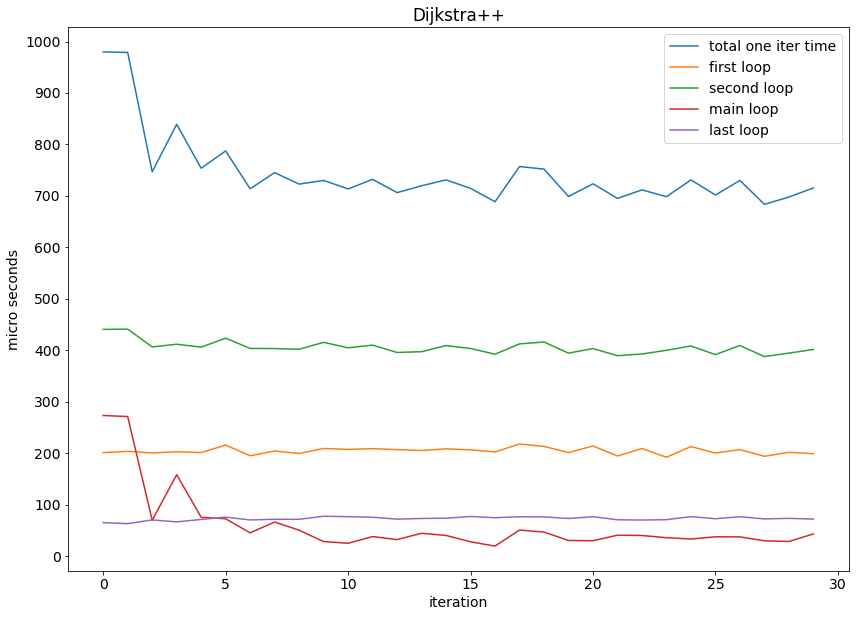

In [8]:
plt.figure(figsize=(14, 10))

dist_f = model.graph.distance_finder
sources = np.arange(38)
iters = np.arange(30)

first_loop_mean_times = []
second_loop_mean_times = []
main_loop_mean_times = []
last_loop_mean_times = []
total_loops_mean_times = []
for i in iters:
    #try:
    first_loop_mean_times.append(np.mean([x[i] for x in dist_f.first_loop if len(x) > 0])*10**6)
    second_loop_mean_times.append(np.mean([x[i] for x in dist_f.second_loop if len(x) > 0])*10**6)
    main_loop_mean_times.append(np.mean([x[i] for x in dist_f.main_loop if len(x) > 0])*10**6)
    last_loop_mean_times.append(np.mean([x[i] for x in dist_f.last_loop if len(x) > 0])*10**6)
    total_loops_mean_times.append(first_loop_mean_times[-1] + second_loop_mean_times[-1] + 
                                  main_loop_mean_times[-1] + last_loop_mean_times[-1])
#     except:
#         print(i)
plt.title('Dijkstra++')
plt.plot(iters, total_loops_mean_times, label='total one iter time')    
    
plt.plot(iters, first_loop_mean_times, label='first loop')
plt.plot(iters, second_loop_mean_times, label='second loop')
plt.plot(iters, main_loop_mean_times, label='main loop')
plt.plot(iters, last_loop_mean_times, label='last loop')
plt.legend()
plt.yticks(np.linspace(0, 1000, 11))
plt.xlabel('iteration')
plt.ylabel('micro seconds')

Text(0, 0.5, '%')

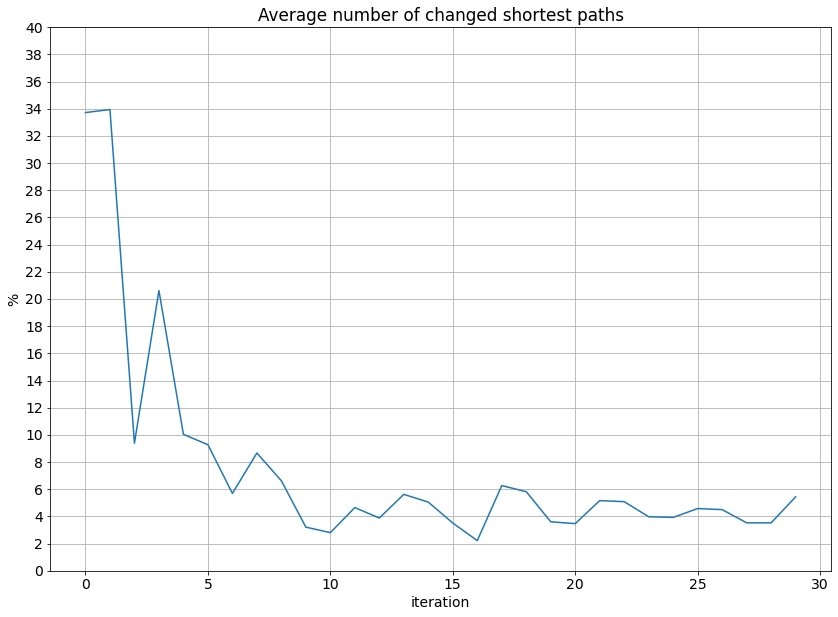

In [7]:
plt.figure(figsize=(14, 10))

dist_f = model.graph.distance_finder
sources = np.arange(38)
iters = np.arange(30)

unchangeds = []
changeds = []
portion_changed = []

for i in iters:
    #try:
    unchangeds.append(np.mean([x[i] for x in dist_f.n_unchanged if len(x) > 0]))
    changeds.append(np.mean([x[i] for x in dist_f.changed if len(x) > 0]))
    portion_changed.append(changeds[-1] / (changeds[-1] + unchangeds[-1]) * 100)
    
plt.plot(iters, portion_changed)
    
plt.title('Average number of changed shortest paths')
#plt.legend()
plt.yticks(np.linspace(0, 40, 21))
plt.grid()
plt.xlabel('iteration')
plt.ylabel('%')

# smart = False

In [1]:
import pandas as pd
import numpy as np
import data_handler as dh
import model as md
import time
import matplotlib.pyplot as plt
from matplotlib import rc
import pickle

import numba

import graph_tool

net_name = 'Anaheim_net.tntp'
trips_name = 'Anaheim_trips.tntp'

handler = dh.DataHandler()
graph_data = handler.GetGraphData(net_name, columns = ['init_node', 'term_node', 'capacity', 'free_flow_time'])
graph_correspondences, total_od_flow = handler.GetGraphCorrespondences(trips_name)

model = md.Model(graph_data, graph_correspondences, 
                    total_od_flow, mu = 0.25, rho = 0.15)

set smart=False !


In [2]:
plt.rcParams.update({'font.size': 14})

In [3]:
# change add to min_heap immediately in 2nd loop with heappush

#new prox oracle etc. t_weighted !!
assert(model.mu == 0.25)
max_iter = 100

print('Frank-Wolfe without stopping criteria')
solver_kwargs = {'max_iter' : max_iter, 'stop_crit': 'max_iter',
                 'verbose' : True, 'verbose_step': 10, 'save_history' : True}
tic = time.time()
result = model.find_equilibrium(solver_name = 'fwm', solver_kwargs = solver_kwargs)
toc = time.time()
print('Elapsed time: {:.0f} sec'.format(toc - tic))
print('Time ratio =', np.max(result['times'] / graph_data['graph_table']['free_flow_time']))
print('Flow excess =', np.max(result['flows'] / graph_data['graph_table']['capacity']) - 1, end = '\n\n')

Frank-Wolfe without stopping criteria
Oracles created...
Frank-Wolfe method...
Primal_init = 1.29606e+06
Dual_init = -1.24813e+06
Duality_gap_init = 47935

Iterations number: 10
Primal_func_value = 1.28657e+06
Dual_func_value = -1.28567e+06
Duality_gap = 904.454
Duality_gap / Duality_gap_init = 0.0188683

Iterations number: 20
Primal_func_value = 1.28618e+06
Dual_func_value = -1.28593e+06
Duality_gap = 245.623
Duality_gap / Duality_gap_init = 0.00512409

Iterations number: 30
Primal_func_value = 1.2861e+06
Dual_func_value = -1.28598e+06
Duality_gap = 117.425
Duality_gap / Duality_gap_init = 0.00244967

Iterations number: 40
Primal_func_value = 1.28607e+06
Dual_func_value = -1.286e+06
Duality_gap = 73.5646
Duality_gap / Duality_gap_init = 0.00153467

Iterations number: 50
Primal_func_value = 1.28606e+06
Dual_func_value = -1.286e+06
Duality_gap = 51.775
Duality_gap / Duality_gap_init = 0.00108011

Iterations number: 60
Primal_func_value = 1.28605e+06
Dual_func_value = -1.28601e+06
Dualit

Text(0, 0.5, 'micro seconds')

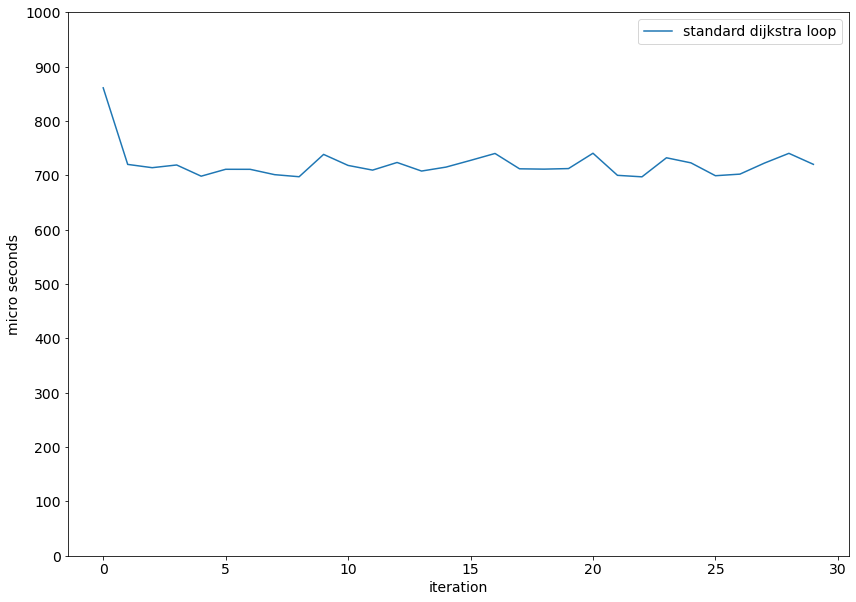

In [4]:
plt.figure(figsize=(14, 10))

dist_f = model.graph.distance_finder
sources = np.arange(38)
iters = np.arange(30)

# first_loop_mean_times = []
# second_loop_mean_times = []
# main_loop_mean_times = []
# last_loop_mean_times = []
standard_mean_times = []
for i in iters:
    #try:
    standard_mean_times.append(np.mean([x[i] for x in dist_f.first_time_time if len(x) > 0])*10**6)
#     first_loop_mean_times.append(np.mean([x[i] for x in dist_f.first_loop if len(x) > 0])*10**6)
#     second_loop_mean_times.append(np.mean([x[i] for x in dist_f.second_loop if len(x) > 0])*10**6)
#     main_loop_mean_times.append(np.mean([x[i] for x in dist_f.main_loop if len(x) > 0])*10**6)
#     last_loop_mean_times.append(np.mean([x[i] for x in dist_f.last_loop if len(x) > 0])*10**6)
#     except:
#         print(i)
    
# plt.plot(iters, first_loop_mean_times, label='first loop')
# plt.plot(iters, second_loop_mean_times, label='second loop')
# plt.plot(iters, main_loop_mean_times, label='main loop')
# plt.plot(iters, last_loop_mean_times, label='last loop')
plt.plot(iters, standard_mean_times, label='standard dijkstra loop')
plt.legend()
plt.yticks(np.linspace(0, 1000, 11))
plt.xlabel('iteration')
plt.ylabel('micro seconds')

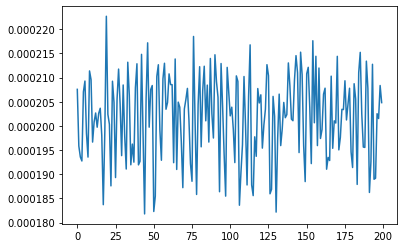

In [10]:
dist_f = model.graph.distance_finder
sources = np.arange(38)
iters = np.arange(len(dist_f.first_loop[0]))

second_loop_mean_times = []
for i in iters:
    try:
        first_loop_mean_times.append(np.mean([x[i] for x in dist_f.first_loop if len(x) > 0]))
    except:
        print(i)
    
plt.plot(iters, first_loop_mean_times)

In [15]:
q = np.array([[1,2,3], [1,2,0.3]])
w = np.array([1,2])

In [18]:
np.argmin(q, axis=0)

array([0, 0, 1])

In [17]:
np.min(q, axis=0)

array([1. , 2. , 0.3])

In [8]:
qwert =  np.array([1,2,3, 1,2,3])

In [9]:
qwert[w]

array([2, 3])

In [1]:
#new prox oracle etc. t_weighted !!
assert(model.mu == 0.25)
max_iter = 10

print('Frank-Wolfe without stopping criteria')
solver_kwargs = {'max_iter' : max_iter, 'stop_crit': 'max_iter',
                 'verbose' : True, 'verbose_step': 1, 'save_history' : True}
tic = time.time()
result = model.find_equilibrium(solver_name = 'fwm', solver_kwargs = solver_kwargs)
toc = time.time()
print('Elapsed time: {:.0f} sec'.format(toc - tic))
print('Time ratio =', np.max(result['times'] / graph_data['graph_table']['free_flow_time']))
print('Flow excess =', np.max(result['flows'] / graph_data['graph_table']['capacity']) - 1, end = '\n\n')

NameError: name 'model' is not defined

In [3]:
g = model.graph.graph

In [10]:
g.get_out_neighbors(272)

array([441,  40, 261, 271, 291])

In [6]:
g.get_in_neighbors(272)

array([ 40, 261, 271,  25, 291])

In [5]:
g.get_out_neighbors(0)

array([116])

In [3]:
gg = model.graph

In [4]:
gg.distance_finder.tree_order

[[(0, 0),
  (116, 0),
  (115, 116),
  (114, 115),
  (293, 115),
  (113, 114),
  (294, 293),
  (112, 113),
  (292, 293),
  (182, 112),
  (194, 112),
  (111, 112),
  (88, 292),
  (307, 294),
  (181, 182),
  (444, 307),
  (180, 181),
  (110, 111),
  (193, 194),
  (179, 180),
  (306, 307),
  (109, 110),
  (192, 193),
  (290, 110),
  (273, 292),
  (43, 307),
  (305, 306),
  (191, 192),
  (441, 273),
  (87, 88),
  (270, 192),
  (289, 290),
  (197, 305),
  (196, 197),
  (304, 305),
  (271, 270),
  (93, 289),
  (269, 270),
  (108, 109),
  (40, 273),
  (190, 191),
  (308, 307),
  (195, 196),
  (303, 290),
  (107, 108),
  (416, 87),
  (185, 271),
  (443, 303),
  (178, 179),
  (91, 195),
  (288, 108),
  (311, 303),
  (92, 93),
  (177, 178),
  (184, 185),
  (90, 91),
  (189, 190),
  (106, 107),
  (268, 269),
  (335, 178),
  (287, 288),
  (272, 40),
  (274, 273),
  (89, 90),
  (426, 308),
  (440, 268),
  (105, 106),
  (62, 189),
  (84, 189),
  (283, 106),
  (334, 335),
  (336, 335),
  (95, 287),
  

In [5]:
len(gg.distance_finder.tree_order[0])

402

In [3]:
orc = result['pm_oracle']

In [8]:
orc.phi_big_oracle.auto_oracles[0].distances

array([13.26436931, 15.8330404 , 12.45157382, 22.23926977, 14.33142839,
       13.25763423, 15.62285822, 12.97314697, 10.64227499,  6.89590405,
        7.81615187,  9.81618465, 14.82472466, 16.74843213, 14.80816769,
       14.33971461, 17.79274395, 20.67062142, 29.11863803, 23.09412902,
       19.08758577, 17.01748325, 10.61665027,  8.06791448,  4.96518671,
        7.85940449,  6.34745179,  4.04497334, 14.25825683, 10.86152766,
        8.4896983 ,  7.79112775, 18.25825324, 12.84268007, 10.12221385,
       21.63964913, 14.16654689])

In [9]:
orc.phi_big_oracle.auto_oracles[0].corr_values

array([1.3659e+03, 4.0740e+02, 8.6140e+02, 3.5440e+02, 5.4510e+02,
       4.3150e+02, 1.0000e+00, 5.6800e+01, 7.5300e+01, 1.0000e+00,
       3.7900e+01, 4.8500e+01, 1.0000e+00, 1.8590e+02, 1.2100e+01,
       8.1100e+01, 1.2660e+02, 6.7200e+01, 3.8240e+02, 1.0160e+02,
       7.1700e+01, 2.5800e+01, 2.1100e+01, 6.6510e+02, 2.9000e+01,
       1.8900e+01, 7.5900e+01, 1.3910e+02, 1.1910e+02, 2.9560e+02,
       8.5900e+01, 7.4300e+01, 9.6400e+01, 5.3600e+01, 3.7900e+01,
       1.3700e+01, 1.0770e+02])

In [5]:
orc.phi_big_oracle.auto_oracles[0].pred_map

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37, 266,
       268, 273, 302, 303, 307, 339, 329, 332, 336, 368, 372, 377, 400,
       406,  56, 237,  53, 146,  57, 102, 137, 102,  62, 189,  64,  65,
       259,  67, 257,  69,  70,  71, 141,  72,  73,  75, 141,  77,  78,
        79,  80,  81,  82,  83,  84, 189,  85,  86,  88, 292,  90,  91,
       195,  93, 289,  95, 287,  97, 282,  99, 277, 101,  55, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,   0,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135,  60, 137, 138, 264, 140,  76, 142, 143,
       144, 145,  58, 147, 296, 149, 150, 309, 152, 322, 154, 155, 348,
       157, 364, 159, 380, 161, 162, 398, 163, 164, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [16]:
i=-1

In [27]:
i+=1
print(i)
g.get_out_neighbors(i)

10


array([308])

In [13]:
gg.distance_finder.adj_matrix

[{116: 1.1529198689124767},
 {86: 1.3077728285644097},
 {73: 1.1766938339006716},
 {232: 1.638022641229925},
 {164: 1.0915747901668154},
 {212: 1.1370960748889005},
 {252: 1.1551455588519777},
 {410: 1.0000479629182888},
 {378: 1.000726961667213, 394: 1.0001741617486042},
 {337: 1.0000000050382236, 361: 1.0000000063897876},
 {308: 1.0000098253099972},
 {274: 1.0000100209136558},
 {261: 1.0000000003306155},
 {256: 1.0000000433444538},
 {253: 1.000004845299525},
 {262: 1.0000006781310156},
 {275: 1.0000311616400124},
 {321: 1.0040267800310836, 347: 1.0000383883136466},
 {363: 1.0000548013982389, 379: 1.0000012725648915},
 {396: 1.000011346426534},
 {411: 1.0006408716853907, 412: 1.0004481014828914},
 {413: 1.0000185193460143, 414: 1.0001813456987398},
 {415: 1.000947862681671},
 {265: 0.14906832434957945, 266: 0.14906832390406383},
 {267: 0.14948037499460262, 268: 0.14927695251357734},
 {272: 0.14911273711276107, 273: 0.14906833173447206},
 {301: 0.14906833194704824, 302: 0.1490683255241

In [ ]:
table = graph_data['graph_table'].copy()

In [15]:
inits = np.unique(table['init_node'][table['init_node_thru'] == False])
terms = np.unique(table['term_node'][table['term_node_thru'] == False])
through_nodes = np.unique([table['init_node'][table['init_node_thru'] == True], 
                           table['term_node'][table['term_node_thru'] == True]])

np.concatenate((inits, through_nodes, terms))

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [35]:
total_od_flow

104694.4

In [23]:
len(graph_correspondences)

38

In [21]:
print(graph_data.keys())
graph_data['nodes number'], graph_data['links number'], graph_data['zones number']

dict_keys(['nodes number', 'links number', 'zones number', 'graph_table'])


(416, 914, 38)

In [20]:
graph_data['graph_table'].sample(8)

init_node  init_node_thru  term_node  term_node_thru  capacity  \
58          38           False        407            True   12600.0   
1            2           False         87            True    9000.0   
799        382            True        122            True    1800.0   
577        318            True        317            True    5400.0   
68          43            True        304            True    5400.0   
575        317            True        318            True    5400.0   
130         83            True         82            True    7200.0   
882        405            True        414            True    5400.0   

     free_flow_time  
58         0.149068  
1          1.090458  
799        0.500000  
577        1.140152  
68         1.540152  
575        1.140152  
130        0.272615  
882        2.000000

In [26]:
df__[df__.init_node == 123]

init_node  init_node_thru  term_node  term_node_thru  capacity  \
189        123            True        122            True    7200.0   
190        123            True        382            True    1800.0   

     free_flow_time  
189        0.272615  
190        0.500000

In [27]:
df__[df__.term_node == 123]

init_node  init_node_thru  term_node  term_node_thru  capacity  \
191        124            True        123            True    7200.0   

     free_flow_time  
191        0.861421

In [44]:
model.graph.freeflow_times.shape

(914,)

In [45]:
model.graph.freeflow_times[:5]

array([1.09045849, 1.09045849, 1.09045849, 1.09045849, 1.09045849])

## Frank-Wolfe method

In [30]:
source = 0
source_correspondences = graph_correspondences[1]

In [31]:
targets = np.array(source_correspondences['targets'])

In [32]:
ep_time_map = model.graph.freeflow_times

In [ ]:
self.graph,
source = source,
target = targets,
weights = ep_time_map,
pred_map = True

In [14]:
graph = model.graph.graph

In [23]:
graph.get_out_neighbors(122)

array([121, 381])

In [21]:
graph.num_vertices()

454

In [34]:
targets

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38])

In [36]:
ep_time_map.shape

(914,)

In [41]:
edgeee = list(graph.edges())[0]

In [46]:
qwer = edgeee.source()

In [66]:
graph

<Graph object, directed, with 454 vertices and 914 edges, 2 internal edge properties, at 0x7f6c51ed8dc0>

In [65]:
graph.vertex_index

In [69]:
class Element:
    def __init__(self, vert_id, distance):
        self.id = vert_id
        self.distance = distance
        
    def copy(self):
        

In [106]:
# class Element:
#     def __init__(self, vert_id, distance):
#         self.id = vert_id
#         self.distance = distance

class BinTree:
    def __init__(self, max_size):
        self.elements = [0,] * max_size
        self.size = 0
        
    def left_child(self, ind):
        return 2*ind+1

    def right_child(self, ind):
        return 2*ind+2
    
    def get_min(self):
        if self.size == 0:
            return
        
        res = self.elements[0]
        self.size -= 1
        self.elements[0] = self.elements[self.size]
        
        ind = 0
        left_child = self.left_child(ind)
        while left_child < self.size:
            next_ind = ind
            if self.elements[left_child][1] < self.elements[next_ind][1]:
                next_ind = left_child
                
            right_child = self.right_child(ind)
            if right_child < self.size:
                if self.elements[right_child][1] < self.elements[next_ind][1]:
                    next_ind = right_child
            
            if next_ind == ind:
                break
            
            self.elements[ind], self.elements[next_ind] = self.elements[next_ind], self.elements[ind]
            ind = next_ind
            left_child = self.left_child(ind)
        
        return res

    def add_vertex(self, element):
        # element: (id, distance)
        self.elements[self.size] = element
        ind = self.size
        parent = (ind-1) // 2
        while (parent >= 0):
            if self.elements[parent][1] <= element[1]:
                break
            self.elements[ind] = self.elements[parent]
            ind = parent
            parent = (ind-1) // 2
        self.elements[ind] = element
        
        self.size += 1
        

In [145]:
ep_time_map.shape

(914,)

In [141]:
graph.vertex_index[e.target()]

116

In [148]:
graph.vertex_index[e.source()]

0

In [149]:
dict((x,1) for x in [1,2,3])

{1: 1, 2: 1, 3: 1}

In [ ]:
class DistancesFinder():
    def __init__(self, graph):
        self.edges = []
        for edge in self.graph.edges():
            self.edges.append((graph.vertex_index[edge.source()], graph.vertex_index[edge.target()]))
            
        self.n_vertex = graph.num_vertices() 
        self.adj_matrix = []
        for i in range(self.n_vertex):
            # list of {vertex_id: distance, ..}
            self.adj_matrix.append(dict((x, -1) for x in graph.get_out_neighbors(i)))
        
        self.tree_order = None
        self.pred_map = None
        
    
    def first_time(self, source, target):
        min_heap = BinTree(self.n_vertex)
        
        visited = np.zeros(self.n_vertex, dtype=bool)
        #targets = np.zeros(self.n_vertex, dtype=bool)
        #targets[target] = True
        #n_targets = len(target)
        
        # to_vertex_id, distance, prev_id
        to_visit = min_heap.add_vertex((source, 0, 0))
        
        self.tree_order = []
        self.pred_map = np.arange(self.n_vertex)
        
        #n_targets_visited = 0
        
        while to_visit.size > 0:
            vert_id, dist, prev = min_heap.get_min()
            visited[vert_id] = True
            
            #if targets[vert_id]:
            #   n_targets_visited += 1
            #if n_targets_visited == n_targets:
            #    doo
                
            self.tree_order.append(vert_id)
            self.pred_map[vert_id] = prev
            
            for nb_id, nb_dist in self.adj_matrix[vert_id].items():
                if dist + nb_dist < dist in min_heap !!
                # need to update object .... in BinTree
            
        return
        
    def update_weights(self, weights):
        for w, edge in zip(weights, self.edges):
            s, t = edge
            self.adj_matrix[s][t] = w

    def shortest_distance(self, g, source, target, weights, pred_map = True):
        self.update_weights(weights)
        
        if self.tree_order is None:
            first_time()
            return
        
        return distances, pred_map

In [170]:
np.inf >= float('inf')

True

In [164]:
np.full(10, np.inf)

array([inf, inf, inf, inf, inf, inf, inf, inf, inf, inf])

In [190]:
class DistancesFinderHeapq:
    def __init__(self, graph):
        self.edges = []
        for edge in graph.edges():
            self.edges.append((graph.vertex_index[edge.source()], graph.vertex_index[edge.target()]))
            
        self.n_vertex = graph.num_vertices() 
        self.adj_matrix = []
        for i in range(self.n_vertex):
            # list of {vertex_id: distance, ..}
            self.adj_matrix.append(dict((x, -1) for x in graph.get_out_neighbors(i)))
        
        self.tree_order = [None for _ in range(self.n_vertex)]
        self.pred_map = [None for _ in range(self.n_vertex)]
    
    def first_time(self, source, target):
        shortest_distances = np.full(self.n_vertex, float('inf'))
        shortest_distances[source] = 0
        
        #targets = np.zeros(self.n_vertex, dtype=bool)
        #targets[target] = True
        #n_targets = len(target)
        #n_targets_visited = 0
        
        # to_vertex_id, distance, prev_id
        # to_visit = min_heap.add_vertex((source, 0, 0))
        
        tree_order = []
        pred_map = np.arange(self.n_vertex)
        
        visited = np.zeros(self.n_vertex, dtype=bool)
        # distance, (vertex, pred_vertex)
        min_heap = [(0, (source, source)),]
        while min_heap:
            distance, (vertex, pred_vertex) = heapq.heappop(min_heap)
            
            if visited[vertex]:
                continue
            
            visited[vertex] = True
            tree_order.append((vertex, pred_vertex))
            pred_map[vertex] = pred_vertex          
            
            #if targets[vert_id]:
            #   n_targets_visited += 1
            #if n_targets_visited == n_targets:
            #    doo    
            
            for neighbour, nb_distance in self.adj_matrix[vertex].items():
                d = distance + nb_distance
                if d < shortest_distances[neighbour]:
                    shortest_distances[neighbour] = d
                    heapq.heappush(min_heap, (d, (neighbour, vertex)))
                # mb Better to update object .... in BinTree ??
         
        self.tree_order[source] = tree_order
        self.pred_map[source] = pred_map
     
        distances = []
        for t in target:
            distances.append(shortest_distances[t])
        
        return np.array(distances), self.pred_map[source]        

        
    def recompute_distances(self, source, target):
        pred_map = self.pred_map[source]
        shortest_distances = np.full(self.n_vertex, float('inf'))
        shortest_distances[source] = 0
        
        # recompute distances acording to last tree order
        for vertex, pred_vertex in self.tree_order[source]:
            if pred_vertex != vertex:
                shortest_distances[vertex] = shortest_distances[pred_vertex] + slef.adj_matrix[vertex][pred_vertex]
        
        # find some vertexes with changed shortest paths if any exists
        min_heap = []
        for vertex, pred_vertex in self.tree_order[source]:
            for neighbour, nb_distance in self.adj_matrix[vertex].items():
                d = shortest_distances[vertex] + nb_distance
                if d < shortest_distances[neighbour]:
                    shortest_distances[neighbour] = d
                    heapq.heappush(min_heap, (d, (neighbour, vertex)))

        visited = np.zeros(self.n_vertex, dtype=bool)
        tree_order = []
        pred_map = self.pred_map[source]
        # recompute shotest distacnes for all changed paths
        while min_heap:
            distance, (vertex, pred_vertex) = heapq.heappop(min_heap)
            
            if visited[vertex]:
                continue
            
            visited[vertex] = True
            tree_order.append((vertex, pred_vertex))
            pred_map[vertex] = pred_vertex          
            
            for neighbour, nb_distance in self.adj_matrix[vertex].items():
                d = distance + nb_distance
                if d < shortest_distances[neighbour]:
                    shortest_distances[neighbour] = d
                    heapq.heappush(min_heap, (d, (neighbour, vertex)))

        # update tree order
        unchanged_tree_order = []
        for vertrex, pred_vertex in self.tree_order[source]:
            if not visited[vertex]:
                new_tree_order.append((vertex, pred_vertex))
        
        self.tree_order[source] = unchanged_tree_order + tree_order
        self.pred_map[source] = pred_map
        
        distances = []
        for t in target:
            distances.append(shortest_distances[t])
        
        return np.array(distances), self.pred_map[source]
        
    def update_weights(self, weights):
        for w, edge in zip(weights, self.edges):
            s, t = edge
            self.adj_matrix[s][t] = w

    def shortest_distance(self, g, source, target, weights, pred_map = True):
        self.update_weights(weights)
        
        if self.tree_order[source] is None:
            return self.first_time(source, target)
        
        return self.recompute_distances(source, target)

In [13]:
list(model.graph.graph.edges())

[<Edge object with source '0' and target '116' at 0x7f6c3390ce50>,
 <Edge object with source '1' and target '86' at 0x7f6c3390cf70>,
 <Edge object with source '2' and target '73' at 0x7f6c3390cee0>,
 <Edge object with source '3' and target '232' at 0x7f6c33913040>,
 <Edge object with source '4' and target '164' at 0x7f6c339130d0>,
 <Edge object with source '5' and target '212' at 0x7f6c33913160>,
 <Edge object with source '6' and target '252' at 0x7f6c339131f0>,
 <Edge object with source '7' and target '410' at 0x7f6c33913280>,
 <Edge object with source '8' and target '378' at 0x7f6c33913310>,
 <Edge object with source '8' and target '394' at 0x7f6c339133a0>,
 <Edge object with source '9' and target '337' at 0x7f6c33913430>,
 <Edge object with source '9' and target '361' at 0x7f6c339134c0>,
 <Edge object with source '10' and target '308' at 0x7f6c33913550>,
 <Edge object with source '11' and target '274' at 0x7f6c339135e0>,
 <Edge object with source '12' and target '261' at 0x7f6c33913

In [7]:
import importlib
importlib.reload(dh)
importlib.reload(md)

<module 'model' from '/home/a1eksei/transport/TransportNet/Stable Dynamic & Beckman/model.py'>

In [6]:
#new prox oracle etc. t_weighted !!
assert(model.mu == 0.25)
max_iter = 1000

print('Frank-Wolfe without stopping criteria')
solver_kwargs = {'max_iter' : max_iter, 'stop_crit': 'max_iter',
                 'verbose' : True, 'verbose_step': 10, 'save_history' : True}
tic = time.time()
result = model.find_equilibrium(solver_name = 'fwm', solver_kwargs = solver_kwargs)
toc = time.time()
print('Elapsed time: {:.0f} sec'.format(toc - tic))
print('Time ratio =', np.max(result['times'] / graph_data['graph_table']['free_flow_time']))
print('Flow excess =', np.max(result['flows'] / graph_data['graph_table']['capacity']) - 1, end = '\n\n')

Frank-Wolfe without stopping criteria
Oracles created...
Frank-Wolfe method...
Primal_init = 1.29606e+06
Dual_init = -1.24813e+06
Duality_gap_init = 47935


KeyError: 0

In [6]:
#new prox oracle etc. t_weighted !!
assert(model.mu == 0.25)
max_iter = 1000

print('Frank-Wolfe without stopping criteria')
solver_kwargs = {'max_iter' : max_iter, 'stop_crit': 'max_iter',
                 'verbose' : True, 'verbose_step': 10, 'save_history' : True}
tic = time.time()
result = model.find_equilibrium(solver_name = 'fwm', solver_kwargs = solver_kwargs)
toc = time.time()
print('Elapsed time: {:.0f} sec'.format(toc - tic))
print('Time ratio =', np.max(result['times'] / graph_data['graph_table']['free_flow_time']))
print('Flow excess =', np.max(result['flows'] / graph_data['graph_table']['capacity']) - 1, end = '\n\n')

Frank-Wolfe without stopping criteria
Oracles created...
Frank-Wolfe method...
Primal_init = 1.29606e+06
Dual_init = -1.24813e+06
Duality_gap_init = 47933.4

Iterations number: 10
Primal_func_value = 1.28657e+06
Dual_func_value = -1.28567e+06
Duality_gap = 906.149
Duality_gap / Duality_gap_init = 0.0189043

Iterations number: 20
Primal_func_value = 1.28618e+06
Dual_func_value = -1.28593e+06
Duality_gap = 246.192
Duality_gap / Duality_gap_init = 0.00513614

Iterations number: 30
Primal_func_value = 1.2861e+06
Dual_func_value = -1.28598e+06
Duality_gap = 117.674
Duality_gap / Duality_gap_init = 0.00245494

Iterations number: 40
Primal_func_value = 1.28607e+06
Dual_func_value = -1.28599e+06
Duality_gap = 73.7034
Duality_gap / Duality_gap_init = 0.00153762

Iterations number: 50
Primal_func_value = 1.28606e+06
Dual_func_value = -1.286e+06
Duality_gap = 51.8787
Duality_gap / Duality_gap_init = 0.00108231

Iterations number: 60
Primal_func_value = 1.28605e+06
Dual_func_value = -1.28601e+06
D


Iterations number: 540
Primal_func_value = 1.28603e+06
Dual_func_value = -1.28603e+06
Duality_gap = 2.38031
Duality_gap / Duality_gap_init = 4.96587e-05

Iterations number: 550
Primal_func_value = 1.28603e+06
Dual_func_value = -1.28603e+06
Duality_gap = 2.33777
Duality_gap / Duality_gap_init = 4.87713e-05

Iterations number: 560
Primal_func_value = 1.28603e+06
Dual_func_value = -1.28603e+06
Duality_gap = 2.28748
Duality_gap / Duality_gap_init = 4.7722e-05

Iterations number: 570
Primal_func_value = 1.28603e+06
Dual_func_value = -1.28603e+06
Duality_gap = 2.24596
Duality_gap / Duality_gap_init = 4.68559e-05

Iterations number: 580
Primal_func_value = 1.28603e+06
Dual_func_value = -1.28603e+06
Duality_gap = 2.1966
Duality_gap / Duality_gap_init = 4.5826e-05

Iterations number: 590
Primal_func_value = 1.28603e+06
Dual_func_value = -1.28603e+06
Duality_gap = 2.15692
Duality_gap / Duality_gap_init = 4.49983e-05

Iterations number: 600
Primal_func_value = 1.28603e+06
Dual_func_value = -1.28

In [185]:
orc = result['pm_oracle']

In [186]:
orc.phi_big_oracle.auto_oracles[0].distances

array([13.11144072, 15.64783985, 12.30659434, 20.53254068, 14.36283416,
       13.30477978, 15.60437635, 13.01758597, 10.67488402,  6.89590405,
        7.81624879,  9.8162855 , 14.63855273, 16.52870141, 14.62321516,
       14.13525542, 16.51668683, 19.1717105 , 24.86234031, 23.14982467,
       19.13772139, 16.99271932, 10.6314119 ,  7.95675074,  4.96528363,
        7.8797182 ,  6.36810866,  4.04497334, 14.10103547, 10.8838216 ,
        8.52255122,  7.82379883, 18.18456022, 12.88814955, 10.16665284,
       19.97681462, 14.14178296])

In [189]:
orc.phi_big_oracle.auto_oracles[0].pred_map

PropertyArray([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
                12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,
                24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,
                36,  37, 266, 268, 273, 302, 303, 307, 339, 329, 332, 336,
               368, 372, 377, 400, 406,  56, 237,  53, 146,  57, 102, 137,
               102,  62, 189,  64,  65, 259,  67, 257,  69, 254,  71, 141,
                72,  73,  75, 141,  77,  78,  79,  80,  81,  82,  83,  84,
               189,  85,  86,  88, 292,  90,  91, 195,  93, 289,  95, 287,
                97, 282,  99, 277, 101,  55, 103, 104, 105, 106, 107, 108,
               109, 110, 111, 112, 113, 114, 115, 116,   0, 118, 119, 120,
               121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132,
               133, 134, 135,  60, 137, 138, 264, 140,  76, 142, 143, 144,
               145,  58, 147, 296, 149, 150, 309, 152, 322, 154, 155, 348,
               157, 364, 

In [12]:
orc.phi_big_oracle.auto_oracles[0].news

[40,
 34,
 44,
 30,
 16,
 11,
 20,
 20,
 8,
 13,
 14,
 25,
 15,
 3,
 21,
 16,
 17,
 11,
 16,
 15,
 20,
 11,
 7,
 23,
 16,
 7,
 20,
 11,
 13,
 11,
 20,
 11,
 16,
 11,
 7,
 20,
 11,
 13,
 12,
 20,
 15,
 13,
 7,
 20,
 15,
 13,
 7,
 16,
 15,
 17,
 7,
 20,
 15,
 16,
 12,
 20,
 15,
 13,
 4,
 13,
 11,
 20,
 11,
 10,
 7,
 20,
 15,
 13,
 7,
 19,
 15,
 16,
 11,
 13,
 11,
 20,
 11,
 10,
 7,
 17,
 11,
 16,
 11,
 17,
 11,
 16,
 14,
 18,
 11,
 7,
 16,
 8,
 16,
 15,
 7,
 16,
 8,
 3,
 20,
 15]

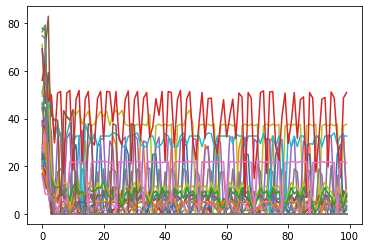

In [29]:
means = []
means_aft_20 = []
for i in range(38):
    auot0 = orc.phi_big_oracle.auto_oracles[i]
    qwe = [x/(y+x)*100 for x,y in zip(auot0.news, auot0.sames)]
    means.append(np.mean(qwe))
    means_aft_20.append(np.mean(qwe[20:]))
    plt.plot(np.arange(len(qwe)), qwe)

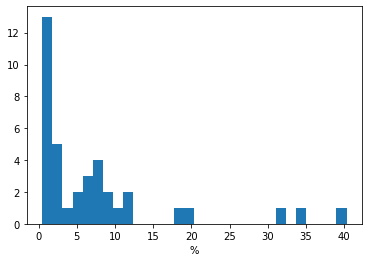

In [28]:
plt.xlabel('%')
_ = plt.hist(means, bins=30)

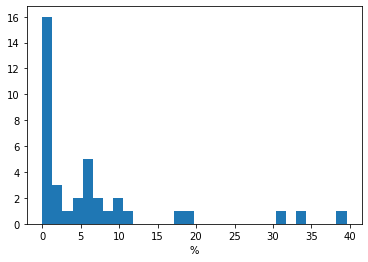

In [30]:
plt.xlabel('%')
_ = plt.hist(means_aft_20, bins=30)

In [8]:
result.keys()

dict_keys(['times', 'flows', 'iter_num', 'res_msg', 'history', 'zone travel times'])

In [20]:
import graph_tool.topology as gtt

In [46]:
np.array(source_correspondences['targets'])

array([417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429,
       430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442,
       443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453])

In [24]:
ep_time_map = model.graph.graph.new_edge_property("double", vals = model.graph.freeflow_times)

distances, pred_map = gtt.shortest_distance(g = model.graph.graph,
                                                    source = 0,
                                                    target = np.array(source_correspondences['targets']),
                                                    weights = ep_time_map,
                                                    pred_map = True)

In [26]:
distances

array([ 8.92152003, 13.57331681, 11.05266419, 18.62660057, 13.16831887,
       12.43287897, 14.43486303, 12.23915737, 10.05824039,  6.68091698,
        7.60099273,  9.60099273, 13.34696406, 15.02622883, 13.34861627,
       13.4070646 , 15.25505989, 17.59954564, 20.75299322, 21.81322049,
       17.93448425, 15.79471152, 10.15055813,  6.69512226,  4.75006106,
        7.43048237,  5.97463486,  3.8299853 , 12.84390094, 10.43048237,
        7.90730872,  7.20730872, 17.24861396, 12.10830145,  9.38822569,
       16.96228881, 12.94377984])

In [28]:
model.graph.graph.num_vertices()

454

In [29]:
pred_map.a.shape

(454,)

In [64]:
len(df__.init_node.unique())

416

In [65]:
len(df__.term_node.unique())

416

In [25]:
df__  = graph_data['graph_table']
df__[df__.term_node == 154]

init_node  init_node_thru  term_node  term_node_thru  capacity  \
236        155            True        154            True    7200.0   

     free_flow_time  
236        0.316192

In [45]:
for x in range(pred_map.a.shape[0]):
    if pred_map.a[x] == x:
        print(x)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
57
72
73
85
86
163
164
211
212
230
231
232
250
251
252


In [145]:
pred_map.a[163]

163

In [151]:
df__[df__.init_node == 1]

init_node  init_node_thru  term_node  term_node_thru  capacity  \
0          1           False        117            True    9000.0   

   free_flow_time  
0        1.090458

In [67]:
from oracles import get_tree_order

In [101]:
sorted_vertices = get_tree_order(model.graph.nodes_number, np.array(source_correspondences['targets']), 
                                 pred_map.a)

In [ ]:
sorted_vertices = List()
sorted_vertices.append(targets[0])
sorted_vertices.clear()

In [104]:
model.graph.nodes_number

454

In [103]:
len(sorted_vertices)

196

In [105]:
np.array(source_correspondences['targets'])

array([417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429,
       430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442,
       443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453])

In [144]:
pred_map.a.shape

(454,)

In [143]:
len(np.unique(np.array(pred_map.a)))

340

In [106]:
np.array(sorted_vertices)

array([453, 452, 451, 450, 372, 373, 374, 375, 449, 368, 367, 366, 448,
       447, 332, 333, 334, 446, 329, 318, 445, 339, 324, 444, 443, 303,
       290, 442, 302, 441, 440, 268, 269, 270, 439, 266, 267, 286, 287,
       288, 438, 415, 437, 414, 405,  52, 406, 407, 436, 411, 401,  51,
       400, 435, 396, 397, 398, 399, 434, 363, 364, 365, 433, 321, 322,
       323, 432, 275, 295, 296, 297, 431, 262, 263, 430, 253, 254, 255,
        78,  79, 429, 256, 257, 258,  80,  81,  82,  83,  84, 428, 261,
       272,  40, 427, 274, 273, 292, 426, 308, 307, 294, 293, 425, 337,
       336, 335, 424, 378, 377, 376, 423, 410, 409, 408, 422, 213, 214,
       215, 421, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175,
       176, 177, 178, 179, 180, 181, 182, 420, 117, 118, 119, 120, 121,
       122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134,
       135,  60, 419, 233, 234, 235, 236, 418,  74,  75, 141, 142, 143,
       144, 145,  58, 102, 103, 104, 105, 106, 107, 108, 109, 11

In [158]:

print(np.where(np.array(sorted_vertices) == ind))
print(pred_map.a[ind])
np.where(np.array(sorted_vertices) == pred_map.a[ind])

(array([171]),)
102


(array([172]),)

In [123]:
[x in sorted_vertices for x in source_correspondences['targets']]

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True]

In [74]:
q = [1,2,3]

In [75]:
q.pop()

3

In [76]:
q

[1, 2]

In [80]:
model.graph.edges

array([[  0, 116,   0],
       [  1,  86,   1],
       [  2,  73,   2],
       ...,
       [414, 405, 911],
       [415, 438, 912],
       [415, 406, 913]])

In [81]:
from collections import defaultdict

In [91]:
list(graph_data['graph_table'][['init_node', 'term_node']].iterrows())[0][1].init_node

1

In [96]:
neighbours = defaultdict(list)
for ind, row in graph_data['graph_table'].iterrows():
    neighbours[row.init_node-1].append(row.term_node-1)

In [97]:
neighbours

defaultdict(list,
            {0: [116],
             1: [86],
             2: [73],
             3: [232],
             4: [164],
             5: [212],
             6: [252],
             7: [410],
             8: [378, 394],
             9: [337, 361],
             10: [308],
             11: [274],
             12: [261],
             13: [256],
             14: [253],
             15: [262],
             16: [275],
             17: [321, 347],
             18: [363, 379],
             19: [396],
             20: [411, 412],
             21: [413, 414],
             22: [415],
             23: [265, 266],
             24: [267, 268],
             25: [272, 273],
             26: [301, 302],
             27: [302, 303],
             28: [307, 336],
             29: [339, 340],
             30: [328, 329],
             31: [331, 332],
             32: [336, 360],
             33: [368, 384],
             34: [372, 388],
             35: [377, 393],
             36: [400, 401],
      

In [100]:
reachable = []

visited = [False,] * graph_data['nodes number']

to_visit = [0, ]

while to_visit:
    x = to_visit.pop()
    if visited[x]:
        continue
    visited[x] = True
    for q in neighbours[x]:
        if not visited[q]:
            to_visit.append(q)
            
assert all(visited)

In [72]:
len(sorted_vertices)

196

In [8]:
_, source_correspondences = list(model.graph_correspondences.items())[0]

In [9]:
distances, pred_map = model.graph.shortest_distances(0, np.array(source_correspondences['targets']), 
                                                     model.graph.freeflow_times)

In [17]:
distances

array([ 8.92152003, 13.57331681, 11.05266419, 18.62660057, 13.16831887,
       12.43287897, 14.43486303, 12.23915737, 10.05824039,  6.68091698,
        7.60099273,  9.60099273, 13.34696406, 15.02622883, 13.34861627,
       13.4070646 , 15.25505989, 17.59954564, 20.75299322, 21.81322049,
       17.93448425, 15.79471152, 10.15055813,  6.69512226,  4.75006106,
        7.43048237,  5.97463486,  3.8299853 , 12.84390094, 10.43048237,
        7.90730872,  7.20730872, 17.24861396, 12.10830145,  9.38822569,
       16.96228881, 12.94377984])

In [19]:
pred_map.

(454,)

In [6]:
#new prox oracle etc. t_weighted !!
assert(model.mu == 0.25)
max_iter = 10

print('Frank-Wolfe without stopping criteria')
solver_kwargs = {'max_iter' : max_iter, 'stop_crit': 'max_iter',
                 'verbose' : True, 'verbose_step': 1, 'save_history' : True}
tic = time.time()
result = model.find_equilibrium(solver_name = 'fwm', solver_kwargs = solver_kwargs)
toc = time.time()
print('Elapsed time: {:.0f} sec'.format(toc - tic))
print('Time ratio =', np.max(result['times'] / graph_data['graph_table']['free_flow_time']))
print('Flow excess =', np.max(result['flows'] / graph_data['graph_table']['capacity']) - 1, end = '\n\n')

Frank-Wolfe without stopping criteria
Oracles created...
Frank-Wolfe method...

 [453, 452, 451, 450, 372, 373, 374, 375, 449, 368, 367, 366, 448, 447, 332, 333, 334, 446, 329, 318, 445, 339, 324, 444, 443, 303, 290, 442, 302, 441, 440, 268, 269, 270, 439, 266, 267, 286, 287, 288, 438, 415, 437, 414, 405, 52, 406, 407, 436, 411, 401, 51, 400, 435, 396, 397, 398, 399, 434, 363, 364, 365, 433, 321, 322, 323, 432, 275, 295, 296, 297, 431, 262, 263, 430, 253, 254, 255, 78, 79, 429, 256, 257, 258, 80, 81, 82, 83, 84, 428, 261, 272, 40, 427, 274, 273, 292, 426, 308, 307, 294, 293, 425, 337, 336, 335, 424, 378, 377, 376, 423, 410, 409, 408, 422, 213, 214, 215, 421, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 420, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 60, 419, 233, 234, 235, 236, 418, 74, 75, 141, 142, 143, 144, 145, 58, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 417, 61, 62, 189, 190,


Iterations number: 7
Primal_func_value = 1.28715e+06
Dual_func_value = -1.28531e+06
Duality_gap = 1833.68
Duality_gap / Duality_gap_init = 0.0382548

 [453, 452, 400, 451, 450, 372, 373, 374, 375, 449, 368, 369, 353, 341, 327, 315, 299, 279, 278, 448, 447, 332, 333, 334, 446, 329, 318, 445, 339, 324, 312, 313, 444, 443, 303, 290, 442, 302, 441, 440, 268, 269, 270, 439, 266, 267, 286, 287, 288, 438, 415, 437, 414, 436, 412, 403, 404, 405, 52, 406, 407, 435, 396, 397, 398, 399, 434, 363, 364, 365, 433, 321, 322, 323, 432, 275, 295, 296, 297, 431, 262, 263, 143, 144, 145, 58, 430, 253, 254, 255, 429, 256, 257, 258, 428, 261, 272, 40, 427, 274, 273, 292, 426, 308, 307, 294, 293, 425, 337, 336, 335, 424, 378, 377, 376, 423, 410, 409, 408, 422, 213, 214, 215, 421, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 420, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 60, 419, 233, 234, 235, 236, 102, 103, 1

In [47]:
result['history']

{'iter': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 'primal_func': [1296062.835979261,
  1310014.2175948056,
  1298887.2629803997,
  1291822.5988480323,
  1289183.7310743944,
  1288051.3502301103,
  1287477.4142079805,
  1287146.914803218,
  1286871.7705972267,
  1286714.4607757437,
  1286573.3606886154],
 'dual_func': [-1248129.4349467577,
  -1260024.573252925,
  -1277024.583693686,
  -1281539.4747955468,
  -1283508.9231480348,
  -1284463.592281893,
  -1285021.077265792,
  -1285313.2343028928,
  -1285470.977623973,
  -1285594.331950831,
  -1285667.2114017252],
 'dual_gap': [47933.40103250323,
  49989.64434188069,
  21862.679286713712,
  10283.124052485451,
  5674.807926359586,
  3587.757948217448,
  2456.3369421884418,
  1833.6805003252812,
  1400.7929732536431,
  1120.1288249127101,
  906.1492868901696]}

In [4]:
#new prox oracle etc. t_weighted !!
assert(model.mu == 0.25)
max_iter = 10000

print('Frank-Wolfe without stopping criteria')
solver_kwargs = {'max_iter' : max_iter, 'stop_crit': 'max_iter',
                 'verbose' : True, 'verbose_step': 2000, 'save_history' : True}
tic = time.time()
result = model.find_equilibrium(solver_name = 'fwm', solver_kwargs = solver_kwargs)
toc = time.time()
print('Elapsed time: {:.0f} sec'.format(toc - tic))
print('Time ratio =', np.max(result['times'] / graph_data['graph_table']['free_flow_time']))
print('Flow excess =', np.max(result['flows'] / graph_data['graph_table']['capacity']) - 1, end = '\n\n')

Frank-Wolfe without stopping criteria
Oracles created...
Frank-Wolfe algorithm...
Primal_init = 1.29606e+06
Dual_init = -1.24813e+06
Duality_gap_init = 47933.4

Iterations number: 2000
Primal_func_value = 1.28603e+06
Dual_func_value = -1.28603e+06
Duality_gap = 0.588403
Duality_gap / Duality_gap_init = 1.22754e-05

Iterations number: 4000
Primal_func_value = 1.28603e+06
Dual_func_value = -1.28603e+06
Duality_gap = 0.289695
Duality_gap / Duality_gap_init = 6.0437e-06

Iterations number: 6000
Primal_func_value = 1.28603e+06
Dual_func_value = -1.28603e+06
Duality_gap = 0.192024
Duality_gap / Duality_gap_init = 4.00605e-06

Iterations number: 8000
Primal_func_value = 1.28603e+06
Dual_func_value = -1.28603e+06
Duality_gap = 0.143654
Duality_gap / Duality_gap_init = 2.99694e-06

Iterations number: 10000
Primal_func_value = 1.28603e+06
Dual_func_value = -1.28603e+06
Duality_gap = 0.114635
Duality_gap / Duality_gap_init = 2.39155e-06
Result: iterations number exceeded Total iters: 10000
Primal

In [5]:
#with open(beckmann_save + 'anaheim_result_' + 'fwm_t_weighted' + '_max_iter_' + str(max_iter) + '_beckmann.pickle', 'wb') as f:
#    pickle.dump(result, f)

In [15]:
with open(beckmann_save + 'anaheim_result_fwm_t_weighted_max_iter_10000_beckmann.pickle', 'rb') as f:
    result = pickle.load(f)

__Checking the result with the answer from https://github.com/bstabler/TransportationNetworks__ 

In [16]:
answer = handler.ReadAnswer('Anaheim_flow.tntp')
delta = abs(answer['flows'] - result['flows'])
print('Flows:')
print('total_od_flow =', total_od_flow)
print('min_i |f - f^*|[i] =', np.min(delta))
print('max_i |f - f^*|[i] =', np.max(delta))
print('||f - f^*||_1 / ||f^*||_1 =', np.linalg.norm(result['flows'] - answer['flows'], ord = 1) / np.linalg.norm(answer['flows'], ord = 1))
print('||f - f^*||_2 / ||f^*||_2 =', np.linalg.norm(delta) / np.linalg.norm(answer['flows']))
print('Times:')
delta = abs(answer['times'] - result['times'])
print('min_i |t - t^*|[i] =', np.min(delta))
print('max_i |t - t^*|[i] =', np.max(delta))
print('||t - t^*||_1 =', np.sum(delta))

Flows:
total_od_flow = 104694.4
min_i |f - f^*|[i] = 0.0
max_i |f - f^*|[i] = 0.6930271191049542
||f - f^*||_1 / ||f^*||_1 = 1.5773880137928968e-05
||f - f^*||_2 / ||f^*||_2 = 3.110964791145533e-05
Times:
min_i |t - t^*|[i] = 0.0
max_i |t - t^*|[i] = 5.241011209300428e-05
||t - t^*||_1 = 0.0006019054672867438


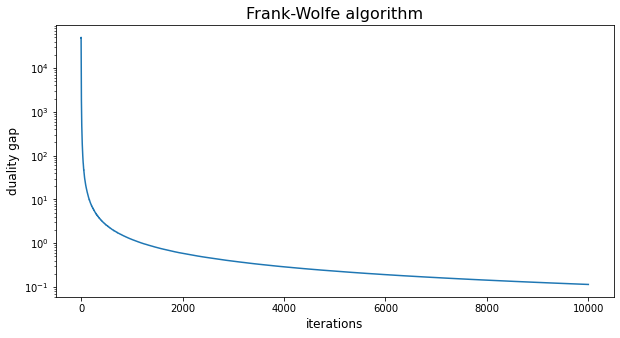

In [21]:
dual_gaps = np.array(result['history']['dual_gap'])
iters = np.array(result['history']['iter'])
plt.figure(figsize = (10, 5))
plt.plot(iters, dual_gaps)
plt.title('Frank-Wolfe algorithm', fontsize = 16)
plt.ylabel('duality gap', fontsize = 12)
plt.xlabel('iterations', fontsize = 12)
plt.yscale('log')
plt.show()

In [3]:
epsilons = np.logspace(3,-0.5,8)
epsilons

array([1.00000000e+03, 3.16227766e+02, 1.00000000e+02, 3.16227766e+01,
       1.00000000e+01, 3.16227766e+00, 1.00000000e+00, 3.16227766e-01])

## Universal Similar Triangles

In [31]:
assert(model.mu == 0.25)
max_iter = 10000
for index, eps_abs in enumerate(epsilons):
    print('eps_abs =', eps_abs)
    solver_kwargs = {'eps_abs': eps_abs,
                     'max_iter': max_iter, 'stop_crit': 'dual_gap',
                     'verbose' : True, 'verbose_step': 2000, 'save_history' : True}
    tic = time.time()
    result = model.find_equilibrium(solver_name = 'ustm', composite = True, solver_kwargs = solver_kwargs)
    toc = time.time()
    print('Elapsed time: {:.0f} sec'.format(toc - tic))
    print('Time ratio =', np.max(result['times'] / graph_data['graph_table']['free_flow_time']))
    print('Flow excess =', np.max(result['flows'] / graph_data['graph_table']['capacity']) - 1, end = '\n\n')

    result['eps_abs'] = eps_abs
    result['elapsed_time'] = toc - tic
    with open(beckmann_save + 'anaheim_result_' + 'ustm' + '_eps_abs_' + str(index) + '_beckmann.pickle', 'wb') as f:
        pickle.dump(result, f)

eps_abs = 1000.0
Composite optimization...
Oracles created...
Universal similar triangles method...
Primal_init = 1.29606e+06
Dual_init = -1.24813e+06
Duality_gap_init = 47933.4
Result: success Total iters: 12
Primal_func_value = 1.28631e+06
Dual_func_value = -1.28553e+06
Duality_gap = 775.701
Duality_gap / Duality_gap_init = 0.0161829
Oracle elapsed time: 3 sec
Elapsed time: 3 sec
Time ratio = 3.0464158854257204
Flow excess = 1.1585339704654092

eps_abs = 316.22776601683796
Composite optimization...
Oracles created...
Universal similar triangles method...
Primal_init = 1.29606e+06
Dual_init = -1.24813e+06
Duality_gap_init = 47933.4
Result: success Total iters: 20
Primal_func_value = 1.28611e+06
Dual_func_value = -1.28582e+06
Duality_gap = 292.674
Duality_gap / Duality_gap_init = 0.00610586
Oracle elapsed time: 7 sec
Elapsed time: 7 sec
Time ratio = 3.1357283581860322
Flow excess = 1.058153077611339

eps_abs = 100.0
Composite optimization...
Oracles created...
Universal similar triangl

In [15]:
assert(model.mu == 0.25)
max_iter = 40000
for index, eps_abs in enumerate(epsilons):
    if index < len(epsilons) - 1:
        continue
    print('eps_abs =', eps_abs)
    solver_kwargs = {'eps_abs': eps_abs,
                     'max_iter': max_iter, 'stop_crit': 'dual_gap',
                     'verbose' : True, 'verbose_step': 4000, 'save_history' : True}
    tic = time.time()
    result = model.find_equilibrium(solver_name = 'ustm', composite = True, solver_kwargs = solver_kwargs)
    toc = time.time()
    print('Elapsed time: {:.0f} sec'.format(toc - tic))
    print('Time ratio =', np.max(result['times'] / graph_data['graph_table']['free_flow_time']))
    print('Flow excess =', np.max(result['flows'] / graph_data['graph_table']['capacity']) - 1, end = '\n\n')

    result['eps_abs'] = eps_abs
    result['elapsed_time'] = toc - tic
    with open(beckmann_save + 'anaheim_result_' + 'ustm' + '_eps_abs_' + str(index) + '_beckmann.pickle', 'wb') as f:
        pickle.dump(result, f)

eps_abs = 0.31622776601683794
Composite optimization...
Oracles created...
Universal similar triangles method...
Primal_init = 1.29606e+06
Dual_init = -1.24813e+06
Duality_gap_init = 47933.4

Iterations number: 4000
Inner iterations number: 8013
Primal_func_value = 1.28613e+06
Dual_func_value = -1.28575e+06
Duality_gap = 376.62
Duality_gap / Duality_gap_init = 0.00785715

Iterations number: 8000
Inner iterations number: 16011
Primal_func_value = 1.28607e+06
Dual_func_value = -1.28593e+06
Duality_gap = 142.724
Duality_gap / Duality_gap_init = 0.00297755

Iterations number: 12000
Inner iterations number: 24010
Primal_func_value = 1.28605e+06
Dual_func_value = -1.286e+06
Duality_gap = 54.5036
Duality_gap / Duality_gap_init = 0.00113707

Iterations number: 16000
Inner iterations number: 32009
Primal_func_value = 1.28604e+06
Dual_func_value = -1.28602e+06
Duality_gap = 20.5112
Duality_gap / Duality_gap_init = 0.000427911

Iterations number: 20000
Inner iterations number: 40009
Primal_func_v

In [59]:
#index += 8
#epsilons = np.logspace(4, 3, 5)[:-1]
#epsilons

array([10000.        ,  5623.4132519 ,  3162.27766017,  1778.27941004])

## Universal Gradient Descent

In [6]:
epsilons = np.logspace(3,1.5,7)
epsilons

array([1000.        ,  562.34132519,  316.22776602,  177.827941  ,
        100.        ,   56.23413252,   31.6227766 ])

In [7]:
#weighted t added
assert(model.mu == 0.25)
max_iter = 40000
for index, eps_abs in enumerate(epsilons):
    print('eps_abs =', eps_abs)
    solver_kwargs = {'eps_abs': eps_abs,
                     'max_iter': max_iter, 'stop_crit': 'dual_gap',
                     'verbose' : True, 'verbose_step': 4000, 'save_history' : True}
    tic = time.time()
    result = model.find_equilibrium(solver_name = 'ugd', composite = True, solver_kwargs = solver_kwargs)
    toc = time.time()
    print('Elapsed time: {:.0f} sec'.format(toc - tic))
    print('Time ratio =', np.max(result['times'] / graph_data['graph_table']['free_flow_time']))
    print('Flow excess =', np.max(result['flows'] / graph_data['graph_table']['capacity']) - 1, end = '\n\n')
    
    result['eps_abs'] = eps_abs
    result['elapsed_time'] = toc - tic
    with open(beckmann_save + 'anaheim_result_' + 'ugd' + '_eps_abs_' + str(index) + '_beckmann.pickle', 'wb') as f:
        pickle.dump(result, f)

eps_abs = 1000.0
Composite optimization...
Oracles created...
Universal gradient descent method...
Primal_init = 1.29606e+06
Dual_init = -1.24813e+06
Duality_gap_init = 47933.4

Result: success
Total iters: 74
Primal_func_value = 1.28629e+06
Dual_func_value = -1.2853e+06
Duality_gap = 990.459
Duality_gap / Duality_gap_init = 0.0206632
Oracle elapsed time: 29 sec
Elapsed time: 30 sec
Time ratio = 2.545876295139248
Flow excess = 1.179200110558324

eps_abs = 562.341325190349
Composite optimization...
Oracles created...
Universal gradient descent method...
Primal_init = 1.29606e+06
Dual_init = -1.24813e+06
Duality_gap_init = 47933.4

Result: success
Total iters: 196
Primal_func_value = 1.28619e+06
Dual_func_value = -1.28564e+06
Duality_gap = 556.132
Duality_gap / Duality_gap_init = 0.0116022
Oracle elapsed time: 79 sec
Elapsed time: 80 sec
Time ratio = 2.7413540508489267
Flow excess = 1.128239661185849

eps_abs = 316.22776601683796
Composite optimization...
Oracles created...
Universal gra

In [57]:
#index += 7
#epsilons = np.logspace(4, 3, 5)[:-1]
#epsilons

array([10000.        ,  5623.4132519 ,  3162.27766017,  1778.27941004])

## Weighted Dual Averages

### Composite optimization

In [7]:
assert(model.mu == 0.25)
max_iter = 40000
solver_kwargs = {'max_iter' : max_iter, 'stop_crit': 'max_iter',
                 'verbose': True, 'verbose_step': 4000, 'save_history': True}
tic = time.time()
result = model.find_equilibrium(solver_name = 'wda', composite = True, solver_kwargs = solver_kwargs)
toc = time.time()
print('Elapsed time: {:.0f} sec'.format(toc - tic))
print('Time ratio =', np.max(result['times'] / graph_data['graph_table']['free_flow_time']))
print('Flow excess =', np.max(result['flows'] / graph_data['graph_table']['capacity']) - 1, end = '\n\n')

result['elapsed_time'] = toc - tic
with open(beckmann_save + 'anaheim_result_' + 'wda' + '_max_iter_' + str(max_iter) + '_beckmann.pickle', 'wb') as f:
    pickle.dump(result, f)

Composite optimization...
Oracles created...
Weighted dual averages method...
Primal_init = 1.29606e+06
Dual_init = -1.24813e+06
Duality_gap_init = 47933.4

Iterations number: 4000
Inner iterations number: 0
Primal_func_value = 1.28604e+06
Dual_func_value = -1.28602e+06
Duality_gap = 18.1014
Duality_gap / Duality_gap_init = 0.000377636

Iterations number: 8000
Inner iterations number: 0
Primal_func_value = 1.28603e+06
Dual_func_value = -1.28602e+06
Duality_gap = 9.47457
Duality_gap / Duality_gap_init = 0.000197661

Iterations number: 12000
Inner iterations number: 0
Primal_func_value = 1.28603e+06
Dual_func_value = -1.28603e+06
Duality_gap = 6.45904
Duality_gap / Duality_gap_init = 0.00013475

Iterations number: 16000
Inner iterations number: 0
Primal_func_value = 1.28603e+06
Dual_func_value = -1.28603e+06
Duality_gap = 4.91314
Duality_gap / Duality_gap_init = 0.000102499

Iterations number: 20000
Inner iterations number: 0
Primal_func_value = 1.28603e+06
Dual_func_value = -1.28603e+06

### Non-composite optimization

In [9]:
assert(model.mu == 0.25)
max_iter = 40000
solver_kwargs = {'max_iter' : max_iter, 'stop_crit': 'max_iter',
                 'verbose': True, 'verbose_step': 4000, 'save_history' : True}
tic = time.time()
result = model.find_equilibrium(solver_name = 'wda', composite = False, solver_kwargs = solver_kwargs)
toc = time.time()
print('Elapsed time: {:.0f} sec'.format(toc - tic))
print('Time ratio =', np.max(result['times'] / graph_data['graph_table']['free_flow_time']))
print('Flow excess =', np.max(result['flows'] / graph_data['graph_table']['capacity']) - 1, end = '\n\n')

result['elapsed_time'] = toc - tic
with open(beckmann_save + 'anaheim_result_' + 'wda_noncomposite' + '_max_iter_' + str(max_iter) + '_beckmann.pickle', 'wb') as f:
    pickle.dump(result, f)

Non-composite optimization...
Oracles created...
Weighted dual averages method...
Primal_init = 1.29606e+06
Dual_init = -1.24813e+06
Duality_gap_init = 47933.4

Iterations number: 4000
Inner iterations number: 0
Primal_func_value = 1.2868e+06
Dual_func_value = -1.28265e+06
Duality_gap = 4156.14
Duality_gap / Duality_gap_init = 0.0867066

Iterations number: 8000
Inner iterations number: 0
Primal_func_value = 1.28641e+06
Dual_func_value = -1.28391e+06
Duality_gap = 2495.95
Duality_gap / Duality_gap_init = 0.0520713

Iterations number: 12000
Inner iterations number: 0
Primal_func_value = 1.28628e+06
Dual_func_value = -1.2844e+06
Duality_gap = 1884.2
Duality_gap / Duality_gap_init = 0.0393086

Iterations number: 16000
Inner iterations number: 0
Primal_func_value = 1.28622e+06
Dual_func_value = -1.28466e+06
Duality_gap = 1558.96
Duality_gap / Duality_gap_init = 0.0325234

Iterations number: 20000
Inner iterations number: 0
Primal_func_value = 1.28619e+06
Dual_func_value = -1.28484e+06
Duali

## Plots

In [15]:
%matplotlib inline
from matplotlib import pyplot as plt
import pickle
import numpy as np
beckmann_save = 'beckmann_results/'

In [30]:
results = {}

for method in ['ustm', 'ugd']:
    results[method] = {}
    results[method]['iters'] = []
    results[method]['inner_iters'] = []
    results[method]['epsilon'] = []
    results[method]['dual_gap_init'] = []
    i = 0
    while True:
        try:
            with open(beckmann_save + 'anaheim_result_' + method + '_eps_abs_'
                      + str(i) + '_beckmann.pickle', 'rb') as f:
                result = pickle.load(f)
                results[method]['epsilon'].append(result['eps_abs'])
                results[method]['iters'].append(result['iter_num'])
                results[method]['inner_iters'].append(result['history'].get('inner_iters')[-1])
                results[method]['dual_gap_init'].append(result['history'].get('dual_gap')[0])
        except FileNotFoundError:
            break
        i += 1


In [31]:
for method in ['wda', 'wda_noncomposite']:
    results[method] = {}
    with open(beckmann_save + 'anaheim_result_' + method + '_max_iter_40000_beckmann.pickle', 'rb') as f:
        result = pickle.load(f)
        results[method]['epsilon'] = result['history'].get('dual_gap')
        results[method]['iters'] = result['history'].get('iter')
        results[method]['dual_gap_init'] = result['history'].get('dual_gap')[0]

In [32]:
method = 'fwm'
with open(beckmann_save + 'anaheim_result_fwm_t_weighted_max_iter_10000_beckmann.pickle', 'rb') as f:
    results[method] = {}
    result = pickle.load(f)
    results[method]['epsilon'] = result['history'].get('dual_gap')
    results[method]['iters'] = result['history'].get('iter')
    results[method]['dual_gap_init'] = result['history'].get('dual_gap')[0]

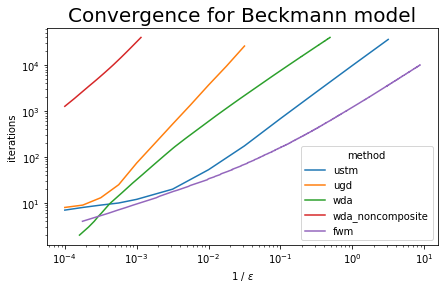

In [33]:
plt.figure(figsize=(7,4))
plt.title('Convergence for Beckmann model', fontsize=20)
eps_upper = 1e4
for method, data in results.items():
    x = 1. / np.array(data['epsilon'])
    y = np.array(data['iters'])
    ind = np.nonzero(1 / x <= eps_upper)
    plt.plot(x[ind], y[ind], label = method)
plt.legend(title = 'method')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'1 / $\varepsilon$')
plt.ylabel('iterations')
plt.show()

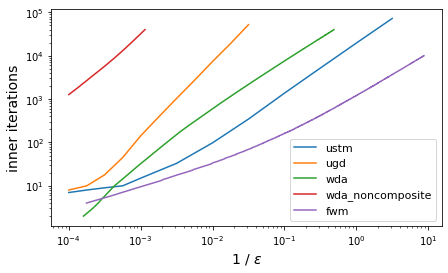

In [34]:
#inner iterations vs absolute accuracy = eps_abs
plt.figure(figsize=(7,4))
#plt.title('Convergence for Beckmann model', fontsize=20)
eps_upper = 1e4
for method, data in results.items():
    x = 1. / np.array(data['epsilon'])
    if 'inner_iters' in data:
        y = np.array(data['inner_iters'])
    else:
        y = np.array(data['iters'])
    ind = np.nonzero(1 / x <= eps_upper)
    plt.plot(x[ind], y[ind], label = method)
plt.legend(prop = {'size' : 11})
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'1 / $\varepsilon$', fontsize = 14)
plt.ylabel('inner iterations', fontsize = 14)
#plt.savefig('beckmann_convergence.jpg', dpi = 300)
plt.show()

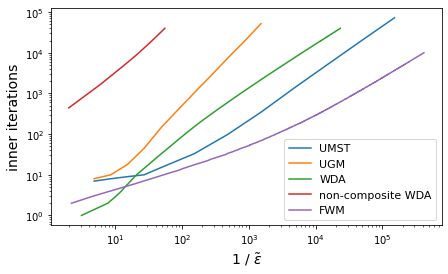

In [40]:
#inner iterations vs relative accuracy = eps_abs / dual_gap_init
plt.figure(figsize=(7,4))
#plt.title('Convergence for Beckmann model', fontsize=20)
eps_upper = 0.5

method_names = {'ustm' : 'UMST', 'ugd' : 'UGM', 'wda' : 'WDA',
                'wda_noncomposite' : 'non-composite WDA', 'fwm' : 'FWM'}
for method, data in results.items():
    x = 1. / (np.array(data['epsilon']) / np.array(data['dual_gap_init']))
    if 'inner_iters' in data:
        y = np.array(data['inner_iters'])
    else:
        y = np.array(data['iters'])
    ind = np.nonzero(1 / x <= eps_upper)
    plt.plot(x[ind], y[ind], label = method_names[method])
plt.legend(prop = {'size' : 11})
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'1 / $\tilde\varepsilon$', fontsize = 14)
plt.ylabel('inner iterations', fontsize = 14)
#plt.savefig('beckmann_convergence_rel_eps.jpg', dpi = 300)
plt.show()